<img src="image.png" width="200" height="150">

# Expresso Churn Prediction Challenge
_This is a notebook by Samson Tontoye._

## Introduction
Expresso is an African telecommunications company that provides customers with airtime and mobile data bundles. This notebook looks into using various python-based machine learning and data science libraries in an attempt to develop a machine learning model to predict the likelihood of each Expresso customer “churning,” i.e. becoming inactive and not making any transactions for 90 days(to stop purchasing airtime and data from Expresso).

<a id = "2" ></a>
#### <b>What is Customer Churn?</b>
<span style="font-size:16px;">  Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service. </span>

<span style="font-size:16px;"> Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.</span>

<span style="font-size:16px;"> Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more
customers loyalty. The core to succeed in this market lies in the customer itself. 
</span>

<span style="font-size:16px;"> Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.</span>

<a id="churn"></a>
<a id = "3" ></a>

<span style="font-size:16px;"><b>To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.</b></span> 

<span style="font-size:16px;"> To detect early signs of potential churn, one must first develop a holistic view of the customers and their interactions across numerous channels, including store/branch visits, product purchase histories, customer service calls, Web-based transactions, and social media interactions, to mention a few. </span> 

<span style="font-size:16px;">As a result, by addressing churn, these businesses may not only preserve their market position, but also grow and thrive. More customers they have in their network, the lower the cost of initiation and the larger the profit. As a result, the company's key focus for success is reducing client attrition and implementing effective retention strategy. </span> 
<a id="reduce"></a>

<a id = "4" ></a>
#### <b> Objectives</b>
I will explore the data and try to answer some questions like:
* What's the % of Churn Customers and customers that keep in with the active services?
* Is there any patterns in Churn Customers based on monthly income or region?
* Is there any patterns/preference in Churn Customers based on the type of service provided?
* What's the most profitable service types?
* Which features and services are most profitable?
* Many more questions that will arise during the analysis
<a id="objective"></a>

This solution will help Expresso to better serve their customers by understanding which customers are at risk of leaving.

## What we'll end up with
Since we already have a dataset, we'll approach the problem with the following machine learning modelling framework.

To work through these topics, we'll use pandas, Matplotlib and NumPy for data anaylsis, as well as, Scikit-Learn for machine learning and modelling tasks.

We'll work through each step and by the end of the notebook, we'll have a handful of models, all which can predict whether or not a customer will churn within 90 days using AUC as the evaluation metric.

## **i. Problem Definition**

<a id="problem"></a>

This notebook is a supervised classification data science project with an imbalanced class.In this case, the problem we will be exploring is binary classification (a sample can only be one of two things).

This is because we are going to be using a number of different features (pieces of information) to predict if a customer will churn within 90 days.

## ii. Data

The dataset came from Zindi in a formatted way [Zindi](https://zindi.africa/competitions/expresso-churn-prediction/data)

The data describes ~2.5 million expresso clients. Information on the region, revenue,tenure, number of time the customer refilled, top-up amount etc are in the data.

## iii. Evaluation

The evaluation metric is something to define at the start of a project.

Since machine learning is very experimental:

           Since we are working with a highly imbalanced dataset, we will use AUC as an appropriate evaluation metric. If we can get a score of say 0.9 or more across the AUC evaluation metric at predicting whether or not a customer will churn within 90 days during the proof of concept, we'll pursue this project.
           
## iv. Features

Features are different parts of the data. We're going to visualize the relationships between the different features of the data and how it can lead to a customer churning.

One of the most common ways to understand the features is to look at the **data dictionary**. For this project, the data dictionary is in the **Variable Definitions** csv file.

**The Variable and their defination:**

|User ID|English|
| :--- | :---|
REGION |The location of each client|
TENURE	|duration in the network|
MONTANT	|Top-up amount|
FREQUENCE_RECH	|Â number of times the customer refilled|
REVENUE	|client	monthly income of each client|
ARPU_SEGMENT|income over 90 days / 3|
FREQUENCE |number of times the client has made an income|
DATA_VOLUME|number of connections|
ON_NET|	inter expresso call|
ORANGE|call to orange|
TIGO |call to Tigo|
ZONE1	|call to zones1|
ZONE2	|call to zones2|
MRG	Â |a client who is going|
REGULARITY|number of times the client is active for 90 days|
TOP_PACK|the most active packs|
FREQ_TOP_PACK|number of times the client has activated the top pack packages|
CHURN|variable to predict - Target|

In [1]:
# data manipulation
import numpy as np
import pandas as pd
import scipy

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from PIL import Image
import seaborn as sns # visualization
import itertools
import io
from pylab import rcParams
import seaborn as sb
sb.set_style('darkgrid')
rcParams['figure.figsize'] = 8,8

# Standard plotly imports
import plotly.offline as py # visualization
py.init_notebook_mode(connected=True) # visualization
import plotly.graph_objs as go # visualization
from plotly.subplots import make_subplots
import plotly.figure_factory as ff # visualization


# sklearn modules for preprocessing
from sklearn.preprocessing import LabelEncoder

# sklearn modules for ML model selection
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

# Machine Learning
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import catboost as cb
import xgboost as xgb
import lightgbm as lgbm


# manage warnings
import warnings
warnings.filterwarnings('ignore')

# for datetime
import datetime as dt
from tqdm.notebook import tqdm_notebook
from collections import Counter

# plot the figure inline
%matplotlib inline

## <a id='1'>1. Data Overview</a>

In [2]:
# Load the data into a pandas dataframe
train = pd.read_csv('Train.csv',
                   low_memory =False)
test = pd.read_csv('Test.csv', 
                   low_memory=False)
submission = pd.read_csv('SampleSubmission.csv',
                low_memory=False)
var_def = pd.read_csv('VariableDefinitions.csv',
                     low_memory=False)

In [3]:
def dataoverview(df, message):
    print(f'{message}:\n')
    print("Rows:", df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nFeatures:")
    print(train.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())

In [4]:
dataoverview(train, 'Overview of the training dataset')

Overview of the training dataset:

Rows: 2154048

Number of features: 19

Features:
['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK', 'CHURN']

Missing values: 14380032

Unique values:
user_id           2154048
REGION                 14
TENURE                  8
MONTANT              6540
FREQUENCE_RECH        123
REVENUE             38114
ARPU_SEGMENT        16535
FREQUENCE              91
DATA_VOLUME         41550
ON_NET               9884
ORANGE               3167
TIGO                 1315
ZONE1                 612
ZONE2                 486
MRG                     1
REGULARITY             62
TOP_PACK              140
FREQ_TOP_PACK         245
CHURN                   2
dtype: int64


In [5]:
dataoverview(test, 'Overview of the test dataset')

Overview of the test dataset:

Rows: 380127

Number of features: 18

Features:
['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK', 'CHURN']

Missing values: 2531617

Unique values:
user_id           380127
REGION                14
TENURE                 8
MONTANT             2431
FREQUENCE_RECH       115
REVENUE            23276
ARPU_SEGMENT       10894
FREQUENCE             91
DATA_VOLUME        21636
ON_NET              5914
ORANGE              2053
TIGO                 801
ZONE1                322
ZONE2                263
MRG                    1
REGULARITY            62
TOP_PACK             102
FREQ_TOP_PACK        174
dtype: int64


## <a id='2'>2. Exploratory Data Analysis</a>

**Cleaning**: To clean our data, we'll need to work with:

* **Missing values**: Either omit elements from a dataset that contain missing values or impute them (fill them in).
* **Special values**: Numeric variables are endowed with several formalized special values including ±Inf, NA and NaN. Calculations involving special values often result in special values, and need to be handled/cleaned.
* **Outliers**: They should be detected, but not necessarily removed. Their inclusion in the analysis is a statistical decision.
* **Obvious inconsistencies**: Find the inconsistencies and plan for them.

When exploring our dataset and its features, we have many options available to us. We can explore each feature individually, or compare pairs of features, finding the correlation between. Let's start with some simple Univariate (one feature) analysis.

Features can be of multiple types:

* Nominal: is for mutual exclusive, but not ordered, categories.
* Ordinal: is one where the order matters but not the difference between values.
* Interval: is a measurement where the difference between two values is meaningful.
* Ratio: has all the properties of an interval variable, and also has a clear definition of 0.0.

There are multiple ways of manipulating each feature type, but for simplicity, we'll define only two feature types:

* Numerical: any feature that contains numeric values.
* Categorical: any feature that contains categories, or text.

Based on the problem on the hand, we will use AUC score which is the evaluation metric indicated by [Zindi](https://zindi.africa/competitions/expresso-churn-prediction)

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

In [6]:
# top 5 rows of the dataframe
train.head()

user_id  REGION         TENURE  MONTANT  \
0  00000bfd7d50f01092811bc0c8d7b0d6fe7c3596  FATICK   K > 24 month   4250.0   
1  00000cb4a5d760de88fecb38e2f71b7bec52e834     NaN  I 18-21 month      NaN   
2  00001654a9d9f96303d9969d0a4a851714a4bb57     NaN   K > 24 month   3600.0   
3  00001dd6fa45f7ba044bd5d84937be464ce78ac2   DAKAR   K > 24 month  13500.0   
4  000028d9e13a595abe061f9b58f3d76ab907850f   DAKAR   K > 24 month   1000.0   

   FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  ON_NET  \
0            15.0   4251.0        1417.0       17.0          4.0   388.0   
1             NaN      NaN           NaN        NaN          NaN     NaN   
2             2.0   1020.0         340.0        2.0          NaN    90.0   
3            15.0  13502.0        4501.0       18.0      43804.0    41.0   
4             1.0    985.0         328.0        1.0          NaN    39.0   

   ORANGE  TIGO  ZONE1  ZONE2 MRG  REGULARITY                        TOP_PACK  \
0    46.0   1.0    1.0    2.0  NO          54  On net 200F=Unlimited _call24H   
1     NaN   NaN    NaN    NaN  NO           4                             NaN   
2    46.0   7.0    NaN    NaN  NO          17         On-net 1000F=10MilF;10d   
3   102.0   2.0    NaN    NaN  NO          62               Data:1000F=5GB,7d   
4    24.0   NaN    NaN    NaN  NO          11     Mixt 250F=Unlimited_call24H   

   FREQ_TOP_PACK  CHURN  
0            8.0      0  
1            NaN      1  
2            1.0      0  
3           11.0      0  
4            2.0      0

In [7]:
# Check the shape of the train dataset
train.shape

(2154048, 19)

In [8]:
# top 5 rows of the test dataset
test.head()

user_id REGION         TENURE  MONTANT  \
0  00001dbe00e56fc4b1c1b65dda63de2a5ece55f9  THIES   K > 24 month   5000.0   
1  000055d41c8a62052dd426592e8a4a3342bf565d    NaN  I 18-21 month    300.0   
2  000081dd3245e6869a4a9c574c7050e7bb84c2c8  DAKAR   K > 24 month   3300.0   
3  0000b76d2145d9445d9ff6b65c9ebc4196c89337    NaN   K > 24 month      NaN   
4  0000bae5480628cf8fe51ad84bcb39772fc79224    NaN   K > 24 month      NaN   

   FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  ON_NET  \
0             5.0   5000.0        1667.0        5.0          NaN   378.0   
1             2.0    326.0         109.0        3.0        397.0     NaN   
2            25.0   3400.0        1133.0       26.0       7150.0     0.0   
3             NaN      NaN           NaN        NaN          NaN     NaN   
4             NaN      NaN           NaN        NaN          NaN     NaN   

   ORANGE  TIGO  ZONE1  ZONE2 MRG  REGULARITY                 TOP_PACK  \
0    11.0   5.0    NaN    NaN  NO          42  On-net 1000F=10MilF;10d   
1     0.0   NaN    NaN    NaN  NO          41     Data: 100 F=40MB,24H   
2     2.0   5.0    NaN    NaN  NO          57     Data: 100 F=40MB,24H   
3     NaN   NaN    NaN    NaN  NO           9                      NaN   
4     NaN   NaN    NaN    NaN  NO          10                      NaN   

   FREQ_TOP_PACK  
0            5.0  
1            1.0  
2           22.0  
3            NaN  
4            NaN

In [9]:
# Check the shape of the test dataset
test.shape

(380127, 18)

In [10]:
# check the variable definition
var_def

Variable Definitions                                         Unnamed: 1  \
0                   NaN                                             French   
1                   NaN  Le dataset churn comprend 19 variables dont 15...   
2               user_id                                                NaN   
3                REGION                       la localité de chaque client   
4                TENURE                            la durée dans le reseau   
5               MONTANT                                montant de recharge   
6        FREQUENCE_RECH   nombre de fois que le client a fait une recharge   
7               REVENUE                    revenu mensuel de chaque client   
8          ARPU_SEGMENT                              revenu sur 90 jours/3   
9             FREQUENCE         nombre de fois que client à fait un revenu   
10          DATA_VOLUME                               nombre de connexions   
11               ON_NET                               appel inter expresso   
12               ORANGE                                  appel vers orange   
13                 TIGO                                    appel vers Tigo   
14                ZONE1                               appel vers les zone1   
15                ZONE2                               appel vers les zone2   
16                  MRG                          un client qui fait du vas   
17           REGULARITY  nombre de fois que le client est actif pendant...   
18             TOP_PACK                          les pack les plus activés   
19        FREQ_TOP_PACK  nombre de fois que le client a activé les pack...   
20                CHURN                        variable à predire - Target   

                                           Unnamed: 2  
0                                             English  
1   The churn dataset includes 19 variables includ...  
2                                                 NaN  
3                         the location of each client  
4                             duration in the network  
5                                       top-up amount  
6               number of times the customer refilled  
7                       monthly income of each client  
8                             income over 90 days / 3  
9       number of times the client has made an income  
10                              number of connections  
11                                inter expresso call  
12                                     call to orange  
13                                       call to Tigo  
14                                     call to zones1  
15                                     call to zones2  
16                              a client who is going  
17   number of times the client is active for 90 days  
18                              the most active packs  
19  number of times the client has activated the t...  
20                       variable to predict - Target

In [11]:
# let's see how many positive(1) and negatives(0) we have in the dataframe
print('Length of the training dataset:', len(train))
print('Length of the test dataset:', len(test))
print('Total number of customers that will not churn in the first 90 days:', len(train[train['CHURN']==0]))
print('Total number of customers that will churn in the first 90 days:', len(train[train["CHURN"]==1]))

Length of the training dataset: 2154048
Length of the test dataset: 380127
Total number of customers that will not churn in the first 90 days: 1750062
Total number of customers that will churn in the first 90 days: 403986


Since these two values(Customers that will churn within the first 3 months and customers that will not churn in the first 3 months) are not close, our target column can be considered **imbalanced**. An **imbalanced** target column, meaning some classes have far more samples, can be harder to model than a balanced set. From our churn column, if the customer will churn in the first 3 months, it is denoted with 1, if the customer will not claim insurance in the first 3 months, it is denoted as 0.

* The target that we will use to guide the exploration is **CHURN**

### <a id='2.1'>2.1. Customer Churn in Data</a>

In [12]:
# To see the values in percentages
train['CHURN'].value_counts(normalize=True)

0    0.812453
1    0.187547
Name: CHURN, dtype: float64

In [13]:
# Plot a pie chart of the customer churn in the train dataset
trace = go.Pie(labels = train['CHURN'].value_counts().keys().tolist(),
               values = train['CHURN'].value_counts().values.tolist(),
               marker = dict(colors = ['royalblue', 'lime'],
                             line = dict(color = 'white', width = 1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer Churn in Training Data",
                        plot_bgcolor = "rgb(243, 243, 243)",
                        paper_bgcolor = "rgb(243, 243, 243)",
                       )
                  )
data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

The proportion of customer that will not churn in the first 3 months to those that will churn in the first 3 months is 4.3:1. 1 in 4 customers will churn in the first 3 months.

In [14]:
# Check the shape of the train and test dataset
print(f'The shape of the train dataset is: {train.shape}\nThe shape of the test dataset is: {test.shape}')

The shape of the train dataset is: (2154048, 19)
The shape of the test dataset is: (380127, 18)


In [15]:
# check the information of the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [16]:
# check for missing values in the train dataset
train.isna().sum()

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

In [17]:
# The .describe() function will demonstrate the count, mean, std dev, min, max, etc values for the 
# Numerical features present in the  train dataset.
train.describe()

MONTANT  FREQUENCE_RECH       REVENUE  ARPU_SEGMENT     FREQUENCE  \
count  1.397309e+06    1.397309e+06  1.428000e+06  1.428000e+06  1.428000e+06   
mean   5.532117e+03    1.152912e+01  5.510810e+03  1.836943e+03  1.397814e+01   
std    7.111339e+03    1.327407e+01  7.187113e+03  2.395700e+03  1.469403e+01   
min    1.000000e+01    1.000000e+00  1.000000e+00  0.000000e+00  1.000000e+00   
25%    1.000000e+03    2.000000e+00  1.000000e+03  3.330000e+02  3.000000e+00   
50%    3.000000e+03    7.000000e+00  3.000000e+03  1.000000e+03  9.000000e+00   
75%    7.350000e+03    1.600000e+01  7.368000e+03  2.456000e+03  2.000000e+01   
max    4.700000e+05    1.330000e+02  5.321770e+05  1.773920e+05  9.100000e+01   

        DATA_VOLUME        ON_NET        ORANGE           TIGO          ZONE1  \
count  1.093615e+06  1.367373e+06  1.258800e+06  864032.000000  169721.000000   
mean   3.366450e+03  2.776891e+02  9.541871e+01      23.109253       8.170132   
std    1.330446e+04  8.726889e+02  2.049873e+02      63.578086      41.169511   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000       0.000000   
25%    0.000000e+00  5.000000e+00  7.000000e+00       2.000000       0.000000   
50%    2.570000e+02  2.700000e+01  2.900000e+01       6.000000       1.000000   
75%    2.895000e+03  1.560000e+02  9.900000e+01      20.000000       3.000000   
max    1.823866e+06  5.080900e+04  2.132300e+04    4174.000000    4792.000000   

               ZONE2    REGULARITY  FREQ_TOP_PACK         CHURN  
count  136824.000000  2.154048e+06   1.251454e+06  2.154048e+06  
mean        7.553309  2.804251e+01   9.272461e+00  1.875474e-01  
std        33.487234  2.228686e+01   1.228044e+01  3.903504e-01  
min         0.000000  1.000000e+00   1.000000e+00  0.000000e+00  
25%         0.000000  6.000000e+00   2.000000e+00  0.000000e+00  
50%         2.000000  2.400000e+01   5.000000e+00  0.000000e+00  
75%         5.000000  5.100000e+01   1.200000e+01  0.000000e+00  
max      3697.000000  6.200000e+01   7.130000e+02  1.000000e+00

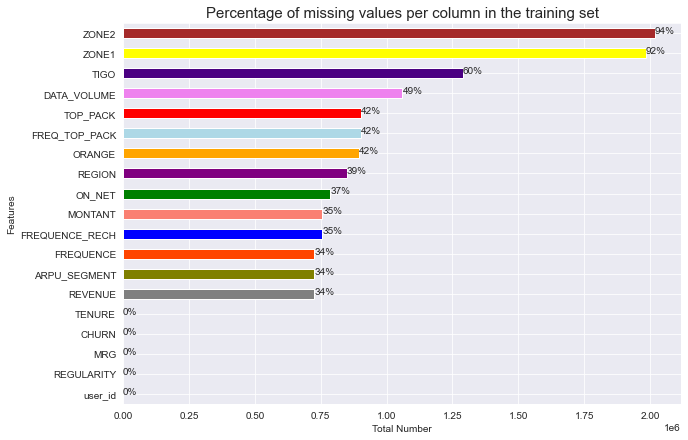

In [18]:
# Visualizing the missing values in the train dataset
ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (10, 7),
                                          color=['indigo', 'yellow', 'brown', 'pink',
                                                 'cyan', 'gray', 'olive', 'orangered',
                                                 'blue', 'salmon', 'green', 'purple',
                                                 'orange', 'lightblue', 'red', 'violet'])

# Add some attributes
plt.title('Percentage of missing values per column in the training set', fontdict={'size':15})
plt.xlabel('Total Number')
plt.ylabel('Features')

for p in ax.patches:
    percentage = '{:,.0f}%'.format((p.get_width()/train.shape[0]) * 100)
    width, height = p.get_width(), p.get_height()
    x = p.get_x() + width + 0.02
    y =p.get_y() + height/2
    ax.annotate(percentage, (x,y));

In [19]:
# Check the information of the test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380127 entries, 0 to 380126
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         380127 non-null  object 
 1   REGION          230399 non-null  object 
 2   TENURE          380127 non-null  object 
 3   MONTANT         247072 non-null  float64
 4   FREQUENCE_RECH  247072 non-null  float64
 5   REVENUE         252754 non-null  float64
 6   ARPU_SEGMENT    252754 non-null  float64
 7   FREQUENCE       252754 non-null  float64
 8   DATA_VOLUME     193087 non-null  float64
 9   ON_NET          241613 non-null  float64
 10  ORANGE          222897 non-null  float64
 11  TIGO            153126 non-null  float64
 12  ZONE1           29861 non-null   float64
 13  ZONE2           24076 non-null   float64
 14  MRG             380127 non-null  object 
 15  REGULARITY      380127 non-null  int64  
 16  TOP_PACK        221348 non-null  object 
 17  FREQ_TOP_P

In [20]:
# The .describe() function will demonstrate the count, mean, std dev, min, max, etc values for the 
# Numerical features present in the test dataset
test.describe()

MONTANT  FREQUENCE_RECH        REVENUE   ARPU_SEGMENT  \
count  247072.000000   247072.000000  252754.000000  252754.000000   
mean     5524.958826       11.519853    5499.680468    1833.232443   
std      7116.320922       13.242743    7195.093138    2398.360570   
min        25.000000        1.000000       1.000000       0.000000   
25%      1000.000000        2.000000    1000.000000     333.000000   
50%      3000.000000        7.000000    3000.000000    1000.000000   
75%      7350.000000       16.000000    7351.000000    2450.000000   
max    201500.000000      146.000000  200965.000000   66988.000000   

           FREQUENCE    DATA_VOLUME         ON_NET         ORANGE  \
count  252754.000000  193087.000000  241613.000000  222897.000000   
mean       13.957963    3346.095454     278.806310      95.193008   
std        14.652660   12002.653047     874.253933     203.950776   
min         1.000000       0.000000       0.000000       0.000000   
25%         3.000000       0.000000       5.000000       7.000000   
50%         9.000000     259.000000      27.000000      29.000000   
75%        19.000000    2884.000000     157.000000      99.000000   
max        91.000000  977796.000000   26786.000000    6345.000000   

                TIGO         ZONE1         ZONE2     REGULARITY  FREQ_TOP_PACK  
count  153126.000000  29861.000000  24076.000000  380127.000000  221348.000000  
mean       23.052088      8.164663      7.655300      28.081699       9.261584  
std        65.042688     48.857605     33.021478      22.289094      12.268907  
min         0.000000      0.000000      0.000000       1.000000       1.000000  
25%         2.000000      0.000000      0.000000       6.000000       2.000000  
50%         6.000000      1.000000      2.000000      24.000000       5.000000  
75%        20.000000      3.000000      5.000000      51.000000      12.000000  
max      3708.000000   4215.000000   1649.000000      62.000000     390.000000

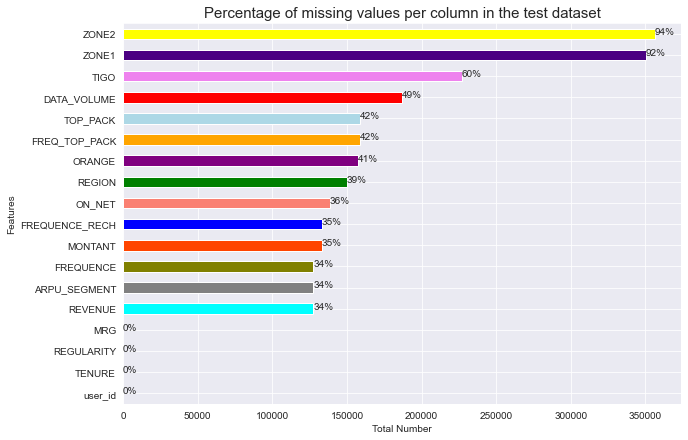

In [21]:
# Visualizing the missing values in the test dataset
ax = test.isna().sum().sort_values().plot(kind='barh', figsize = (10, 7),
                                          color = ['indigo', 'yellow', 'brown', 'pink',
                                                 'cyan', 'gray', 'olive', 'orangered',
                                                 'blue', 'salmon', 'green', 'purple',
                                                 'orange', 'lightblue', 'red', 'violet'])
# Add some attributes
plt.title('Percentage of missing values per column in the test dataset', fontdict={'size': 15})
plt.xlabel('Total Number')
plt.ylabel('Features')

for p in ax.patches:
    percentage = '{:,.0f}%'.format((p.get_width()/test.shape[0]) * 100)
    width, height = p.get_width(), p.get_height()
    x = p.get_x() + width + 0.02
    y = p.get_y() +  height/2
    ax.annotate(percentage, (x, y));

Similar distribution of null values btw train and test

*Do the same users repeat in the train set?*

In [22]:
train['user_id'].value_counts().max()

1

*Do the same users repeat in the train and test set?*

In [23]:
set(train['user_id'].unique()).intersection(set(test['user_id'].unique()))

set()

### Combine train and test set for easy preprocessing 

In [24]:
# Combine train and test set
ntrain = train.shape[0] # to be used to split train and test set from the combined dataframe

train['source'] = 'train'

test['source'] = 'test'

all_data = pd.concat((train, test)).reset_index(drop=True)
print(f'The shape of the combined dataframe is: {all_data.shape}')
print(train.shape, test.shape, all_data.shape)

The shape of the combined dataframe is: (2534175, 20)
(2154048, 20) (380127, 19) (2534175, 20)


In [25]:
# Preview the last five rows of the combined dataframe
all_data.tail()

user_id    REGION        TENURE  \
2534170  fffe7e03c7eede2ad0a728ee516c4d342dd16107     DAKAR  K > 24 month   
2534171  fffec230e6a1aa51ab37d0051ece42de611e71c6       NaN  K > 24 month   
2534172  ffff0dcc1ab9812bf205b6d76e9d084053cd96f5       NaN  K > 24 month   
2534173  ffff91ea6a09a0c8ea42bc6ae33df4b5e06283dc       NaN  K > 24 month   
2534174  ffffb393b346f5348034e6e22be93778d94d4beb  DIOURBEL  K > 24 month   

         MONTANT  FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  FREQUENCE  \
2534170   4000.0             8.0   3999.0        1333.0        8.0   
2534171      NaN             NaN      NaN           NaN        NaN   
2534172   3950.0             7.0   3949.0        1316.0       10.0   
2534173   3850.0            18.0   3955.0        1318.0       23.0   
2534174      NaN             NaN      NaN           NaN        NaN   

         DATA_VOLUME  ON_NET  ORANGE  TIGO  ZONE1  ZONE2 MRG  REGULARITY  \
2534170       1587.0    26.0   250.0   1.0    NaN    NaN  NO          53   
2534171          NaN     NaN     NaN   NaN    NaN    NaN  NO           1   
2534172       1724.0    25.0    71.0   NaN    NaN    NaN  NO          15   
2534173       2962.0     0.0     7.0   NaN    NaN    NaN  NO          29   
2534174          NaN     0.0     NaN   NaN    NaN    NaN  NO          20   

                            TOP_PACK  FREQ_TOP_PACK  CHURN source  
2534170  Mixt 250F=Unlimited_call24H            5.0    NaN   test  
2534171                          NaN            NaN    NaN   test  
2534172          IVR Echat_Daily_50F            6.0    NaN   test  
2534173         Data: 100 F=40MB,24H           11.0    NaN   test  
2534174                          NaN            NaN    NaN   test

In [26]:
# Check the column names and datatypes
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534175 entries, 0 to 2534174
Data columns (total 20 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           float64
 19  source          object 
dtypes: float64(13), int64(1), object(6)
memory usage: 386.7+ MB


In [27]:
all_data.columns

Index(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK',
       'CHURN', 'source'],
      dtype='object')

In [28]:
# Check the datatype of the combined dataset
all_data.dtypes

user_id            object
REGION             object
TENURE             object
MONTANT           float64
FREQUENCE_RECH    float64
REVENUE           float64
ARPU_SEGMENT      float64
FREQUENCE         float64
DATA_VOLUME       float64
ON_NET            float64
ORANGE            float64
TIGO              float64
ZONE1             float64
ZONE2             float64
MRG                object
REGULARITY          int64
TOP_PACK           object
FREQ_TOP_PACK     float64
CHURN             float64
source             object
dtype: object

In [29]:
# Check the first 5 rows of the combined dataset
all_data.head()

user_id  REGION         TENURE  MONTANT  \
0  00000bfd7d50f01092811bc0c8d7b0d6fe7c3596  FATICK   K > 24 month   4250.0   
1  00000cb4a5d760de88fecb38e2f71b7bec52e834     NaN  I 18-21 month      NaN   
2  00001654a9d9f96303d9969d0a4a851714a4bb57     NaN   K > 24 month   3600.0   
3  00001dd6fa45f7ba044bd5d84937be464ce78ac2   DAKAR   K > 24 month  13500.0   
4  000028d9e13a595abe061f9b58f3d76ab907850f   DAKAR   K > 24 month   1000.0   

   FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  ON_NET  \
0            15.0   4251.0        1417.0       17.0          4.0   388.0   
1             NaN      NaN           NaN        NaN          NaN     NaN   
2             2.0   1020.0         340.0        2.0          NaN    90.0   
3            15.0  13502.0        4501.0       18.0      43804.0    41.0   
4             1.0    985.0         328.0        1.0          NaN    39.0   

   ORANGE  TIGO  ZONE1  ZONE2 MRG  REGULARITY                        TOP_PACK  \
0    46.0   1.0    1.0    2.0  NO          54  On net 200F=Unlimited _call24H   
1     NaN   NaN    NaN    NaN  NO           4                             NaN   
2    46.0   7.0    NaN    NaN  NO          17         On-net 1000F=10MilF;10d   
3   102.0   2.0    NaN    NaN  NO          62               Data:1000F=5GB,7d   
4    24.0   NaN    NaN    NaN  NO          11     Mixt 250F=Unlimited_call24H   

   FREQ_TOP_PACK  CHURN source  
0            8.0    0.0  train  
1            NaN    1.0  train  
2            1.0    0.0  train  
3           11.0    0.0  train  
4            2.0    0.0  train

### Bivariate Feature Understanding & Data Preparation

#### Numeric-

#### MONTANT

#### Describing Data
Summary statistics, which include things like the mean, min, and max of the data, can be useful to get a feel for how large some of the variables are and what variables may be the most important. 

In [30]:
# The .describe() function will demonstrate the count, mean, std dev, min, IQR, max, etc values for the 
# Numerical features present in the dataset
all_data.describe()

MONTANT  FREQUENCE_RECH       REVENUE  ARPU_SEGMENT     FREQUENCE  \
count  1.644381e+06    1.644381e+06  1.680754e+06  1.680754e+06  1.680754e+06   
mean   5.531041e+03    1.152773e+01  5.509137e+03  1.836385e+03  1.397511e+01   
std    7.112086e+03    1.326936e+01  7.188312e+03  2.396100e+03  1.468782e+01   
min    1.000000e+01    1.000000e+00  1.000000e+00  0.000000e+00  1.000000e+00   
25%    1.000000e+03    2.000000e+00  1.000000e+03  3.330000e+02  3.000000e+00   
50%    3.000000e+03    7.000000e+00  3.000000e+03  1.000000e+03  9.000000e+00   
75%    7.350000e+03    1.600000e+01  7.362000e+03  2.454000e+03  2.000000e+01   
max    4.700000e+05    1.460000e+02  5.321770e+05  1.773920e+05  9.100000e+01   

        DATA_VOLUME        ON_NET        ORANGE          TIGO          ZONE1  \
count  1.286702e+06  1.608986e+06  1.481697e+06  1.017158e+06  199582.000000   
mean   3.363396e+03  2.778569e+02  9.538476e+01  2.310065e+01       8.169314   
std    1.311735e+04  8.729239e+02  2.048316e+02  6.380069e+01      42.408409   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    0.000000e+00  5.000000e+00  7.000000e+00  2.000000e+00       0.000000   
50%    2.580000e+02  2.700000e+01  2.900000e+01  6.000000e+00       1.000000   
75%    2.893000e+03  1.560000e+02  9.900000e+01  2.000000e+01       3.000000   
max    1.823866e+06  5.080900e+04  2.132300e+04  4.174000e+03    4792.000000   

               ZONE2    REGULARITY  FREQ_TOP_PACK         CHURN  
count  160900.000000  2.534175e+06   1.472802e+06  2.154048e+06  
mean        7.568571  2.804838e+01   9.270827e+00  1.875474e-01  
std        33.417872  2.228719e+01   1.227871e+01  3.903504e-01  
min         0.000000  1.000000e+00   1.000000e+00  0.000000e+00  
25%         0.000000  6.000000e+00   2.000000e+00  0.000000e+00  
50%         2.000000  2.400000e+01   5.000000e+00  0.000000e+00  
75%         5.000000  5.100000e+01   1.200000e+01  0.000000e+00  
max      3697.000000  6.200000e+01   7.130000e+02  1.000000e+00

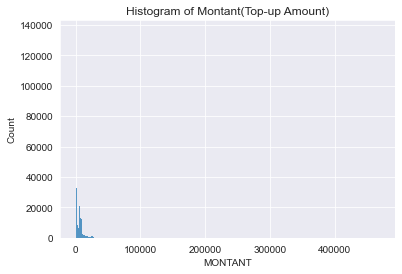

In [31]:
# Plot a histogram of MONTANT(Top-up Amount)
sns.histplot(all_data["MONTANT"], kde = False).set_title("Histogram of Montant(Top-up Amount)")
plt.show()  # kde is density plot, setting it to true plots the density and i don't want that because it can be distracting.

From the histogram plot above, the MONTANT(top up amount) for majority of the customers is less than 50,000 but outliers are present in the data that is not visible from the histogram, a boxplot will be able to show the outliers.

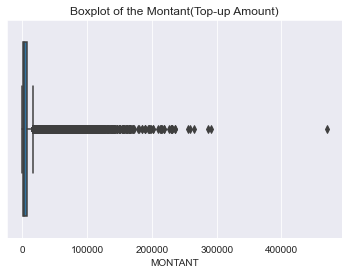

In [32]:
# Create a boxplot of the MONTANT(top up amounts)
sns.boxplot(all_data['MONTANT']).set_title('Boxplot of the Montant(Top-up Amount)')
plt.show()

From the boxplot above, the minimum and maximum top up amount for expresso customers is between 10 and 475,000 with outliers present in the distribution. 

<AxesSubplot:xlabel='MONTANT', ylabel='Density'>

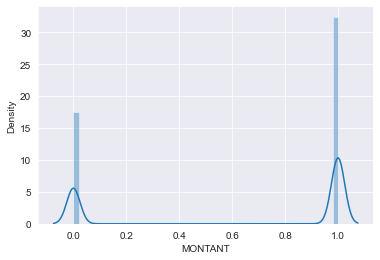

In [33]:
sns.distplot(all_data['MONTANT'] < 300000)

<AxesSubplot:xlabel='MONTANT', ylabel='FREQUENCE_RECH'>

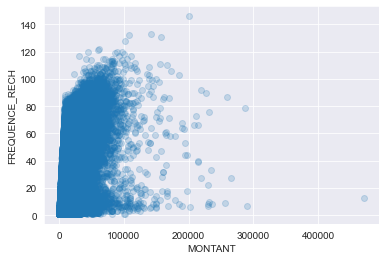

In [34]:
# Create a scatterplot of the MONTANT(Top up amount) against 
# FREQUENCE_RECH(Â number of times the customer refilled)
sns.regplot(x="MONTANT", y="FREQUENCE_RECH", data=all_data, fit_reg=False, scatter_kws={"alpha": 0.2})

From the scatterplot above, majority of the customers recharged between 10 to 100,000 with the heatmap of the scatter plot indicating that and the number of times they refilled varied from 10 to 100. We see a positive dependence between the two measures -- top up amount(MONTANT) is correlated with the number of times the customer refilled(FREQUENCE_RECH) and vice-versa.

In [35]:
# Check for the number of missing values in the MONTANT column
all_data['MONTANT'].isna().sum()

889794

There are 889794 missing values from the MONTANT column.

#### FREQUENCE_RECH(Number of times the customer refilled)

In [36]:
# The .describe() function will demonstrate the count, mean, std dev, min, IQR, max, etc values for the 
# Numerical features present in the dataset
all_data['FREQUENCE_RECH'].describe()

count    1.644381e+06
mean     1.152773e+01
std      1.326936e+01
min      1.000000e+00
25%      2.000000e+00
50%      7.000000e+00
75%      1.600000e+01
max      1.460000e+02
Name: FREQUENCE_RECH, dtype: float64

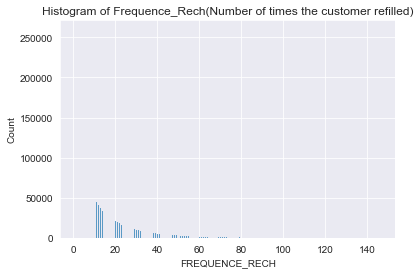

In [37]:
# Plot a histogram of FREQUENCE_RECH(Number of times the customer refilled)
sns.histplot(all_data["FREQUENCE_RECH"], kde = False).set_title("Histogram of Frequence_Rech(Number of times the customer refilled)")
plt.show()  

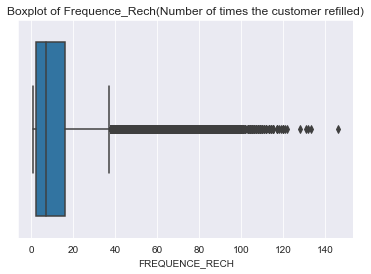

In [38]:
# Create a boxplot of the FREQUENCE_RECH(Number of times the customer refilled)
sns.boxplot(all_data['FREQUENCE_RECH']).set_title('Boxplot of Frequence_Rech(Number of times the customer refilled)')
plt.show()

From the boxplot above, the minimum and maximum number of times the customers refilled for expresso customers is between 10 and 145 with outliers present in the distribution. 

<AxesSubplot:xlabel='FREQUENCE_RECH', ylabel='Density'>

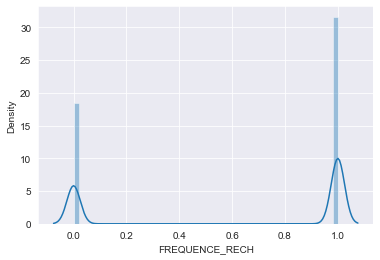

In [39]:
sns.distplot(all_data['FREQUENCE_RECH'] < 50)

<AxesSubplot:xlabel='FREQUENCE_RECH', ylabel='MONTANT'>

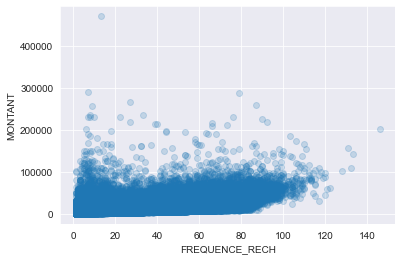

In [40]:
# Create a scatterplot of the FREQUENCE_RECH(Â number of times the customer refilled) 
# against the MONTANT(Top up amount)
sns.regplot(x='FREQUENCE_RECH', y='MONTANT', data=all_data, fit_reg=False, scatter_kws={'alpha': 0.2})

From the scatterplot above, the minimum and maximum number of times the customers refilled(Frequence_rech) for expresso customers is between 10 and 100 with outliers over 100 present in the distribution. We see a positive dependence between the two measures -- The number of times the customer refilled(FREQUENCE_RECH) is correlated to top up amount(MONTANT) and vice-versa.

In [41]:
# Check for the total number of missing values in the FREQUENCE_RECH column
all_data['FREQUENCE_RECH'].isna().sum()

889794

There are 889794 missing values from the FREQUENCE_RECH column.

#### REVENUE(Monthly income of each client)

In [42]:
# The .describe() function will demonstrate the count, mean, std dev, min, IQR, max, etc values for the 
# Numerical features present in the dataset
all_data['REVENUE'].describe()

count    1.680754e+06
mean     5.509137e+03
std      7.188312e+03
min      1.000000e+00
25%      1.000000e+03
50%      3.000000e+03
75%      7.362000e+03
max      5.321770e+05
Name: REVENUE, dtype: float64

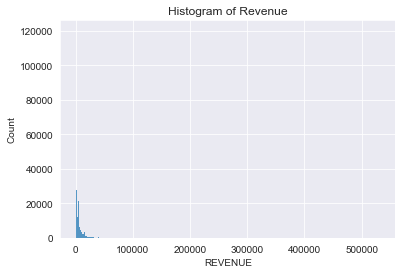

In [43]:
# Plot a histogram of Revenue(Monthly income of each client)
sns.histplot(all_data["REVENUE"], kde = False).set_title("Histogram of Revenue")
plt.show()

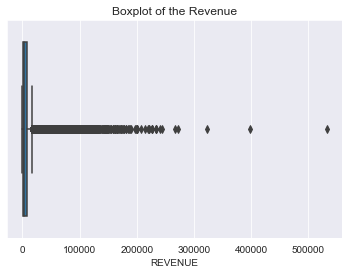

In [44]:
# Create a boxplot of the REVENUE(monthly income of each client)
sns.boxplot(all_data['REVENUE']).set_title("Boxplot of the Revenue")
plt.show()

From the boxplot above, the range of monthly income for expresso customers is between a minimun of 1 and and a maximum of 532,000. with outliers present in the distribution.

<AxesSubplot:xlabel='REVENUE', ylabel='Density'>

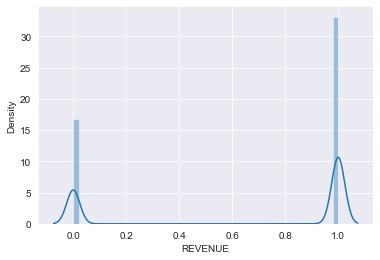

In [45]:
sns.distplot(all_data['REVENUE'] < 100000)

<AxesSubplot:xlabel='REVENUE', ylabel='MONTANT'>

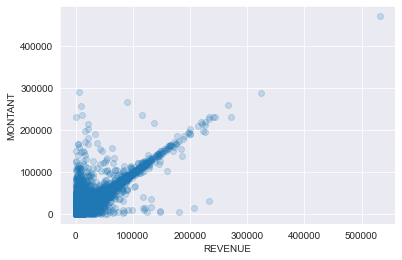

In [46]:
# Create a scatterplot of the REVENUE(monthly income of each client) against MONTANT(Top up amount)
sns.regplot(x='REVENUE', y='MONTANT', data=all_data, fit_reg=False, scatter_kws={'alpha': 0.2})

From the scatterplot above, the higher the client earns(REVENUE), the higher the top up amount(MONTANT). We see a positive moderate linear association between the two measures -- the monthly income of a client is directly correlated to the top-up amount. 

In [47]:
# Check for the total number of missing values in the REVENUE column
all_data['REVENUE'].isna().sum()

853421

There are 853421 missing values from the REVENUE column.

#### ARPU_SEGMENT(income over 90 days / 3)

In [48]:
# The .describe() function will demonstrate the count, mean, std dev, min, IQR, max, etc values for the 
# Numerical features present in the dataset
all_data['ARPU_SEGMENT'].describe()

count    1.680754e+06
mean     1.836385e+03
std      2.396100e+03
min      0.000000e+00
25%      3.330000e+02
50%      1.000000e+03
75%      2.454000e+03
max      1.773920e+05
Name: ARPU_SEGMENT, dtype: float64

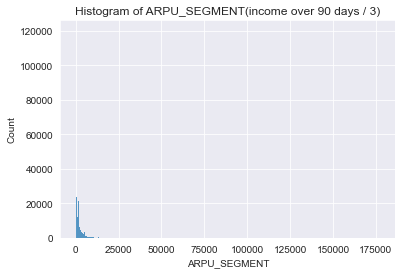

In [49]:
# Plot a histogram of ARPU_SEGMENT(income over 90 days / 3)
sns.histplot(all_data["ARPU_SEGMENT"], kde = False).set_title("Histogram of ARPU_SEGMENT(income over 90 days / 3)")
plt.show()

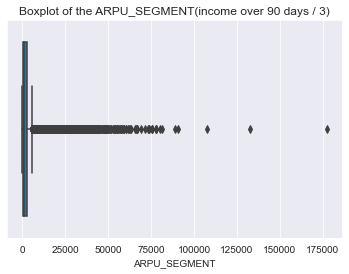

In [50]:
# Create a boxplot of the ARPU_SEGMENT(income over 90 days / 3) 
sns.boxplot(all_data['ARPU_SEGMENT']).set_title("Boxplot of the ARPU_SEGMENT(income over 90 days / 3)")
plt.show()

From the boxplot above, the range of income over 90 days/3 for expresso customers is between 0 and 177,000. with outliers present in the distribution.

<AxesSubplot:xlabel='ARPU_SEGMENT', ylabel='Density'>

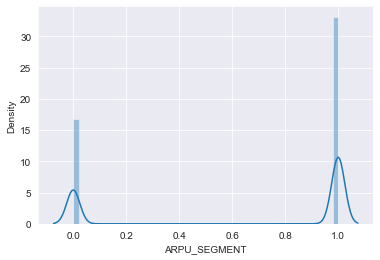

In [51]:
sns.distplot(all_data['ARPU_SEGMENT'] < 100000)

<AxesSubplot:xlabel='ARPU_SEGMENT', ylabel='REVENUE'>

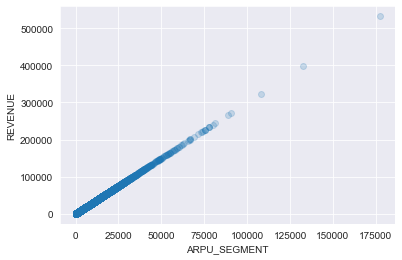

In [52]:
# Create a scatterplot of the ARPU_SEGMENT(income over 90 days / 3) 
# against REVENUE(monthly income of each client)
sns.regplot(x='ARPU_SEGMENT', y='REVENUE', data=all_data, fit_reg=False, scatter_kws={'alpha': 0.2})

From the scatter plot above, there is a positive strong linear association between ARPU_SEGMENT(income over 90 days/3) and REVENUE(monthly income)

<AxesSubplot:xlabel='ARPU_SEGMENT', ylabel='FREQUENCE_RECH'>

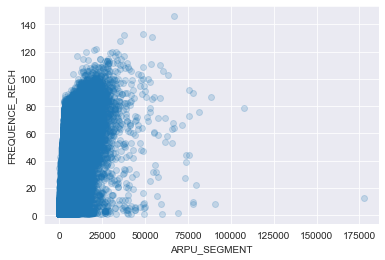

In [53]:
# Create a scatterplot of the ARPU_SEGMENT(income over 90 days / 3) 
# against FREQUENCE_RECH(Â number of times the customer refilled)
sns.regplot(x='ARPU_SEGMENT', y='FREQUENCE_RECH', data=all_data, fit_reg=False, scatter_kws={'alpha': 0.2})

From the scatterplot above, We see a positive dependence between the two measures -- the monthly income of a client over 90 days is directly correlated to the number of times the customer refilled.

In [54]:
# Check for the total number of missing values in the ARPU_SEGMENT column
all_data['ARPU_SEGMENT'].isna().sum()

853421

There are 853421 missing values from the REVENUE column.

#### FREQUENCE(number of times the client has made an income)

In [55]:
# The .describe() function will demonstrate the count, mean, std dev, min, IQR, max, etc values for the 
# Numerical features present in the dataset
all_data['FREQUENCE'].describe()

count    1.680754e+06
mean     1.397511e+01
std      1.468782e+01
min      1.000000e+00
25%      3.000000e+00
50%      9.000000e+00
75%      2.000000e+01
max      9.100000e+01
Name: FREQUENCE, dtype: float64

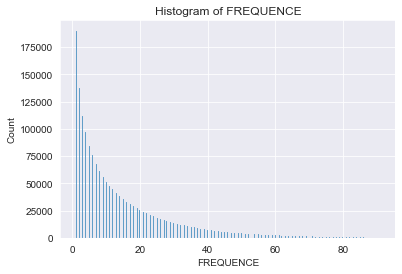

In [56]:
# Plot a histogram of FREQUENCE(Number of times the client has made an income)
sns.histplot(all_data['FREQUENCE'], kde = False).set_title('Histogram of FREQUENCE')
plt.show()

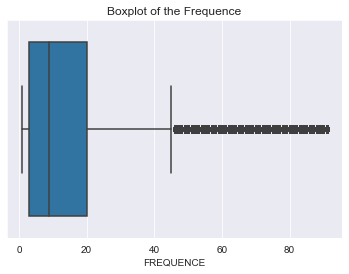

In [57]:
# Create a boxplot of the FREQUENCE(number of times the client has made an income)
sns.boxplot(all_data['FREQUENCE']).set_title('Boxplot of the Frequence')
plt.show()

<AxesSubplot:xlabel='FREQUENCE', ylabel='Density'>

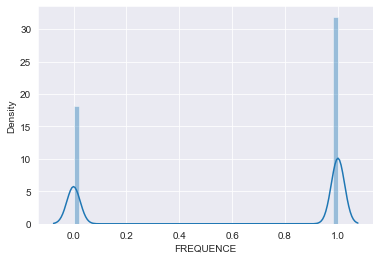

In [58]:
sns.distplot(all_data['FREQUENCE'] < 50)

<AxesSubplot:xlabel='FREQUENCE', ylabel='FREQUENCE_RECH'>

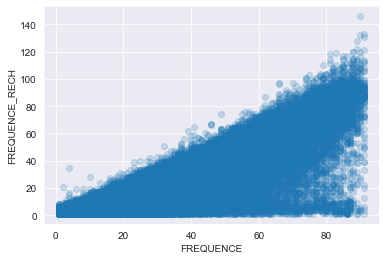

In [59]:
# Create a scatterplot of the FREQUENCE(Number of times the client has made an income)
# against FREQUENCE_RECH(Number of times the customer refilled)
sns.regplot(x='FREQUENCE', y='FREQUENCE_RECH', data=all_data, fit_reg=False, scatter_kws={'alpha': 0.2})

From the scatterplot above, We see a weak positive linear association between the number of times the client has made an income(FREQUENCE) and FREQUENCE_RECH(Number of times the customer refilled).

<AxesSubplot:xlabel='FREQUENCE', ylabel='MONTANT'>

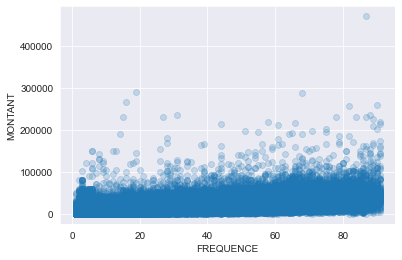

In [60]:
# Create a scatterplot of the FREQUENCE(Number of times the client has made an income) 
# against FREQUENCE_RECH(Top up amount)
sns.regplot(x='FREQUENCE', y='MONTANT', data=all_data, fit_reg=False, scatter_kws={'alpha': 0.2})

From the scatterplot above, We see a weak positive linear association between the number of times the client has made an income(FREQUENCE) and MONTANT(Top up amount).

In [61]:
# Check for the number of missing values in the FREQUENCE column
all_data['FREQUENCE'].isna().sum()

853421

There are 853421 missing values from the REVENUE column.

#### DATA_VOLUME(number of connections)

In [62]:
# The .describe() function will demonstrate the count, mean, std dev, min, IQR, max, etc values for the 
# Numerical features present in the dataset
all_data['DATA_VOLUME'].describe()

count    1.286702e+06
mean     3.363396e+03
std      1.311735e+04
min      0.000000e+00
25%      0.000000e+00
50%      2.580000e+02
75%      2.893000e+03
max      1.823866e+06
Name: DATA_VOLUME, dtype: float64

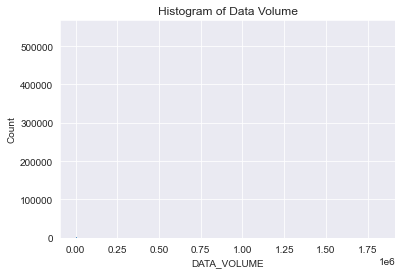

In [63]:
# Create a histogram of the DATA_VOLUME
sns.histplot(all_data['DATA_VOLUME'], kde=False).set_title('Histogram of Data Volume')
plt.show()

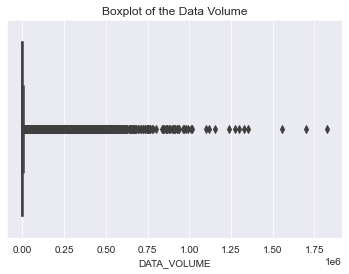

In [64]:
# Create a boxplot of the Data_Volume(number of connections)
sns.boxplot(all_data['DATA_VOLUME']).set_title('Boxplot of the Data Volume')
plt.show()

From the boxplot above, the range of data volume for expresso customers is between 0 and 1,800,000. with outliers present in the distribution.

<AxesSubplot:xlabel='DATA_VOLUME', ylabel='Density'>

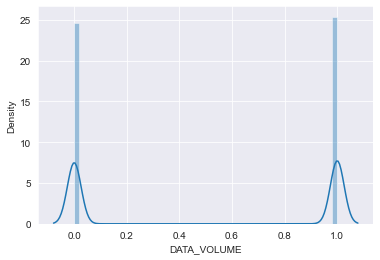

In [65]:
sns.distplot(all_data['DATA_VOLUME'] < 750000)

<AxesSubplot:xlabel='DATA_VOLUME', ylabel='REVENUE'>

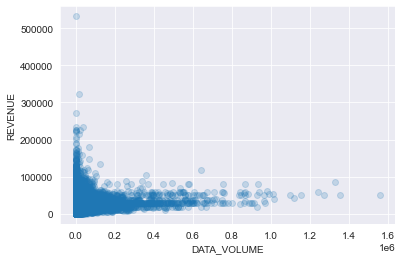

In [66]:
# Create a scatterplot of the DATA_VOLUME(number of connections)
# against REVENUE(monthly income of each client)
sns.regplot(x='DATA_VOLUME', y='REVENUE', data=all_data, fit_reg=False, scatter_kws={'alpha':0.2})

From the scatterplot above, We see a moderate positive linear association between the number of connections(DATA_VOLUME) and REVENUE(monthly income of each client).

<AxesSubplot:xlabel='DATA_VOLUME', ylabel='FREQUENCE_RECH'>

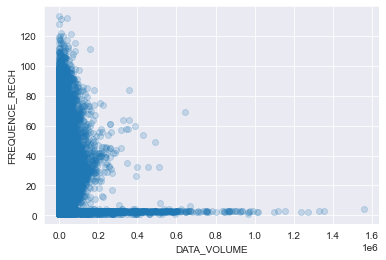

In [67]:
# Create a scatterplot of the DATA_VOLUME(number of connections)
# against FREQUENCE_RECH(The number of times the customer refilled)
sns.regplot(x='DATA_VOLUME', y='FREQUENCE_RECH', data=all_data, fit_reg=False, scatter_kws={'alpha':0.2})

From the scatterplot above, We see a moderate positive linear association between the number of number of connections(DATA_VOLUME) and FREQUENCE_RECH(A number of times the customer refilled).

<AxesSubplot:xlabel='DATA_VOLUME', ylabel='FREQUENCE'>

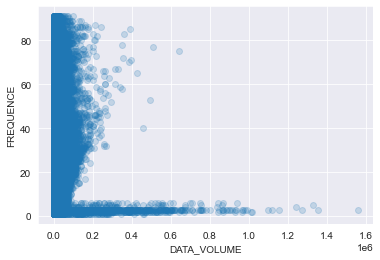

In [68]:
# Create a scatterplot of the DATA_VOLUME(number of connections)
# against FREQUENCE(number of times the client has made an income)
sns.regplot(x='DATA_VOLUME', y='FREQUENCE', data=all_data, fit_reg=False, scatter_kws={'alpha':0.2})

From the scatterplot above, We see a moderate positive linear association between the number of connections(DATA_VOLUME) and FREQUENCE(number of times the client has made an income).

In [69]:
# Check the total number of missing values in the DATA_VOLUME column
all_data['DATA_VOLUME'].isna().sum()

1247473

There are 1247473 missing values from the DATA_VOLUME column.

#### ON_NET(inter expresso call)

In [70]:
# The .describe() function will demonstrate the count, mean, std dev, min, IQR, max, etc values for the 
# Numerical features present in the dataset
all_data['ON_NET'].describe()

count    1.608986e+06
mean     2.778569e+02
std      8.729239e+02
min      0.000000e+00
25%      5.000000e+00
50%      2.700000e+01
75%      1.560000e+02
max      5.080900e+04
Name: ON_NET, dtype: float64

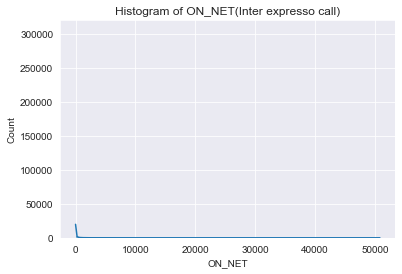

In [71]:
# Create a histogram of ON_NET(Inter Expresso Call)
sns.histplot(all_data['ON_NET'], kde=True).set_title('Histogram of ON_NET(Inter expresso call)')
plt.show()

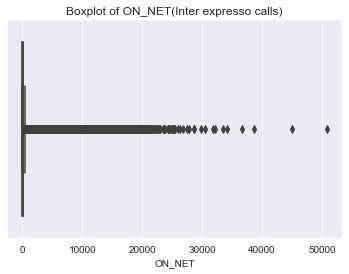

In [72]:
# Create a boxplot of the ON_NET(Inter expresso calls)
sns.boxplot(all_data['ON_NET']).set_title('Boxplot of ON_NET(Inter expresso calls)')
plt.show()

From the boxplot above, the range of values for inter expresso customers(ON_NET) is between 0 and over 50,000 with outliers present in the distribution.

<AxesSubplot:xlabel='ON_NET', ylabel='Density'>

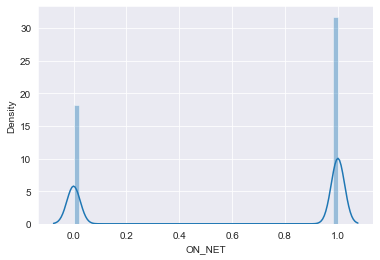

In [73]:
sns.distplot(all_data['ON_NET'] < 30000)

<AxesSubplot:xlabel='ON_NET', ylabel='REVENUE'>

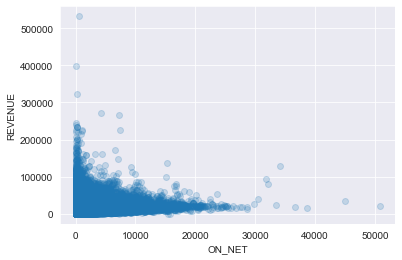

In [74]:
# Create a scatterplot of the ON_NET(Inter expresso call)
# against REVENUE(monthly income of each client)
sns.regplot(x='ON_NET', y='REVENUE', data=all_data, fit_reg=False, scatter_kws={'alpha':0.2})

From the scatterplot above, We see a moderate positive linear association between the inter expresso calls(ON_NET) and REVENUE(monthly income of each client).

<AxesSubplot:xlabel='ON_NET', ylabel='MONTANT'>

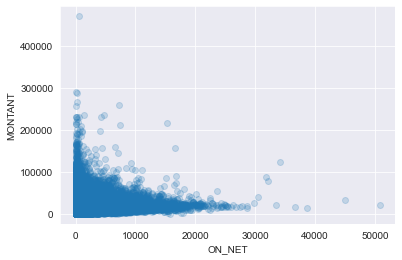

In [75]:
# Create a scatterplot of the ON_NET(Inter expresso call)
# against MONTANT(Top up amount)
sns.regplot(x='ON_NET', y='MONTANT', data=all_data, fit_reg=False, scatter_kws={'alpha':0.2})

From the scatterplot above, We see a moderate positive linear association between the inter expresso calls(ON_NET) and MONTANT(Top up amount).

In [76]:
# Check the total number of missing values in the ON_NET column
all_data['ON_NET'].isna().sum()

925189

There are 925189 missing values from the ON_NET column.

#### ORANGE(Call to Orange)

In [77]:
# The .describe() function will demonstrate the count, mean, std dev, min, IQR, max, etc values for the 
# Numerical features present in the dataset
all_data['ORANGE'].describe()

count    1.481697e+06
mean     9.538476e+01
std      2.048316e+02
min      0.000000e+00
25%      7.000000e+00
50%      2.900000e+01
75%      9.900000e+01
max      2.132300e+04
Name: ORANGE, dtype: float64

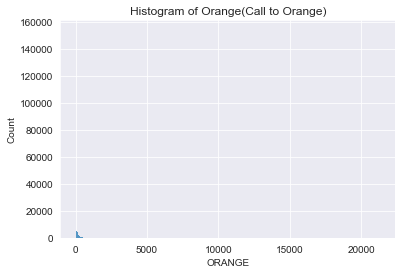

In [78]:
# Create a histogram of ORANGE(call to orange)
sns.histplot(all_data['ORANGE'], kde=False).set_title('Histogram of Orange(Call to Orange)')
plt.show()

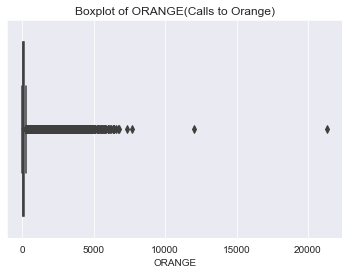

In [79]:
# Create a boxplot of Orange(Calls to Orange)
sns.boxplot(all_data['ORANGE']).set_title('Boxplot of ORANGE(Calls to Orange)')
plt.show()

From the boxplot above, the range of values for expresso calls to Orange(ORANGE) is between 0 and over 20,000 with outliers present in the distribution.

<AxesSubplot:xlabel='ORANGE', ylabel='Density'>

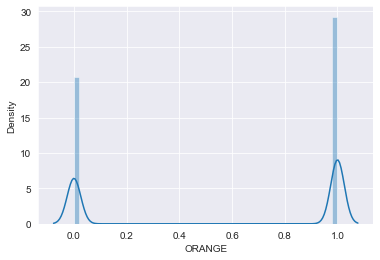

In [80]:
sns.distplot(all_data['ORANGE'] < 10000)

<AxesSubplot:xlabel='ORANGE', ylabel='MONTANT'>

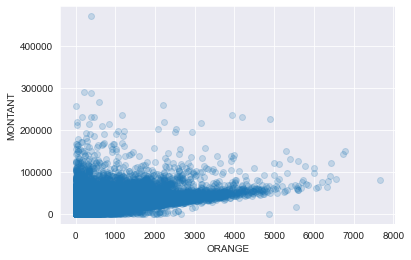

In [81]:
# Create a scatterplot of the ORANGE(Calls to Orange)
# against MONTANT(Top up amount)
sns.regplot(x='ORANGE', y='MONTANT', data=all_data, fit_reg=False, scatter_kws={'alpha':0.2})

From the scatterplot above, We see a moderate positive linear association between expresso calls to ORANGE and MONTANT(Top up amount).

In [82]:
# Check for the total number of missing values in the ORANGE column
all_data['ORANGE'].isna().sum()

1052478

There are 1052478 missing values from the ORANGE column.

#### TIGO(Calls to Tigo)

In [84]:
# The .describe() function will demonstrate the count, mean, std dev, min, IQR, max, etc values for the 
# Numerical features present in the dataset
all_data['TIGO'].describe()

count    1.017158e+06
mean     2.310065e+01
std      6.380069e+01
min      0.000000e+00
25%      2.000000e+00
50%      6.000000e+00
75%      2.000000e+01
max      4.174000e+03
Name: TIGO, dtype: float64

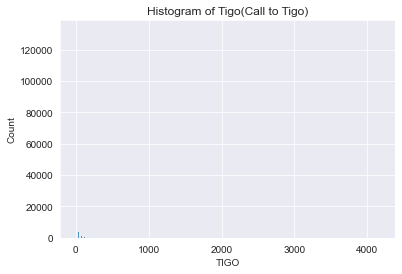

In [85]:
# Create a histogram of Tigo(call to Tigo)
sns.histplot(all_data['TIGO'], kde=False).set_title('Histogram of Tigo(Call to Tigo)')
plt.show()

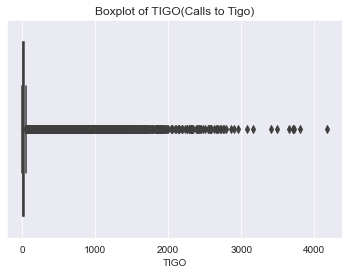

In [86]:
# Create a boxplot of Tigo(Calls to Tigo)
sns.boxplot(all_data['TIGO']).set_title('Boxplot of TIGO(Calls to Tigo)')
plt.show()

From the boxplot above, the range of values for expresso calls to TIGO is between 0 and over 4,000 with outliers present in the distribution.

<AxesSubplot:xlabel='TIGO', ylabel='Density'>

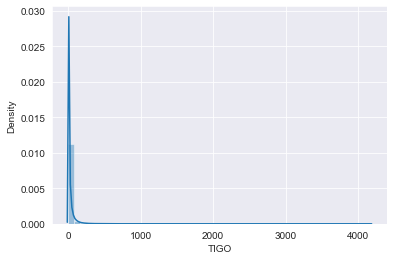

In [87]:
sns.distplot(all_data['TIGO'])

<AxesSubplot:xlabel='TIGO', ylabel='MONTANT'>

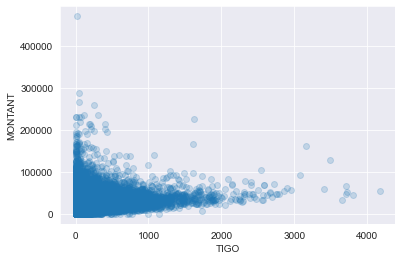

In [88]:
# Create a scatterplot of the TIGO(Calls to Tigo)
# against MONTANT(Top up amount)
sns.regplot(x='TIGO', y='MONTANT', data=all_data, fit_reg=False, scatter_kws={'alpha':0.2})

From the scatterplot above, We see a moderate positive linear association between expresso calls to Tigo and MONTANT(Top up amount).

In [89]:
# Check for the total number of missing values in the TIGO column
all_data['TIGO'].isna().sum()

1517017

There are 1517017 missing values in the TIGO column.

#### ZONE1(Calls to zone1)

In [90]:
# The .describe() function will demonstrate the count, mean, std dev, min, IQR, max, etc values for the 
# Numerical features present in the dataset
all_data['ZONE1'].describe()

count    199582.000000
mean          8.169314
std          42.408409
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max        4792.000000
Name: ZONE1, dtype: float64

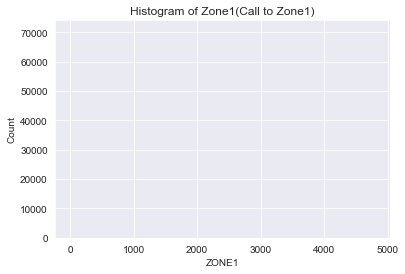

In [91]:
# Create a histogram of Zone1(Calls to Zone1)
sns.histplot(all_data['ZONE1'], kde=False).set_title('Histogram of Zone1(Call to Zone1)')
plt.show()

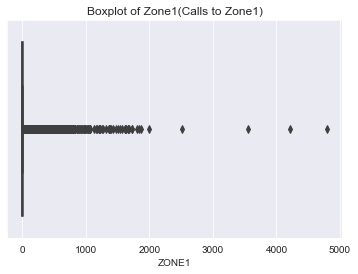

In [92]:
# Create a boxplot of Zone1(Calls to Zone1)
sns.boxplot(all_data['ZONE1']).set_title('Boxplot of Zone1(Calls to Zone1)')
plt.show()

From the boxplot above, the range of values for expresso calls to Zone1 is between 0 and 4,792 with outliers present in the distribution.

<AxesSubplot:xlabel='ZONE1', ylabel='Density'>

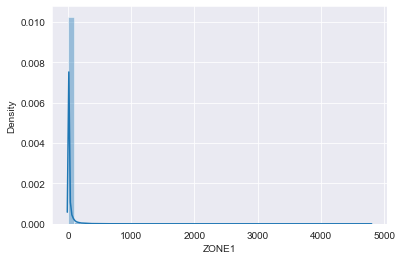

In [93]:
sns.distplot(all_data['ZONE1'])

<AxesSubplot:xlabel='ZONE1', ylabel='MONTANT'>

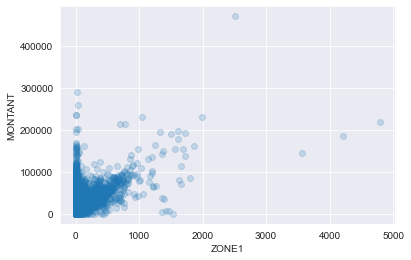

In [94]:
# Create a scatterplot of the ZONE1(Calls to Zone1)
# against MONTANT(Top up amount)
sns.regplot(x='ZONE1', y='MONTANT', data=all_data, fit_reg=False, scatter_kws={'alpha':0.2})

From the scatterplot above, We see a moderate positive linear association between expresso calls to ZONE1 and MONTANT(Top up amount).

In [95]:
# Check for the total number of missing values in the ZONE1 column
all_data['ZONE1'].isna().sum()

2334593

There are 2334593 missing values in the ZONE1 column.

#### ZONE2(Calls to Zone2)

In [96]:
# The .describe() function will demonstrate the count, mean, std dev, min, IQR, max, etc values for the 
# Numerical features present in the dataset
all_data['ZONE2'].describe()

count    160900.000000
mean          7.568571
std          33.417872
min           0.000000
25%           0.000000
50%           2.000000
75%           5.000000
max        3697.000000
Name: ZONE2, dtype: float64

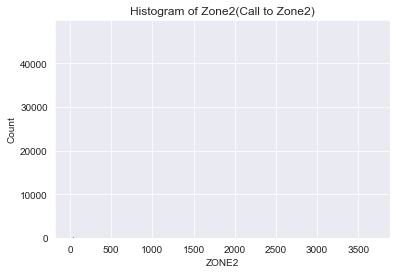

In [97]:
# Create a histogram of Zone2(Calls to Zone2)
sns.histplot(all_data['ZONE2'], kde=False).set_title('Histogram of Zone2(Call to Zone2)')
plt.show()

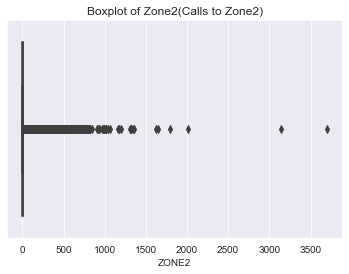

In [98]:
# Create a boxplot of Zone2(Calls to Zone2)
sns.boxplot(all_data['ZONE2']).set_title('Boxplot of Zone2(Calls to Zone2)')
plt.show()

From the boxplot above, the range of values for expresso calls to Zone2 is between 0 and 3697 with outliers present in the distribution.

<AxesSubplot:xlabel='ZONE2', ylabel='Density'>

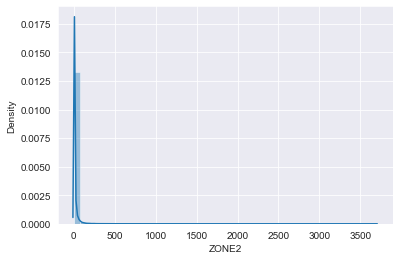

In [99]:
sns.distplot(all_data['ZONE2'])

<AxesSubplot:xlabel='ZONE2', ylabel='MONTANT'>

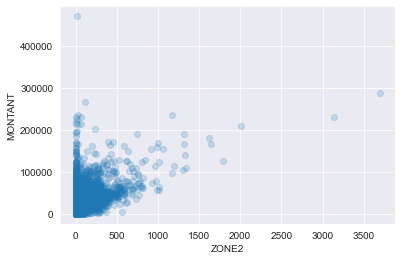

In [100]:
# Create a scatterplot of the ZONE2(Calls to Zone2)
# against MONTANT(Top up amount)
sns.regplot(x='ZONE2', y='MONTANT', data=all_data, fit_reg=False, scatter_kws={'alpha':0.2})

From the scatterplot above, We see a moderate positive linear association between expresso calls to zone2 and MONTANT(Top up amount).

In [101]:
# Check for the total number of missing values in the ZONE2 column
all_data['ZONE2'].isna().sum()

2373275

There are 2373275 missing values in the ZONE2 column.

#### FREQ_TOP_PACK(number of times the client has activated the top pack packages)

In [102]:
# The .describe() function will demonstrate the count, mean, std dev, min, IQR, max, etc values for the 
# Numerical features present in the dataset
all_data['FREQ_TOP_PACK'].describe()

count    1.472802e+06
mean     9.270827e+00
std      1.227871e+01
min      1.000000e+00
25%      2.000000e+00
50%      5.000000e+00
75%      1.200000e+01
max      7.130000e+02
Name: FREQ_TOP_PACK, dtype: float64

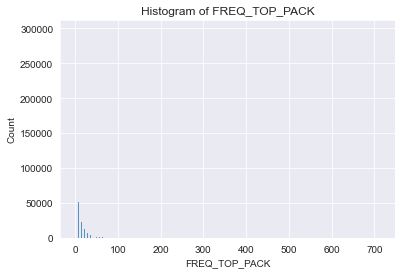

In [103]:
# Create a histogram of FREQ_TOP_PACK
sns.histplot(all_data['FREQ_TOP_PACK'], kde=False).set_title('Histogram of FREQ_TOP_PACK')
plt.show()

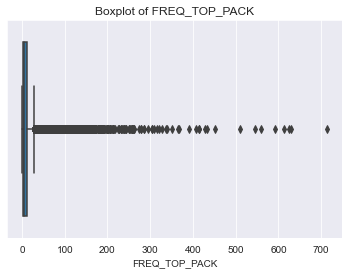

In [104]:
# Create a boxplot of FREQ_TOP_PACK
sns.boxplot(all_data['FREQ_TOP_PACK']).set_title('Boxplot of FREQ_TOP_PACK')
plt.show()

From the boxplot above, the range of values for FREQ_TOP_PACK is between 0 and over 713 with outliers present in the distribution.

<AxesSubplot:xlabel='FREQ_TOP_PACK', ylabel='Density'>

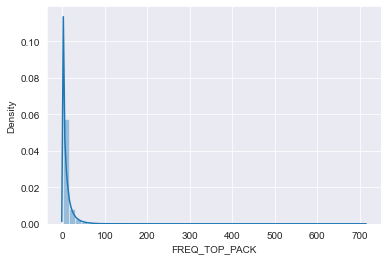

In [105]:
sns.distplot(all_data['FREQ_TOP_PACK'])

<AxesSubplot:xlabel='FREQ_TOP_PACK', ylabel='MONTANT'>

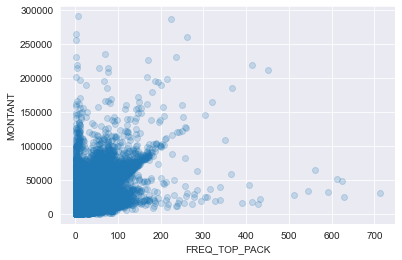

In [106]:
# Create a scatterplot of the FREQ_TOP_PACK
# against MONTANT(Top up amount)
sns.regplot(x='FREQ_TOP_PACK', y='MONTANT', data=all_data, fit_reg=False, scatter_kws={'alpha':0.2})

From the scatterplot above, We see a moderate positive linear association between FREQ_TOP_PACK and MONTANT(Top up amount).

In [107]:
# Check for the total number of missing values in the FREQ_TOP_PACK column
all_data['FREQ_TOP_PACK'].isna().sum()

1061373

There are 1061373 missing values in the FREQ_TOP_PACK column.

#### REGULARITY(number of times the client is active for 90 days)

In [108]:
# The .describe() function will demonstrate the count, mean, std dev, min, IQR, max, etc values for the 
# Numerical features present in the dataset
all_data['REGULARITY'].describe()

count    2.534175e+06
mean     2.804838e+01
std      2.228719e+01
min      1.000000e+00
25%      6.000000e+00
50%      2.400000e+01
75%      5.100000e+01
max      6.200000e+01
Name: REGULARITY, dtype: float64

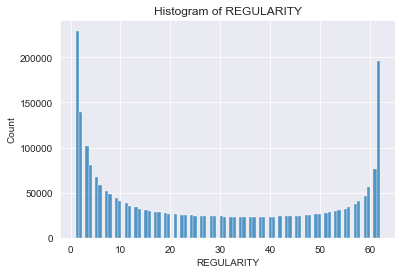

In [109]:
# Create a histogram of REGULARITY
sns.histplot(all_data['REGULARITY'], kde=False).set_title('Histogram of REGULARITY')
plt.show()

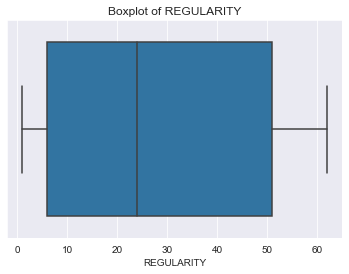

In [110]:
# Create a boxplot of REGULARITY
sns.boxplot(all_data['REGULARITY']).set_title('Boxplot of REGULARITY')
plt.show()

From the boxplot above, the range of values for REGULARITY is between 1 and 62 with no outliers present in the distribution.

<AxesSubplot:xlabel='REGULARITY', ylabel='Density'>

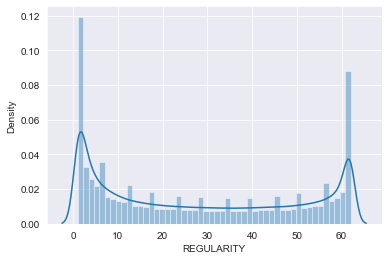

In [111]:
sns.distplot(all_data['REGULARITY'])

<AxesSubplot:xlabel='REGULARITY', ylabel='MONTANT'>

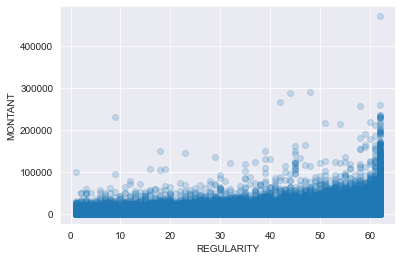

In [112]:
# Create a scatterplot of the REGULARITY
# against MONTANT(Top up amount)
sns.regplot(x='REGULARITY', y='MONTANT', data=all_data, fit_reg=False, scatter_kws={'alpha':0.2})

From the scatterplot above, We see a weak positive linear association between the number of times the client is active for 90 days(REGULARITY) and MONTANT(Top up amount).

In [113]:
# Check for the total number of missing values in the REGULARITY column
all_data['REGULARITY'].isna().sum()

0

There are no missing values in the REGULARITY column.

### <a id='2.2'>2.2. Numerical Variables</a>

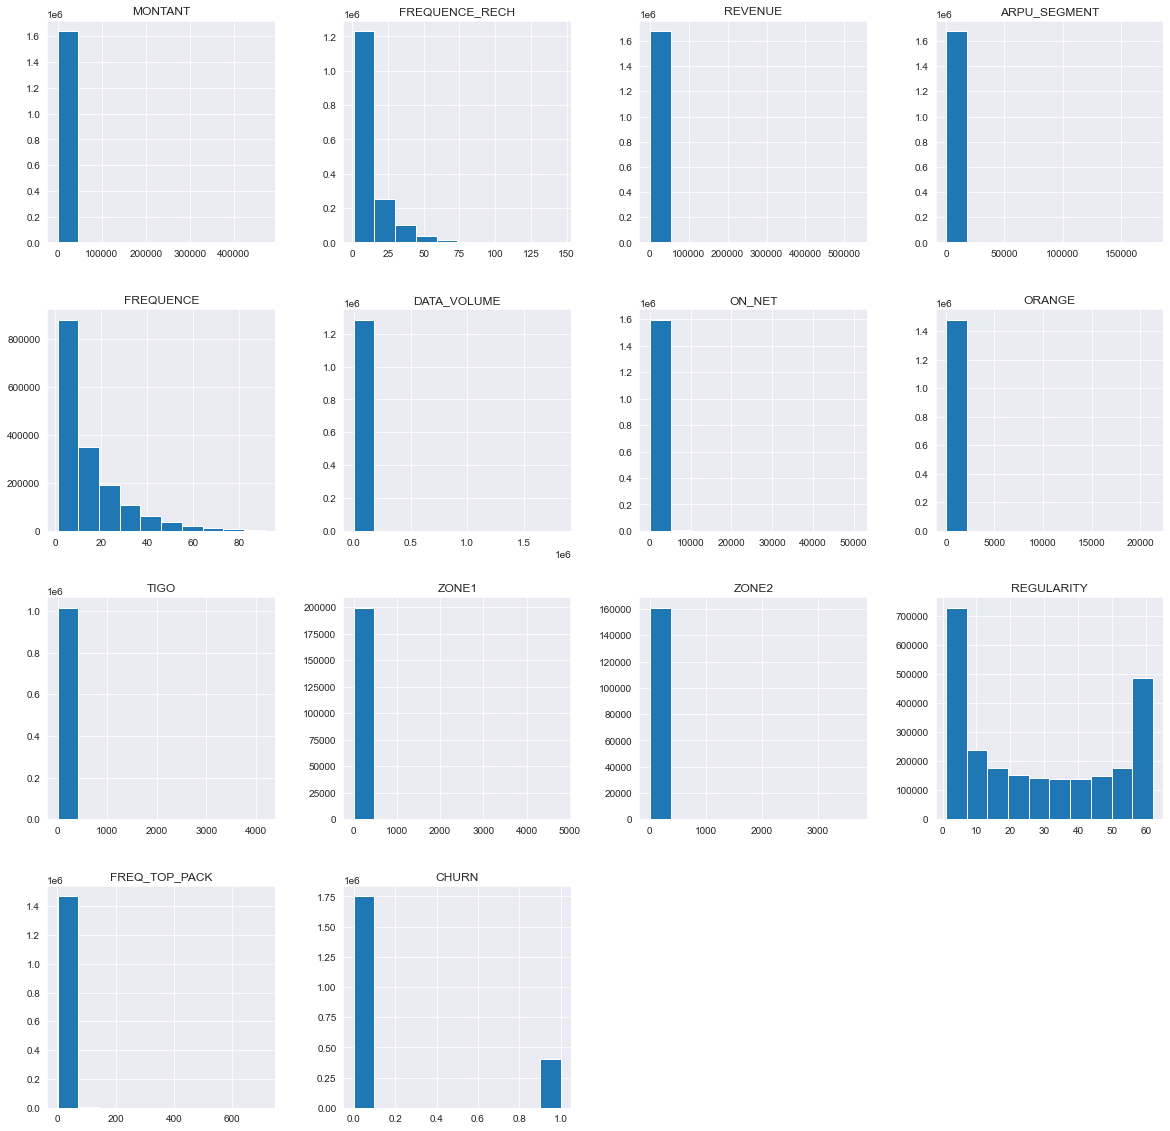

Wall time: 6.53 s


In [114]:
%%time

all_data.hist(figsize=(20,20))
plt.show()

> A few observations can be made based on the information and histograms for numerical features:

 - Many histograms are tail-heavy; indeed several distributions are right-skewed (e.g. FREQUENCE, FREQUENCE_RECH). Data transformation methods may be required to approach a normal distribution prior to fitting a model to the data.
 - MONTANT, REVENUE, ARPU_SEGMENT, DATA_VOLUME, ON_NET, ORANGE, TIGO, ZONE1, ZONE2, and FREQ_TOP_PACK are concentrated to the left of the histigram which means that majority of the customers fall within that range with a few outliers.

### Mixed categorical and quantitative data

Another situation that commonly arises in data science/analysis is when we wish to analyze bivariate data consisting of one quantitative and one categorical variable. To illustrate methods that can be used in this setting, we consider the relationship between REGION and MONTANT in the expresso data. Specifically, we consider the distribution of top up amount for people who are different regions in the REGION category. A natural tool in this setting is side-by-side boxplots. 

In [115]:
# value_counts() function returns object containing counts of unique values
all_data['REGION'].value_counts()

DAKAR          603886
THIES          211795
SAINT-LOUIS    141255
LOUGA          116458
KAOLACK        113956
DIOURBEL        78603
TAMBACOUNDA     64893
KAFFRINE        51717
KOLDA           45548
FATICK          42003
MATAM           34315
ZIGUINCHOR      25847
SEDHIOU          3662
KEDOUGOU         1210
Name: REGION, dtype: int64

#### Plotting Region(the location of each client) vs Montant(Top up amount)

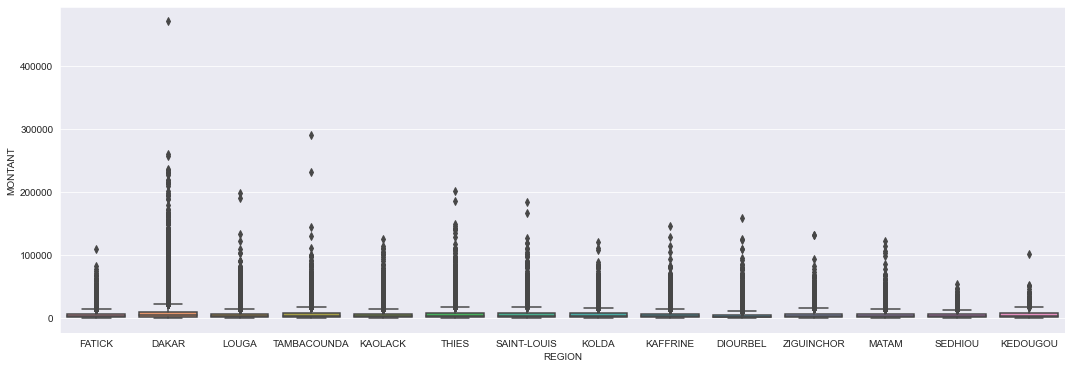

In [116]:
# Plot a boxplot of REGION against MONTANT
plt.figure(figsize=(18, 6))
a = sns.boxplot(all_data['REGION'], all_data['MONTANT'])

After plotting the side-by-side boxplot above, Here we see some unsurprising things -- clients living in DAKAR tend to spend more on top up amounts, while clients that live in SEDHIOU and KEDOUGOU spend the least in top up amount.

#### Plotting Region(the location of each client) vs Revenue(monthly income of each client)

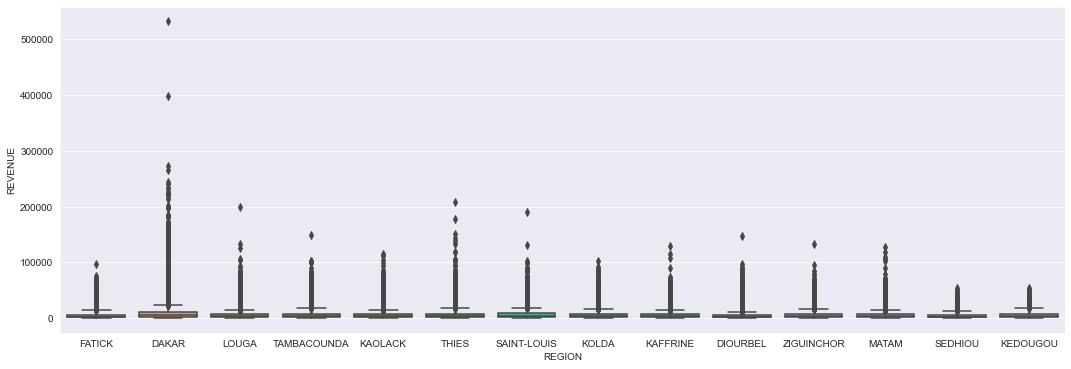

In [117]:
# Plot a boxplot of REGION against REVENUE
plt.figure(figsize=(18, 6))
a = sns.boxplot(all_data['REGION'], all_data['REVENUE'])

After plotting the side-by-side boxplot above, Here we see some unsurprising things -- clients living in DAKAR tend to earn more than clients in other regions, while clients that live in SEDHIOU and KEDOUGOU earn the least.

#### Plotting Region(the location of each client) vs Regularity(number of times the client is active for 90 days)

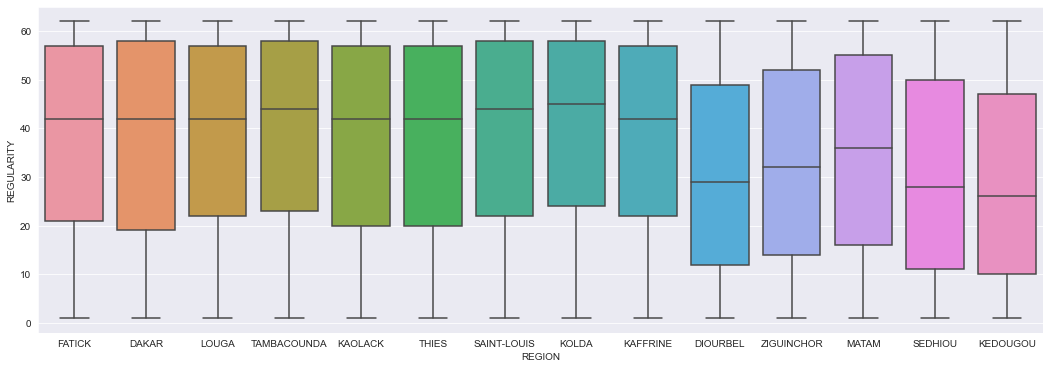

In [118]:
# Plot a boxplot of REGION against REGULARITY
plt.figure(figsize=(18, 6))
a = sns.boxplot(all_data['REGION'], all_data['REGULARITY'])

We can see quite clearly that the distributions with low median values (DIOURBEL, ZIGUINCHOR, MATAM, SEDHIOU, and KEDOUGOU) are approximately symmetrically distributed, while the distribution with high median values (FATICK, DAKAR, LOUGA, TAMBACOUNDA, KAOLACK, THIES, SAINT-LOUIS, KOLDA, KAFFRINE) are strongly left-skewed, we can see the skewness from the violin plot below.

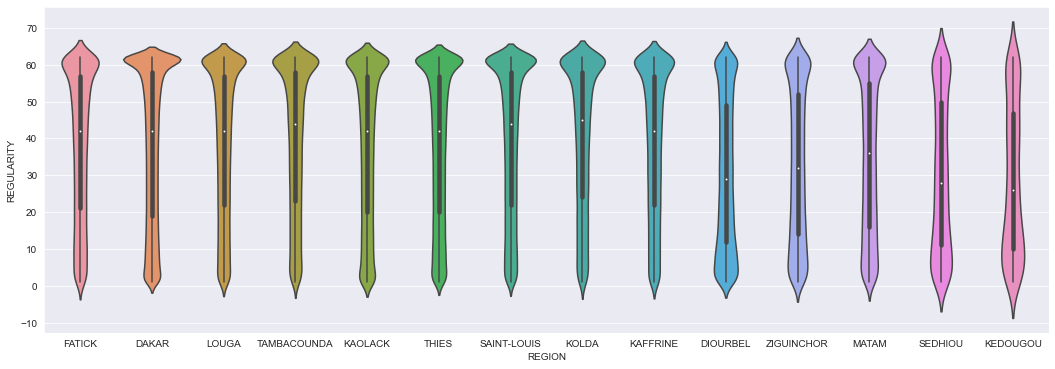

In [119]:
# Plot a violinplot of REGION against REGULARITY
plt.figure(figsize=(18, 6))
a = sns.violinplot(all_data['REGION'], all_data['REGULARITY'])

The violinplot below is based on the same data as the boxplot above. We can see quite clearly that the distributions with low mean values (DIOURBEL, ZIGUINCHOR, MATAM, SEDHIOU, and KEDOUGOU) are approximately symmetrically distributed, while the distribution with high mean values (FATICK, DAKAR, LOUGA, TAMBACOUNDA, KAOLACK, THIES, SAINT-LOUIS, KOLDA, KAFFRINE) are strongly left-skewed.

#### Plotting Region(the location of each client) vs Frequence_Rech(The number of times the customer refilled)

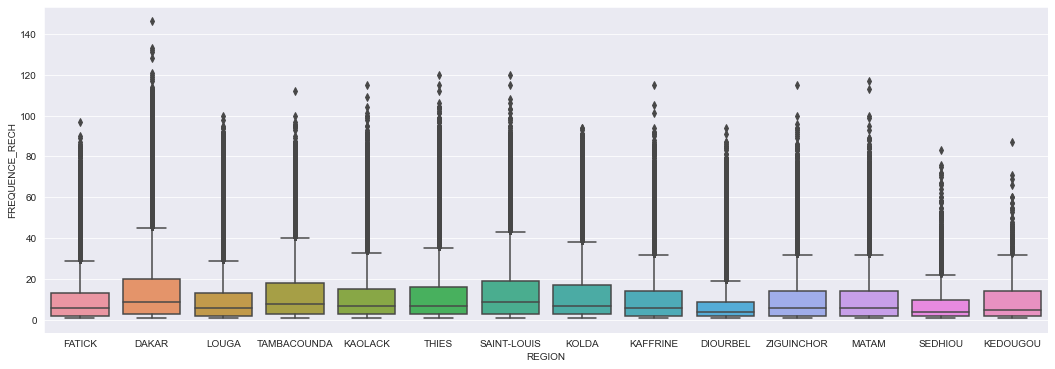

In [120]:
# Plot a boxplot of REGION against FREQUENCE_RECH
plt.figure(figsize=(18, 6))
a = sns.boxplot(all_data['REGION'], all_data['FREQUENCE_RECH'])

After plotting the side-by-side boxplot above, Here are some of my observations -- customers living in DAKAR tend to recharge more than clients in other regions, while customers that live in SEDHIOU, DIOURBEL and KEDOUGOU tend to recharge the least.

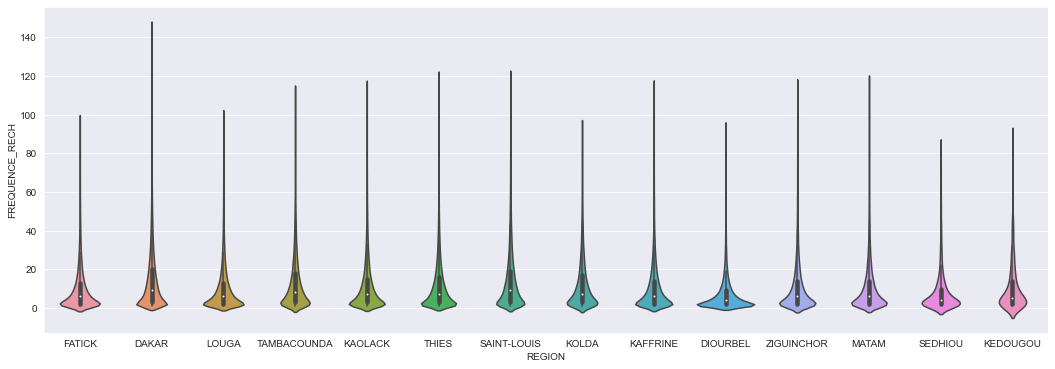

In [121]:
# Plot a violinplot of REGION against FREQUENCE_RECH
plt.figure(figsize=(18, 6))
a = sns.violinplot(all_data['REGION'], all_data['FREQUENCE_RECH'])

The violinplot below is based on the same data as the boxplot above. Here are some of my observations -- customers living in DAKAR tend to recharge more than clients in other regions, while customers that live in SEDHIOU, DIOURBEL and KEDOUGOU tend to recharge the least.

#### Plotting Region(the location of each client) vs Data_Volume(Number of connections)

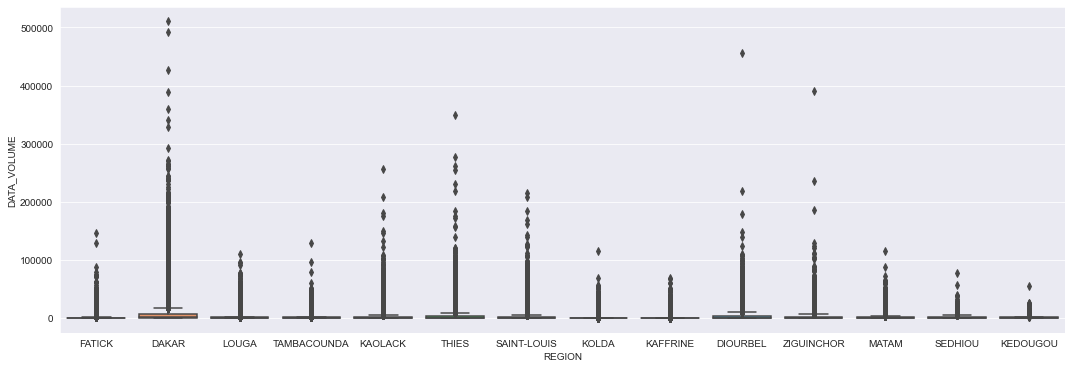

In [122]:
# Plot a boxplot of REGION against DATA_VOLUME
plt.figure(figsize=(18, 6))
a = sns.boxplot(all_data['REGION'], all_data['DATA_VOLUME'])

After plotting the side-by-side boxplot above, Here we see some unsurprising things -- customers living in DAKAR, THIES, SAINT-LOUIS, KAOLACK, and DIOURBEL tend to subscribe to more data than clients in other regions such as SEDHIOU, KEDOUGOU, MATAM, KAFFRINE, KOLDA, TAMBACOUNDA, LOUGA AND FATICK.

#### Plotting Region(the location of each client) vs Frequence(number of times the client has made an income)

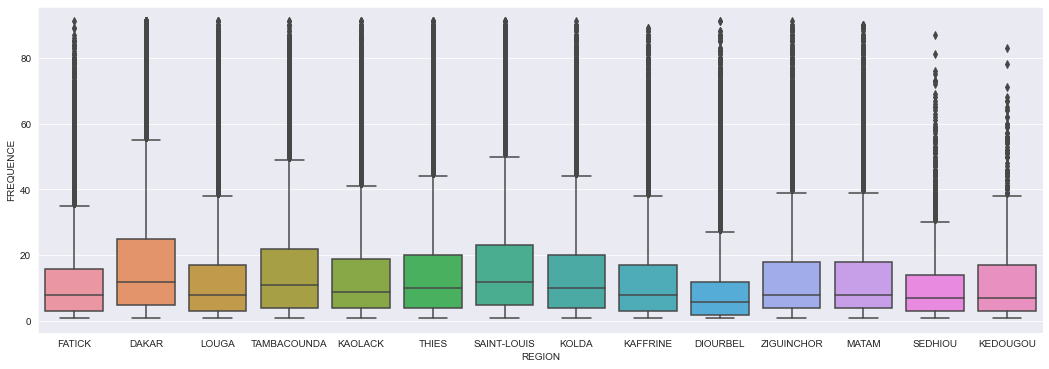

In [123]:
# Plot a boxplot of REGION against FREQUENCE
plt.figure(figsize=(18, 6))
a = sns.boxplot(all_data['REGION'], all_data['FREQUENCE'])

After plotting the side-by-side boxplot above, Here are some of my observations -- the median for the customers living across the different regions is almost symmetrical with some regions slightly higher than the other regions with the maximum frequence  varying.

#### Plotting Region(the location of each client) vs ON_NET(inter expresso calls)

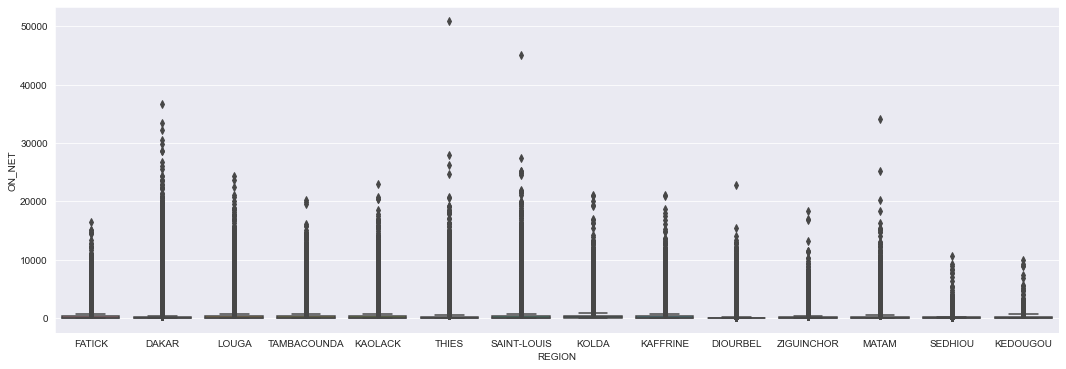

In [124]:
# Plot a boxplot of REGION against ON_NET
plt.figure(figsize=(18, 6))
a = sns.boxplot(all_data['REGION'], all_data['ON_NET'])

From the boxplot above, the clients across the different regions make a lot of inter expresso calls except for SEDHIOU, KEDOUGOU whose numbers are low compared to the other regions.

#### Plotting Region(the location of each client) vs ORANGE(Calls to Orange)

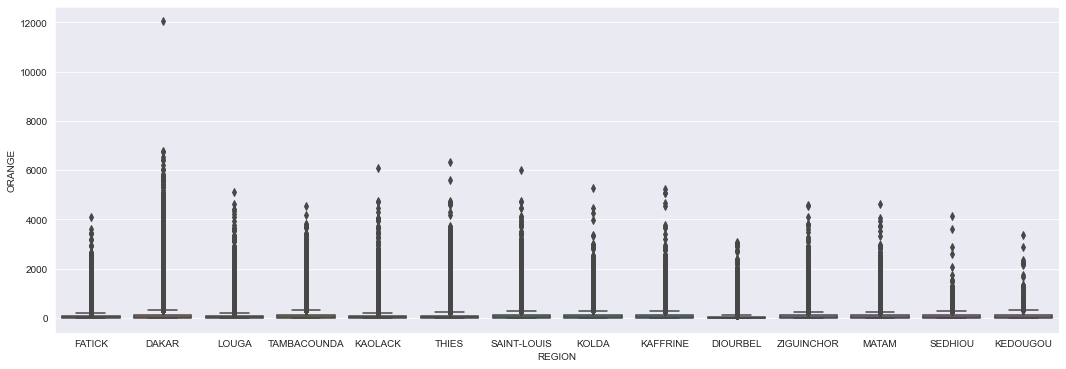

In [125]:
# Plot a boxplot of REGION against ORANGE
plt.figure(figsize=(18, 6))
a = sns.boxplot(all_data['REGION'], all_data['ORANGE'])

From the boxplot above, the clients in DAKAR make a lot of calls to ORANGE, across the different regions, calls to ORANGE are almost symmetrical with a few outlier exception. Calls to ORANGE from the region of SEDHIOU, KEDOUGOU and DIOURBEL are low compared to the other regions.

#### Plotting Region(the location of each client) vs TIGO(Calls to TIGO)

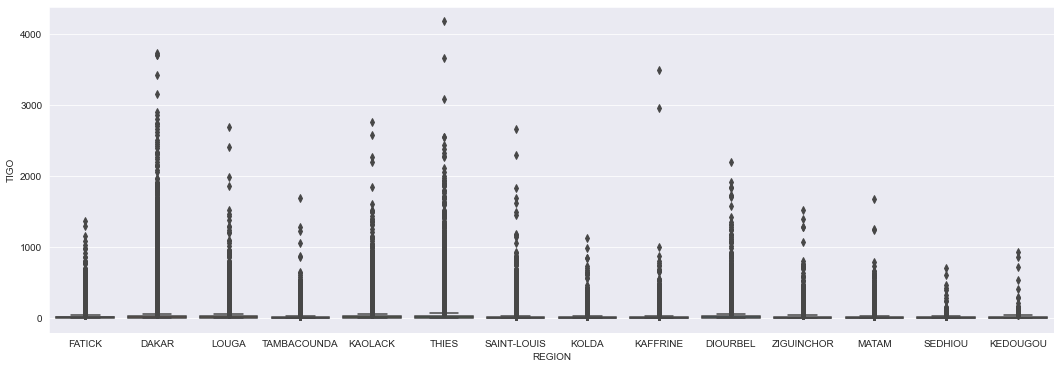

In [126]:
# Plot a boxplot of REGION against TIGO
plt.figure(figsize=(18, 6))
a = sns.boxplot(all_data['REGION'], all_data['TIGO'])

From the boxplot above, the clients in DAKAR and THIES make a lot of calls to TIGO, across the different regions, calls to TIGO are almost symmetrical(LOUGA, KAOLACK, SAINT-LOUIS, and DIOURBEL). Calls to TIGO from the region of SEDHIOU, KEDOUGOU, KAFFRINE and KOLDA are low compared to the other regions with a few outlier exception.

#### Plotting Region(the location of each client) vs ZONE1(Calls to ZONE1)

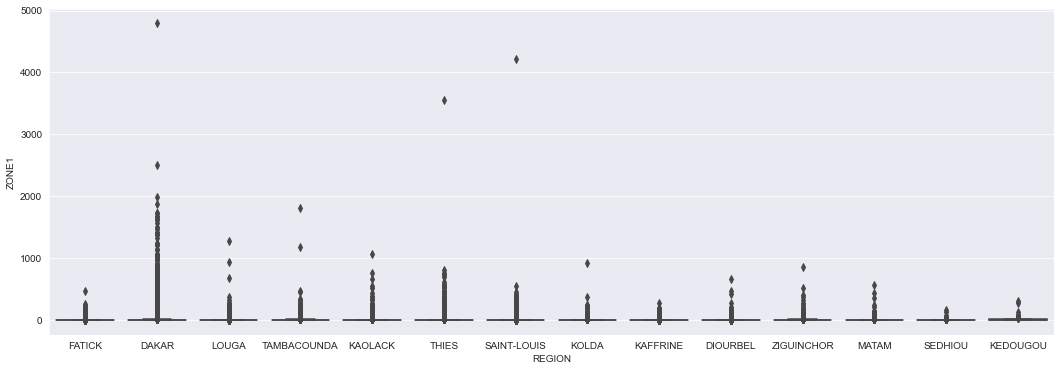

In [127]:
# Plot a boxplot of REGION against ZONE1
plt.figure(figsize=(18, 6))
a = sns.boxplot(all_data['REGION'], all_data['ZONE1'])

From the boxplot above, the clients in DAKAR make a lot of calls to ZONE1, across the different regions, calls to ZONE1 are almost symmetrical(FATICK, LOUGA, TAMBACOUNDA, KAOLACK, THIES, SAINT-LOUIS, KOLDA, DIOURBEL, ZIGUINCHOR and MATAM) with a few outlier exception. Calls to ZONE1 from the regions(SEDHIOU, KEDOUGOU and KAFFRINE) are low compared to the other regions.

#### Plotting Region(the location of each client) vs ZONE2(Calls to ZONE2)

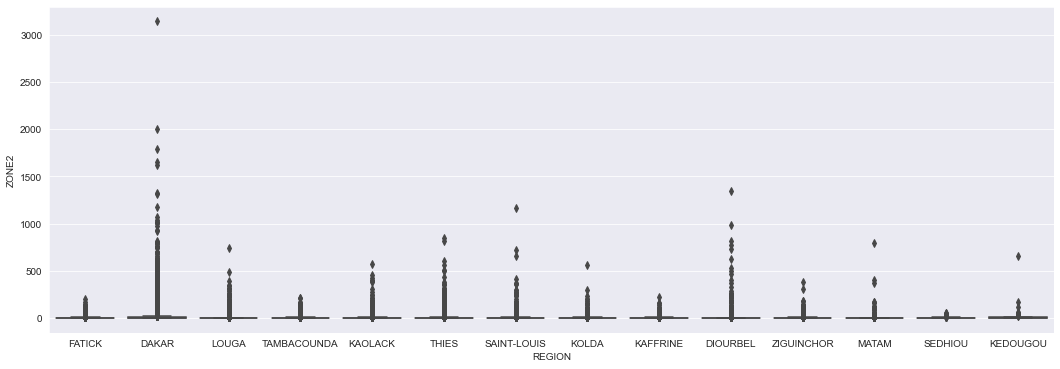

In [128]:
# Plot a boxplot of REGION against ZONE2
plt.figure(figsize=(18, 6))
a = sns.boxplot(all_data['REGION'], all_data['ZONE2'])

From the boxplot above, the clients in DAKAR make a lot of calls to ZONE2, across the different regions, calls to ZONE2 are almost symmetrical(LOUGA, KAOLACK, THIES, SAINT-LOUIS, DIOURBEL) with a few outlier exception. Calls to ZONE2 from the regions(SEDHIOU, KEDOUGOU, MATAM, ZIGUINCHOR, KAFFRINE, KOLDA, TAMBACOUNDA and FATICK) are low compared to the other regions.

#### Plotting Tenure(duration in the network) vs Montant(Top up amount)

In [129]:
# value_counts() function returns object containing counts of unique values
all_data['TENURE'].value_counts()

K > 24 month     2403551
I 18-21 month      53431
H 15-18 month      30646
G 12-15 month      17577
J 21-24 month      14940
F 9-12 month       10982
E 6-9 month         2137
D 3-6 month          911
Name: TENURE, dtype: int64

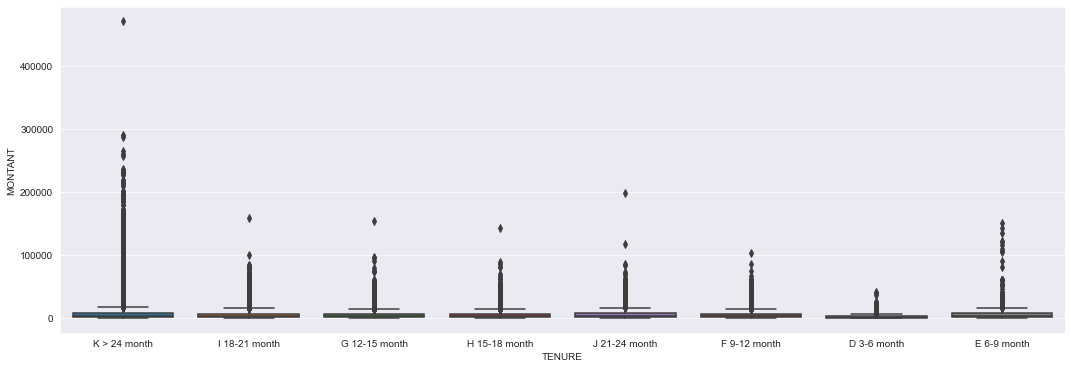

In [130]:
# Plot a boxplot of TENURE against MONTANT
plt.figure(figsize=(18, 6))
a = sns.boxplot(all_data['TENURE'], all_data['MONTANT'])

After plotting the side-by-side boxplot above, Here we see some unsurprising things -- clients that spend over 24 months on the expresso network tend to spend more on top up amounts, while clients that spend 3-6 months on the expresso network spend the least in top up amount.

#### Plotting Tenure(duration in the network) vs Frequence_Rech(The number of times the customer refilled)

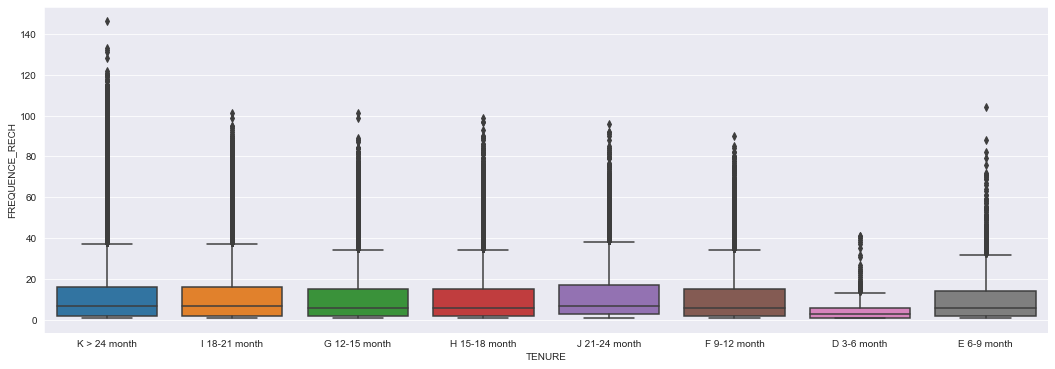

In [131]:
# Plot a boxplot of TENURE and FREQUENCE_RECH
plt.figure(figsize=(18, 6))
a = sns.boxplot(all_data['TENURE'], all_data['FREQUENCE_RECH'])

After plotting the side-by-side boxplot above, Here we see some unsurprising things -- clients that spend over 24 months on the expresso network tend to refill more, while clients that spend 3-6 months on the expresso network refill less. The median frequence_rech across(k>24 months to 6-9 months, with the exception of 3-6 months are almost symmetric). The higher the duration in the network, the higher the frequence of recharge.

#### Plotting Tenure(duration in the network) vs Revenue(monthly income of each client)

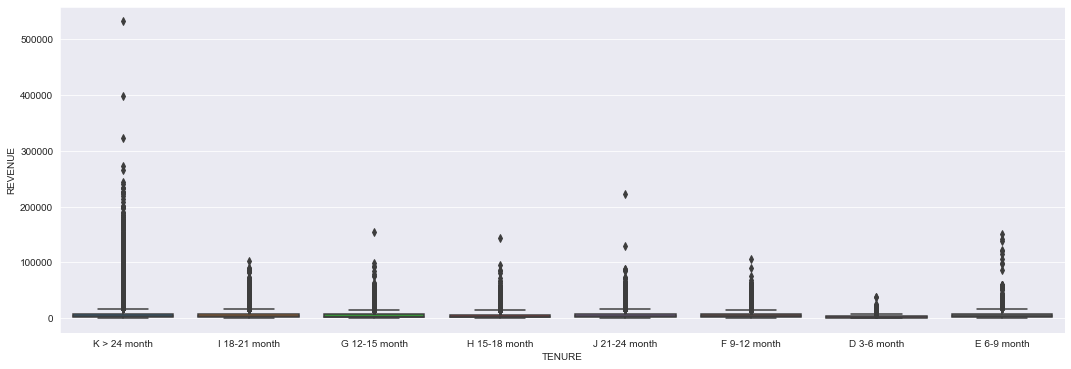

In [132]:
# Plot a boxplot of TENURE and REVENUE
plt.figure(figsize=(18, 6))
a = sns.boxplot(all_data['TENURE'], all_data['REVENUE'])

From the side-by-side boxplot above, Here we see some surprising things -- customers that spend over 24 months on the expresso network tend to have a higher monthly income, while customers that spend between 21-24 months all through to 3-6 months on the expresso network tend to have a lower almost symmetric monthly income with a few outliers present.

#### Plotting Tenure(duration in the network) vs Arpu_segment(Income over 90 days / 3)

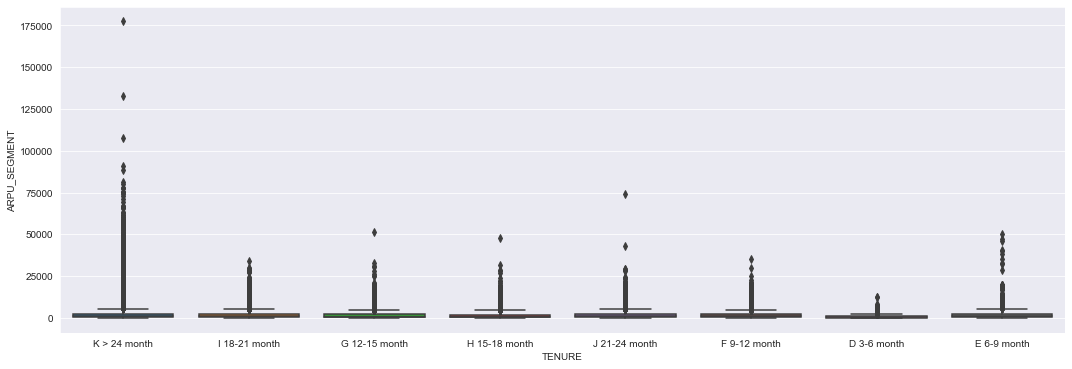

In [133]:
# Plot a boxplot of TENURE and ARPU_SEGMENT
plt.figure(figsize=(18, 6))
a = sns.boxplot(all_data['TENURE'], all_data['ARPU_SEGMENT'])

From the side-by-side boxplot above, Here we see some surprising things -- customers that spend over 24 months on the expresso network tend to have a higher income over 90 days, while customers that spend between 21-24 months all through to 3-6 months on the expresso network tend to have a lower almost symmetric income over 90 days with a few outliers present.

#### Plotting Tenure(duration in the network) vs Frequence(number of times the client has made an income)

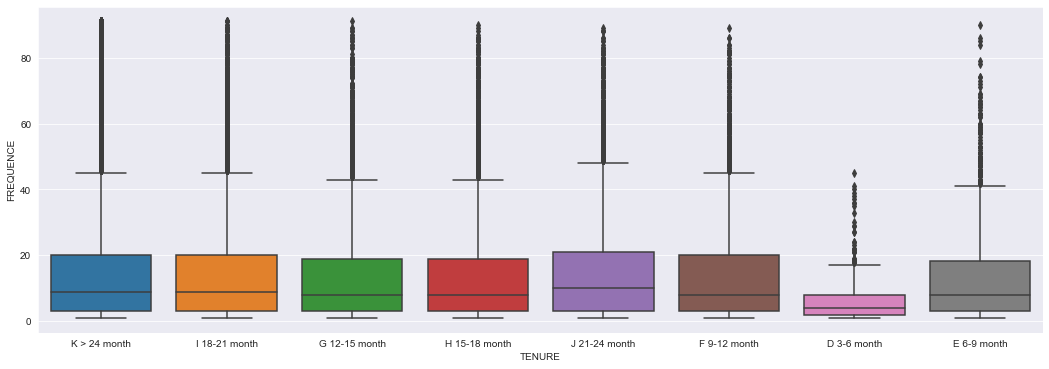

In [134]:
# Plot a boxplot of TENURE and FREQUENCE
plt.figure(figsize=(18, 6))
a = sns.boxplot(all_data['TENURE'], all_data['FREQUENCE'])

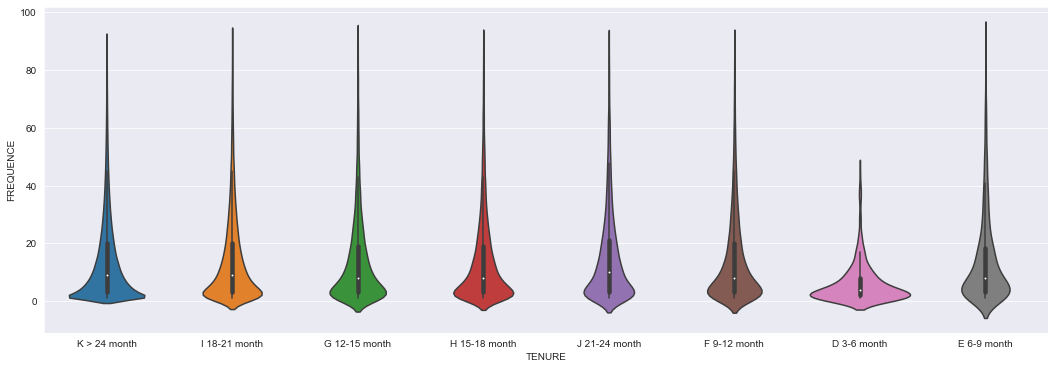

In [135]:
# Plot a violinplot of TENURE and FREQUENCE
plt.figure(figsize=(18, 6))
a = sns.violinplot(all_data['TENURE'], all_data['FREQUENCE'])

The violinplot below is based on the same data as the boxplot above. We can see quite clearly that the distributions have intermediate mean values, and are approximately symmetrically distributed. Note also that the 3-6 months distribution has a long shoulder, suggesting that this distributions includes many people who are low earners and recharge less frequently.

#### Plotting Tenure(duration in the network) vs Data_Volume(Number of connections)

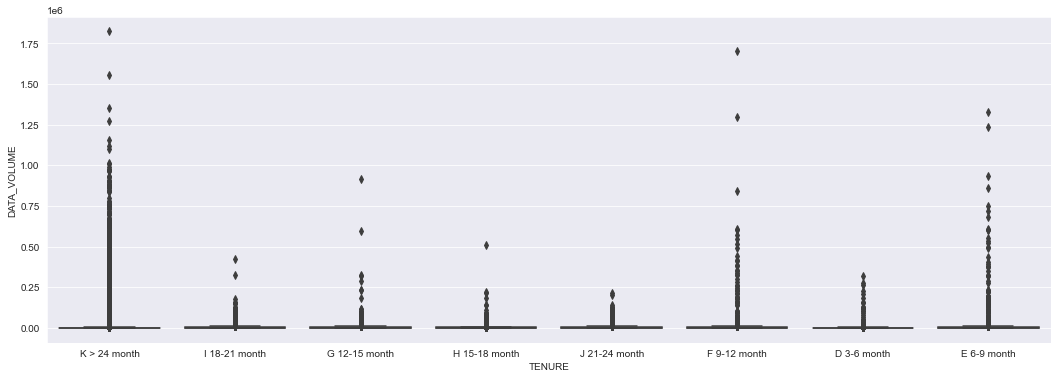

In [136]:
# Plot a boxplot of TENURE and DATA_VOLUME
plt.figure(figsize=(18, 6))
a = sns.boxplot(all_data['TENURE'], all_data['DATA_VOLUME'])

From the side-by-side boxplot above, Here we see some surprising things -- customers that spend over 24 months, 9-12 months and 6-9 months on the expresso network tend to spend more on data, while customers that spend between 21-24 months,18-21 months, 15-18 months, 12-15 months, 3-6 months on the expresso network tend to spend less on data with a few outliers present.

#### Plotting Tenure(duration in the network) vs On_net(Inter expresso calls)

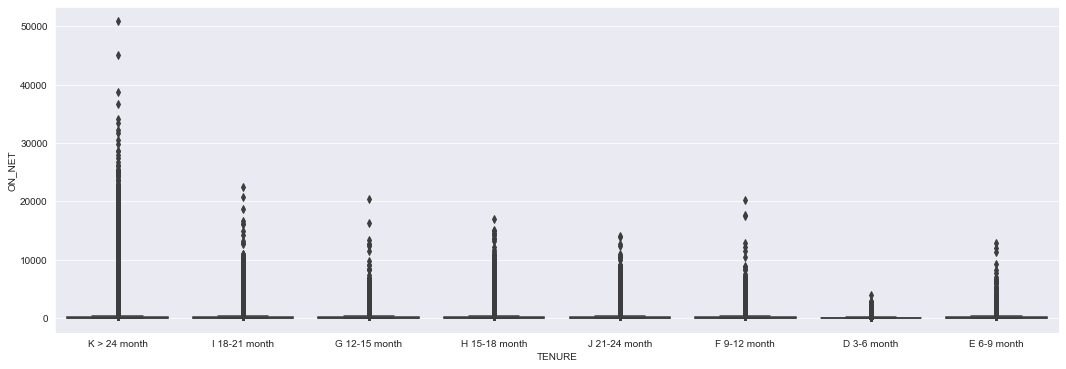

In [137]:
# Plot a boxplot of TENURE and ON_NET
plt.figure(figsize=(18, 6))
a = sns.boxplot(all_data['TENURE'], all_data['ON_NET'])

From the side-by-side boxplot above, Here we see some unsurprising things -- customers that spend over 24 months make the most inter expresso calls, while the distribution is almost symmetric for customers that spend between 21-24 months,18-21 months, 15-18 months, 12-15 months, 9-12 months and 6-9 months. Customers that spend 3-6 months on the expresso network tend to make the lowest inter expresso calls compared to other tenures.

#### Plotting Tenure(duration in the network) vs Orange(Calls to Orange)

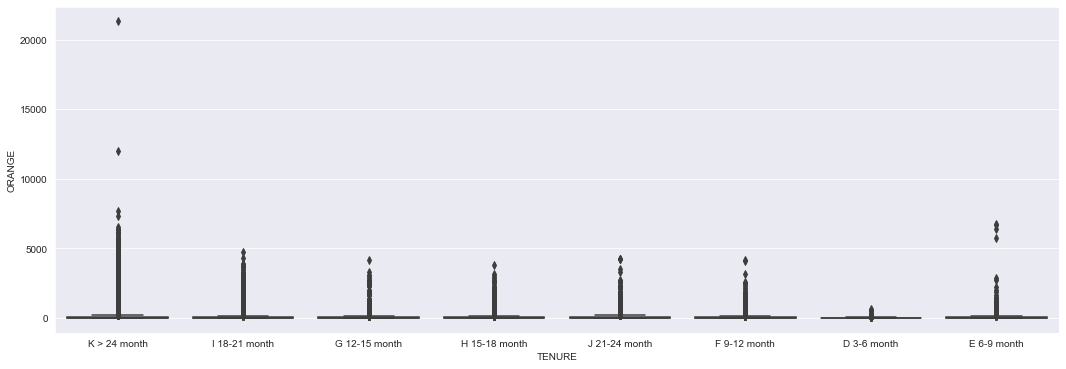

In [138]:
# Plot a boxplot of TENURE and ORANGE
plt.figure(figsize=(18, 6))
a = sns.boxplot(all_data['TENURE'], all_data['ORANGE'])

From the side-by-side boxplot above, Here we see some unsurprising things -- customers that spend over 24 months make the most calls to orange, while the distribution is almost symmetric for customers that spend between 21-24 months,18-21 months, 15-18 months, 12-15 months, 9-12 months and 6-9 months. Customers that spend 3-6 months on the expresso network tend to make the lowest calls to orange compared to other tenures.

#### Plotting Tenure(duration in the network) vs Tigo(Calls to Tigo)

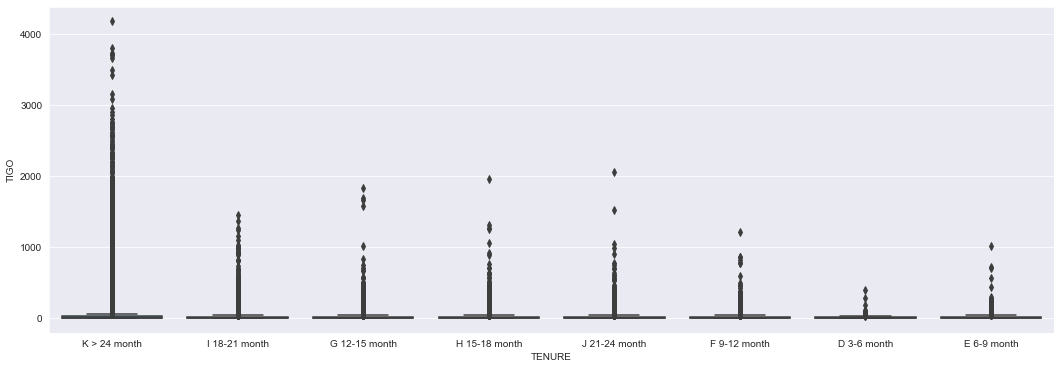

In [139]:
# Plot a boxplot of TENURE and TIGO
plt.figure(figsize=(18, 6))
a = sns.boxplot(all_data['TENURE'], all_data['TIGO'])

From the side-by-side boxplot above, Here we see some unsurprising things -- customers that spend over 24 months make the most calls to tigo, while the distribution is almost symmetric with a few outliers for customers that spend between 21-24 months,18-21 months, 15-18 months, 12-15 months, 9-12 months and 6-9 months. Customers that spend 3-6 months on the expresso network tend to make the lowest calls to tigo compared to other tenures.

#### Plotting Tenure(duration in the network) vs Zone1(Calls to Zone1)

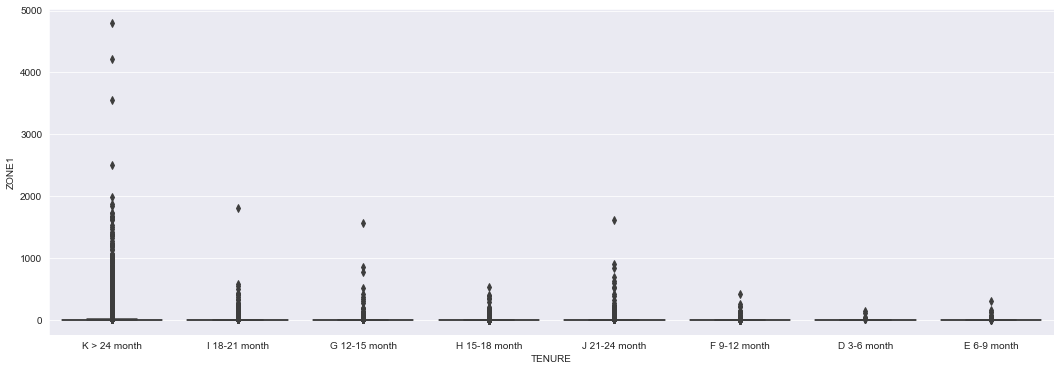

In [140]:
# Plot a boxplot of TENURE and ZONE1
plt.figure(figsize=(18, 6))
a = sns.boxplot(all_data['TENURE'], all_data['ZONE1'])

From the side-by-side boxplot above, Here we see some unsurprising things -- customers that spend over 24 months make the most calls to ZONE1, while the distribution is almost symmetric with a few outliers for customers that spend between 21-24 months, 18-21 months, 15-18 months, 12-15 months and 9-12 months. Customers that spend 6-9 months and 3-6 months on the expresso network tend to make the lowest calls to ZONE1 compared to other tenures.

#### Plotting Tenure(duration in the network) vs Zone2(Calls to Zone2)

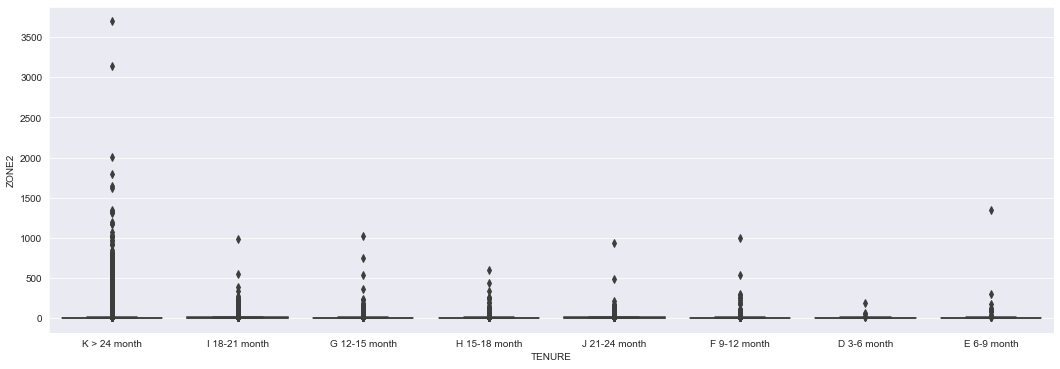

In [141]:
# Plot a boxplot of TENURE and ZONE2
plt.figure(figsize=(18, 6))
a = sns.boxplot(all_data['TENURE'], all_data['ZONE2'])

From the side-by-side boxplot above, Here we see some unsurprising things -- customers that spend over 24 months make the most calls to ZONE2, while the distribution is almost symmetric with a few outliers for customers that spend between 21-24 months, 18-21 months, 15-18 months, 12-15 months and 9-12 months. Customers that spend 6-9 months and 3-6 months on the expresso network tend to make the lowest calls to ZONE2 compared to other tenures.

### <a id='2.3'>2.3. Variable Distributions</a>

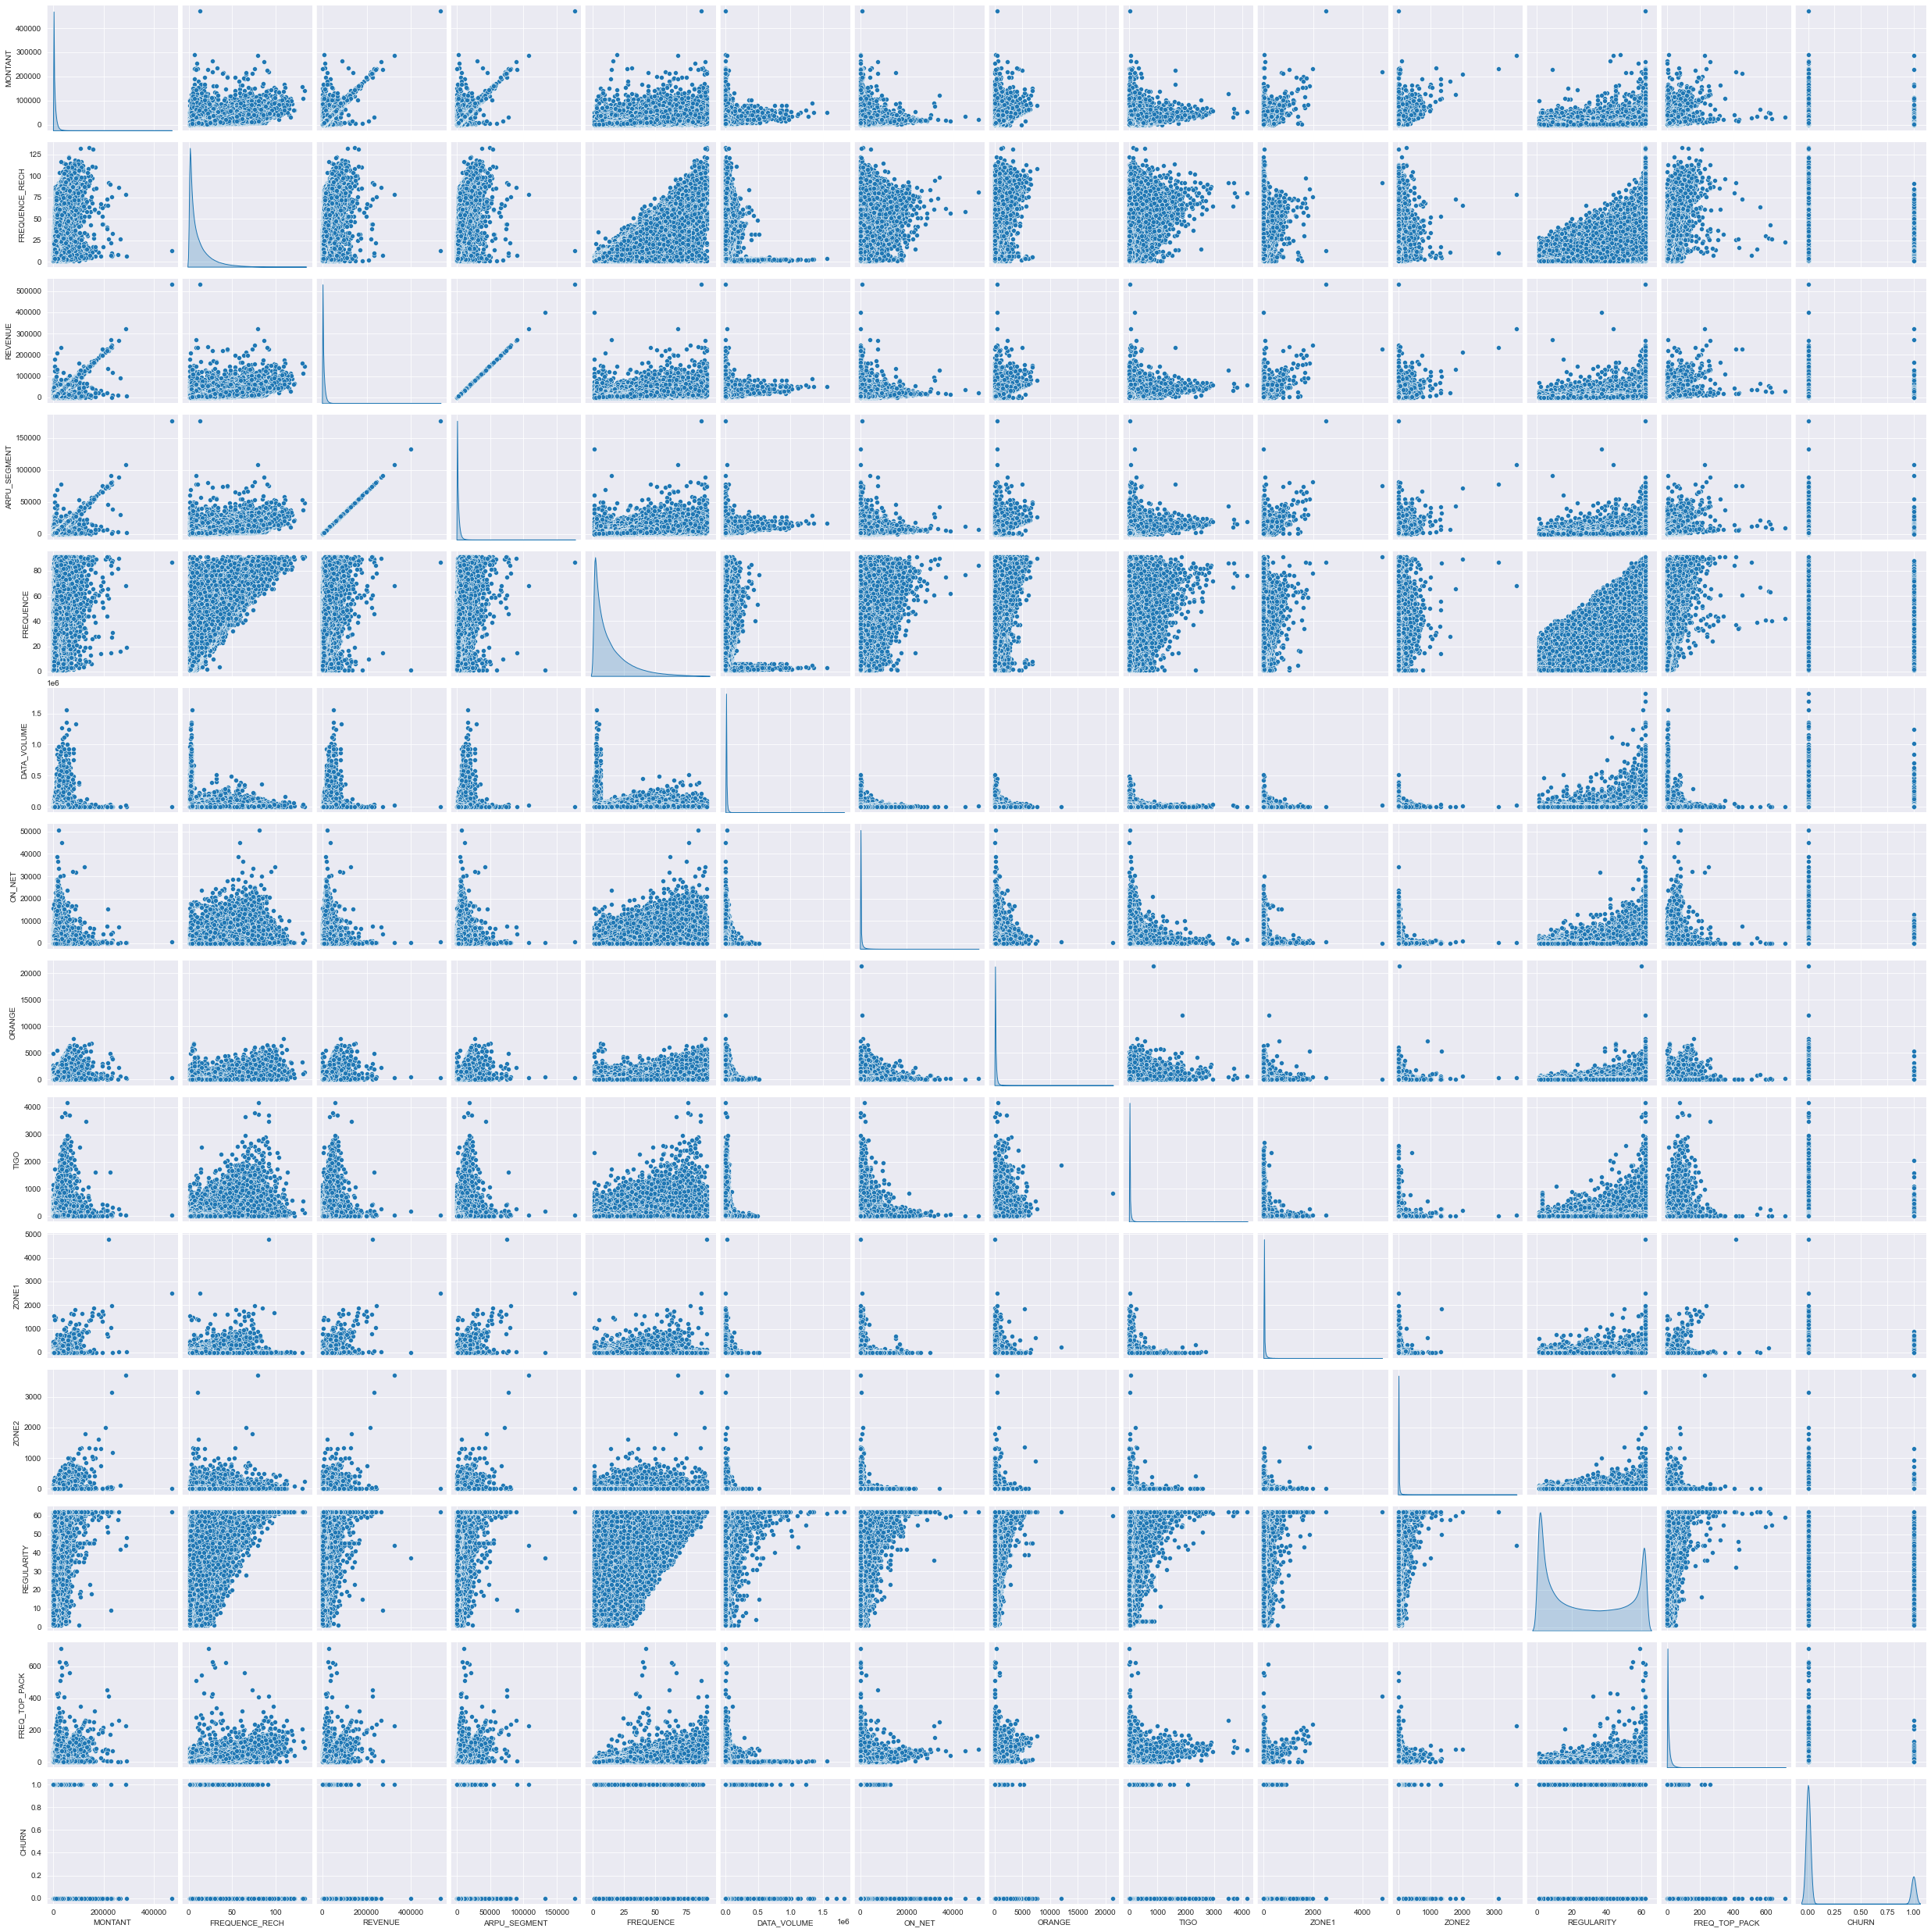

Wall time: 11min 41s


In [142]:
%%time
#Seperating columns to be visualized
out_cols = list(set(train.nunique()[train.nunique()<6].keys().tolist()
                    + train.select_dtypes(include='object').columns.tolist()))
viz_cols = [x for x in train.columns if x not in out_cols] + ['CHURN']

sns.pairplot(train[viz_cols], diag_kind='kde')
plt.show()

### <a id='2.4'>2.4. Categorical Variables</a>

#### Numeric-

In [143]:
# Print a concise summary of a DataFrame.
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534175 entries, 0 to 2534174
Data columns (total 20 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           float64
 19  source          object 
dtypes: float64(13), int64(1), object(6)
memory usage: 386.7+ MB


#### REGION (The location of each client)

In [144]:
all_data['REGION'].unique()

array(['FATICK', nan, 'DAKAR', 'LOUGA', 'TAMBACOUNDA', 'KAOLACK', 'THIES',
       'SAINT-LOUIS', 'KOLDA', 'KAFFRINE', 'DIOURBEL', 'ZIGUINCHOR',
       'MATAM', 'SEDHIOU', 'KEDOUGOU'], dtype=object)

In [145]:
# value_counts() function returns object containing counts of unique values
all_data['REGION'].value_counts()

DAKAR          603886
THIES          211795
SAINT-LOUIS    141255
LOUGA          116458
KAOLACK        113956
DIOURBEL        78603
TAMBACOUNDA     64893
KAFFRINE        51717
KOLDA           45548
FATICK          42003
MATAM           34315
ZIGUINCHOR      25847
SEDHIOU          3662
KEDOUGOU         1210
Name: REGION, dtype: int64

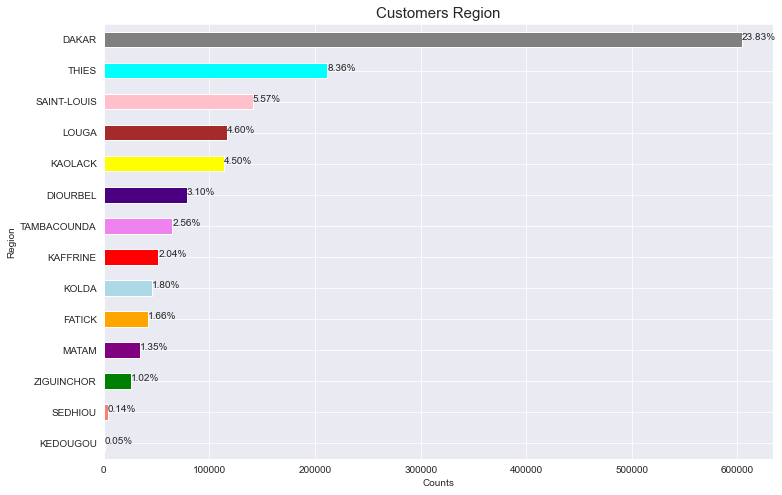

In [146]:
# Check the regions and percentage of values in the region feature
ax = all_data.REGION.value_counts().sort_values().plot(kind='barh', figsize=(12, 8),
                                                      color=['blue', 'salmon', 'green', 'purple',
                                                                  'orange','lightblue', 'red', 'violet',
                                                                  'indigo', 'yellow', 'brown', 'pink',
                                                                  'cyan', 'gray', 'olive', 'orangered'])

# Add some attributes
plt.title('Customers Region', fontdict={'size': 15})
plt.xlabel('Counts')
plt.ylabel('Region')

for p in ax.patches:
    percentage = '{:,.2f}%'.format((p.get_width()/all_data.shape[0])*100)
    width, height = p.get_width(), p.get_height()
    x = p.get_x() + width + 0.02
    y = p.get_y() + height/2
    ax.annotate(percentage, (x, y));  

In [147]:
# Check for missing values
all_data.REGION.isna().sum()

999027

#### TENURE (Duration in the network)

In [148]:
all_data['TENURE'].unique()

array(['K > 24 month', 'I 18-21 month', 'G 12-15 month', 'H 15-18 month',
       'J 21-24 month', 'F 9-12 month', 'D 3-6 month', 'E 6-9 month'],
      dtype=object)

In [149]:
# value_counts() function returns object containing counts of unique values
all_data['TENURE'].value_counts()

K > 24 month     2403551
I 18-21 month      53431
H 15-18 month      30646
G 12-15 month      17577
J 21-24 month      14940
F 9-12 month       10982
E 6-9 month         2137
D 3-6 month          911
Name: TENURE, dtype: int64

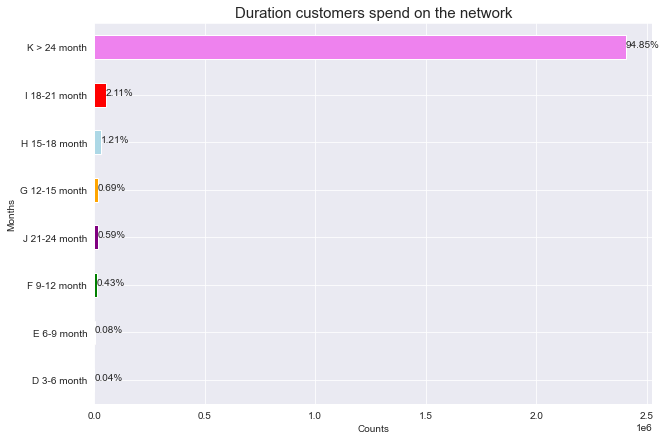

In [150]:
# Plot the cellphone duration in a horizontal barchart
ax = all_data.TENURE.value_counts().sort_values().plot(kind='barh', figsize=(10, 7),
                                                      color=['blue', 'salmon', 'green', 'purple',
                                                                  'orange','lightblue', 'red', 'violet',
                                                                  'indigo', 'yellow', 'brown', 'pink',
                                                                  'cyan', 'gray', 'olive', 'orangered'])

# Add some attributes
plt.title('Duration customers spend on the network', fontdict={'size': 15})
plt.xlabel('Counts')
plt.ylabel('Months')

for p in ax.patches:
    percentage = '{:,.2f}%'.format((p.get_width()/all_data.shape[0])*100)
    width, height = p.get_width(), p.get_height()
    x = p.get_x() + width + 0.02
    y = p.get_y() + height/2
    ax.annotate(percentage, (x, y)); 

In [151]:
# Check for missing values
all_data.TENURE.isna().sum()

0

#### MRG (A client who is going)

In [152]:
# value_counts() function returns object containing counts of unique values
all_data['MRG'].value_counts()

NO    2534175
Name: MRG, dtype: int64

In [153]:
# Checj for the missing values in the MRG column
all_data['MRG'].isna().sum()

0

In [154]:
pd.crosstab(all_data.MRG, all_data.CHURN)

CHURN      0.0     1.0
MRG                   
NO     1750062  403986

Text(0.5, 0, 'MRG')

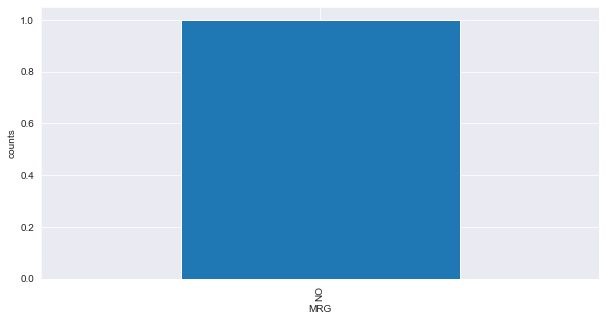

In [155]:
plt.figure(figsize=(10,5))
all_data['MRG'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('MRG')

#### TOP_PACK (THE MOST ACTIVE PACKS)

In [156]:
all_data['TOP_PACK'].value_counts()

All-net 500F=2000F;5d             373840
On net 200F=Unlimited _call24H    179482
Data:490F=1GB,7d                  135437
Data: 100 F=40MB,24H               99702
Mixt 250F=Unlimited_call24H        79472
                                   ...  
Data:1000F=700MB,7d                    1
CVM_150F_unlimited                     1
YMGX on-net 100=700F, 24H              1
1500=Unlimited7Day                     1
EVC_PACK_2.2Go                         1
Name: TOP_PACK, Length: 142, dtype: int64

In [157]:
list(all_data['TOP_PACK'].value_counts().index)

['All-net 500F=2000F;5d',
 'On net 200F=Unlimited _call24H',
 'Data:490F=1GB,7d',
 'Data: 100 F=40MB,24H',
 'Mixt 250F=Unlimited_call24H',
 'MIXT:500F= 2500F on net _2500F off net;2d',
 'Data:1000F=2GB,30d',
 'All-net 500F =2000F_AllNet_Unlimited',
 'Jokko_Daily',
 'Data: 200 F=100MB,24H',
 'IVR Echat_Daily_50F',
 'On-net 500=4000,10d',
 'On-net 500F_FNF;3d',
 'Data:200F=Unlimited,24H',
 'MIXT: 200mnoff net _unl on net _5Go;30d',
 'On-net 1000F=10MilF;10d',
 'VAS(IVR_Radio_Daily)',
 'Data:1000F=5GB,7d',
 'Twter_U2opia_Daily',
 'All-net 600F= 3000F ;5d',
 'On-net 200F=60mn;1d',
 'Data:500F=2GB,24H',
 'All-net 1000=5000;5d',
 'Twter_U2opia_Weekly',
 'Data:3000F=10GB,30d',
 'MIXT: 390F=04HOn-net_400SMS_400 Mo;4h\t',
 'All-net 500F=1250F_AllNet_1250_Onnet;48h',
 'Data:300F=100MB,2d',
 'Data:50F=30MB_24H',
 'All-net 1000F=(3000F On+3000F Off);5d',
 'On net 200F= 3000F_10Mo ;24H',
 'MIXT: 590F=02H_On-net_200SMS_200 Mo;24h\t\t',
 'Data:DailyCycle_Pilot_1.5GB',
 'All-net 300=600;2d',
 'Data:15

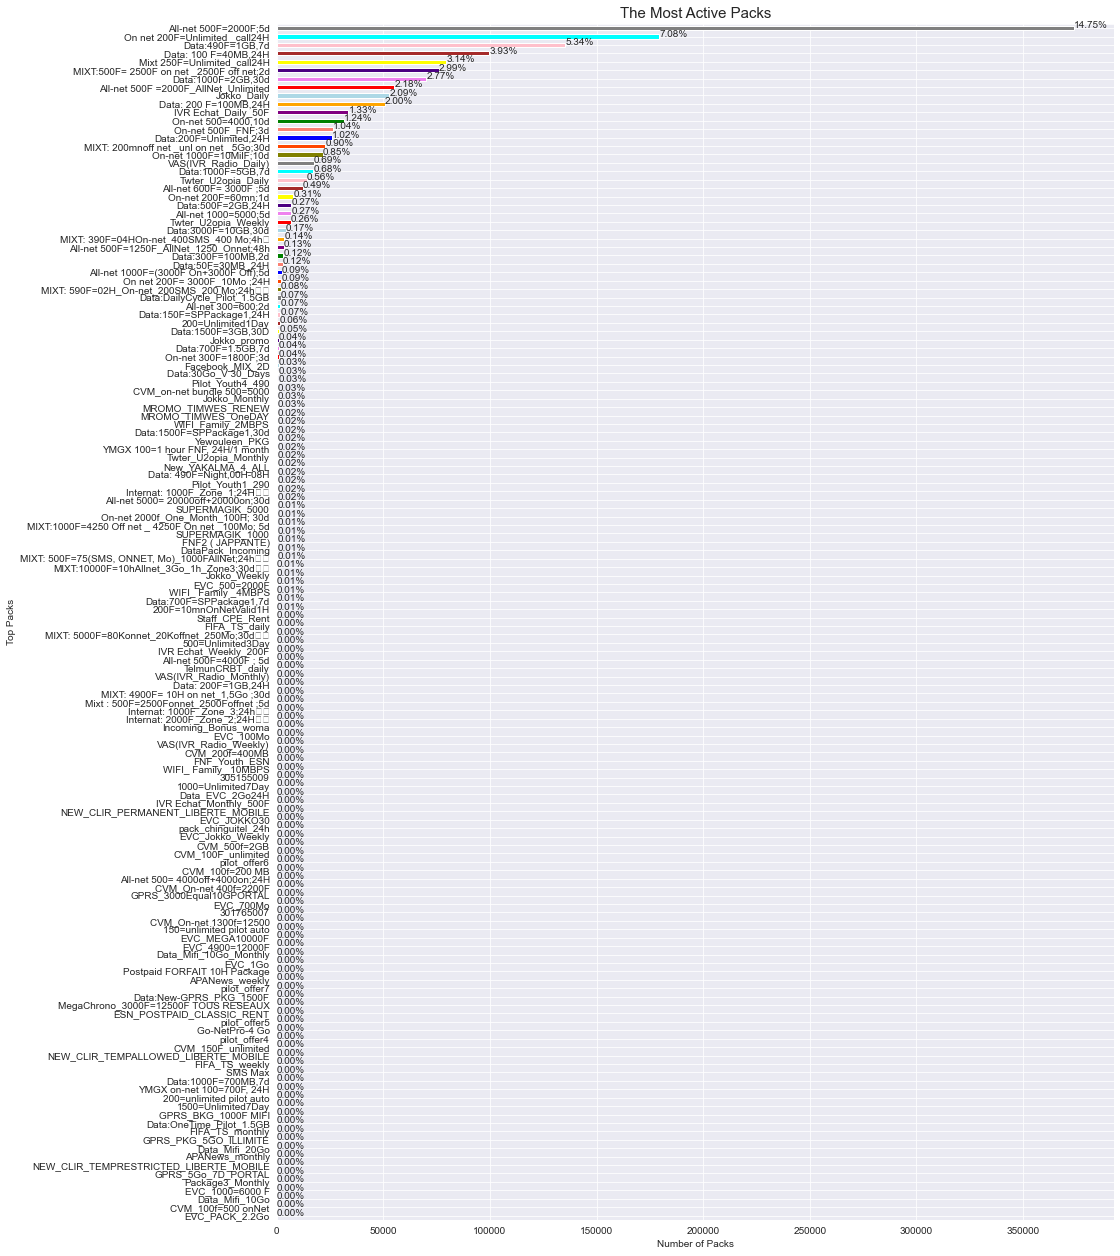

In [158]:
# Plot the cellphone duration in a horizontal barchart
ax = all_data.TOP_PACK.value_counts().sort_values().plot(kind='barh', figsize=(15, 22),
                                                      color=['blue', 'salmon', 'green', 'purple',
                                                                  'orange','lightblue', 'red', 'violet',
                                                                  'indigo', 'yellow', 'brown', 'pink',
                                                                  'cyan', 'gray', 'olive', 'orangered'])

# Add some attributes
plt.title('The Most Active Packs', fontdict={'size': 15})
plt.xlabel('Number of Packs')
plt.ylabel('Top Packs')

for p in ax.patches:
    percentage = '{:,.2f}%'.format((p.get_width()/all_data.shape[0])*100)
    width, height = p.get_width(), p.get_height()
    x = p.get_x() + width + 0.02
    y = p.get_y() + height/2
    ax.annotate(percentage, (x, y));  

#### CHURN

In [159]:
# Check the proportion of classes in the churn column
all_data['CHURN'].value_counts(normalize=True)

0.0    0.812453
1.0    0.187547
Name: CHURN, dtype: float64

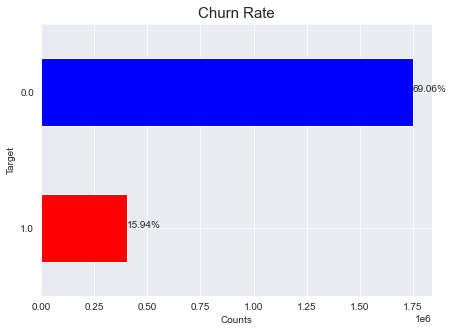

In [160]:
#Check if the predictor class is balanced 
ax = all_data.CHURN.value_counts().sort_values().plot(kind='barh', figsize=(7, 5),
                                                      color=['red', 'blue'])

# Add some attributes
plt.title('Churn Rate', fontdict={'size': 15})
plt.xlabel('Counts')
plt.ylabel('Target')

for p in ax.patches:
    percentage = '{:,.2f}%'.format((p.get_width()/all_data.shape[0])*100)
    width, height = p.get_width(), p.get_height()
    x = p.get_x() + width + 0.02
    y = p.get_y() + height/2
    ax.annotate(percentage, (x, y)); 

0= Will not churn in 90 days, 1= Will churn in 90 days

In [161]:
# Check for duplicated values
all_data.duplicated().sum()

0

In [162]:
all_data.columns

Index(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK',
       'CHURN', 'source'],
      dtype='object')

### <a id='3'>3. Feature Engineering</a>

**Engineering**: There are multiple techniques for feature engineering:

* **Decompose**: Converting 2014-09-20T20:45:40Z into categorical attributes like hour_of_the_day, part_of_day, etc.

**Imputation**: We can impute missing values in a number of different ways:

* **Hot-Deck**: The technique then finds the first missing value and uses the cell value immediately prior to the data that are missing to impute the missing value.
* **Cold-Deck**: Selects donors from another dataset to complete missing data.
* **Median-substitution**: Another imputation technique involves replacing any missing value with the median of that variable for all other cases, which has the benefit of not changing the sample median for that variable.
* **Regression**: A regression model is estimated to predict observed values of a variable based on other variables, and that model is then used to impute values in cases where that variable is missing.

In [163]:
# Check the first 5 rows of the dataset
all_data.head()

user_id  REGION         TENURE  MONTANT  \
0  00000bfd7d50f01092811bc0c8d7b0d6fe7c3596  FATICK   K > 24 month   4250.0   
1  00000cb4a5d760de88fecb38e2f71b7bec52e834     NaN  I 18-21 month      NaN   
2  00001654a9d9f96303d9969d0a4a851714a4bb57     NaN   K > 24 month   3600.0   
3  00001dd6fa45f7ba044bd5d84937be464ce78ac2   DAKAR   K > 24 month  13500.0   
4  000028d9e13a595abe061f9b58f3d76ab907850f   DAKAR   K > 24 month   1000.0   

   FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  ON_NET  \
0            15.0   4251.0        1417.0       17.0          4.0   388.0   
1             NaN      NaN           NaN        NaN          NaN     NaN   
2             2.0   1020.0         340.0        2.0          NaN    90.0   
3            15.0  13502.0        4501.0       18.0      43804.0    41.0   
4             1.0    985.0         328.0        1.0          NaN    39.0   

   ORANGE  TIGO  ZONE1  ZONE2 MRG  REGULARITY                        TOP_PACK  \
0    46.0   1.0    1.0    2.0  NO          54  On net 200F=Unlimited _call24H   
1     NaN   NaN    NaN    NaN  NO           4                             NaN   
2    46.0   7.0    NaN    NaN  NO          17         On-net 1000F=10MilF;10d   
3   102.0   2.0    NaN    NaN  NO          62               Data:1000F=5GB,7d   
4    24.0   NaN    NaN    NaN  NO          11     Mixt 250F=Unlimited_call24H   

   FREQ_TOP_PACK  CHURN source  
0            8.0    0.0  train  
1            NaN    1.0  train  
2            1.0    0.0  train  
3           11.0    0.0  train  
4            2.0    0.0  train

In [164]:
# Replacing the K > and months in the combined dataset with an empty string
all_data['TENURE'] = all_data['TENURE'].str.replace('A >', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('B >', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('C >', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('D >', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('E >', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('F >', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('G >', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('H >', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('I >', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('J >', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('K >', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('L >', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('M >', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('N >', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('O >', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('P >', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('Q >', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('R >', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('S >', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('T >', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('U >', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('V >', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('W >', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('X >', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('Y >', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('Z >', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('month', '')

In [165]:
# Replacing the K < in the combined dataset with an empty string
all_data['TENURE'] = all_data['TENURE'].str.replace('A <', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('B <', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('C <', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('D <', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('E <', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('F <', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('G <', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('H <', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('I <', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('J <', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('K <', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('L <', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('M <', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('N <', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('O <', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('P <', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('Q <', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('R <', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('S <', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('T <', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('U <', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('V <', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('W <', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('X <', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('Y <', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('Z <', '')

In [166]:
all_data['TENURE'].unique()

array([' 24 ', 'I 18-21 ', 'G 12-15 ', 'H 15-18 ', 'J 21-24 ', 'F 9-12 ',
       'D 3-6 ', 'E 6-9 '], dtype=object)

In [167]:
# Replacing the alphabets in the combined dataset with an empty string
all_data['TENURE'] = all_data['TENURE'].str.replace('I ', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('G ', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('H ', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('J ', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('F ', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('D ', '')
all_data['TENURE'] = all_data['TENURE'].str.replace('E ', '')

In [168]:
all_data['TENURE'].unique()

array([' 24 ', '18-21 ', '12-15 ', '15-18 ', '21-24 ', '9-12 ', '3-6 ',
       '6-9 '], dtype=object)

In [169]:
# Replacing the space strings in the combined dataset with an enclosed string
all_data['TENURE'] = all_data['TENURE'].str.replace(' 24 ', '24')
all_data['TENURE'] = all_data['TENURE'].str.replace('18-21 ', '18-21')
all_data['TENURE'] = all_data['TENURE'].str.replace('12-15 ', '12-15')
all_data['TENURE'] = all_data['TENURE'].str.replace('15-18 ', '15-18')
all_data['TENURE'] = all_data['TENURE'].str.replace('21-24 ', '21-24')
all_data['TENURE'] = all_data['TENURE'].str.replace('9-12 ', '9-12')
all_data['TENURE'] = all_data['TENURE'].str.replace('3-6 ', '3-6')
all_data['TENURE'] = all_data['TENURE'].str.replace('6-9 ', '6-9')

In [170]:
all_data['TENURE'].unique()

array(['24', '18-21', '12-15', '15-18', '21-24', '9-12', '3-6', '6-9'],
      dtype=object)

In [171]:
# value_counts() function returns object containing counts of unique values
all_data['TENURE'].value_counts()

24       2403551
18-21      53431
15-18      30646
12-15      17577
21-24      14940
9-12       10982
6-9         2137
3-6          911
Name: TENURE, dtype: int64

In [172]:
all_data['REGION'].unique()

array(['FATICK', nan, 'DAKAR', 'LOUGA', 'TAMBACOUNDA', 'KAOLACK', 'THIES',
       'SAINT-LOUIS', 'KOLDA', 'KAFFRINE', 'DIOURBEL', 'ZIGUINCHOR',
       'MATAM', 'SEDHIOU', 'KEDOUGOU'], dtype=object)

In [173]:
# value_counts() function returns object containing counts of unique values
all_data['REGION'].value_counts()

DAKAR          603886
THIES          211795
SAINT-LOUIS    141255
LOUGA          116458
KAOLACK        113956
DIOURBEL        78603
TAMBACOUNDA     64893
KAFFRINE        51717
KOLDA           45548
FATICK          42003
MATAM           34315
ZIGUINCHOR      25847
SEDHIOU          3662
KEDOUGOU         1210
Name: REGION, dtype: int64

In [174]:
all_data['MRG'].unique()

array(['NO'], dtype=object)

In [175]:
all_data.head()

user_id  REGION TENURE  MONTANT  \
0  00000bfd7d50f01092811bc0c8d7b0d6fe7c3596  FATICK     24   4250.0   
1  00000cb4a5d760de88fecb38e2f71b7bec52e834     NaN  18-21      NaN   
2  00001654a9d9f96303d9969d0a4a851714a4bb57     NaN     24   3600.0   
3  00001dd6fa45f7ba044bd5d84937be464ce78ac2   DAKAR     24  13500.0   
4  000028d9e13a595abe061f9b58f3d76ab907850f   DAKAR     24   1000.0   

   FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  ON_NET  \
0            15.0   4251.0        1417.0       17.0          4.0   388.0   
1             NaN      NaN           NaN        NaN          NaN     NaN   
2             2.0   1020.0         340.0        2.0          NaN    90.0   
3            15.0  13502.0        4501.0       18.0      43804.0    41.0   
4             1.0    985.0         328.0        1.0          NaN    39.0   

   ORANGE  TIGO  ZONE1  ZONE2 MRG  REGULARITY                        TOP_PACK  \
0    46.0   1.0    1.0    2.0  NO          54  On net 200F=Unlimited _call24H   
1     NaN   NaN    NaN    NaN  NO           4                             NaN   
2    46.0   7.0    NaN    NaN  NO          17         On-net 1000F=10MilF;10d   
3   102.0   2.0    NaN    NaN  NO          62               Data:1000F=5GB,7d   
4    24.0   NaN    NaN    NaN  NO          11     Mixt 250F=Unlimited_call24H   

   FREQ_TOP_PACK  CHURN source  
0            8.0    0.0  train  
1            NaN    1.0  train  
2            1.0    0.0  train  
3           11.0    0.0  train  
4            2.0    0.0  train

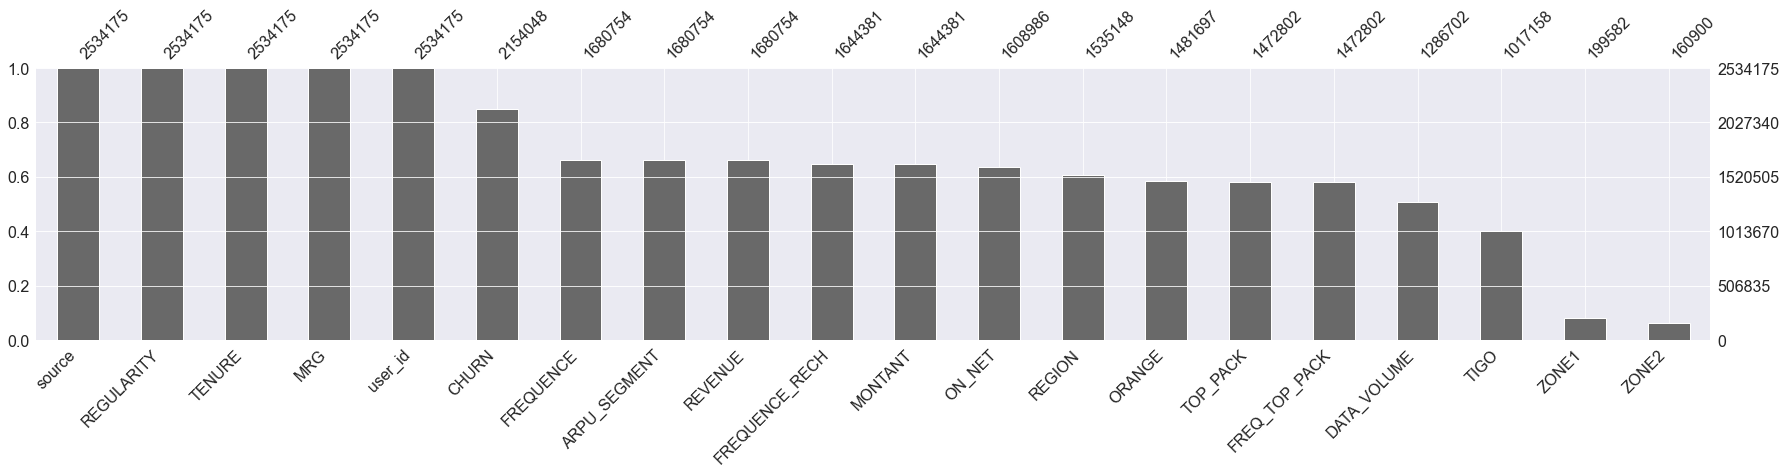

In [176]:
# Visualize the missing values in the dataset in descending order
missingno.bar(all_data, sort='descending', figsize=(30, 5));

In [177]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534175 entries, 0 to 2534174
Data columns (total 20 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           float64
 19  source          object 
dtypes: float64(13), int64(1), object(6)
memory usage: 386.7+ MB


#### Filling the categorical columns of the dataset with unknown

In [178]:
# Fill the missing values in the categorical columns with missing
all_data['REGION'].fillna('missing', inplace=True)
all_data['TOP_PACK'].fillna('missing', inplace=True)

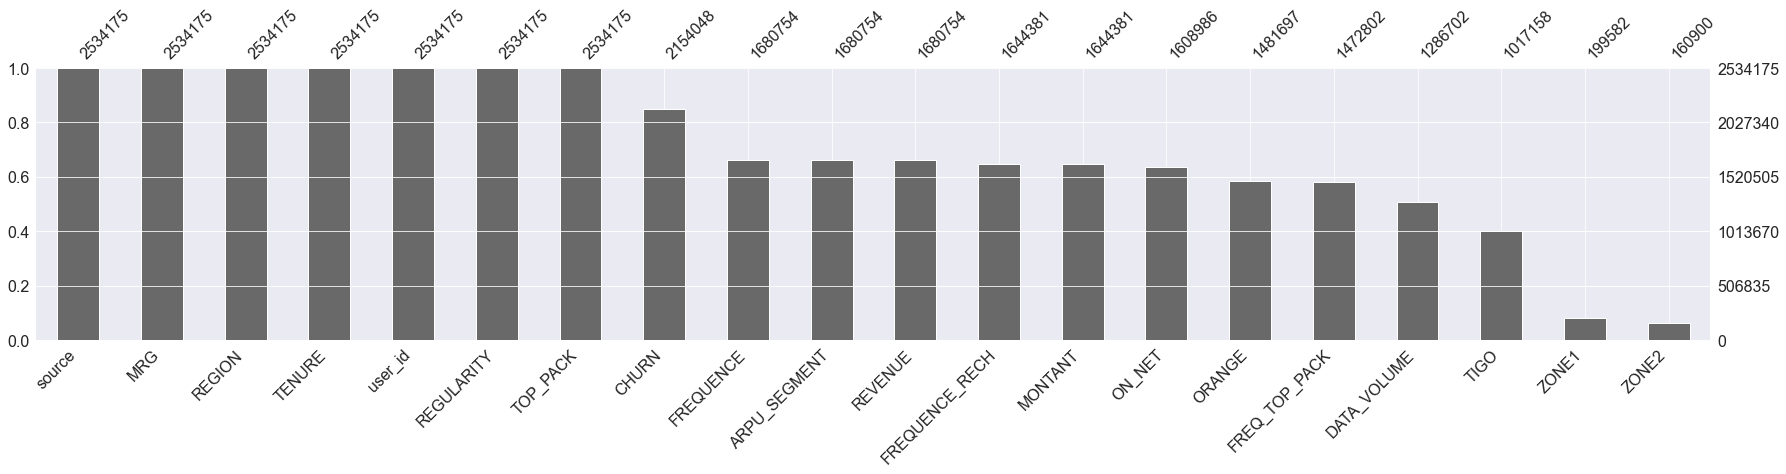

In [179]:
# Visualize the missing values in the dataset in descending order
missingno.bar(all_data, sort='descending', figsize=(30, 5));

In [180]:
# Check for missing values in the training dataset
all_data.isna().sum()

user_id                 0
REGION                  0
TENURE                  0
MONTANT            889794
FREQUENCE_RECH     889794
REVENUE            853421
ARPU_SEGMENT       853421
FREQUENCE          853421
DATA_VOLUME       1247473
ON_NET             925189
ORANGE            1052478
TIGO              1517017
ZONE1             2334593
ZONE2             2373275
MRG                     0
REGULARITY              0
TOP_PACK                0
FREQ_TOP_PACK     1061373
CHURN              380127
source                  0
dtype: int64

### Filling the numerical columns of the training data with the median

In [181]:
# Check columns that are numeric datatype
for label, content in all_data.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

MONTANT
FREQUENCE_RECH
REVENUE
ARPU_SEGMENT
FREQUENCE
DATA_VOLUME
ON_NET
ORANGE
TIGO
ZONE1
ZONE2
REGULARITY
FREQ_TOP_PACK
CHURN


In [182]:
# Check columns that are not numeric datatype
for label, content in all_data.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

user_id
REGION
TENURE
MRG
TOP_PACK
source


In [183]:
# Check for which numeric columns have null(missing) values
for label, content in all_data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

MONTANT
FREQUENCE_RECH
REVENUE
ARPU_SEGMENT
FREQUENCE
DATA_VOLUME
ON_NET
ORANGE
TIGO
ZONE1
ZONE2
FREQ_TOP_PACK
CHURN


In [184]:
# Fill the numerical columns with the median
all_data['MONTANT'] = all_data['MONTANT'].fillna(all_data['MONTANT'].median())
all_data['FREQUENCE_RECH'] = all_data['FREQUENCE_RECH'].fillna(all_data['FREQUENCE'].median())
all_data['REVENUE'] = all_data['REVENUE'].fillna(all_data['REVENUE'].median())
all_data['ARPU_SEGMENT']=all_data['ARPU_SEGMENT'].fillna(all_data['ARPU_SEGMENT'].median())
all_data['FREQUENCE']=all_data['FREQUENCE'].fillna(all_data['FREQUENCE'].median())
all_data['REGULARITY']=all_data['REGULARITY'].fillna(all_data['REGULARITY'].median())
all_data['DATA_VOLUME']=all_data['DATA_VOLUME'].fillna(all_data['DATA_VOLUME'].median())
all_data['ON_NET']=all_data['ON_NET'].fillna(all_data['ON_NET'].median())
all_data['ORANGE']=all_data['ORANGE'].fillna(all_data['ORANGE'].median())
all_data['TIGO']=all_data['TIGO'].fillna(all_data['TIGO'].median())
all_data['ZONE1']=all_data['ZONE1'].fillna(all_data['ZONE1'].median())
all_data['ZONE2']=all_data['ZONE2'].fillna(all_data['ZONE2'].median())
all_data['FREQ_TOP_PACK']=all_data['FREQ_TOP_PACK'].fillna(all_data['FREQ_TOP_PACK'].median())

In [185]:
all_data.isna().sum()

user_id                0
REGION                 0
TENURE                 0
MONTANT                0
FREQUENCE_RECH         0
REVENUE                0
ARPU_SEGMENT           0
FREQUENCE              0
DATA_VOLUME            0
ON_NET                 0
ORANGE                 0
TIGO                   0
ZONE1                  0
ZONE2                  0
MRG                    0
REGULARITY             0
TOP_PACK               0
FREQ_TOP_PACK          0
CHURN             380127
source                 0
dtype: int64

In [186]:
all_data['TENURE'].unique()

array(['24', '18-21', '12-15', '15-18', '21-24', '9-12', '3-6', '6-9'],
      dtype=object)

In [187]:
# value_counts() function returns object containing counts of unique values
all_data['TENURE'].value_counts()

24       2403551
18-21      53431
15-18      30646
12-15      17577
21-24      14940
9-12       10982
6-9         2137
3-6          911
Name: TENURE, dtype: int64

In [188]:
# # Turn categorical variables except user_id into numbers
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
all_data['REGION'] = encoder.fit_transform(all_data['REGION'])
all_data['TENURE'] = encoder.fit_transform(all_data['TENURE'])
all_data['TOP_PACK'] = encoder.fit_transform(all_data['TOP_PACK'])
all_data['MRG'] = encoder.fit_transform(all_data['MRG'])

In [189]:
all_data.head()

user_id  REGION  TENURE  MONTANT  \
0  00000bfd7d50f01092811bc0c8d7b0d6fe7c3596       2       4   4250.0   
1  00000cb4a5d760de88fecb38e2f71b7bec52e834      14       2   3000.0   
2  00001654a9d9f96303d9969d0a4a851714a4bb57      14       4   3600.0   
3  00001dd6fa45f7ba044bd5d84937be464ce78ac2       0       4  13500.0   
4  000028d9e13a595abe061f9b58f3d76ab907850f       0       4   1000.0   

   FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  ON_NET  \
0            15.0   4251.0        1417.0       17.0          4.0   388.0   
1             9.0   3000.0        1000.0        9.0        258.0    27.0   
2             2.0   1020.0         340.0        2.0        258.0    90.0   
3            15.0  13502.0        4501.0       18.0      43804.0    41.0   
4             1.0    985.0         328.0        1.0        258.0    39.0   

   ORANGE  TIGO  ZONE1  ZONE2  MRG  REGULARITY  TOP_PACK  FREQ_TOP_PACK  \
0    46.0   1.0    1.0    2.0    0          54       109            8.0   
1    29.0   6.0    1.0    2.0    0           4       137            5.0   
2    46.0   7.0    1.0    2.0    0          17       110            1.0   
3   102.0   2.0    1.0    2.0    0          62        35           11.0   
4    24.0   6.0    1.0    2.0    0          11       102            2.0   

   CHURN source  
0    0.0  train  
1    1.0  train  
2    0.0  train  
3    0.0  train  
4    0.0  train

In [190]:
all_data['TENURE'].unique()

array([4, 2, 0, 1, 3, 7, 5, 6])

In [191]:
all_data['TENURE'].value_counts()

4    2403551
2      53431
1      30646
0      17577
3      14940
7      10982
6       2137
5        911
Name: TENURE, dtype: int64

In [192]:
# Replace the label encoded values to match the heirarchy of months because 
# the label encoded values do not reflect the heirarchy of months
all_data['TENURE'] = all_data['TENURE'].replace({4: '7',
                                                 3: '6',
                                                 2: '5',
                                                 1: '4',
                                                 0: '3',
                                                 7: '2',
                                                 6: '1',
                                                 5: '0'})
all_data['TENURE'].value_counts()

7    2403551
5      53431
4      30646
3      17577
6      14940
2      10982
1       2137
0        911
Name: TENURE, dtype: int64

In [193]:
all_data.head()

user_id  REGION TENURE  MONTANT  \
0  00000bfd7d50f01092811bc0c8d7b0d6fe7c3596       2      7   4250.0   
1  00000cb4a5d760de88fecb38e2f71b7bec52e834      14      5   3000.0   
2  00001654a9d9f96303d9969d0a4a851714a4bb57      14      7   3600.0   
3  00001dd6fa45f7ba044bd5d84937be464ce78ac2       0      7  13500.0   
4  000028d9e13a595abe061f9b58f3d76ab907850f       0      7   1000.0   

   FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  ON_NET  \
0            15.0   4251.0        1417.0       17.0          4.0   388.0   
1             9.0   3000.0        1000.0        9.0        258.0    27.0   
2             2.0   1020.0         340.0        2.0        258.0    90.0   
3            15.0  13502.0        4501.0       18.0      43804.0    41.0   
4             1.0    985.0         328.0        1.0        258.0    39.0   

   ORANGE  TIGO  ZONE1  ZONE2  MRG  REGULARITY  TOP_PACK  FREQ_TOP_PACK  \
0    46.0   1.0    1.0    2.0    0          54       109            8.0   
1    29.0   6.0    1.0    2.0    0           4       137            5.0   
2    46.0   7.0    1.0    2.0    0          17       110            1.0   
3   102.0   2.0    1.0    2.0    0          62        35           11.0   
4    24.0   6.0    1.0    2.0    0          11       102            2.0   

   CHURN source  
0    0.0  train  
1    1.0  train  
2    0.0  train  
3    0.0  train  
4    0.0  train

In [194]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534175 entries, 0 to 2534174
Data columns (total 20 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          int32  
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             int32  
 15  REGULARITY      int64  
 16  TOP_PACK        int32  
 17  FREQ_TOP_PACK   float64
 18  CHURN           float64
 19  source          object 
dtypes: float64(13), int32(3), int64(1), object(3)
memory usage: 357.7+ MB


In [195]:
# Convert TENURE column to int
all_data['TENURE'] = pd.to_numeric(all_data['TENURE'])

In [196]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534175 entries, 0 to 2534174
Data columns (total 20 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          int32  
 2   TENURE          int64  
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             int32  
 15  REGULARITY      int64  
 16  TOP_PACK        int32  
 17  FREQ_TOP_PACK   float64
 18  CHURN           float64
 19  source          object 
dtypes: float64(13), int32(3), int64(2), object(2)
memory usage: 357.7+ MB


In [197]:
print('Rows containing 0 =', len(all_data[all_data['CHURN']==0]))
print('Rows containing 1 =', len(all_data[all_data['CHURN']==1]))

Rows containing 0 = 1750062
Rows containing 1 = 403986


In [198]:
# Check the shape of the dataset
print(f'The shape of the dataset is: {all_data.shape}')

The shape of the dataset is: (2534175, 20)


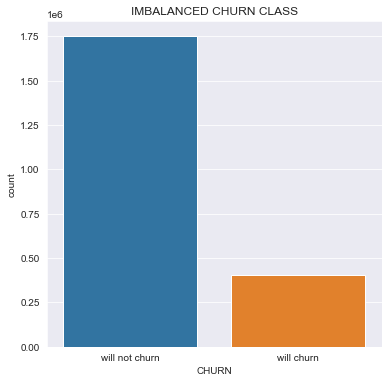

In [199]:
# Visualize the CHURN variable with a bar graph
plt.figure(figsize=(6, 6))
g = sns.countplot('CHURN', data=all_data)
plt.title('IMBALANCED CHURN CLASS')
g.set_xticklabels(['will not churn', 'will churn'])
plt.show();

In [200]:
all_data['CHURN'].value_counts(normalize=True)

0.0    0.812453
1.0    0.187547
Name: CHURN, dtype: float64

In [201]:
all_data.dtypes

user_id            object
REGION              int32
TENURE              int64
MONTANT           float64
FREQUENCE_RECH    float64
REVENUE           float64
ARPU_SEGMENT      float64
FREQUENCE         float64
DATA_VOLUME       float64
ON_NET            float64
ORANGE            float64
TIGO              float64
ZONE1             float64
ZONE2             float64
MRG                 int32
REGULARITY          int64
TOP_PACK            int32
FREQ_TOP_PACK     float64
CHURN             float64
source             object
dtype: object

In [202]:
# save preprocessed data
all_data.to_csv('all_data_processed.csv')

In [203]:
train = all_data[all_data['source'] == 'train']

test = all_data[all_data['source'] == 'test']


train = train.drop(['source', 'user_id', 'MRG'], axis = 1)

test = test.drop(['source', 'MRG'], axis = 1)

In [204]:
train.head()

REGION  TENURE  MONTANT  FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  FREQUENCE  \
0       2       7   4250.0            15.0   4251.0        1417.0       17.0   
1      14       5   3000.0             9.0   3000.0        1000.0        9.0   
2      14       7   3600.0             2.0   1020.0         340.0        2.0   
3       0       7  13500.0            15.0  13502.0        4501.0       18.0   
4       0       7   1000.0             1.0    985.0         328.0        1.0   

   DATA_VOLUME  ON_NET  ORANGE  TIGO  ZONE1  ZONE2  REGULARITY  TOP_PACK  \
0          4.0   388.0    46.0   1.0    1.0    2.0          54       109   
1        258.0    27.0    29.0   6.0    1.0    2.0           4       137   
2        258.0    90.0    46.0   7.0    1.0    2.0          17       110   
3      43804.0    41.0   102.0   2.0    1.0    2.0          62        35   
4        258.0    39.0    24.0   6.0    1.0    2.0          11       102   

   FREQ_TOP_PACK  CHURN  
0            8.0    0.0  
1            5.0    1.0  
2            1.0    0.0  
3           11.0    0.0  
4            2.0    0.0

In [205]:
# # Convert the CHURN column to int from float
train['CHURN'] = train['CHURN'].astype(int)

In [206]:
train.head()

REGION  TENURE  MONTANT  FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  FREQUENCE  \
0       2       7   4250.0            15.0   4251.0        1417.0       17.0   
1      14       5   3000.0             9.0   3000.0        1000.0        9.0   
2      14       7   3600.0             2.0   1020.0         340.0        2.0   
3       0       7  13500.0            15.0  13502.0        4501.0       18.0   
4       0       7   1000.0             1.0    985.0         328.0        1.0   

   DATA_VOLUME  ON_NET  ORANGE  TIGO  ZONE1  ZONE2  REGULARITY  TOP_PACK  \
0          4.0   388.0    46.0   1.0    1.0    2.0          54       109   
1        258.0    27.0    29.0   6.0    1.0    2.0           4       137   
2        258.0    90.0    46.0   7.0    1.0    2.0          17       110   
3      43804.0    41.0   102.0   2.0    1.0    2.0          62        35   
4        258.0    39.0    24.0   6.0    1.0    2.0          11       102   

   FREQ_TOP_PACK  CHURN  
0            8.0      0  
1            5.0      1  
2            1.0      0  
3           11.0      0  
4            2.0      0

In [207]:
test.head()

user_id  REGION  TENURE  MONTANT  \
2154048  00001dbe00e56fc4b1c1b65dda63de2a5ece55f9      12       7   5000.0   
2154049  000055d41c8a62052dd426592e8a4a3342bf565d      14       5    300.0   
2154050  000081dd3245e6869a4a9c574c7050e7bb84c2c8       0       7   3300.0   
2154051  0000b76d2145d9445d9ff6b65c9ebc4196c89337      14       7   3000.0   
2154052  0000bae5480628cf8fe51ad84bcb39772fc79224      14       7   3000.0   

         FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  \
2154048             5.0   5000.0        1667.0        5.0        258.0   
2154049             2.0    326.0         109.0        3.0        397.0   
2154050            25.0   3400.0        1133.0       26.0       7150.0   
2154051             9.0   3000.0        1000.0        9.0        258.0   
2154052             9.0   3000.0        1000.0        9.0        258.0   

         ON_NET  ORANGE  TIGO  ZONE1  ZONE2  REGULARITY  TOP_PACK  \
2154048   378.0    11.0   5.0    1.0    2.0          42       110   
2154049    27.0     0.0   6.0    1.0    2.0          41        30   
2154050     0.0     2.0   5.0    1.0    2.0          57        30   
2154051    27.0    29.0   6.0    1.0    2.0           9       137   
2154052    27.0    29.0   6.0    1.0    2.0          10       137   

         FREQ_TOP_PACK  CHURN  
2154048            5.0    NaN  
2154049            1.0    NaN  
2154050           22.0    NaN  
2154051            5.0    NaN  
2154052            5.0    NaN

In [208]:
test = test.drop(['CHURN'], axis = 1)

In [209]:
test.head()

user_id  REGION  TENURE  MONTANT  \
2154048  00001dbe00e56fc4b1c1b65dda63de2a5ece55f9      12       7   5000.0   
2154049  000055d41c8a62052dd426592e8a4a3342bf565d      14       5    300.0   
2154050  000081dd3245e6869a4a9c574c7050e7bb84c2c8       0       7   3300.0   
2154051  0000b76d2145d9445d9ff6b65c9ebc4196c89337      14       7   3000.0   
2154052  0000bae5480628cf8fe51ad84bcb39772fc79224      14       7   3000.0   

         FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  \
2154048             5.0   5000.0        1667.0        5.0        258.0   
2154049             2.0    326.0         109.0        3.0        397.0   
2154050            25.0   3400.0        1133.0       26.0       7150.0   
2154051             9.0   3000.0        1000.0        9.0        258.0   
2154052             9.0   3000.0        1000.0        9.0        258.0   

         ON_NET  ORANGE  TIGO  ZONE1  ZONE2  REGULARITY  TOP_PACK  \
2154048   378.0    11.0   5.0    1.0    2.0          42       110   
2154049    27.0     0.0   6.0    1.0    2.0          41        30   
2154050     0.0     2.0   5.0    1.0    2.0          57        30   
2154051    27.0    29.0   6.0    1.0    2.0           9       137   
2154052    27.0    29.0   6.0    1.0    2.0          10       137   

         FREQ_TOP_PACK  
2154048            5.0  
2154049            1.0  
2154050           22.0  
2154051            5.0  
2154052            5.0

In [210]:
len(train), len(test)

(2154048, 380127)

### <a id='4'>4. Modelling</a>

### Applying Oversampling technique for the training dataset(Random Oversampling Minority class)

With my training data created, I’ll upsample the minority class using the SMOTE algorithm (Synthetic Minority Oversampling Technique). At a high level, SMOTE creates synthetic observations of the minority class by:

* Finding the k-nearest-neighbors for minority class observations (finding similar observations)
* Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observation.

After upsampling to a class ratio of 1.0, I should have a balanced dataset. There’s no need (and often it’s not smart) to balance the classes, but it magnifies the issue caused by incorrectly timed oversampling.

In [211]:
train.describe()

REGION        TENURE       MONTANT  FREQUENCE_RECH       REVENUE  \
count  2.154048e+06  2.154048e+06  2.154048e+06    2.154048e+06  2.154048e+06   
mean   8.297724e+00  6.858886e+00  4.642559e+03    1.064061e+01  4.664511e+03   
std    5.891501e+00  6.677774e-01  5.853728e+03    1.075906e+01  5.970967e+03   
min    0.000000e+00  0.000000e+00  1.000000e+01    1.000000e+00  1.000000e+00   
25%    1.000000e+00  7.000000e+00  2.000000e+03    4.000000e+00  1.901000e+03   
50%    1.100000e+01  7.000000e+00  3.000000e+03    9.000000e+00  3.000000e+03   
75%    1.400000e+01  7.000000e+00  4.600000e+03    1.000000e+01  4.700000e+03   
max    1.400000e+01  7.000000e+00  4.700000e+05    1.330000e+02  5.321770e+05   

       ARPU_SEGMENT     FREQUENCE   DATA_VOLUME        ON_NET        ORANGE  \
count  2.154048e+06  2.154048e+06  2.154048e+06  2.154048e+06  2.154048e+06   
mean   1.554841e+03  1.230020e+01  1.836167e+03  1.861355e+02  6.781430e+01   
std    1.990320e+03  1.219326e+01  9.606391e+03  7.057040e+02  1.600853e+02   
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    6.340000e+02  6.000000e+00  2.310000e+02  1.200000e+01  2.000000e+01   
50%    1.000000e+03  9.000000e+00  2.580000e+02  2.700000e+01  2.900000e+01   
75%    1.567000e+03  1.300000e+01  2.890000e+02  5.500000e+01  4.100000e+01   
max    1.773920e+05  9.100000e+01  1.823866e+06  5.080900e+04  2.132300e+04   

               TIGO         ZONE1         ZONE2    REGULARITY      TOP_PACK  \
count  2.154048e+06  2.154048e+06  2.154048e+06  2.154048e+06  2.154048e+06   
mean   1.286287e+01  1.564947e+00  2.352743e+00  2.804251e+01  9.086425e+01   
std    4.113047e+01  1.171653e+01  8.547771e+00  2.228686e+01  4.928405e+01   
min    0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00   
25%    6.000000e+00  1.000000e+00  2.000000e+00  6.000000e+00  3.400000e+01   
50%    6.000000e+00  1.000000e+00  2.000000e+00  2.400000e+01  1.090000e+02   
75%    6.000000e+00  1.000000e+00  2.000000e+00  5.100000e+01  1.370000e+02   
max    4.174000e+03  4.792000e+03  3.697000e+03  6.200000e+01  1.420000e+02   

       FREQ_TOP_PACK         CHURN  
count   2.154048e+06  2.154048e+06  
mean    7.482205e+00  1.875474e-01  
std     9.594821e+00  3.903504e-01  
min     1.000000e+00  0.000000e+00  
25%     4.000000e+00  0.000000e+00  
50%     5.000000e+00  0.000000e+00  
75%     6.000000e+00  0.000000e+00  
max     7.130000e+02  1.000000e+00

In [212]:
# Split the data into X(features) and y (churn)
X = train.drop('CHURN', axis=1)
y = train['CHURN']

In [213]:
X.shape, y.shape

((2154048, 16), (2154048,))

In [214]:
y.value_counts()

0    1750062
1     403986
Name: CHURN, dtype: int64

In [215]:
# summarize class distribution
print("Before Oversampling: ", Counter(y))

from imblearn.over_sampling import SMOTE

# over = RandomOverSampler(sampling_strategy='minority')
sm = SMOTE(sampling_strategy='minority', random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

Counter(y_sm)
print(f"After Oversampling: {Counter(y_sm)}")

Before Oversampling:  Counter({0: 1750062, 1: 403986})
After Oversampling: Counter({0: 1750062, 1: 1750062})


The SMOTE operation took 1hour, 30 minutes to oversample.

In [216]:
# Check the shape of the oversampled data
X_sm.shape, y_sm.shape

((3500124, 16), (3500124,))

In [217]:
# split the new oversampled data
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.3, random_state = 42)

In [218]:
len(X_train), len(y_test), len(y_train), len(X_test)

(2450086, 1050038, 2450086, 1050038)

We're going to be using 5 models to evaluate the oversampled dataset:

- Logistic Regression
- RandomForestClassifier
- LGBMClassifier
- CatBoostClassifier
- XGBClassifier

All of the algorithms in the Scikit-Learn library use the same functions, for training a model, model.fit(X_train, y_train) and for scoring a model model.score(X_test, y_test). score() returns the ratio of correct predictions (1.0 = 100% correct).

**Metrics**:

- Precision is the total number of customers the model correctly identified as customers that will churn out of all the people PREDICTED to churn

- Recall is the total number of customers the model correctly identified as customers that will churn out of all the people who ACTUALLY churned.

- Accuracy is the total number of correct predictions divided by the total number of predictions.

It is not possible to achieve both a high precision and a high recall value- we must determine which is more important for us in our model.

- F1 gives us the harmonic mean of precision and recall (Aim for a high F1 value to indicate a good precision and a good recall value).

- ROC (Receiver Operating Characteristic) Curve is a plot betwen the True Positive Rate on the y-axis and the False Positive Rate on the x-axis. A plot with the graph closer to the left and top axes is indicative of a better model.

- AUC (Area Under Curve) values range from 0 to 1 with higher scores indicating a better model. The diagonal line on ROC curves usually represents a random model with an AUC of 0.5. (Would definitely want our model's AUC to be higher than 0.5, since that would signify it is better than random chance.

- PRC (Precision-Recall Curves) plot values of precision scores on the y-axis and recall on the x-axis. A plot with the graph closer to the top and right axes is indicative of a better model. As with ROC curves, we should aim for a high AUC.

For this challenge, the evaluation metric is the Area under the curve (AUC curve). 

### <a id='4.1'>4.1. Logistic Regression</a>

In [219]:
# Logistic Regression
np.random.seed(42)

# Instantiate the model
log = LogisticRegression()

# Fit the model on the train data
log.fit(X_train, y_train)

# Score the model on the test data
log.score(X_test, y_test)

0.8262310506857847

In [220]:
# Make predictions on the model
log_pred = log.predict(X_test)
log_pred[:10]

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 1])

In [221]:
y_test[:10]

3167564    1
2811121    1
3262545    1
1067698    0
2209519    1
2978733    1
1685663    0
2539059    1
55614      1
3123644    1
Name: CHURN, dtype: int32

In [222]:
print(classification_report(y_test, log_pred));

              precision    recall  f1-score   support

           0       0.88      0.76      0.81    525294
           1       0.79      0.90      0.84    524744

    accuracy                           0.83   1050038
   macro avg       0.83      0.83      0.83   1050038
weighted avg       0.83      0.83      0.83   1050038



In [223]:
print('Precision Score: ', round(precision_score(y_test, log_pred), 15))
print('Recall Score: ', round(recall_score(y_test, log_pred), 15))
print('F1 Score: ', round(f1_score(y_test, log_pred), 15))
print('Accuracy Score: ', round(accuracy_score(y_test, log_pred), 15))
print('ROC AUC: ', round(roc_auc_score(y_test,log_pred), 15))

Precision Score:  0.786657063414961
Recall Score:  0.895007851447563
F1 Score:  0.837341900791967
Accuracy Score:  0.826231050685785
ROC AUC:  0.826267056465804


### <a id='4.1.1'>4.1.1 Confusion Matrix of Logistic Regression</a>

[[397924 127370]
 [ 55094 469650]]


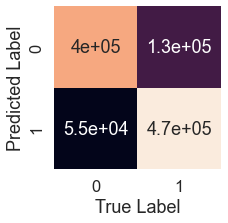

In [224]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, log_pred):
    
    """
    Plots a confusion matrix using seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, log_pred),
                    annot=True,
                    cbar=False)
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    
plot_conf_mat(y_test, log_pred)
print(confusion_matrix(y_test, log_pred))

### <a id='4.1.2'>4.1.2 ROC Curve and AUC Scores for the Logistic Regression model</a>

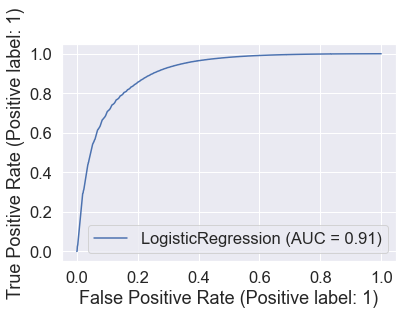

In [225]:
# Plot ROC curve and calculate the AUC metric
plot_roc_curve(log, X_test, y_test);

### <a id='4.2'>4.2. Random Forest</a>

In [226]:
# Random Forest
np.random.seed(42)

# Instantiate the model
rf = RandomForestClassifier()

# Fit the model on the training data
rf.fit(X_train, y_train)

# Score the model on the test data
rf.score(X_test, y_test)

0.8990874615966279

In [227]:
# Make predictions on the model
rf_pred = rf.predict(X_test)
rf_pred[:10]

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1])

In [228]:
y_test[:10]

3167564    1
2811121    1
3262545    1
1067698    0
2209519    1
2978733    1
1685663    0
2539059    1
55614      1
3123644    1
Name: CHURN, dtype: int32

In [229]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89    525294
           1       0.87      0.95      0.90    524744

    accuracy                           0.90   1050038
   macro avg       0.90      0.90      0.90   1050038
weighted avg       0.90      0.90      0.90   1050038



In [230]:
print('Precision Score:', round(precision_score(y_test, rf_pred), 15))
print('Recall Score:', round(recall_score(y_test, rf_pred), 15))
print('F1 Score:', round(f1_score(y_test, rf_pred), 15))
print('Accuracy Score:', round(accuracy_score(y_test, rf_pred), 15))
print('ROC AUC: ', round(roc_auc_score(y_test, rf_pred), 15))

Precision Score: 0.865187135930796
Recall Score: 0.945377174393609
F1 Score: 0.903506343545902
Accuracy Score: 0.899087461596628
ROC AUC:  0.899111695018329


### <a id='4.2.1'>4.2.1 Confusion Matrix of the Random Forest</a>

[[447995  77299]
 [ 28663 496081]]


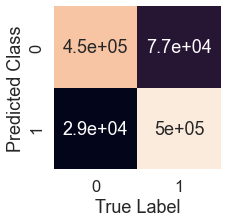

In [231]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, rf_pred):
    """
    Plots a confusion matrix using seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, rf_pred),
                    annot=True,
                    cbar=False)
    plt.xlabel('True Label')
    plt.ylabel('Predicted Class')
    
plot_conf_mat(y_test, rf_pred)
print(confusion_matrix(y_test, rf_pred))

### <a id='4.2.2'>4.2.2 ROC Curve and AUC Scores for the Random Forest model</a>

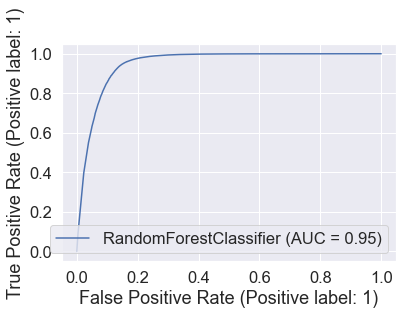

In [232]:
# Plot the ROC curve and calculate the AUC metric
plot_roc_curve(rf, X_test, y_test);

### <a id='4.3'>4.3. LightGBM</a>

In [233]:
np.random.seed(42)

# Instantiate the model
lgbm = LGBMClassifier()

# Fit the model
lgbm.fit(X_train, y_train)

# Score the model on the test data
lgbm.score(X_test, y_test)

0.8960704279273702

In [234]:
# Make predictions on the model
lgbm_pred = lgbm.predict(X_test)
lgbm_pred[:10]

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1])

In [235]:
y_test[:10]

3167564    1
2811121    1
3262545    1
1067698    0
2209519    1
2978733    1
1685663    0
2539059    1
55614      1
3123644    1
Name: CHURN, dtype: int32

In [236]:
print(classification_report(y_test, lgbm_pred))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89    525294
           1       0.86      0.94      0.90    524744

    accuracy                           0.90   1050038
   macro avg       0.90      0.90      0.90   1050038
weighted avg       0.90      0.90      0.90   1050038



In [237]:
print('Precision Score:', round(precision_score(y_test, lgbm_pred), 15))
print('Recall Score:', round(recall_score(y_test, lgbm_pred), 15))
print('F1 Score:', round(f1_score(y_test, lgbm_pred), 15))
print('Accuracy Score:', round(accuracy_score(y_test, lgbm_pred), 15))
print('ROC AUC: ', round(roc_auc_score(y_test, lgbm_pred), 15))

Precision Score: 0.864083130098394
Recall Score: 0.939869726952571
F1 Score: 0.90038447776017
Accuracy Score: 0.89607042792737
ROC AUC:  0.896093357576732


### <a id='4.3.1'>4.3.1 Confusion Matrix of LightGBMClassifier Model</a>

[[447717  77577]
 [ 31553 493191]]


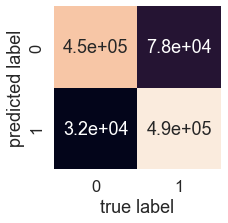

In [238]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, lgbm_pred):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, lgbm_pred),
                     annot=True, 
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, lgbm_pred)
print(confusion_matrix(y_test, lgbm_pred))

### <a id='4.3.2'>4.3.2 ROC Curve and AUC Scores for the LightGBM model</a>

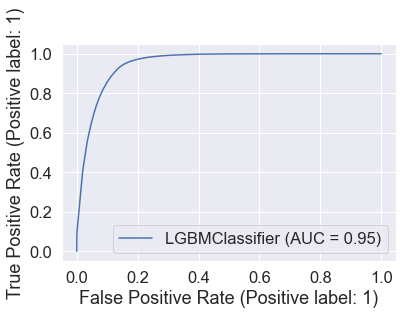

In [239]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(lgbm, X_test, y_test);

### <a id='4.4'>4.4. CatBoost</a>

In [240]:
np.random.seed(42)

# Instantiate the model
cat = CatBoostClassifier()

# Fit the model to the training data
cat.fit(X_train, y_train)

# Score the model on the test data
cat.score(X_test, y_test)

Learning rate set to 0.288479
0:	learn: 0.4696185	total: 1.34s	remaining: 22m 22s
1:	learn: 0.3868339	total: 2.19s	remaining: 18m 11s
2:	learn: 0.3514611	total: 3.13s	remaining: 17m 19s
3:	learn: 0.3367579	total: 3.95s	remaining: 16m 22s
4:	learn: 0.3247415	total: 4.86s	remaining: 16m 7s
5:	learn: 0.3177508	total: 5.7s	remaining: 15m 44s
6:	learn: 0.3113219	total: 6.46s	remaining: 15m 16s
7:	learn: 0.3075523	total: 7.24s	remaining: 14m 57s
8:	learn: 0.3047999	total: 8.04s	remaining: 14m 44s
9:	learn: 0.3027183	total: 8.8s	remaining: 14m 31s
10:	learn: 0.2964724	total: 9.62s	remaining: 14m 25s
11:	learn: 0.2945845	total: 10.4s	remaining: 14m 20s
12:	learn: 0.2925472	total: 11.3s	remaining: 14m 16s
13:	learn: 0.2918538	total: 12s	remaining: 14m 4s
14:	learn: 0.2904934	total: 12.8s	remaining: 14m
15:	learn: 0.2882480	total: 13.6s	remaining: 13m 58s
16:	learn: 0.2857653	total: 14.5s	remaining: 13m 55s
17:	learn: 0.2810880	total: 15.2s	remaining: 13m 50s
18:	learn: 0.2796040	total: 16s	rema

154:	learn: 0.2504788	total: 1m 48s	remaining: 9m 50s
155:	learn: 0.2504543	total: 1m 49s	remaining: 9m 49s
156:	learn: 0.2504106	total: 1m 49s	remaining: 9m 49s
157:	learn: 0.2503878	total: 1m 50s	remaining: 9m 48s
158:	learn: 0.2503936	total: 1m 51s	remaining: 9m 47s
159:	learn: 0.2503642	total: 1m 51s	remaining: 9m 47s
160:	learn: 0.2503432	total: 1m 52s	remaining: 9m 47s
161:	learn: 0.2502839	total: 1m 53s	remaining: 9m 47s
162:	learn: 0.2502589	total: 1m 54s	remaining: 9m 47s
163:	learn: 0.2502040	total: 1m 55s	remaining: 9m 46s
164:	learn: 0.2501929	total: 1m 55s	remaining: 9m 46s
165:	learn: 0.2501882	total: 1m 56s	remaining: 9m 45s
166:	learn: 0.2501620	total: 1m 57s	remaining: 9m 44s
167:	learn: 0.2501333	total: 1m 57s	remaining: 9m 44s
168:	learn: 0.2501340	total: 1m 58s	remaining: 9m 43s
169:	learn: 0.2500624	total: 1m 59s	remaining: 9m 43s
170:	learn: 0.2500325	total: 2m	remaining: 9m 42s
171:	learn: 0.2500318	total: 2m	remaining: 9m 41s
172:	learn: 0.2500141	total: 2m 1s	r

307:	learn: 0.2473987	total: 3m 45s	remaining: 8m 25s
308:	learn: 0.2473915	total: 3m 45s	remaining: 8m 24s
309:	learn: 0.2473833	total: 3m 46s	remaining: 8m 23s
310:	learn: 0.2473796	total: 3m 47s	remaining: 8m 23s
311:	learn: 0.2473701	total: 3m 47s	remaining: 8m 22s
312:	learn: 0.2473578	total: 3m 48s	remaining: 8m 21s
313:	learn: 0.2473463	total: 3m 48s	remaining: 8m 20s
314:	learn: 0.2473183	total: 3m 49s	remaining: 8m 19s
315:	learn: 0.2473044	total: 3m 50s	remaining: 8m 18s
316:	learn: 0.2472790	total: 3m 50s	remaining: 8m 17s
317:	learn: 0.2472419	total: 3m 51s	remaining: 8m 16s
318:	learn: 0.2472433	total: 3m 52s	remaining: 8m 15s
319:	learn: 0.2472354	total: 3m 52s	remaining: 8m 14s
320:	learn: 0.2472331	total: 3m 53s	remaining: 8m 13s
321:	learn: 0.2472247	total: 3m 53s	remaining: 8m 12s
322:	learn: 0.2472210	total: 3m 54s	remaining: 8m 11s
323:	learn: 0.2472044	total: 3m 55s	remaining: 8m 10s
324:	learn: 0.2471936	total: 3m 55s	remaining: 8m 9s
325:	learn: 0.2471670	total: 

461:	learn: 0.2458543	total: 5m 33s	remaining: 6m 28s
462:	learn: 0.2458342	total: 5m 34s	remaining: 6m 28s
463:	learn: 0.2458291	total: 5m 35s	remaining: 6m 27s
464:	learn: 0.2458278	total: 5m 36s	remaining: 6m 26s
465:	learn: 0.2458192	total: 5m 36s	remaining: 6m 26s
466:	learn: 0.2458106	total: 5m 37s	remaining: 6m 25s
467:	learn: 0.2458042	total: 5m 38s	remaining: 6m 24s
468:	learn: 0.2457993	total: 5m 39s	remaining: 6m 23s
469:	learn: 0.2457927	total: 5m 39s	remaining: 6m 23s
470:	learn: 0.2457862	total: 5m 40s	remaining: 6m 22s
471:	learn: 0.2457715	total: 5m 41s	remaining: 6m 21s
472:	learn: 0.2457689	total: 5m 42s	remaining: 6m 21s
473:	learn: 0.2457728	total: 5m 42s	remaining: 6m 20s
474:	learn: 0.2457644	total: 5m 43s	remaining: 6m 19s
475:	learn: 0.2457638	total: 5m 44s	remaining: 6m 19s
476:	learn: 0.2457481	total: 5m 45s	remaining: 6m 18s
477:	learn: 0.2457432	total: 5m 46s	remaining: 6m 18s
478:	learn: 0.2457316	total: 5m 46s	remaining: 6m 17s
479:	learn: 0.2457307	total:

615:	learn: 0.2447487	total: 7m 21s	remaining: 4m 35s
616:	learn: 0.2447499	total: 7m 22s	remaining: 4m 34s
617:	learn: 0.2447441	total: 7m 22s	remaining: 4m 33s
618:	learn: 0.2447397	total: 7m 23s	remaining: 4m 33s
619:	learn: 0.2447362	total: 7m 24s	remaining: 4m 32s
620:	learn: 0.2447209	total: 7m 24s	remaining: 4m 31s
621:	learn: 0.2447143	total: 7m 25s	remaining: 4m 30s
622:	learn: 0.2447101	total: 7m 26s	remaining: 4m 29s
623:	learn: 0.2447035	total: 7m 26s	remaining: 4m 29s
624:	learn: 0.2446950	total: 7m 27s	remaining: 4m 28s
625:	learn: 0.2446904	total: 7m 27s	remaining: 4m 27s
626:	learn: 0.2446826	total: 7m 28s	remaining: 4m 26s
627:	learn: 0.2446785	total: 7m 28s	remaining: 4m 25s
628:	learn: 0.2446714	total: 7m 29s	remaining: 4m 25s
629:	learn: 0.2446669	total: 7m 30s	remaining: 4m 24s
630:	learn: 0.2446597	total: 7m 30s	remaining: 4m 23s
631:	learn: 0.2446513	total: 7m 31s	remaining: 4m 22s
632:	learn: 0.2446451	total: 7m 32s	remaining: 4m 22s
633:	learn: 0.2446363	total:

769:	learn: 0.2438004	total: 9m 12s	remaining: 2m 45s
770:	learn: 0.2438033	total: 9m 13s	remaining: 2m 44s
771:	learn: 0.2438018	total: 9m 13s	remaining: 2m 43s
772:	learn: 0.2437919	total: 9m 14s	remaining: 2m 42s
773:	learn: 0.2437880	total: 9m 15s	remaining: 2m 42s
774:	learn: 0.2437751	total: 9m 16s	remaining: 2m 41s
775:	learn: 0.2437727	total: 9m 17s	remaining: 2m 40s
776:	learn: 0.2437730	total: 9m 17s	remaining: 2m 40s
777:	learn: 0.2437672	total: 9m 18s	remaining: 2m 39s
778:	learn: 0.2437545	total: 9m 19s	remaining: 2m 38s
779:	learn: 0.2437512	total: 9m 19s	remaining: 2m 37s
780:	learn: 0.2437432	total: 9m 20s	remaining: 2m 37s
781:	learn: 0.2437393	total: 9m 21s	remaining: 2m 36s
782:	learn: 0.2437350	total: 9m 22s	remaining: 2m 35s
783:	learn: 0.2437287	total: 9m 23s	remaining: 2m 35s
784:	learn: 0.2437201	total: 9m 24s	remaining: 2m 34s
785:	learn: 0.2437150	total: 9m 25s	remaining: 2m 33s
786:	learn: 0.2437036	total: 9m 26s	remaining: 2m 33s
787:	learn: 0.2436952	total:

921:	learn: 0.2430582	total: 10m 56s	remaining: 55.5s
922:	learn: 0.2430552	total: 10m 57s	remaining: 54.8s
923:	learn: 0.2430532	total: 10m 57s	remaining: 54.1s
924:	learn: 0.2430497	total: 10m 58s	remaining: 53.4s
925:	learn: 0.2430392	total: 10m 59s	remaining: 52.7s
926:	learn: 0.2430361	total: 11m	remaining: 52s
927:	learn: 0.2430277	total: 11m	remaining: 51.3s
928:	learn: 0.2430177	total: 11m 1s	remaining: 50.5s
929:	learn: 0.2430148	total: 11m 2s	remaining: 49.8s
930:	learn: 0.2430131	total: 11m 2s	remaining: 49.1s
931:	learn: 0.2430038	total: 11m 3s	remaining: 48.4s
932:	learn: 0.2429972	total: 11m 4s	remaining: 47.7s
933:	learn: 0.2429904	total: 11m 4s	remaining: 47s
934:	learn: 0.2429878	total: 11m 5s	remaining: 46.3s
935:	learn: 0.2429850	total: 11m 6s	remaining: 45.6s
936:	learn: 0.2429823	total: 11m 7s	remaining: 44.8s
937:	learn: 0.2429799	total: 11m 7s	remaining: 44.1s
938:	learn: 0.2429739	total: 11m 8s	remaining: 43.4s
939:	learn: 0.2429682	total: 11m 9s	remaining: 42.7

0.9026349522588706

In [241]:
# Make predictions on the model
cat_pred = cat.predict(X_test)
cat_pred[:10]

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [242]:
y_test[:10]

3167564    1
2811121    1
3262545    1
1067698    0
2209519    1
2978733    1
1685663    0
2539059    1
55614      1
3123644    1
Name: CHURN, dtype: int32

In [243]:
print(classification_report(y_test, cat_pred))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90    525294
           1       0.87      0.95      0.91    524744

    accuracy                           0.90   1050038
   macro avg       0.91      0.90      0.90   1050038
weighted avg       0.91      0.90      0.90   1050038



In [244]:
print('Precision Score:', round(precision_score(y_test, cat_pred), 15))
print('Recall Score:', round(recall_score(y_test, cat_pred), 15))
print('F1 Score:', round(f1_score(y_test, cat_pred), 15))
print('Accuracy Score:', round(accuracy_score(y_test, cat_pred), 15))
print('ROC AUC: ', round(roc_auc_score(y_test, cat_pred), 15))

Precision Score: 0.869807248277033
Recall Score: 0.946899821627308
F1 Score: 0.90671781035897
Accuracy Score: 0.902634952258871
ROC AUC:  0.902658125641922


### <a id='4.4.1'>4.4.1 Confusion Matrix of CatBoostClassifier Model</a>

[[450921  74373]
 [ 27864 496880]]


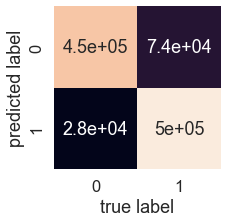

In [245]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, cat_pred):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, cat_pred),
                     annot=True, 
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, cat_pred)
print(confusion_matrix(y_test, cat_pred))

### <a id='4.4.2'>4.4.2 ROC Curve and AUC Scores for the CatBoost model</a>

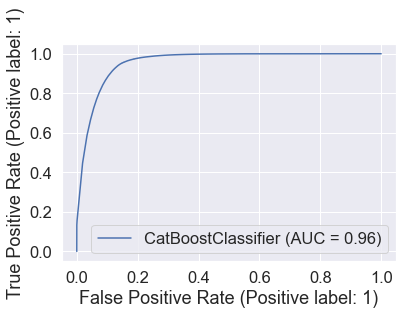

In [246]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(cat, X_test, y_test);

### Tuning the hyperparameter of CatBoostClassifier by hand

In [247]:
catboost = CatBoostClassifier(learning_rate= 0.03,
                              random_seed = 42,
                              depth=8,
                              iterations=30000)

# Fit the model to the training data
catboost.fit(X_train, y_train)

# Score the model on the test data
catboost.score(X_test, y_test)

0:	learn: 0.6610422	total: 1.22s	remaining: 10h 12m 11s
1:	learn: 0.6328888	total: 2.05s	remaining: 8h 33m 26s
2:	learn: 0.6070308	total: 2.91s	remaining: 8h 5m 30s
3:	learn: 0.5821850	total: 4.16s	remaining: 8h 39m 52s
4:	learn: 0.5603017	total: 5s	remaining: 8h 19m 47s
5:	learn: 0.5399641	total: 5.83s	remaining: 8h 5m 40s
6:	learn: 0.5217965	total: 6.64s	remaining: 7h 53m 55s
7:	learn: 0.5055025	total: 7.45s	remaining: 7h 45m 27s
8:	learn: 0.4900218	total: 8.26s	remaining: 7h 38m 42s
9:	learn: 0.4761910	total: 9.05s	remaining: 7h 32m 20s
10:	learn: 0.4636137	total: 9.91s	remaining: 7h 30m 26s
11:	learn: 0.4521985	total: 10.8s	remaining: 7h 30m 2s
12:	learn: 0.4418654	total: 11.6s	remaining: 7h 24m 14s
13:	learn: 0.4321363	total: 12.2s	remaining: 7h 17m 6s
14:	learn: 0.4236295	total: 13s	remaining: 7h 14m 20s
15:	learn: 0.4158354	total: 13.8s	remaining: 7h 12m 21s
16:	learn: 0.4085625	total: 14.6s	remaining: 7h 8m 59s
17:	learn: 0.4018532	total: 15.3s	remaining: 7h 5m 2s
18:	learn: 0.

147:	learn: 0.2802375	total: 2m 5s	remaining: 7h 2m 31s
148:	learn: 0.2799198	total: 2m 6s	remaining: 7h 2m 11s
149:	learn: 0.2798575	total: 2m 7s	remaining: 7h 1m 45s
150:	learn: 0.2794688	total: 2m 7s	remaining: 7h 1m 25s
151:	learn: 0.2792561	total: 2m 8s	remaining: 7h 1m 6s
152:	learn: 0.2791109	total: 2m 9s	remaining: 7h 51s
153:	learn: 0.2789005	total: 2m 10s	remaining: 7h 32s
154:	learn: 0.2788042	total: 2m 10s	remaining: 7h 1s
155:	learn: 0.2786003	total: 2m 11s	remaining: 6h 59m 49s
156:	learn: 0.2784337	total: 2m 12s	remaining: 6h 59m 35s
157:	learn: 0.2782693	total: 2m 13s	remaining: 6h 59m 19s
158:	learn: 0.2781613	total: 2m 13s	remaining: 6h 59m 6s
159:	learn: 0.2778736	total: 2m 14s	remaining: 6h 58m 55s
160:	learn: 0.2777644	total: 2m 15s	remaining: 6h 58m 35s
161:	learn: 0.2776428	total: 2m 16s	remaining: 6h 58m 21s
162:	learn: 0.2775949	total: 2m 17s	remaining: 6h 58m 7s
163:	learn: 0.2774792	total: 2m 17s	remaining: 6h 57m 42s
164:	learn: 0.2773953	total: 2m 18s	remai

290:	learn: 0.2658174	total: 3m 46s	remaining: 6h 24m 35s
291:	learn: 0.2657326	total: 3m 46s	remaining: 6h 24m 33s
292:	learn: 0.2656711	total: 3m 47s	remaining: 6h 24m 30s
293:	learn: 0.2656063	total: 3m 48s	remaining: 6h 24m 34s
294:	learn: 0.2655892	total: 3m 49s	remaining: 6h 24m 27s
295:	learn: 0.2655750	total: 3m 49s	remaining: 6h 24m 27s
296:	learn: 0.2654873	total: 3m 50s	remaining: 6h 24m 25s
297:	learn: 0.2654023	total: 3m 51s	remaining: 6h 24m 21s
298:	learn: 0.2653632	total: 3m 52s	remaining: 6h 24m 16s
299:	learn: 0.2653167	total: 3m 52s	remaining: 6h 24m 13s
300:	learn: 0.2652211	total: 3m 53s	remaining: 6h 24m 10s
301:	learn: 0.2651912	total: 3m 54s	remaining: 6h 24m 3s
302:	learn: 0.2651350	total: 3m 55s	remaining: 6h 24m 6s
303:	learn: 0.2650635	total: 3m 55s	remaining: 6h 24m
304:	learn: 0.2649674	total: 3m 56s	remaining: 6h 23m 59s
305:	learn: 0.2648949	total: 3m 57s	remaining: 6h 24m 2s
306:	learn: 0.2648402	total: 3m 58s	remaining: 6h 24m 7s
307:	learn: 0.2648215	

433:	learn: 0.2600531	total: 5m 33s	remaining: 6h 18m 56s
434:	learn: 0.2600319	total: 5m 34s	remaining: 6h 18m 47s
435:	learn: 0.2599887	total: 5m 35s	remaining: 6h 18m 55s
436:	learn: 0.2599754	total: 5m 36s	remaining: 6h 19m 8s
437:	learn: 0.2599582	total: 5m 37s	remaining: 6h 19m 35s
438:	learn: 0.2599348	total: 5m 38s	remaining: 6h 19m 52s
439:	learn: 0.2599088	total: 5m 39s	remaining: 6h 19m 46s
440:	learn: 0.2598877	total: 5m 39s	remaining: 6h 19m 43s
441:	learn: 0.2598686	total: 5m 40s	remaining: 6h 19m 42s
442:	learn: 0.2598839	total: 5m 41s	remaining: 6h 19m 38s
443:	learn: 0.2598584	total: 5m 42s	remaining: 6h 19m 37s
444:	learn: 0.2598087	total: 5m 42s	remaining: 6h 19m 26s
445:	learn: 0.2597864	total: 5m 43s	remaining: 6h 19m 32s
446:	learn: 0.2597526	total: 5m 44s	remaining: 6h 19m 38s
447:	learn: 0.2597030	total: 5m 45s	remaining: 6h 19m 44s
448:	learn: 0.2596493	total: 5m 46s	remaining: 6h 19m 57s
449:	learn: 0.2596063	total: 5m 47s	remaining: 6h 20m 6s
450:	learn: 0.25

576:	learn: 0.2566416	total: 7m 21s	remaining: 6h 14m 52s
577:	learn: 0.2566171	total: 7m 21s	remaining: 6h 14m 51s
578:	learn: 0.2566113	total: 7m 22s	remaining: 6h 14m 48s
579:	learn: 0.2565548	total: 7m 23s	remaining: 6h 14m 46s
580:	learn: 0.2565157	total: 7m 24s	remaining: 6h 14m 45s
581:	learn: 0.2564898	total: 7m 24s	remaining: 6h 14m 44s
582:	learn: 0.2564805	total: 7m 25s	remaining: 6h 14m 45s
583:	learn: 0.2564714	total: 7m 26s	remaining: 6h 14m 43s
584:	learn: 0.2564626	total: 7m 27s	remaining: 6h 14m 40s
585:	learn: 0.2564446	total: 7m 27s	remaining: 6h 14m 37s
586:	learn: 0.2564224	total: 7m 28s	remaining: 6h 14m 37s
587:	learn: 0.2564108	total: 7m 29s	remaining: 6h 14m 37s
588:	learn: 0.2563941	total: 7m 30s	remaining: 6h 14m 34s
589:	learn: 0.2563832	total: 7m 30s	remaining: 6h 14m 36s
590:	learn: 0.2563610	total: 7m 31s	remaining: 6h 14m 34s
591:	learn: 0.2563543	total: 7m 32s	remaining: 6h 14m 32s
592:	learn: 0.2563282	total: 7m 33s	remaining: 6h 14m 32s
593:	learn: 0.

719:	learn: 0.2540920	total: 9m 5s	remaining: 6h 10m 2s
720:	learn: 0.2540790	total: 9m 6s	remaining: 6h 10m 10s
721:	learn: 0.2540622	total: 9m 7s	remaining: 6h 10m 18s
722:	learn: 0.2540258	total: 9m 8s	remaining: 6h 10m 20s
723:	learn: 0.2540070	total: 9m 9s	remaining: 6h 10m 20s
724:	learn: 0.2539932	total: 9m 10s	remaining: 6h 10m 21s
725:	learn: 0.2539666	total: 9m 10s	remaining: 6h 10m 15s
726:	learn: 0.2539591	total: 9m 11s	remaining: 6h 10m 10s
727:	learn: 0.2539422	total: 9m 12s	remaining: 6h 10m 4s
728:	learn: 0.2539273	total: 9m 12s	remaining: 6h 9m 59s
729:	learn: 0.2539236	total: 9m 13s	remaining: 6h 9m 54s
730:	learn: 0.2539202	total: 9m 14s	remaining: 6h 9m 48s
731:	learn: 0.2539088	total: 9m 14s	remaining: 6h 9m 43s
732:	learn: 0.2538819	total: 9m 15s	remaining: 6h 9m 36s
733:	learn: 0.2538588	total: 9m 16s	remaining: 6h 9m 31s
734:	learn: 0.2538567	total: 9m 16s	remaining: 6h 9m 25s
735:	learn: 0.2538475	total: 9m 17s	remaining: 6h 9m 17s
736:	learn: 0.2538103	total: 

863:	learn: 0.2525762	total: 10m 51s	remaining: 6h 6m 21s
864:	learn: 0.2525659	total: 10m 52s	remaining: 6h 6m 24s
865:	learn: 0.2525646	total: 10m 53s	remaining: 6h 6m 24s
866:	learn: 0.2525549	total: 10m 54s	remaining: 6h 6m 21s
867:	learn: 0.2525590	total: 10m 54s	remaining: 6h 6m 22s
868:	learn: 0.2525534	total: 10m 55s	remaining: 6h 6m 21s
869:	learn: 0.2525466	total: 10m 56s	remaining: 6h 6m 20s
870:	learn: 0.2525417	total: 10m 57s	remaining: 6h 6m 21s
871:	learn: 0.2525383	total: 10m 58s	remaining: 6h 6m 21s
872:	learn: 0.2525335	total: 10m 58s	remaining: 6h 6m 21s
873:	learn: 0.2525245	total: 10m 59s	remaining: 6h 6m 21s
874:	learn: 0.2525241	total: 11m	remaining: 6h 6m 21s
875:	learn: 0.2525191	total: 11m 1s	remaining: 6h 6m 23s
876:	learn: 0.2525153	total: 11m 2s	remaining: 6h 6m 25s
877:	learn: 0.2525060	total: 11m 2s	remaining: 6h 6m 27s
878:	learn: 0.2524920	total: 11m 3s	remaining: 6h 6m 28s
879:	learn: 0.2524853	total: 11m 4s	remaining: 6h 6m 28s
880:	learn: 0.2524747	t

1005:	learn: 0.2514354	total: 12m 34s	remaining: 6h 2m 14s
1006:	learn: 0.2514288	total: 12m 34s	remaining: 6h 2m 10s
1007:	learn: 0.2514156	total: 12m 35s	remaining: 6h 2m 5s
1008:	learn: 0.2514062	total: 12m 35s	remaining: 6h 2m 1s
1009:	learn: 0.2513975	total: 12m 36s	remaining: 6h 1m 59s
1010:	learn: 0.2513900	total: 12m 37s	remaining: 6h 1m 55s
1011:	learn: 0.2513869	total: 12m 37s	remaining: 6h 1m 50s
1012:	learn: 0.2513780	total: 12m 38s	remaining: 6h 1m 46s
1013:	learn: 0.2513710	total: 12m 39s	remaining: 6h 1m 43s
1014:	learn: 0.2513652	total: 12m 39s	remaining: 6h 1m 39s
1015:	learn: 0.2513508	total: 12m 40s	remaining: 6h 1m 37s
1016:	learn: 0.2513471	total: 12m 41s	remaining: 6h 1m 35s
1017:	learn: 0.2513461	total: 12m 41s	remaining: 6h 1m 32s
1018:	learn: 0.2513361	total: 12m 42s	remaining: 6h 1m 31s
1019:	learn: 0.2513333	total: 12m 43s	remaining: 6h 1m 32s
1020:	learn: 0.2513215	total: 12m 44s	remaining: 6h 1m 37s
1021:	learn: 0.2513105	total: 12m 45s	remaining: 6h 1m 44s

1145:	learn: 0.2504475	total: 14m 23s	remaining: 6h 2m 27s
1146:	learn: 0.2504436	total: 14m 24s	remaining: 6h 2m 26s
1147:	learn: 0.2504323	total: 14m 25s	remaining: 6h 2m 25s
1148:	learn: 0.2504251	total: 14m 26s	remaining: 6h 2m 27s
1149:	learn: 0.2504237	total: 14m 26s	remaining: 6h 2m 29s
1150:	learn: 0.2504155	total: 14m 27s	remaining: 6h 2m 28s
1151:	learn: 0.2504099	total: 14m 28s	remaining: 6h 2m 24s
1152:	learn: 0.2504075	total: 14m 28s	remaining: 6h 2m 20s
1153:	learn: 0.2504063	total: 14m 29s	remaining: 6h 2m 16s
1154:	learn: 0.2504019	total: 14m 30s	remaining: 6h 2m 13s
1155:	learn: 0.2503954	total: 14m 30s	remaining: 6h 2m 10s
1156:	learn: 0.2503872	total: 14m 31s	remaining: 6h 2m 6s
1157:	learn: 0.2503836	total: 14m 32s	remaining: 6h 2m 3s
1158:	learn: 0.2503809	total: 14m 32s	remaining: 6h 2m 3s
1159:	learn: 0.2503696	total: 14m 33s	remaining: 6h 2m 8s
1160:	learn: 0.2503635	total: 14m 34s	remaining: 6h 2m 11s
1161:	learn: 0.2503545	total: 14m 35s	remaining: 6h 2m 10s
1

1285:	learn: 0.2496100	total: 15m 58s	remaining: 5h 56m 37s
1286:	learn: 0.2496145	total: 15m 59s	remaining: 5h 56m 36s
1287:	learn: 0.2496126	total: 15m 59s	remaining: 5h 56m 35s
1288:	learn: 0.2496079	total: 16m	remaining: 5h 56m 33s
1289:	learn: 0.2496055	total: 16m 1s	remaining: 5h 56m 31s
1290:	learn: 0.2496004	total: 16m 1s	remaining: 5h 56m 32s
1291:	learn: 0.2495925	total: 16m 2s	remaining: 5h 56m 31s
1292:	learn: 0.2495871	total: 16m 3s	remaining: 5h 56m 30s
1293:	learn: 0.2495844	total: 16m 4s	remaining: 5h 56m 30s
1294:	learn: 0.2495774	total: 16m 4s	remaining: 5h 56m 30s
1295:	learn: 0.2495754	total: 16m 5s	remaining: 5h 56m 28s
1296:	learn: 0.2495677	total: 16m 6s	remaining: 5h 56m 30s
1297:	learn: 0.2495621	total: 16m 7s	remaining: 5h 56m 28s
1298:	learn: 0.2495594	total: 16m 8s	remaining: 5h 56m 28s
1299:	learn: 0.2495532	total: 16m 8s	remaining: 5h 56m 27s
1300:	learn: 0.2495471	total: 16m 9s	remaining: 5h 56m 27s
1301:	learn: 0.2495421	total: 16m 10s	remaining: 5h 56m 

1423:	learn: 0.2490351	total: 17m 41s	remaining: 5h 55m 11s
1424:	learn: 0.2490329	total: 17m 42s	remaining: 5h 55m 7s
1425:	learn: 0.2490269	total: 17m 43s	remaining: 5h 55m 7s
1426:	learn: 0.2490179	total: 17m 44s	remaining: 5h 55m 9s
1427:	learn: 0.2490122	total: 17m 45s	remaining: 5h 55m 9s
1428:	learn: 0.2490111	total: 17m 45s	remaining: 5h 55m 9s
1429:	learn: 0.2490077	total: 17m 46s	remaining: 5h 55m 8s
1430:	learn: 0.2490021	total: 17m 47s	remaining: 5h 55m 8s
1431:	learn: 0.2489908	total: 17m 47s	remaining: 5h 55m 4s
1432:	learn: 0.2489840	total: 17m 48s	remaining: 5h 55m 1s
1433:	learn: 0.2489786	total: 17m 49s	remaining: 5h 55m
1434:	learn: 0.2489763	total: 17m 49s	remaining: 5h 54m 57s
1435:	learn: 0.2489745	total: 17m 50s	remaining: 5h 54m 54s
1436:	learn: 0.2489720	total: 17m 51s	remaining: 5h 54m 51s
1437:	learn: 0.2489656	total: 17m 51s	remaining: 5h 54m 50s
1438:	learn: 0.2489623	total: 17m 52s	remaining: 5h 54m 48s
1439:	learn: 0.2489600	total: 17m 53s	remaining: 5h 5

1561:	learn: 0.2484985	total: 19m 16s	remaining: 5h 50m 54s
1562:	learn: 0.2485020	total: 19m 17s	remaining: 5h 50m 53s
1563:	learn: 0.2485001	total: 19m 17s	remaining: 5h 50m 52s
1564:	learn: 0.2484895	total: 19m 18s	remaining: 5h 50m 52s
1565:	learn: 0.2484881	total: 19m 19s	remaining: 5h 50m 51s
1566:	learn: 0.2484861	total: 19m 20s	remaining: 5h 50m 51s
1567:	learn: 0.2484848	total: 19m 20s	remaining: 5h 50m 50s
1568:	learn: 0.2484795	total: 19m 21s	remaining: 5h 50m 50s
1569:	learn: 0.2484735	total: 19m 22s	remaining: 5h 50m 49s
1570:	learn: 0.2484706	total: 19m 23s	remaining: 5h 50m 49s
1571:	learn: 0.2484661	total: 19m 23s	remaining: 5h 50m 48s
1572:	learn: 0.2484635	total: 19m 24s	remaining: 5h 50m 48s
1573:	learn: 0.2484589	total: 19m 25s	remaining: 5h 50m 48s
1574:	learn: 0.2484634	total: 19m 26s	remaining: 5h 50m 47s
1575:	learn: 0.2484553	total: 19m 26s	remaining: 5h 50m 46s
1576:	learn: 0.2484564	total: 19m 27s	remaining: 5h 50m 45s
1577:	learn: 0.2484547	total: 19m 28s	re

1699:	learn: 0.2480508	total: 20m 57s	remaining: 5h 48m 45s
1700:	learn: 0.2480441	total: 20m 57s	remaining: 5h 48m 43s
1701:	learn: 0.2480407	total: 20m 58s	remaining: 5h 48m 40s
1702:	learn: 0.2480348	total: 20m 58s	remaining: 5h 48m 38s
1703:	learn: 0.2480238	total: 20m 59s	remaining: 5h 48m 36s
1704:	learn: 0.2480203	total: 21m	remaining: 5h 48m 33s
1705:	learn: 0.2480150	total: 21m	remaining: 5h 48m 30s
1706:	learn: 0.2480113	total: 21m 1s	remaining: 5h 48m 28s
1707:	learn: 0.2480071	total: 21m 2s	remaining: 5h 48m 25s
1708:	learn: 0.2480029	total: 21m 2s	remaining: 5h 48m 22s
1709:	learn: 0.2480018	total: 21m 3s	remaining: 5h 48m 20s
1710:	learn: 0.2479988	total: 21m 3s	remaining: 5h 48m 16s
1711:	learn: 0.2479965	total: 21m 4s	remaining: 5h 48m 14s
1712:	learn: 0.2479937	total: 21m 5s	remaining: 5h 48m 12s
1713:	learn: 0.2479932	total: 21m 5s	remaining: 5h 48m 9s
1714:	learn: 0.2479895	total: 21m 6s	remaining: 5h 48m 7s
1715:	learn: 0.2479885	total: 21m 7s	remaining: 5h 48m 5s
1

1837:	learn: 0.2476119	total: 22m 31s	remaining: 5h 45m 6s
1838:	learn: 0.2476098	total: 22m 32s	remaining: 5h 45m 6s
1839:	learn: 0.2476045	total: 22m 33s	remaining: 5h 45m 6s
1840:	learn: 0.2476018	total: 22m 33s	remaining: 5h 45m 5s
1841:	learn: 0.2475983	total: 22m 34s	remaining: 5h 45m 4s
1842:	learn: 0.2475944	total: 22m 35s	remaining: 5h 45m 4s
1843:	learn: 0.2475941	total: 22m 35s	remaining: 5h 45m 2s
1844:	learn: 0.2475922	total: 22m 36s	remaining: 5h 45m 1s
1845:	learn: 0.2475922	total: 22m 37s	remaining: 5h 45m
1846:	learn: 0.2475898	total: 22m 38s	remaining: 5h 45m
1847:	learn: 0.2475858	total: 22m 38s	remaining: 5h 45m
1848:	learn: 0.2475870	total: 22m 39s	remaining: 5h 45m 1s
1849:	learn: 0.2475851	total: 22m 40s	remaining: 5h 45m 1s
1850:	learn: 0.2475830	total: 22m 41s	remaining: 5h 45m 1s
1851:	learn: 0.2475812	total: 22m 41s	remaining: 5h 45m
1852:	learn: 0.2475616	total: 22m 42s	remaining: 5h 44m 59s
1853:	learn: 0.2475781	total: 22m 43s	remaining: 5h 44m 59s
1854:	l

1975:	learn: 0.2472532	total: 24m 13s	remaining: 5h 43m 40s
1976:	learn: 0.2472530	total: 24m 14s	remaining: 5h 43m 39s
1977:	learn: 0.2472511	total: 24m 15s	remaining: 5h 43m 39s
1978:	learn: 0.2472473	total: 24m 16s	remaining: 5h 43m 38s
1979:	learn: 0.2472450	total: 24m 16s	remaining: 5h 43m 37s
1980:	learn: 0.2472430	total: 24m 17s	remaining: 5h 43m 36s
1981:	learn: 0.2472399	total: 24m 18s	remaining: 5h 43m 34s
1982:	learn: 0.2472383	total: 24m 18s	remaining: 5h 43m 32s
1983:	learn: 0.2472341	total: 24m 19s	remaining: 5h 43m 30s
1984:	learn: 0.2472302	total: 24m 20s	remaining: 5h 43m 27s
1985:	learn: 0.2472279	total: 24m 20s	remaining: 5h 43m 26s
1986:	learn: 0.2472262	total: 24m 21s	remaining: 5h 43m 25s
1987:	learn: 0.2472237	total: 24m 22s	remaining: 5h 43m 24s
1988:	learn: 0.2472192	total: 24m 23s	remaining: 5h 43m 24s
1989:	learn: 0.2472167	total: 24m 23s	remaining: 5h 43m 24s
1990:	learn: 0.2472149	total: 24m 24s	remaining: 5h 43m 22s
1991:	learn: 0.2472122	total: 24m 25s	re

2113:	learn: 0.2468615	total: 25m 55s	remaining: 5h 41m 53s
2114:	learn: 0.2468591	total: 25m 55s	remaining: 5h 41m 52s
2115:	learn: 0.2468562	total: 25m 56s	remaining: 5h 41m 52s
2116:	learn: 0.2468551	total: 25m 57s	remaining: 5h 41m 51s
2117:	learn: 0.2468517	total: 25m 58s	remaining: 5h 41m 50s
2118:	learn: 0.2468501	total: 25m 58s	remaining: 5h 41m 49s
2119:	learn: 0.2468443	total: 25m 59s	remaining: 5h 41m 48s
2120:	learn: 0.2468406	total: 26m	remaining: 5h 41m 48s
2121:	learn: 0.2468397	total: 26m 1s	remaining: 5h 41m 48s
2122:	learn: 0.2468363	total: 26m 1s	remaining: 5h 41m 46s
2123:	learn: 0.2468343	total: 26m 2s	remaining: 5h 41m 45s
2124:	learn: 0.2468332	total: 26m 3s	remaining: 5h 41m 44s
2125:	learn: 0.2468295	total: 26m 3s	remaining: 5h 41m 44s
2126:	learn: 0.2468283	total: 26m 4s	remaining: 5h 41m 42s
2127:	learn: 0.2468271	total: 26m 5s	remaining: 5h 41m 41s
2128:	learn: 0.2468255	total: 26m 6s	remaining: 5h 41m 41s
2129:	learn: 0.2468242	total: 26m 6s	remaining: 5h 4

2251:	learn: 0.2465369	total: 27m 31s	remaining: 5h 39m 2s
2252:	learn: 0.2465304	total: 27m 31s	remaining: 5h 39m 1s
2253:	learn: 0.2465261	total: 27m 32s	remaining: 5h 38m 59s
2254:	learn: 0.2465265	total: 27m 32s	remaining: 5h 38m 57s
2255:	learn: 0.2465283	total: 27m 33s	remaining: 5h 38m 55s
2256:	learn: 0.2465257	total: 27m 34s	remaining: 5h 38m 53s
2257:	learn: 0.2465247	total: 27m 34s	remaining: 5h 38m 51s
2258:	learn: 0.2465201	total: 27m 35s	remaining: 5h 38m 49s
2259:	learn: 0.2465286	total: 27m 36s	remaining: 5h 38m 46s
2260:	learn: 0.2465280	total: 27m 36s	remaining: 5h 38m 44s
2261:	learn: 0.2465229	total: 27m 37s	remaining: 5h 38m 42s
2262:	learn: 0.2465224	total: 27m 37s	remaining: 5h 38m 40s
2263:	learn: 0.2465099	total: 27m 38s	remaining: 5h 38m 38s
2264:	learn: 0.2465077	total: 27m 39s	remaining: 5h 38m 36s
2265:	learn: 0.2465061	total: 27m 39s	remaining: 5h 38m 35s
2266:	learn: 0.2465007	total: 27m 40s	remaining: 5h 38m 34s
2267:	learn: 0.2464988	total: 27m 41s	rema

2389:	learn: 0.2462085	total: 29m 13s	remaining: 5h 37m 36s
2390:	learn: 0.2462073	total: 29m 14s	remaining: 5h 37m 36s
2391:	learn: 0.2462059	total: 29m 14s	remaining: 5h 37m 35s
2392:	learn: 0.2462061	total: 29m 15s	remaining: 5h 37m 35s
2393:	learn: 0.2462027	total: 29m 16s	remaining: 5h 37m 34s
2394:	learn: 0.2462004	total: 29m 17s	remaining: 5h 37m 35s
2395:	learn: 0.2461999	total: 29m 18s	remaining: 5h 37m 36s
2396:	learn: 0.2461977	total: 29m 19s	remaining: 5h 37m 37s
2397:	learn: 0.2461959	total: 29m 20s	remaining: 5h 37m 39s
2398:	learn: 0.2461945	total: 29m 20s	remaining: 5h 37m 40s
2399:	learn: 0.2461930	total: 29m 21s	remaining: 5h 37m 41s
2400:	learn: 0.2461922	total: 29m 22s	remaining: 5h 37m 44s
2401:	learn: 0.2461912	total: 29m 23s	remaining: 5h 37m 45s
2402:	learn: 0.2461849	total: 29m 24s	remaining: 5h 37m 45s
2403:	learn: 0.2461818	total: 29m 25s	remaining: 5h 37m 47s
2404:	learn: 0.2461783	total: 29m 26s	remaining: 5h 37m 50s
2405:	learn: 0.2461736	total: 29m 27s	re

2527:	learn: 0.2458986	total: 30m 48s	remaining: 5h 34m 52s
2528:	learn: 0.2458945	total: 30m 49s	remaining: 5h 34m 52s
2529:	learn: 0.2458931	total: 30m 50s	remaining: 5h 34m 51s
2530:	learn: 0.2458923	total: 30m 51s	remaining: 5h 34m 51s
2531:	learn: 0.2458890	total: 30m 51s	remaining: 5h 34m 50s
2532:	learn: 0.2458873	total: 30m 52s	remaining: 5h 34m 49s
2533:	learn: 0.2458855	total: 30m 53s	remaining: 5h 34m 49s
2534:	learn: 0.2458843	total: 30m 54s	remaining: 5h 34m 49s
2535:	learn: 0.2458820	total: 30m 54s	remaining: 5h 34m 48s
2536:	learn: 0.2458813	total: 30m 55s	remaining: 5h 34m 47s
2537:	learn: 0.2458795	total: 30m 56s	remaining: 5h 34m 47s
2538:	learn: 0.2458766	total: 30m 57s	remaining: 5h 34m 47s
2539:	learn: 0.2458724	total: 30m 58s	remaining: 5h 34m 47s
2540:	learn: 0.2458707	total: 30m 58s	remaining: 5h 34m 47s
2541:	learn: 0.2458726	total: 30m 59s	remaining: 5h 34m 48s
2542:	learn: 0.2458710	total: 31m	remaining: 5h 34m 48s
2543:	learn: 0.2458704	total: 31m 1s	remaini

2665:	learn: 0.2456100	total: 32m 35s	remaining: 5h 34m 14s
2666:	learn: 0.2456091	total: 32m 36s	remaining: 5h 34m 13s
2667:	learn: 0.2456066	total: 32m 37s	remaining: 5h 34m 12s
2668:	learn: 0.2456053	total: 32m 38s	remaining: 5h 34m 10s
2669:	learn: 0.2456039	total: 32m 38s	remaining: 5h 34m 8s
2670:	learn: 0.2456037	total: 32m 39s	remaining: 5h 34m 7s
2671:	learn: 0.2455994	total: 32m 40s	remaining: 5h 34m 6s
2672:	learn: 0.2455973	total: 32m 40s	remaining: 5h 34m 5s
2673:	learn: 0.2455940	total: 32m 41s	remaining: 5h 34m 3s
2674:	learn: 0.2455927	total: 32m 42s	remaining: 5h 34m 2s
2675:	learn: 0.2455914	total: 32m 42s	remaining: 5h 34m 1s
2676:	learn: 0.2455878	total: 32m 43s	remaining: 5h 34m 1s
2677:	learn: 0.2455875	total: 32m 44s	remaining: 5h 34m 1s
2678:	learn: 0.2455859	total: 32m 45s	remaining: 5h 34m 2s
2679:	learn: 0.2455859	total: 32m 46s	remaining: 5h 34m 1s
2680:	learn: 0.2455833	total: 32m 46s	remaining: 5h 34m
2681:	learn: 0.2455813	total: 32m 47s	remaining: 5h 33m

2803:	learn: 0.2453433	total: 34m 8s	remaining: 5h 31m 8s
2804:	learn: 0.2453426	total: 34m 9s	remaining: 5h 31m 7s
2805:	learn: 0.2453392	total: 34m 9s	remaining: 5h 31m 7s
2806:	learn: 0.2453382	total: 34m 10s	remaining: 5h 31m 6s
2807:	learn: 0.2453374	total: 34m 11s	remaining: 5h 31m 6s
2808:	learn: 0.2453349	total: 34m 12s	remaining: 5h 31m 5s
2809:	learn: 0.2453279	total: 34m 12s	remaining: 5h 31m 4s
2810:	learn: 0.2453252	total: 34m 13s	remaining: 5h 31m 4s
2811:	learn: 0.2453227	total: 34m 14s	remaining: 5h 31m 4s
2812:	learn: 0.2453203	total: 34m 15s	remaining: 5h 31m 3s
2813:	learn: 0.2453189	total: 34m 16s	remaining: 5h 31m 3s
2814:	learn: 0.2453162	total: 34m 16s	remaining: 5h 31m 3s
2815:	learn: 0.2453149	total: 34m 17s	remaining: 5h 31m 2s
2816:	learn: 0.2453145	total: 34m 18s	remaining: 5h 31m 1s
2817:	learn: 0.2453107	total: 34m 18s	remaining: 5h 31m
2818:	learn: 0.2453110	total: 34m 19s	remaining: 5h 30m 59s
2819:	learn: 0.2453098	total: 34m 20s	remaining: 5h 30m 58s
2

2941:	learn: 0.2450733	total: 35m 50s	remaining: 5h 29m 37s
2942:	learn: 0.2450720	total: 35m 50s	remaining: 5h 29m 35s
2943:	learn: 0.2450705	total: 35m 51s	remaining: 5h 29m 33s
2944:	learn: 0.2450692	total: 35m 52s	remaining: 5h 29m 31s
2945:	learn: 0.2450669	total: 35m 52s	remaining: 5h 29m 30s
2946:	learn: 0.2450641	total: 35m 53s	remaining: 5h 29m 29s
2947:	learn: 0.2450641	total: 35m 53s	remaining: 5h 29m 24s
2948:	learn: 0.2450626	total: 35m 54s	remaining: 5h 29m 23s
2949:	learn: 0.2450610	total: 35m 55s	remaining: 5h 29m 20s
2950:	learn: 0.2450591	total: 35m 55s	remaining: 5h 29m 19s
2951:	learn: 0.2450577	total: 35m 56s	remaining: 5h 29m 17s
2952:	learn: 0.2450551	total: 35m 56s	remaining: 5h 29m 15s
2953:	learn: 0.2450535	total: 35m 57s	remaining: 5h 29m 13s
2954:	learn: 0.2450533	total: 35m 58s	remaining: 5h 29m 12s
2955:	learn: 0.2450516	total: 35m 58s	remaining: 5h 29m 10s
2956:	learn: 0.2450495	total: 35m 59s	remaining: 5h 29m 8s
2957:	learn: 0.2450483	total: 35m 59s	rem

3079:	learn: 0.2448319	total: 37m 23s	remaining: 5h 26m 50s
3080:	learn: 0.2448309	total: 37m 24s	remaining: 5h 26m 50s
3081:	learn: 0.2448304	total: 37m 25s	remaining: 5h 26m 50s
3082:	learn: 0.2448287	total: 37m 26s	remaining: 5h 26m 50s
3083:	learn: 0.2448269	total: 37m 26s	remaining: 5h 26m 49s
3084:	learn: 0.2448273	total: 37m 27s	remaining: 5h 26m 49s
3085:	learn: 0.2448268	total: 37m 28s	remaining: 5h 26m 49s
3086:	learn: 0.2448244	total: 37m 29s	remaining: 5h 26m 49s
3087:	learn: 0.2448237	total: 37m 29s	remaining: 5h 26m 48s
3088:	learn: 0.2448228	total: 37m 30s	remaining: 5h 26m 47s
3089:	learn: 0.2448206	total: 37m 31s	remaining: 5h 26m 46s
3090:	learn: 0.2448181	total: 37m 32s	remaining: 5h 26m 46s
3091:	learn: 0.2448145	total: 37m 32s	remaining: 5h 26m 46s
3092:	learn: 0.2448143	total: 37m 33s	remaining: 5h 26m 45s
3093:	learn: 0.2448147	total: 37m 34s	remaining: 5h 26m 44s
3094:	learn: 0.2448129	total: 37m 35s	remaining: 5h 26m 43s
3095:	learn: 0.2448099	total: 37m 35s	re

3217:	learn: 0.2446041	total: 39m 4s	remaining: 5h 25m 14s
3218:	learn: 0.2446017	total: 39m 5s	remaining: 5h 25m 13s
3219:	learn: 0.2446009	total: 39m 6s	remaining: 5h 25m 11s
3220:	learn: 0.2445987	total: 39m 6s	remaining: 5h 25m 9s
3221:	learn: 0.2445975	total: 39m 7s	remaining: 5h 25m 8s
3222:	learn: 0.2445962	total: 39m 7s	remaining: 5h 25m 6s
3223:	learn: 0.2445960	total: 39m 8s	remaining: 5h 25m 3s
3224:	learn: 0.2445944	total: 39m 9s	remaining: 5h 25m 2s
3225:	learn: 0.2445940	total: 39m 9s	remaining: 5h 25m
3226:	learn: 0.2445909	total: 39m 10s	remaining: 5h 24m 58s
3227:	learn: 0.2445883	total: 39m 10s	remaining: 5h 24m 57s
3228:	learn: 0.2445863	total: 39m 11s	remaining: 5h 24m 55s
3229:	learn: 0.2445834	total: 39m 12s	remaining: 5h 24m 55s
3230:	learn: 0.2445823	total: 39m 12s	remaining: 5h 24m 53s
3231:	learn: 0.2445820	total: 39m 13s	remaining: 5h 24m 51s
3232:	learn: 0.2445798	total: 39m 14s	remaining: 5h 24m 49s
3233:	learn: 0.2445804	total: 39m 14s	remaining: 5h 24m 48

3355:	learn: 0.2443598	total: 40m 39s	remaining: 5h 22m 51s
3356:	learn: 0.2443549	total: 40m 40s	remaining: 5h 22m 51s
3357:	learn: 0.2443534	total: 40m 41s	remaining: 5h 22m 51s
3358:	learn: 0.2443522	total: 40m 42s	remaining: 5h 22m 50s
3359:	learn: 0.2443504	total: 40m 43s	remaining: 5h 22m 50s
3360:	learn: 0.2443491	total: 40m 43s	remaining: 5h 22m 49s
3361:	learn: 0.2443504	total: 40m 44s	remaining: 5h 22m 48s
3362:	learn: 0.2443470	total: 40m 45s	remaining: 5h 22m 47s
3363:	learn: 0.2443442	total: 40m 45s	remaining: 5h 22m 46s
3364:	learn: 0.2443420	total: 40m 46s	remaining: 5h 22m 46s
3365:	learn: 0.2443418	total: 40m 47s	remaining: 5h 22m 45s
3366:	learn: 0.2443402	total: 40m 48s	remaining: 5h 22m 45s
3367:	learn: 0.2443379	total: 40m 48s	remaining: 5h 22m 45s
3368:	learn: 0.2443364	total: 40m 49s	remaining: 5h 22m 44s
3369:	learn: 0.2443340	total: 40m 50s	remaining: 5h 22m 44s
3370:	learn: 0.2443324	total: 40m 51s	remaining: 5h 22m 43s
3371:	learn: 0.2443306	total: 40m 52s	re

3493:	learn: 0.2441343	total: 42m 17s	remaining: 5h 20m 50s
3494:	learn: 0.2441335	total: 42m 18s	remaining: 5h 20m 49s
3495:	learn: 0.2441319	total: 42m 18s	remaining: 5h 20m 47s
3496:	learn: 0.2441267	total: 42m 19s	remaining: 5h 20m 45s
3497:	learn: 0.2441275	total: 42m 20s	remaining: 5h 20m 44s
3498:	learn: 0.2441273	total: 42m 20s	remaining: 5h 20m 42s
3499:	learn: 0.2441271	total: 42m 21s	remaining: 5h 20m 40s
3500:	learn: 0.2441260	total: 42m 21s	remaining: 5h 20m 39s
3501:	learn: 0.2441227	total: 42m 22s	remaining: 5h 20m 37s
3502:	learn: 0.2441219	total: 42m 23s	remaining: 5h 20m 35s
3503:	learn: 0.2441203	total: 42m 23s	remaining: 5h 20m 34s
3504:	learn: 0.2441203	total: 42m 24s	remaining: 5h 20m 32s
3505:	learn: 0.2441203	total: 42m 24s	remaining: 5h 20m 30s
3506:	learn: 0.2441183	total: 42m 25s	remaining: 5h 20m 28s
3507:	learn: 0.2441158	total: 42m 26s	remaining: 5h 20m 27s
3508:	learn: 0.2441145	total: 42m 26s	remaining: 5h 20m 26s
3509:	learn: 0.2441141	total: 42m 27s	re

3631:	learn: 0.2439145	total: 43m 57s	remaining: 5h 19m 9s
3632:	learn: 0.2439182	total: 43m 58s	remaining: 5h 19m 8s
3633:	learn: 0.2439166	total: 43m 59s	remaining: 5h 19m 7s
3634:	learn: 0.2439146	total: 43m 59s	remaining: 5h 19m 6s
3635:	learn: 0.2439137	total: 44m	remaining: 5h 19m 5s
3636:	learn: 0.2439116	total: 44m 1s	remaining: 5h 19m 4s
3637:	learn: 0.2439120	total: 44m 1s	remaining: 5h 19m 4s
3638:	learn: 0.2439077	total: 44m 2s	remaining: 5h 19m 3s
3639:	learn: 0.2439075	total: 44m 3s	remaining: 5h 19m 3s
3640:	learn: 0.2439070	total: 44m 4s	remaining: 5h 19m 1s
3641:	learn: 0.2439060	total: 44m 4s	remaining: 5h 19m 1s
3642:	learn: 0.2439063	total: 44m 5s	remaining: 5h 19m
3643:	learn: 0.2439035	total: 44m 6s	remaining: 5h 18m 59s
3644:	learn: 0.2439056	total: 44m 6s	remaining: 5h 18m 58s
3645:	learn: 0.2439052	total: 44m 7s	remaining: 5h 18m 57s
3646:	learn: 0.2439028	total: 44m 8s	remaining: 5h 18m 56s
3647:	learn: 0.2439026	total: 44m 8s	remaining: 5h 18m 55s
3648:	learn

3769:	learn: 0.2437129	total: 45m 30s	remaining: 5h 16m 36s
3770:	learn: 0.2437102	total: 45m 30s	remaining: 5h 16m 34s
3771:	learn: 0.2437087	total: 45m 31s	remaining: 5h 16m 32s
3772:	learn: 0.2437036	total: 45m 32s	remaining: 5h 16m 31s
3773:	learn: 0.2437029	total: 45m 32s	remaining: 5h 16m 30s
3774:	learn: 0.2437005	total: 45m 33s	remaining: 5h 16m 28s
3775:	learn: 0.2436997	total: 45m 34s	remaining: 5h 16m 27s
3776:	learn: 0.2436988	total: 45m 34s	remaining: 5h 16m 26s
3777:	learn: 0.2436975	total: 45m 35s	remaining: 5h 16m 25s
3778:	learn: 0.2436960	total: 45m 35s	remaining: 5h 16m 23s
3779:	learn: 0.2436942	total: 45m 36s	remaining: 5h 16m 22s
3780:	learn: 0.2436926	total: 45m 37s	remaining: 5h 16m 21s
3781:	learn: 0.2436910	total: 45m 37s	remaining: 5h 16m 20s
3782:	learn: 0.2436888	total: 45m 38s	remaining: 5h 16m 18s
3783:	learn: 0.2436871	total: 45m 39s	remaining: 5h 16m 16s
3784:	learn: 0.2436862	total: 45m 39s	remaining: 5h 16m 15s
3785:	learn: 0.2436850	total: 45m 40s	re

3907:	learn: 0.2434996	total: 47m 10s	remaining: 5h 15m
3908:	learn: 0.2434995	total: 47m 11s	remaining: 5h 15m
3909:	learn: 0.2434985	total: 47m 12s	remaining: 5h 14m 59s
3910:	learn: 0.2434976	total: 47m 13s	remaining: 5h 14m 59s
3911:	learn: 0.2434959	total: 47m 14s	remaining: 5h 14m 59s
3912:	learn: 0.2434947	total: 47m 14s	remaining: 5h 14m 58s
3913:	learn: 0.2434912	total: 47m 15s	remaining: 5h 14m 58s
3914:	learn: 0.2434883	total: 47m 16s	remaining: 5h 14m 57s
3915:	learn: 0.2434830	total: 47m 17s	remaining: 5h 14m 57s
3916:	learn: 0.2434807	total: 47m 17s	remaining: 5h 14m 57s
3917:	learn: 0.2434797	total: 47m 18s	remaining: 5h 14m 57s
3918:	learn: 0.2434811	total: 47m 19s	remaining: 5h 14m 56s
3919:	learn: 0.2434794	total: 47m 20s	remaining: 5h 14m 56s
3920:	learn: 0.2434772	total: 47m 21s	remaining: 5h 14m 56s
3921:	learn: 0.2434758	total: 47m 21s	remaining: 5h 14m 55s
3922:	learn: 0.2434749	total: 47m 22s	remaining: 5h 14m 55s
3923:	learn: 0.2434753	total: 47m 23s	remaining:

4045:	learn: 0.2433114	total: 48m 42s	remaining: 5h 12m 28s
4046:	learn: 0.2433104	total: 48m 43s	remaining: 5h 12m 27s
4047:	learn: 0.2433085	total: 48m 44s	remaining: 5h 12m 27s
4048:	learn: 0.2433081	total: 48m 44s	remaining: 5h 12m 26s
4049:	learn: 0.2433070	total: 48m 45s	remaining: 5h 12m 25s
4050:	learn: 0.2433066	total: 48m 46s	remaining: 5h 12m 25s
4051:	learn: 0.2433060	total: 48m 47s	remaining: 5h 12m 25s
4052:	learn: 0.2433051	total: 48m 47s	remaining: 5h 12m 23s
4053:	learn: 0.2433040	total: 48m 48s	remaining: 5h 12m 23s
4054:	learn: 0.2433010	total: 48m 49s	remaining: 5h 12m 23s
4055:	learn: 0.2433005	total: 48m 50s	remaining: 5h 12m 22s
4056:	learn: 0.2432999	total: 48m 50s	remaining: 5h 12m 21s
4057:	learn: 0.2432994	total: 48m 51s	remaining: 5h 12m 21s
4058:	learn: 0.2432986	total: 48m 52s	remaining: 5h 12m 20s
4059:	learn: 0.2432960	total: 48m 53s	remaining: 5h 12m 19s
4060:	learn: 0.2432952	total: 48m 53s	remaining: 5h 12m 19s
4061:	learn: 0.2432926	total: 48m 54s	re

4183:	learn: 0.2431272	total: 50m 25s	remaining: 5h 11m 10s
4184:	learn: 0.2431258	total: 50m 26s	remaining: 5h 11m 10s
4185:	learn: 0.2431227	total: 50m 27s	remaining: 5h 11m 10s
4186:	learn: 0.2431222	total: 50m 28s	remaining: 5h 11m 10s
4187:	learn: 0.2431205	total: 50m 28s	remaining: 5h 11m 8s
4188:	learn: 0.2431197	total: 50m 29s	remaining: 5h 11m 7s
4189:	learn: 0.2431188	total: 50m 30s	remaining: 5h 11m 5s
4190:	learn: 0.2431172	total: 50m 30s	remaining: 5h 11m 4s
4191:	learn: 0.2431167	total: 50m 31s	remaining: 5h 11m 2s
4192:	learn: 0.2431146	total: 50m 32s	remaining: 5h 11m 1s
4193:	learn: 0.2431140	total: 50m 32s	remaining: 5h 11m
4194:	learn: 0.2431124	total: 50m 33s	remaining: 5h 10m 59s
4195:	learn: 0.2431100	total: 50m 34s	remaining: 5h 11m
4196:	learn: 0.2431096	total: 50m 35s	remaining: 5h 11m 1s
4197:	learn: 0.2431074	total: 50m 36s	remaining: 5h 11m
4198:	learn: 0.2431066	total: 50m 36s	remaining: 5h 11m
4199:	learn: 0.2431056	total: 50m 37s	remaining: 5h 10m 58s
420

4322:	learn: 0.2429461	total: 51m 56s	remaining: 5h 8m 33s
4323:	learn: 0.2429450	total: 51m 57s	remaining: 5h 8m 32s
4324:	learn: 0.2429441	total: 51m 58s	remaining: 5h 8m 31s
4325:	learn: 0.2429435	total: 51m 59s	remaining: 5h 8m 31s
4326:	learn: 0.2429449	total: 51m 59s	remaining: 5h 8m 30s
4327:	learn: 0.2429402	total: 52m	remaining: 5h 8m 30s
4328:	learn: 0.2429393	total: 52m 1s	remaining: 5h 8m 29s
4329:	learn: 0.2429379	total: 52m 2s	remaining: 5h 8m 28s
4330:	learn: 0.2429362	total: 52m 2s	remaining: 5h 8m 27s
4331:	learn: 0.2429348	total: 52m 3s	remaining: 5h 8m 27s
4332:	learn: 0.2429338	total: 52m 4s	remaining: 5h 8m 26s
4333:	learn: 0.2429304	total: 52m 4s	remaining: 5h 8m 25s
4334:	learn: 0.2429273	total: 52m 5s	remaining: 5h 8m 24s
4335:	learn: 0.2429300	total: 52m 6s	remaining: 5h 8m 23s
4336:	learn: 0.2429284	total: 52m 7s	remaining: 5h 8m 23s
4337:	learn: 0.2429277	total: 52m 7s	remaining: 5h 8m 22s
4338:	learn: 0.2429236	total: 52m 8s	remaining: 5h 8m 22s
4339:	learn:

4462:	learn: 0.2427470	total: 53m 39s	remaining: 5h 7m 4s
4463:	learn: 0.2427449	total: 53m 40s	remaining: 5h 7m 3s
4464:	learn: 0.2427431	total: 53m 41s	remaining: 5h 7m 2s
4465:	learn: 0.2427443	total: 53m 41s	remaining: 5h 7m 1s
4466:	learn: 0.2427425	total: 53m 42s	remaining: 5h 6m 59s
4467:	learn: 0.2427377	total: 53m 43s	remaining: 5h 6m 58s
4468:	learn: 0.2427371	total: 53m 43s	remaining: 5h 6m 57s
4469:	learn: 0.2427357	total: 53m 44s	remaining: 5h 6m 57s
4470:	learn: 0.2427331	total: 53m 45s	remaining: 5h 6m 56s
4471:	learn: 0.2427316	total: 53m 46s	remaining: 5h 6m 56s
4472:	learn: 0.2427304	total: 53m 47s	remaining: 5h 6m 56s
4473:	learn: 0.2427292	total: 53m 47s	remaining: 5h 6m 55s
4474:	learn: 0.2427281	total: 53m 48s	remaining: 5h 6m 55s
4475:	learn: 0.2427271	total: 53m 49s	remaining: 5h 6m 53s
4476:	learn: 0.2427262	total: 53m 49s	remaining: 5h 6m 52s
4477:	learn: 0.2427258	total: 53m 50s	remaining: 5h 6m 51s
4478:	learn: 0.2427231	total: 53m 50s	remaining: 5h 6m 49s
4

4603:	learn: 0.2425746	total: 55m 14s	remaining: 5h 4m 44s
4604:	learn: 0.2425734	total: 55m 15s	remaining: 5h 4m 43s
4605:	learn: 0.2425727	total: 55m 16s	remaining: 5h 4m 43s
4606:	learn: 0.2425721	total: 55m 16s	remaining: 5h 4m 42s
4607:	learn: 0.2425692	total: 55m 17s	remaining: 5h 4m 42s
4608:	learn: 0.2425678	total: 55m 18s	remaining: 5h 4m 42s
4609:	learn: 0.2425665	total: 55m 19s	remaining: 5h 4m 42s
4610:	learn: 0.2425651	total: 55m 20s	remaining: 5h 4m 42s
4611:	learn: 0.2425598	total: 55m 21s	remaining: 5h 4m 43s
4612:	learn: 0.2425583	total: 55m 22s	remaining: 5h 4m 44s
4613:	learn: 0.2425549	total: 55m 23s	remaining: 5h 4m 43s
4614:	learn: 0.2425534	total: 55m 23s	remaining: 5h 4m 43s
4615:	learn: 0.2425526	total: 55m 24s	remaining: 5h 4m 43s
4616:	learn: 0.2425507	total: 55m 25s	remaining: 5h 4m 43s
4617:	learn: 0.2425491	total: 55m 26s	remaining: 5h 4m 44s
4618:	learn: 0.2425478	total: 55m 27s	remaining: 5h 4m 44s
4619:	learn: 0.2425480	total: 55m 28s	remaining: 5h 4m 4

4743:	learn: 0.2423850	total: 57m 3s	remaining: 5h 3m 48s
4744:	learn: 0.2423826	total: 57m 4s	remaining: 5h 3m 47s
4745:	learn: 0.2423813	total: 57m 5s	remaining: 5h 3m 46s
4746:	learn: 0.2423802	total: 57m 5s	remaining: 5h 3m 45s
4747:	learn: 0.2423784	total: 57m 6s	remaining: 5h 3m 43s
4748:	learn: 0.2423776	total: 57m 7s	remaining: 5h 3m 42s
4749:	learn: 0.2423753	total: 57m 7s	remaining: 5h 3m 41s
4750:	learn: 0.2423739	total: 57m 8s	remaining: 5h 3m 40s
4751:	learn: 0.2423730	total: 57m 9s	remaining: 5h 3m 39s
4752:	learn: 0.2423720	total: 57m 9s	remaining: 5h 3m 38s
4753:	learn: 0.2423706	total: 57m 10s	remaining: 5h 3m 37s
4754:	learn: 0.2423689	total: 57m 11s	remaining: 5h 3m 36s
4755:	learn: 0.2423683	total: 57m 11s	remaining: 5h 3m 35s
4756:	learn: 0.2423661	total: 57m 12s	remaining: 5h 3m 34s
4757:	learn: 0.2423653	total: 57m 13s	remaining: 5h 3m 33s
4758:	learn: 0.2423644	total: 57m 13s	remaining: 5h 3m 32s
4759:	learn: 0.2423621	total: 57m 14s	remaining: 5h 3m 30s
4760:	l

4883:	learn: 0.2421939	total: 58m 41s	remaining: 5h 1m 47s
4884:	learn: 0.2421945	total: 58m 41s	remaining: 5h 1m 46s
4885:	learn: 0.2421936	total: 58m 42s	remaining: 5h 1m 45s
4886:	learn: 0.2421906	total: 58m 43s	remaining: 5h 1m 45s
4887:	learn: 0.2421911	total: 58m 44s	remaining: 5h 1m 44s
4888:	learn: 0.2421902	total: 58m 44s	remaining: 5h 1m 44s
4889:	learn: 0.2421884	total: 58m 45s	remaining: 5h 1m 43s
4890:	learn: 0.2421863	total: 58m 46s	remaining: 5h 1m 42s
4891:	learn: 0.2421847	total: 58m 47s	remaining: 5h 1m 42s
4892:	learn: 0.2421823	total: 58m 47s	remaining: 5h 1m 41s
4893:	learn: 0.2421808	total: 58m 48s	remaining: 5h 1m 41s
4894:	learn: 0.2421791	total: 58m 49s	remaining: 5h 1m 40s
4895:	learn: 0.2421784	total: 58m 50s	remaining: 5h 1m 40s
4896:	learn: 0.2421777	total: 58m 50s	remaining: 5h 1m 40s
4897:	learn: 0.2421754	total: 58m 51s	remaining: 5h 1m 39s
4898:	learn: 0.2421743	total: 58m 52s	remaining: 5h 1m 38s
4899:	learn: 0.2421741	total: 58m 53s	remaining: 5h 1m 3

5027:	learn: 0.2419980	total: 1h 21s	remaining: 4h 59m 44s
5028:	learn: 0.2419969	total: 1h 21s	remaining: 4h 59m 42s
5029:	learn: 0.2419973	total: 1h 22s	remaining: 4h 59m 41s
5030:	learn: 0.2419946	total: 1h 22s	remaining: 4h 59m 40s
5031:	learn: 0.2419930	total: 1h 23s	remaining: 4h 59m 39s
5032:	learn: 0.2419934	total: 1h 24s	remaining: 4h 59m 37s
5033:	learn: 0.2419915	total: 1h 24s	remaining: 4h 59m 36s
5034:	learn: 0.2419910	total: 1h 25s	remaining: 4h 59m 35s
5035:	learn: 0.2419899	total: 1h 25s	remaining: 4h 59m 34s
5036:	learn: 0.2419884	total: 1h 26s	remaining: 4h 59m 33s
5037:	learn: 0.2419885	total: 1h 26s	remaining: 4h 59m 30s
5038:	learn: 0.2419866	total: 1h 27s	remaining: 4h 59m 29s
5039:	learn: 0.2419860	total: 1h 28s	remaining: 4h 59m 28s
5040:	learn: 0.2419855	total: 1h 28s	remaining: 4h 59m 27s
5041:	learn: 0.2419849	total: 1h 29s	remaining: 4h 59m 25s
5042:	learn: 0.2419822	total: 1h 30s	remaining: 4h 59m 24s
5043:	learn: 0.2419817	total: 1h 30s	remaining: 4h 59m 2

5163:	learn: 0.2418395	total: 1h 1m 56s	remaining: 4h 57m 54s
5164:	learn: 0.2418402	total: 1h 1m 57s	remaining: 4h 57m 53s
5165:	learn: 0.2418395	total: 1h 1m 58s	remaining: 4h 57m 53s
5166:	learn: 0.2418378	total: 1h 1m 58s	remaining: 4h 57m 52s
5167:	learn: 0.2418362	total: 1h 1m 59s	remaining: 4h 57m 51s
5168:	learn: 0.2418339	total: 1h 2m	remaining: 4h 57m 51s
5169:	learn: 0.2418327	total: 1h 2m	remaining: 4h 57m 50s
5170:	learn: 0.2418311	total: 1h 2m 1s	remaining: 4h 57m 50s
5171:	learn: 0.2418303	total: 1h 2m 2s	remaining: 4h 57m 49s
5172:	learn: 0.2418293	total: 1h 2m 3s	remaining: 4h 57m 48s
5173:	learn: 0.2418279	total: 1h 2m 3s	remaining: 4h 57m 48s
5174:	learn: 0.2418283	total: 1h 2m 4s	remaining: 4h 57m 47s
5175:	learn: 0.2418265	total: 1h 2m 5s	remaining: 4h 57m 46s
5176:	learn: 0.2418245	total: 1h 2m 6s	remaining: 4h 57m 46s
5177:	learn: 0.2418244	total: 1h 2m 6s	remaining: 4h 57m 45s
5178:	learn: 0.2418243	total: 1h 2m 7s	remaining: 4h 57m 44s
5179:	learn: 0.2418238	to

5297:	learn: 0.2416757	total: 1h 3m 28s	remaining: 4h 55m 55s
5298:	learn: 0.2416719	total: 1h 3m 28s	remaining: 4h 55m 54s
5299:	learn: 0.2416721	total: 1h 3m 29s	remaining: 4h 55m 53s
5300:	learn: 0.2416686	total: 1h 3m 29s	remaining: 4h 55m 51s
5301:	learn: 0.2416669	total: 1h 3m 30s	remaining: 4h 55m 50s
5302:	learn: 0.2416663	total: 1h 3m 31s	remaining: 4h 55m 49s
5303:	learn: 0.2416640	total: 1h 3m 31s	remaining: 4h 55m 48s
5304:	learn: 0.2416626	total: 1h 3m 32s	remaining: 4h 55m 47s
5305:	learn: 0.2416626	total: 1h 3m 33s	remaining: 4h 55m 45s
5306:	learn: 0.2416602	total: 1h 3m 33s	remaining: 4h 55m 44s
5307:	learn: 0.2416585	total: 1h 3m 34s	remaining: 4h 55m 43s
5308:	learn: 0.2416576	total: 1h 3m 34s	remaining: 4h 55m 42s
5309:	learn: 0.2416583	total: 1h 3m 35s	remaining: 4h 55m 41s
5310:	learn: 0.2416567	total: 1h 3m 36s	remaining: 4h 55m 39s
5311:	learn: 0.2416555	total: 1h 3m 36s	remaining: 4h 55m 38s
5312:	learn: 0.2416552	total: 1h 3m 37s	remaining: 4h 55m 37s
5313:	le

5430:	learn: 0.2415075	total: 1h 5m 4s	remaining: 4h 54m 23s
5431:	learn: 0.2415057	total: 1h 5m 5s	remaining: 4h 54m 23s
5432:	learn: 0.2415034	total: 1h 5m 6s	remaining: 4h 54m 22s
5433:	learn: 0.2415022	total: 1h 5m 6s	remaining: 4h 54m 22s
5434:	learn: 0.2415013	total: 1h 5m 7s	remaining: 4h 54m 21s
5435:	learn: 0.2414998	total: 1h 5m 8s	remaining: 4h 54m 21s
5436:	learn: 0.2415003	total: 1h 5m 9s	remaining: 4h 54m 20s
5437:	learn: 0.2414967	total: 1h 5m 9s	remaining: 4h 54m 19s
5438:	learn: 0.2414939	total: 1h 5m 10s	remaining: 4h 54m 19s
5439:	learn: 0.2414929	total: 1h 5m 11s	remaining: 4h 54m 18s
5440:	learn: 0.2414918	total: 1h 5m 12s	remaining: 4h 54m 17s
5441:	learn: 0.2414913	total: 1h 5m 12s	remaining: 4h 54m 16s
5442:	learn: 0.2414899	total: 1h 5m 13s	remaining: 4h 54m 16s
5443:	learn: 0.2414886	total: 1h 5m 14s	remaining: 4h 54m 15s
5444:	learn: 0.2414879	total: 1h 5m 14s	remaining: 4h 54m 15s
5445:	learn: 0.2414869	total: 1h 5m 15s	remaining: 4h 54m 14s
5446:	learn: 0.2

5564:	learn: 0.2413396	total: 1h 6m 35s	remaining: 4h 52m 21s
5565:	learn: 0.2413391	total: 1h 6m 35s	remaining: 4h 52m 20s
5566:	learn: 0.2413385	total: 1h 6m 36s	remaining: 4h 52m 19s
5567:	learn: 0.2413372	total: 1h 6m 36s	remaining: 4h 52m 18s
5568:	learn: 0.2413362	total: 1h 6m 37s	remaining: 4h 52m 17s
5569:	learn: 0.2413331	total: 1h 6m 38s	remaining: 4h 52m 16s
5570:	learn: 0.2413318	total: 1h 6m 38s	remaining: 4h 52m 14s
5571:	learn: 0.2413313	total: 1h 6m 39s	remaining: 4h 52m 13s
5572:	learn: 0.2413317	total: 1h 6m 39s	remaining: 4h 52m 12s
5573:	learn: 0.2413301	total: 1h 6m 40s	remaining: 4h 52m 11s
5574:	learn: 0.2413283	total: 1h 6m 41s	remaining: 4h 52m 10s
5575:	learn: 0.2413270	total: 1h 6m 41s	remaining: 4h 52m 9s
5576:	learn: 0.2413261	total: 1h 6m 42s	remaining: 4h 52m 7s
5577:	learn: 0.2413251	total: 1h 6m 43s	remaining: 4h 52m 7s
5578:	learn: 0.2413235	total: 1h 6m 43s	remaining: 4h 52m 6s
5579:	learn: 0.2413224	total: 1h 6m 44s	remaining: 4h 52m 5s
5580:	learn: 

5698:	learn: 0.2411683	total: 1h 8m 13s	remaining: 4h 50m 53s
5699:	learn: 0.2411680	total: 1h 8m 13s	remaining: 4h 50m 52s
5700:	learn: 0.2411656	total: 1h 8m 14s	remaining: 4h 50m 52s
5701:	learn: 0.2411641	total: 1h 8m 15s	remaining: 4h 50m 51s
5702:	learn: 0.2411637	total: 1h 8m 16s	remaining: 4h 50m 50s
5703:	learn: 0.2411621	total: 1h 8m 16s	remaining: 4h 50m 50s
5704:	learn: 0.2411605	total: 1h 8m 17s	remaining: 4h 50m 49s
5705:	learn: 0.2411617	total: 1h 8m 18s	remaining: 4h 50m 48s
5706:	learn: 0.2411606	total: 1h 8m 19s	remaining: 4h 50m 48s
5707:	learn: 0.2411631	total: 1h 8m 19s	remaining: 4h 50m 48s
5708:	learn: 0.2411625	total: 1h 8m 20s	remaining: 4h 50m 47s
5709:	learn: 0.2411627	total: 1h 8m 21s	remaining: 4h 50m 47s
5710:	learn: 0.2411580	total: 1h 8m 22s	remaining: 4h 50m 46s
5711:	learn: 0.2411527	total: 1h 8m 22s	remaining: 4h 50m 46s
5712:	learn: 0.2411523	total: 1h 8m 23s	remaining: 4h 50m 45s
5713:	learn: 0.2411506	total: 1h 8m 24s	remaining: 4h 50m 45s
5714:	le

5831:	learn: 0.2410229	total: 1h 9m 40s	remaining: 4h 48m 45s
5832:	learn: 0.2410223	total: 1h 9m 41s	remaining: 4h 48m 44s
5833:	learn: 0.2410203	total: 1h 9m 42s	remaining: 4h 48m 43s
5834:	learn: 0.2410196	total: 1h 9m 42s	remaining: 4h 48m 42s
5835:	learn: 0.2410183	total: 1h 9m 43s	remaining: 4h 48m 41s
5836:	learn: 0.2410166	total: 1h 9m 44s	remaining: 4h 48m 41s
5837:	learn: 0.2410104	total: 1h 9m 44s	remaining: 4h 48m 40s
5838:	learn: 0.2410092	total: 1h 9m 45s	remaining: 4h 48m 40s
5839:	learn: 0.2410083	total: 1h 9m 46s	remaining: 4h 48m 39s
5840:	learn: 0.2410072	total: 1h 9m 47s	remaining: 4h 48m 38s
5841:	learn: 0.2410064	total: 1h 9m 47s	remaining: 4h 48m 38s
5842:	learn: 0.2410055	total: 1h 9m 48s	remaining: 4h 48m 37s
5843:	learn: 0.2410041	total: 1h 9m 49s	remaining: 4h 48m 36s
5844:	learn: 0.2410038	total: 1h 9m 50s	remaining: 4h 48m 35s
5845:	learn: 0.2410023	total: 1h 9m 50s	remaining: 4h 48m 35s
5846:	learn: 0.2410055	total: 1h 9m 51s	remaining: 4h 48m 34s
5847:	le

5963:	learn: 0.2408756	total: 1h 11m 17s	remaining: 4h 47m 19s
5964:	learn: 0.2408728	total: 1h 11m 18s	remaining: 4h 47m 19s
5965:	learn: 0.2408713	total: 1h 11m 19s	remaining: 4h 47m 18s
5966:	learn: 0.2408723	total: 1h 11m 20s	remaining: 4h 47m 18s
5967:	learn: 0.2408713	total: 1h 11m 20s	remaining: 4h 47m 17s
5968:	learn: 0.2408694	total: 1h 11m 21s	remaining: 4h 47m 17s
5969:	learn: 0.2408696	total: 1h 11m 22s	remaining: 4h 47m 16s
5970:	learn: 0.2408685	total: 1h 11m 23s	remaining: 4h 47m 16s
5971:	learn: 0.2408672	total: 1h 11m 23s	remaining: 4h 47m 15s
5972:	learn: 0.2408669	total: 1h 11m 24s	remaining: 4h 47m 14s
5973:	learn: 0.2408663	total: 1h 11m 25s	remaining: 4h 47m 14s
5974:	learn: 0.2408646	total: 1h 11m 25s	remaining: 4h 47m 13s
5975:	learn: 0.2408644	total: 1h 11m 26s	remaining: 4h 47m 12s
5976:	learn: 0.2408630	total: 1h 11m 27s	remaining: 4h 47m 12s
5977:	learn: 0.2408611	total: 1h 11m 28s	remaining: 4h 47m 12s
5978:	learn: 0.2408608	total: 1h 11m 29s	remaining: 4h 

6094:	learn: 0.2407209	total: 1h 12m 45s	remaining: 4h 45m 19s
6095:	learn: 0.2407199	total: 1h 12m 45s	remaining: 4h 45m 19s
6096:	learn: 0.2407192	total: 1h 12m 46s	remaining: 4h 45m 18s
6097:	learn: 0.2407173	total: 1h 12m 47s	remaining: 4h 45m 17s
6098:	learn: 0.2407164	total: 1h 12m 47s	remaining: 4h 45m 17s
6099:	learn: 0.2407160	total: 1h 12m 48s	remaining: 4h 45m 16s
6100:	learn: 0.2407143	total: 1h 12m 49s	remaining: 4h 45m 16s
6101:	learn: 0.2407139	total: 1h 12m 50s	remaining: 4h 45m 15s
6102:	learn: 0.2407119	total: 1h 12m 50s	remaining: 4h 45m 14s
6103:	learn: 0.2407109	total: 1h 12m 51s	remaining: 4h 45m 14s
6104:	learn: 0.2407092	total: 1h 12m 52s	remaining: 4h 45m 13s
6105:	learn: 0.2407069	total: 1h 12m 53s	remaining: 4h 45m 13s
6106:	learn: 0.2407060	total: 1h 12m 53s	remaining: 4h 45m 12s
6107:	learn: 0.2407046	total: 1h 12m 54s	remaining: 4h 45m 12s
6108:	learn: 0.2407043	total: 1h 12m 55s	remaining: 4h 45m 11s
6109:	learn: 0.2407021	total: 1h 12m 56s	remaining: 4h 

6226:	learn: 0.2405699	total: 1h 14m 23s	remaining: 4h 44m 1s
6227:	learn: 0.2405700	total: 1h 14m 24s	remaining: 4h 44m
6228:	learn: 0.2405687	total: 1h 14m 25s	remaining: 4h 44m
6229:	learn: 0.2405634	total: 1h 14m 26s	remaining: 4h 44m
6230:	learn: 0.2405625	total: 1h 14m 26s	remaining: 4h 43m 59s
6231:	learn: 0.2405612	total: 1h 14m 27s	remaining: 4h 43m 59s
6232:	learn: 0.2405606	total: 1h 14m 28s	remaining: 4h 43m 58s
6233:	learn: 0.2405601	total: 1h 14m 29s	remaining: 4h 43m 58s
6234:	learn: 0.2405589	total: 1h 14m 30s	remaining: 4h 43m 57s
6235:	learn: 0.2405580	total: 1h 14m 30s	remaining: 4h 43m 57s
6236:	learn: 0.2405550	total: 1h 14m 31s	remaining: 4h 43m 56s
6237:	learn: 0.2405540	total: 1h 14m 32s	remaining: 4h 43m 55s
6238:	learn: 0.2405522	total: 1h 14m 32s	remaining: 4h 43m 54s
6239:	learn: 0.2405510	total: 1h 14m 33s	remaining: 4h 43m 53s
6240:	learn: 0.2405497	total: 1h 14m 33s	remaining: 4h 43m 52s
6241:	learn: 0.2405488	total: 1h 14m 34s	remaining: 4h 43m 50s
6242:

6357:	learn: 0.2404229	total: 1h 15m 51s	remaining: 4h 42m 3s
6358:	learn: 0.2404212	total: 1h 15m 51s	remaining: 4h 42m 2s
6359:	learn: 0.2404204	total: 1h 15m 52s	remaining: 4h 42m 2s
6360:	learn: 0.2404204	total: 1h 15m 53s	remaining: 4h 42m
6361:	learn: 0.2404185	total: 1h 15m 53s	remaining: 4h 41m 59s
6362:	learn: 0.2404179	total: 1h 15m 54s	remaining: 4h 41m 59s
6363:	learn: 0.2404167	total: 1h 15m 55s	remaining: 4h 41m 58s
6364:	learn: 0.2404216	total: 1h 15m 56s	remaining: 4h 41m 57s
6365:	learn: 0.2404202	total: 1h 15m 56s	remaining: 4h 41m 57s
6366:	learn: 0.2404186	total: 1h 15m 57s	remaining: 4h 41m 56s
6367:	learn: 0.2404179	total: 1h 15m 58s	remaining: 4h 41m 56s
6368:	learn: 0.2404173	total: 1h 15m 58s	remaining: 4h 41m 55s
6369:	learn: 0.2404169	total: 1h 15m 59s	remaining: 4h 41m 54s
6370:	learn: 0.2404138	total: 1h 16m	remaining: 4h 41m 54s
6371:	learn: 0.2404070	total: 1h 16m 1s	remaining: 4h 41m 53s
6372:	learn: 0.2404048	total: 1h 16m 1s	remaining: 4h 41m 52s
6373:

6488:	learn: 0.2402898	total: 1h 17m 28s	remaining: 4h 40m 40s
6489:	learn: 0.2402886	total: 1h 17m 28s	remaining: 4h 40m 40s
6490:	learn: 0.2402879	total: 1h 17m 29s	remaining: 4h 40m 39s
6491:	learn: 0.2402865	total: 1h 17m 30s	remaining: 4h 40m 39s
6492:	learn: 0.2402852	total: 1h 17m 31s	remaining: 4h 40m 38s
6493:	learn: 0.2402829	total: 1h 17m 31s	remaining: 4h 40m 37s
6494:	learn: 0.2402810	total: 1h 17m 32s	remaining: 4h 40m 36s
6495:	learn: 0.2402789	total: 1h 17m 33s	remaining: 4h 40m 35s
6496:	learn: 0.2402775	total: 1h 17m 33s	remaining: 4h 40m 34s
6497:	learn: 0.2402710	total: 1h 17m 34s	remaining: 4h 40m 33s
6498:	learn: 0.2402710	total: 1h 17m 34s	remaining: 4h 40m 32s
6499:	learn: 0.2402702	total: 1h 17m 35s	remaining: 4h 40m 31s
6500:	learn: 0.2402751	total: 1h 17m 36s	remaining: 4h 40m 31s
6501:	learn: 0.2402678	total: 1h 17m 37s	remaining: 4h 40m 31s
6502:	learn: 0.2402651	total: 1h 17m 38s	remaining: 4h 40m 31s
6503:	learn: 0.2402671	total: 1h 17m 38s	remaining: 4h 

6619:	learn: 0.2401577	total: 1h 18m 57s	remaining: 4h 38m 51s
6620:	learn: 0.2401566	total: 1h 18m 58s	remaining: 4h 38m 50s
6621:	learn: 0.2401565	total: 1h 18m 58s	remaining: 4h 38m 50s
6622:	learn: 0.2401548	total: 1h 18m 59s	remaining: 4h 38m 49s
6623:	learn: 0.2401535	total: 1h 19m	remaining: 4h 38m 48s
6624:	learn: 0.2401529	total: 1h 19m 1s	remaining: 4h 38m 48s
6625:	learn: 0.2401516	total: 1h 19m 1s	remaining: 4h 38m 47s
6626:	learn: 0.2401509	total: 1h 19m 2s	remaining: 4h 38m 46s
6627:	learn: 0.2401495	total: 1h 19m 3s	remaining: 4h 38m 46s
6628:	learn: 0.2401487	total: 1h 19m 4s	remaining: 4h 38m 45s
6629:	learn: 0.2401478	total: 1h 19m 4s	remaining: 4h 38m 44s
6630:	learn: 0.2401466	total: 1h 19m 5s	remaining: 4h 38m 44s
6631:	learn: 0.2401459	total: 1h 19m 6s	remaining: 4h 38m 43s
6632:	learn: 0.2401439	total: 1h 19m 7s	remaining: 4h 38m 43s
6633:	learn: 0.2401429	total: 1h 19m 7s	remaining: 4h 38m 42s
6634:	learn: 0.2401408	total: 1h 19m 8s	remaining: 4h 38m 42s
6635:	l

6750:	learn: 0.2400134	total: 1h 20m 34s	remaining: 4h 37m 29s
6751:	learn: 0.2400184	total: 1h 20m 35s	remaining: 4h 37m 28s
6752:	learn: 0.2400096	total: 1h 20m 35s	remaining: 4h 37m 27s
6753:	learn: 0.2400082	total: 1h 20m 36s	remaining: 4h 37m 26s
6754:	learn: 0.2400147	total: 1h 20m 37s	remaining: 4h 37m 26s
6755:	learn: 0.2400123	total: 1h 20m 38s	remaining: 4h 37m 26s
6756:	learn: 0.2400114	total: 1h 20m 39s	remaining: 4h 37m 26s
6757:	learn: 0.2400110	total: 1h 20m 40s	remaining: 4h 37m 26s
6758:	learn: 0.2400108	total: 1h 20m 40s	remaining: 4h 37m 25s
6759:	learn: 0.2400093	total: 1h 20m 41s	remaining: 4h 37m 24s
6760:	learn: 0.2400066	total: 1h 20m 42s	remaining: 4h 37m 23s
6761:	learn: 0.2400056	total: 1h 20m 42s	remaining: 4h 37m 22s
6762:	learn: 0.2400052	total: 1h 20m 43s	remaining: 4h 37m 21s
6763:	learn: 0.2400048	total: 1h 20m 44s	remaining: 4h 37m 20s
6764:	learn: 0.2400040	total: 1h 20m 44s	remaining: 4h 37m 19s
6765:	learn: 0.2400028	total: 1h 20m 45s	remaining: 4h 

6881:	learn: 0.2398701	total: 1h 22m 2s	remaining: 4h 35m 34s
6882:	learn: 0.2398695	total: 1h 22m 2s	remaining: 4h 35m 33s
6883:	learn: 0.2398707	total: 1h 22m 3s	remaining: 4h 35m 33s
6884:	learn: 0.2398707	total: 1h 22m 4s	remaining: 4h 35m 31s
6885:	learn: 0.2398639	total: 1h 22m 4s	remaining: 4h 35m 31s
6886:	learn: 0.2398616	total: 1h 22m 5s	remaining: 4h 35m 30s
6887:	learn: 0.2398675	total: 1h 22m 6s	remaining: 4h 35m 29s
6888:	learn: 0.2398642	total: 1h 22m 7s	remaining: 4h 35m 29s
6889:	learn: 0.2398641	total: 1h 22m 7s	remaining: 4h 35m 28s
6890:	learn: 0.2398639	total: 1h 22m 8s	remaining: 4h 35m 28s
6891:	learn: 0.2398635	total: 1h 22m 9s	remaining: 4h 35m 27s
6892:	learn: 0.2398617	total: 1h 22m 10s	remaining: 4h 35m 26s
6893:	learn: 0.2398602	total: 1h 22m 10s	remaining: 4h 35m 26s
6894:	learn: 0.2398587	total: 1h 22m 11s	remaining: 4h 35m 25s
6895:	learn: 0.2398576	total: 1h 22m 12s	remaining: 4h 35m 24s
6896:	learn: 0.2398566	total: 1h 22m 12s	remaining: 4h 35m 24s
689

7012:	learn: 0.2397451	total: 1h 23m 38s	remaining: 4h 34m 9s
7013:	learn: 0.2397455	total: 1h 23m 39s	remaining: 4h 34m 8s
7014:	learn: 0.2397423	total: 1h 23m 39s	remaining: 4h 34m 7s
7015:	learn: 0.2397409	total: 1h 23m 40s	remaining: 4h 34m 6s
7016:	learn: 0.2397392	total: 1h 23m 41s	remaining: 4h 34m 5s
7017:	learn: 0.2397404	total: 1h 23m 41s	remaining: 4h 34m 4s
7018:	learn: 0.2397389	total: 1h 23m 42s	remaining: 4h 34m 3s
7019:	learn: 0.2397379	total: 1h 23m 42s	remaining: 4h 34m 2s
7020:	learn: 0.2397375	total: 1h 23m 43s	remaining: 4h 34m 1s
7021:	learn: 0.2397366	total: 1h 23m 44s	remaining: 4h 34m 1s
7022:	learn: 0.2397354	total: 1h 23m 45s	remaining: 4h 34m
7023:	learn: 0.2397339	total: 1h 23m 45s	remaining: 4h 34m
7024:	learn: 0.2397335	total: 1h 23m 46s	remaining: 4h 33m 59s
7025:	learn: 0.2397330	total: 1h 23m 47s	remaining: 4h 33m 59s
7026:	learn: 0.2397321	total: 1h 23m 48s	remaining: 4h 33m 58s
7027:	learn: 0.2397303	total: 1h 23m 48s	remaining: 4h 33m 57s
7028:	lear

7144:	learn: 0.2396139	total: 1h 25m 5s	remaining: 4h 32m 10s
7145:	learn: 0.2396139	total: 1h 25m 5s	remaining: 4h 32m 8s
7146:	learn: 0.2396131	total: 1h 25m 6s	remaining: 4h 32m 7s
7147:	learn: 0.2396118	total: 1h 25m 7s	remaining: 4h 32m 7s
7148:	learn: 0.2396108	total: 1h 25m 7s	remaining: 4h 32m 6s
7149:	learn: 0.2396109	total: 1h 25m 8s	remaining: 4h 32m 6s
7150:	learn: 0.2396100	total: 1h 25m 9s	remaining: 4h 32m 5s
7151:	learn: 0.2396095	total: 1h 25m 10s	remaining: 4h 32m 4s
7152:	learn: 0.2396084	total: 1h 25m 10s	remaining: 4h 32m 4s
7153:	learn: 0.2396077	total: 1h 25m 11s	remaining: 4h 32m 3s
7154:	learn: 0.2396068	total: 1h 25m 12s	remaining: 4h 32m 3s
7155:	learn: 0.2396042	total: 1h 25m 13s	remaining: 4h 32m 2s
7156:	learn: 0.2396030	total: 1h 25m 13s	remaining: 4h 32m 2s
7157:	learn: 0.2396022	total: 1h 25m 14s	remaining: 4h 32m 1s
7158:	learn: 0.2396034	total: 1h 25m 15s	remaining: 4h 32m 1s
7159:	learn: 0.2396001	total: 1h 25m 16s	remaining: 4h 32m
7160:	learn: 0.23

7276:	learn: 0.2394658	total: 1h 26m 43s	remaining: 4h 30m 47s
7277:	learn: 0.2394643	total: 1h 26m 43s	remaining: 4h 30m 46s
7278:	learn: 0.2394464	total: 1h 26m 44s	remaining: 4h 30m 45s
7279:	learn: 0.2394453	total: 1h 26m 45s	remaining: 4h 30m 45s
7280:	learn: 0.2394433	total: 1h 26m 46s	remaining: 4h 30m 45s
7281:	learn: 0.2394423	total: 1h 26m 47s	remaining: 4h 30m 44s
7282:	learn: 0.2394418	total: 1h 26m 47s	remaining: 4h 30m 44s
7283:	learn: 0.2394415	total: 1h 26m 48s	remaining: 4h 30m 43s
7284:	learn: 0.2394415	total: 1h 26m 49s	remaining: 4h 30m 42s
7285:	learn: 0.2394402	total: 1h 26m 49s	remaining: 4h 30m 41s
7286:	learn: 0.2394386	total: 1h 26m 50s	remaining: 4h 30m 40s
7287:	learn: 0.2394363	total: 1h 26m 51s	remaining: 4h 30m 39s
7288:	learn: 0.2394358	total: 1h 26m 51s	remaining: 4h 30m 38s
7289:	learn: 0.2394352	total: 1h 26m 52s	remaining: 4h 30m 37s
7290:	learn: 0.2394346	total: 1h 26m 52s	remaining: 4h 30m 36s
7291:	learn: 0.2394332	total: 1h 26m 53s	remaining: 4h 

7408:	learn: 0.2393295	total: 1h 28m 11s	remaining: 4h 28m 54s
7409:	learn: 0.2393275	total: 1h 28m 12s	remaining: 4h 28m 53s
7410:	learn: 0.2393262	total: 1h 28m 12s	remaining: 4h 28m 52s
7411:	learn: 0.2393245	total: 1h 28m 13s	remaining: 4h 28m 52s
7412:	learn: 0.2393228	total: 1h 28m 14s	remaining: 4h 28m 51s
7413:	learn: 0.2393216	total: 1h 28m 15s	remaining: 4h 28m 51s
7414:	learn: 0.2393210	total: 1h 28m 15s	remaining: 4h 28m 50s
7415:	learn: 0.2393198	total: 1h 28m 16s	remaining: 4h 28m 49s
7416:	learn: 0.2393193	total: 1h 28m 17s	remaining: 4h 28m 48s
7417:	learn: 0.2393189	total: 1h 28m 17s	remaining: 4h 28m 47s
7418:	learn: 0.2393185	total: 1h 28m 18s	remaining: 4h 28m 47s
7419:	learn: 0.2393177	total: 1h 28m 19s	remaining: 4h 28m 46s
7420:	learn: 0.2393164	total: 1h 28m 20s	remaining: 4h 28m 45s
7421:	learn: 0.2393064	total: 1h 28m 20s	remaining: 4h 28m 45s
7422:	learn: 0.2392969	total: 1h 28m 21s	remaining: 4h 28m 44s
7423:	learn: 0.2393142	total: 1h 28m 22s	remaining: 4h 

7539:	learn: 0.2391947	total: 1h 29m 48s	remaining: 4h 27m 31s
7540:	learn: 0.2391955	total: 1h 29m 49s	remaining: 4h 27m 30s
7541:	learn: 0.2391944	total: 1h 29m 49s	remaining: 4h 27m 29s
7542:	learn: 0.2391930	total: 1h 29m 50s	remaining: 4h 27m 28s
7543:	learn: 0.2391943	total: 1h 29m 51s	remaining: 4h 27m 27s
7544:	learn: 0.2391912	total: 1h 29m 51s	remaining: 4h 27m 26s
7545:	learn: 0.2391918	total: 1h 29m 52s	remaining: 4h 27m 25s
7546:	learn: 0.2391911	total: 1h 29m 53s	remaining: 4h 27m 24s
7547:	learn: 0.2391911	total: 1h 29m 53s	remaining: 4h 27m 24s
7548:	learn: 0.2391905	total: 1h 29m 54s	remaining: 4h 27m 23s
7549:	learn: 0.2391899	total: 1h 29m 55s	remaining: 4h 27m 22s
7550:	learn: 0.2391896	total: 1h 29m 55s	remaining: 4h 27m 21s
7551:	learn: 0.2391877	total: 1h 29m 56s	remaining: 4h 27m 20s
7552:	learn: 0.2391868	total: 1h 29m 56s	remaining: 4h 27m 18s
7553:	learn: 0.2391861	total: 1h 29m 57s	remaining: 4h 27m 18s
7554:	learn: 0.2391836	total: 1h 29m 58s	remaining: 4h 

7671:	learn: 0.2390689	total: 1h 31m 17s	remaining: 4h 25m 40s
7672:	learn: 0.2390676	total: 1h 31m 18s	remaining: 4h 25m 40s
7673:	learn: 0.2390595	total: 1h 31m 18s	remaining: 4h 25m 39s
7674:	learn: 0.2390584	total: 1h 31m 19s	remaining: 4h 25m 39s
7675:	learn: 0.2390585	total: 1h 31m 20s	remaining: 4h 25m 38s
7676:	learn: 0.2390647	total: 1h 31m 21s	remaining: 4h 25m 37s
7677:	learn: 0.2390642	total: 1h 31m 21s	remaining: 4h 25m 36s
7678:	learn: 0.2390633	total: 1h 31m 22s	remaining: 4h 25m 36s
7679:	learn: 0.2390626	total: 1h 31m 23s	remaining: 4h 25m 35s
7680:	learn: 0.2390543	total: 1h 31m 23s	remaining: 4h 25m 34s
7681:	learn: 0.2390526	total: 1h 31m 24s	remaining: 4h 25m 34s
7682:	learn: 0.2390527	total: 1h 31m 25s	remaining: 4h 25m 33s
7683:	learn: 0.2390527	total: 1h 31m 26s	remaining: 4h 25m 32s
7684:	learn: 0.2390505	total: 1h 31m 26s	remaining: 4h 25m 31s
7685:	learn: 0.2390504	total: 1h 31m 27s	remaining: 4h 25m 31s
7686:	learn: 0.2390490	total: 1h 31m 28s	remaining: 4h 

7802:	learn: 0.2389097	total: 1h 32m 53s	remaining: 4h 24m 14s
7803:	learn: 0.2389084	total: 1h 32m 54s	remaining: 4h 24m 13s
7804:	learn: 0.2389059	total: 1h 32m 54s	remaining: 4h 24m 13s
7805:	learn: 0.2389050	total: 1h 32m 55s	remaining: 4h 24m 12s
7806:	learn: 0.2389043	total: 1h 32m 56s	remaining: 4h 24m 11s
7807:	learn: 0.2389037	total: 1h 32m 56s	remaining: 4h 24m 10s
7808:	learn: 0.2389026	total: 1h 32m 57s	remaining: 4h 24m 9s
7809:	learn: 0.2389045	total: 1h 32m 58s	remaining: 4h 24m 8s
7810:	learn: 0.2389033	total: 1h 32m 58s	remaining: 4h 24m 7s
7811:	learn: 0.2389027	total: 1h 32m 59s	remaining: 4h 24m 6s
7812:	learn: 0.2389024	total: 1h 32m 59s	remaining: 4h 24m 5s
7813:	learn: 0.2388959	total: 1h 33m	remaining: 4h 24m 4s
7814:	learn: 0.2388926	total: 1h 33m 1s	remaining: 4h 24m 3s
7815:	learn: 0.2388992	total: 1h 33m 1s	remaining: 4h 24m 2s
7816:	learn: 0.2388984	total: 1h 33m 2s	remaining: 4h 24m 2s
7817:	learn: 0.2389087	total: 1h 33m 3s	remaining: 4h 24m 1s
7818:	lear

7934:	learn: 0.2387878	total: 1h 34m 23s	remaining: 4h 22m 28s
7935:	learn: 0.2387868	total: 1h 34m 24s	remaining: 4h 22m 28s
7936:	learn: 0.2387855	total: 1h 34m 25s	remaining: 4h 22m 27s
7937:	learn: 0.2387837	total: 1h 34m 25s	remaining: 4h 22m 27s
7938:	learn: 0.2387828	total: 1h 34m 26s	remaining: 4h 22m 26s
7939:	learn: 0.2387818	total: 1h 34m 27s	remaining: 4h 22m 25s
7940:	learn: 0.2387815	total: 1h 34m 27s	remaining: 4h 22m 24s
7941:	learn: 0.2387807	total: 1h 34m 28s	remaining: 4h 22m 24s
7942:	learn: 0.2387794	total: 1h 34m 29s	remaining: 4h 22m 23s
7943:	learn: 0.2387782	total: 1h 34m 30s	remaining: 4h 22m 22s
7944:	learn: 0.2387771	total: 1h 34m 30s	remaining: 4h 22m 21s
7945:	learn: 0.2387757	total: 1h 34m 31s	remaining: 4h 22m 21s
7946:	learn: 0.2387747	total: 1h 34m 32s	remaining: 4h 22m 20s
7947:	learn: 0.2387733	total: 1h 34m 33s	remaining: 4h 22m 20s
7948:	learn: 0.2387726	total: 1h 34m 34s	remaining: 4h 22m 20s
7949:	learn: 0.2387725	total: 1h 34m 35s	remaining: 4h 

8065:	learn: 0.2386521	total: 1h 36m 1s	remaining: 4h 21m 7s
8066:	learn: 0.2386508	total: 1h 36m 2s	remaining: 4h 21m 6s
8067:	learn: 0.2386498	total: 1h 36m 2s	remaining: 4h 21m 5s
8068:	learn: 0.2386489	total: 1h 36m 3s	remaining: 4h 21m 4s
8069:	learn: 0.2386481	total: 1h 36m 4s	remaining: 4h 21m 3s
8070:	learn: 0.2386477	total: 1h 36m 4s	remaining: 4h 21m 2s
8071:	learn: 0.2386468	total: 1h 36m 5s	remaining: 4h 21m 1s
8072:	learn: 0.2386451	total: 1h 36m 5s	remaining: 4h 21m
8073:	learn: 0.2386441	total: 1h 36m 6s	remaining: 4h 20m 59s
8074:	learn: 0.2386426	total: 1h 36m 7s	remaining: 4h 20m 58s
8075:	learn: 0.2386417	total: 1h 36m 7s	remaining: 4h 20m 57s
8076:	learn: 0.2386407	total: 1h 36m 8s	remaining: 4h 20m 57s
8077:	learn: 0.2386399	total: 1h 36m 9s	remaining: 4h 20m 56s
8078:	learn: 0.2386390	total: 1h 36m 9s	remaining: 4h 20m 55s
8079:	learn: 0.2386384	total: 1h 36m 10s	remaining: 4h 20m 54s
8080:	learn: 0.2386374	total: 1h 36m 10s	remaining: 4h 20m 52s
8081:	learn: 0.23

8196:	learn: 0.2385073	total: 1h 37m 32s	remaining: 4h 19m 27s
8197:	learn: 0.2385067	total: 1h 37m 33s	remaining: 4h 19m 27s
8198:	learn: 0.2385055	total: 1h 37m 34s	remaining: 4h 19m 26s
8199:	learn: 0.2385042	total: 1h 37m 35s	remaining: 4h 19m 25s
8200:	learn: 0.2385043	total: 1h 37m 35s	remaining: 4h 19m 25s
8201:	learn: 0.2385036	total: 1h 37m 36s	remaining: 4h 19m 25s
8202:	learn: 0.2385023	total: 1h 37m 37s	remaining: 4h 19m 24s
8203:	learn: 0.2385014	total: 1h 37m 38s	remaining: 4h 19m 23s
8204:	learn: 0.2385005	total: 1h 37m 38s	remaining: 4h 19m 22s
8205:	learn: 0.2384999	total: 1h 37m 39s	remaining: 4h 19m 22s
8206:	learn: 0.2384996	total: 1h 37m 40s	remaining: 4h 19m 21s
8207:	learn: 0.2384988	total: 1h 37m 41s	remaining: 4h 19m 20s
8208:	learn: 0.2384973	total: 1h 37m 41s	remaining: 4h 19m 20s
8209:	learn: 0.2384968	total: 1h 37m 42s	remaining: 4h 19m 19s
8210:	learn: 0.2384954	total: 1h 37m 43s	remaining: 4h 19m 18s
8211:	learn: 0.2384937	total: 1h 37m 43s	remaining: 4h 

8328:	learn: 0.2383834	total: 1h 39m 7s	remaining: 4h 17m 53s
8329:	learn: 0.2383818	total: 1h 39m 7s	remaining: 4h 17m 52s
8330:	learn: 0.2383799	total: 1h 39m 8s	remaining: 4h 17m 51s
8331:	learn: 0.2383795	total: 1h 39m 8s	remaining: 4h 17m 50s
8332:	learn: 0.2383784	total: 1h 39m 9s	remaining: 4h 17m 49s
8333:	learn: 0.2383766	total: 1h 39m 10s	remaining: 4h 17m 48s
8334:	learn: 0.2383767	total: 1h 39m 10s	remaining: 4h 17m 47s
8335:	learn: 0.2383767	total: 1h 39m 11s	remaining: 4h 17m 46s
8336:	learn: 0.2383757	total: 1h 39m 12s	remaining: 4h 17m 45s
8337:	learn: 0.2383750	total: 1h 39m 12s	remaining: 4h 17m 44s
8338:	learn: 0.2383744	total: 1h 39m 13s	remaining: 4h 17m 43s
8339:	learn: 0.2383739	total: 1h 39m 13s	remaining: 4h 17m 42s
8340:	learn: 0.2383739	total: 1h 39m 14s	remaining: 4h 17m 41s
8341:	learn: 0.2383733	total: 1h 39m 14s	remaining: 4h 17m 40s
8342:	learn: 0.2383726	total: 1h 39m 15s	remaining: 4h 17m 39s
8343:	learn: 0.2383718	total: 1h 39m 16s	remaining: 4h 17m 3

8459:	learn: 0.2382658	total: 1h 40m 36s	remaining: 4h 16m 10s
8460:	learn: 0.2382649	total: 1h 40m 37s	remaining: 4h 16m 10s
8461:	learn: 0.2382645	total: 1h 40m 38s	remaining: 4h 16m 9s
8462:	learn: 0.2382628	total: 1h 40m 39s	remaining: 4h 16m 8s
8463:	learn: 0.2382618	total: 1h 40m 40s	remaining: 4h 16m 8s
8464:	learn: 0.2382605	total: 1h 40m 40s	remaining: 4h 16m 7s
8465:	learn: 0.2382590	total: 1h 40m 41s	remaining: 4h 16m 7s
8466:	learn: 0.2382585	total: 1h 40m 42s	remaining: 4h 16m 6s
8467:	learn: 0.2382577	total: 1h 40m 43s	remaining: 4h 16m 5s
8468:	learn: 0.2382560	total: 1h 40m 43s	remaining: 4h 16m 5s
8469:	learn: 0.2382546	total: 1h 40m 44s	remaining: 4h 16m 4s
8470:	learn: 0.2382527	total: 1h 40m 45s	remaining: 4h 16m 3s
8471:	learn: 0.2382517	total: 1h 40m 45s	remaining: 4h 16m 3s
8472:	learn: 0.2382512	total: 1h 40m 46s	remaining: 4h 16m 2s
8473:	learn: 0.2382493	total: 1h 40m 47s	remaining: 4h 16m 2s
8474:	learn: 0.2382481	total: 1h 40m 48s	remaining: 4h 16m 1s
8475:	

8591:	learn: 0.2381353	total: 1h 42m 11s	remaining: 4h 14m 36s
8592:	learn: 0.2381334	total: 1h 42m 11s	remaining: 4h 14m 35s
8593:	learn: 0.2381335	total: 1h 42m 12s	remaining: 4h 14m 34s
8594:	learn: 0.2381334	total: 1h 42m 12s	remaining: 4h 14m 33s
8595:	learn: 0.2381335	total: 1h 42m 13s	remaining: 4h 14m 32s
8596:	learn: 0.2381317	total: 1h 42m 14s	remaining: 4h 14m 31s
8597:	learn: 0.2381306	total: 1h 42m 14s	remaining: 4h 14m 30s
8598:	learn: 0.2381303	total: 1h 42m 15s	remaining: 4h 14m 29s
8599:	learn: 0.2381288	total: 1h 42m 16s	remaining: 4h 14m 28s
8600:	learn: 0.2381278	total: 1h 42m 16s	remaining: 4h 14m 27s
8601:	learn: 0.2381258	total: 1h 42m 17s	remaining: 4h 14m 27s
8602:	learn: 0.2381248	total: 1h 42m 18s	remaining: 4h 14m 26s
8603:	learn: 0.2381239	total: 1h 42m 18s	remaining: 4h 14m 25s
8604:	learn: 0.2381230	total: 1h 42m 19s	remaining: 4h 14m 24s
8605:	learn: 0.2381234	total: 1h 42m 19s	remaining: 4h 14m 23s
8606:	learn: 0.2381228	total: 1h 42m 20s	remaining: 4h 

8722:	learn: 0.2380000	total: 1h 43m 42s	remaining: 4h 12m 58s
8723:	learn: 0.2379989	total: 1h 43m 43s	remaining: 4h 12m 57s
8724:	learn: 0.2379975	total: 1h 43m 44s	remaining: 4h 12m 57s
8725:	learn: 0.2379956	total: 1h 43m 45s	remaining: 4h 12m 56s
8726:	learn: 0.2379940	total: 1h 43m 45s	remaining: 4h 12m 55s
8727:	learn: 0.2379944	total: 1h 43m 46s	remaining: 4h 12m 55s
8728:	learn: 0.2379929	total: 1h 43m 47s	remaining: 4h 12m 54s
8729:	learn: 0.2379921	total: 1h 43m 47s	remaining: 4h 12m 53s
8730:	learn: 0.2379914	total: 1h 43m 48s	remaining: 4h 12m 53s
8731:	learn: 0.2379909	total: 1h 43m 49s	remaining: 4h 12m 52s
8732:	learn: 0.2379899	total: 1h 43m 50s	remaining: 4h 12m 51s
8733:	learn: 0.2379889	total: 1h 43m 50s	remaining: 4h 12m 50s
8734:	learn: 0.2379873	total: 1h 43m 51s	remaining: 4h 12m 50s
8735:	learn: 0.2379867	total: 1h 43m 52s	remaining: 4h 12m 49s
8736:	learn: 0.2379862	total: 1h 43m 52s	remaining: 4h 12m 48s
8737:	learn: 0.2379839	total: 1h 43m 53s	remaining: 4h 

8854:	learn: 0.2378691	total: 1h 45m 16s	remaining: 4h 11m 22s
8855:	learn: 0.2378658	total: 1h 45m 16s	remaining: 4h 11m 22s
8856:	learn: 0.2378654	total: 1h 45m 17s	remaining: 4h 11m 20s
8857:	learn: 0.2378644	total: 1h 45m 18s	remaining: 4h 11m 20s
8858:	learn: 0.2378640	total: 1h 45m 18s	remaining: 4h 11m 18s
8859:	learn: 0.2378635	total: 1h 45m 19s	remaining: 4h 11m 18s
8860:	learn: 0.2378626	total: 1h 45m 20s	remaining: 4h 11m 17s
8861:	learn: 0.2378612	total: 1h 45m 20s	remaining: 4h 11m 16s
8862:	learn: 0.2378604	total: 1h 45m 21s	remaining: 4h 11m 15s
8863:	learn: 0.2378602	total: 1h 45m 21s	remaining: 4h 11m 14s
8864:	learn: 0.2378611	total: 1h 45m 22s	remaining: 4h 11m 13s
8865:	learn: 0.2378591	total: 1h 45m 23s	remaining: 4h 11m 12s
8866:	learn: 0.2378586	total: 1h 45m 23s	remaining: 4h 11m 11s
8867:	learn: 0.2378574	total: 1h 45m 24s	remaining: 4h 11m 10s
8868:	learn: 0.2378569	total: 1h 45m 24s	remaining: 4h 11m 9s
8869:	learn: 0.2378568	total: 1h 45m 25s	remaining: 4h 1

8986:	learn: 0.2377562	total: 1h 46m 47s	remaining: 4h 9m 41s
8987:	learn: 0.2377560	total: 1h 46m 48s	remaining: 4h 9m 41s
8988:	learn: 0.2377563	total: 1h 46m 49s	remaining: 4h 9m 40s
8989:	learn: 0.2377559	total: 1h 46m 49s	remaining: 4h 9m 39s
8990:	learn: 0.2377547	total: 1h 46m 50s	remaining: 4h 9m 39s
8991:	learn: 0.2377544	total: 1h 46m 51s	remaining: 4h 9m 38s
8992:	learn: 0.2377539	total: 1h 46m 51s	remaining: 4h 9m 37s
8993:	learn: 0.2377541	total: 1h 46m 52s	remaining: 4h 9m 36s
8994:	learn: 0.2377539	total: 1h 46m 53s	remaining: 4h 9m 36s
8995:	learn: 0.2377530	total: 1h 46m 53s	remaining: 4h 9m 35s
8996:	learn: 0.2377517	total: 1h 46m 54s	remaining: 4h 9m 34s
8997:	learn: 0.2377517	total: 1h 46m 55s	remaining: 4h 9m 33s
8998:	learn: 0.2377506	total: 1h 46m 56s	remaining: 4h 9m 33s
8999:	learn: 0.2377488	total: 1h 46m 56s	remaining: 4h 9m 32s
9000:	learn: 0.2377484	total: 1h 46m 57s	remaining: 4h 9m 31s
9001:	learn: 0.2377480	total: 1h 46m 58s	remaining: 4h 9m 31s
9002:	le

9120:	learn: 0.2376535	total: 1h 48m 19s	remaining: 4h 7m 58s
9121:	learn: 0.2376524	total: 1h 48m 20s	remaining: 4h 7m 57s
9122:	learn: 0.2376520	total: 1h 48m 20s	remaining: 4h 7m 56s
9123:	learn: 0.2376492	total: 1h 48m 21s	remaining: 4h 7m 55s
9124:	learn: 0.2376486	total: 1h 48m 22s	remaining: 4h 7m 54s
9125:	learn: 0.2376446	total: 1h 48m 22s	remaining: 4h 7m 53s
9126:	learn: 0.2376487	total: 1h 48m 23s	remaining: 4h 7m 52s
9127:	learn: 0.2376491	total: 1h 48m 24s	remaining: 4h 7m 52s
9128:	learn: 0.2376468	total: 1h 48m 24s	remaining: 4h 7m 51s
9129:	learn: 0.2376474	total: 1h 48m 25s	remaining: 4h 7m 50s
9130:	learn: 0.2376437	total: 1h 48m 26s	remaining: 4h 7m 49s
9131:	learn: 0.2376427	total: 1h 48m 26s	remaining: 4h 7m 48s
9132:	learn: 0.2376458	total: 1h 48m 27s	remaining: 4h 7m 47s
9133:	learn: 0.2376454	total: 1h 48m 28s	remaining: 4h 7m 47s
9134:	learn: 0.2376432	total: 1h 48m 28s	remaining: 4h 7m 46s
9135:	learn: 0.2376418	total: 1h 48m 29s	remaining: 4h 7m 45s
9136:	le

9253:	learn: 0.2375256	total: 1h 49m 54s	remaining: 4h 6m 24s
9254:	learn: 0.2375247	total: 1h 49m 55s	remaining: 4h 6m 23s
9255:	learn: 0.2375233	total: 1h 49m 56s	remaining: 4h 6m 23s
9256:	learn: 0.2375224	total: 1h 49m 56s	remaining: 4h 6m 22s
9257:	learn: 0.2375214	total: 1h 49m 57s	remaining: 4h 6m 21s
9258:	learn: 0.2375159	total: 1h 49m 58s	remaining: 4h 6m 21s
9259:	learn: 0.2375146	total: 1h 49m 59s	remaining: 4h 6m 20s
9260:	learn: 0.2375147	total: 1h 49m 59s	remaining: 4h 6m 19s
9261:	learn: 0.2375119	total: 1h 50m	remaining: 4h 6m 19s
9262:	learn: 0.2375115	total: 1h 50m 1s	remaining: 4h 6m 18s
9263:	learn: 0.2375112	total: 1h 50m 2s	remaining: 4h 6m 18s
9264:	learn: 0.2375101	total: 1h 50m 2s	remaining: 4h 6m 17s
9265:	learn: 0.2375103	total: 1h 50m 3s	remaining: 4h 6m 16s
9266:	learn: 0.2375096	total: 1h 50m 4s	remaining: 4h 6m 16s
9267:	learn: 0.2375085	total: 1h 50m 5s	remaining: 4h 6m 15s
9268:	learn: 0.2375072	total: 1h 50m 5s	remaining: 4h 6m 14s
9269:	learn: 0.2375

9387:	learn: 0.2374031	total: 1h 51m 27s	remaining: 4h 4m 42s
9388:	learn: 0.2374024	total: 1h 51m 27s	remaining: 4h 4m 41s
9389:	learn: 0.2374013	total: 1h 51m 28s	remaining: 4h 4m 40s
9390:	learn: 0.2374007	total: 1h 51m 29s	remaining: 4h 4m 39s
9391:	learn: 0.2373996	total: 1h 51m 29s	remaining: 4h 4m 38s
9392:	learn: 0.2373987	total: 1h 51m 30s	remaining: 4h 4m 37s
9393:	learn: 0.2373979	total: 1h 51m 30s	remaining: 4h 4m 36s
9394:	learn: 0.2373974	total: 1h 51m 31s	remaining: 4h 4m 35s
9395:	learn: 0.2373965	total: 1h 51m 32s	remaining: 4h 4m 34s
9396:	learn: 0.2373954	total: 1h 51m 32s	remaining: 4h 4m 33s
9397:	learn: 0.2373941	total: 1h 51m 33s	remaining: 4h 4m 33s
9398:	learn: 0.2373938	total: 1h 51m 34s	remaining: 4h 4m 32s
9399:	learn: 0.2373932	total: 1h 51m 34s	remaining: 4h 4m 31s
9400:	learn: 0.2373917	total: 1h 51m 35s	remaining: 4h 4m 30s
9401:	learn: 0.2373916	total: 1h 51m 35s	remaining: 4h 4m 29s
9402:	learn: 0.2373910	total: 1h 51m 36s	remaining: 4h 4m 28s
9403:	le

9520:	learn: 0.2372840	total: 1h 53m 2s	remaining: 4h 3m 8s
9521:	learn: 0.2372827	total: 1h 53m 3s	remaining: 4h 3m 8s
9522:	learn: 0.2372789	total: 1h 53m 4s	remaining: 4h 3m 7s
9523:	learn: 0.2372784	total: 1h 53m 4s	remaining: 4h 3m 6s
9524:	learn: 0.2372811	total: 1h 53m 5s	remaining: 4h 3m 6s
9525:	learn: 0.2372803	total: 1h 53m 6s	remaining: 4h 3m 5s
9526:	learn: 0.2372783	total: 1h 53m 7s	remaining: 4h 3m 5s
9527:	learn: 0.2372784	total: 1h 53m 7s	remaining: 4h 3m 4s
9528:	learn: 0.2372777	total: 1h 53m 8s	remaining: 4h 3m 4s
9529:	learn: 0.2372768	total: 1h 53m 10s	remaining: 4h 3m 5s
9530:	learn: 0.2372759	total: 1h 53m 11s	remaining: 4h 3m 4s
9531:	learn: 0.2372744	total: 1h 53m 12s	remaining: 4h 3m 4s
9532:	learn: 0.2372749	total: 1h 53m 12s	remaining: 4h 3m 4s
9533:	learn: 0.2372732	total: 1h 53m 13s	remaining: 4h 3m 3s
9534:	learn: 0.2372722	total: 1h 53m 14s	remaining: 4h 3m 2s
9535:	learn: 0.2372714	total: 1h 53m 15s	remaining: 4h 3m 2s
9536:	learn: 0.2372707	total: 1h 

9654:	learn: 0.2371585	total: 1h 54m 34s	remaining: 4h 1m 26s
9655:	learn: 0.2371571	total: 1h 54m 35s	remaining: 4h 1m 25s
9656:	learn: 0.2371566	total: 1h 54m 36s	remaining: 4h 1m 24s
9657:	learn: 0.2371559	total: 1h 54m 36s	remaining: 4h 1m 23s
9658:	learn: 0.2371547	total: 1h 54m 37s	remaining: 4h 1m 23s
9659:	learn: 0.2371539	total: 1h 54m 37s	remaining: 4h 1m 22s
9660:	learn: 0.2371536	total: 1h 54m 38s	remaining: 4h 1m 21s
9661:	learn: 0.2371519	total: 1h 54m 39s	remaining: 4h 1m 20s
9662:	learn: 0.2371507	total: 1h 54m 39s	remaining: 4h 1m 19s
9663:	learn: 0.2371495	total: 1h 54m 40s	remaining: 4h 1m 18s
9664:	learn: 0.2371512	total: 1h 54m 41s	remaining: 4h 1m 17s
9665:	learn: 0.2371499	total: 1h 54m 41s	remaining: 4h 1m 17s
9666:	learn: 0.2371493	total: 1h 54m 42s	remaining: 4h 1m 16s
9667:	learn: 0.2371478	total: 1h 54m 43s	remaining: 4h 1m 15s
9668:	learn: 0.2371468	total: 1h 54m 43s	remaining: 4h 1m 14s
9669:	learn: 0.2371464	total: 1h 54m 44s	remaining: 4h 1m 13s
9670:	le

9792:	learn: 0.2370386	total: 1h 56m 17s	remaining: 3h 59m 58s
9793:	learn: 0.2370401	total: 1h 56m 18s	remaining: 3h 59m 58s
9794:	learn: 0.2370367	total: 1h 56m 19s	remaining: 3h 59m 58s
9795:	learn: 0.2370336	total: 1h 56m 20s	remaining: 3h 59m 58s
9796:	learn: 0.2370346	total: 1h 56m 21s	remaining: 3h 59m 57s
9797:	learn: 0.2370326	total: 1h 56m 22s	remaining: 3h 59m 57s
9798:	learn: 0.2370313	total: 1h 56m 23s	remaining: 3h 59m 57s
9799:	learn: 0.2370306	total: 1h 56m 24s	remaining: 3h 59m 57s
9800:	learn: 0.2370299	total: 1h 56m 25s	remaining: 3h 59m 56s
9801:	learn: 0.2370295	total: 1h 56m 26s	remaining: 3h 59m 56s
9802:	learn: 0.2370287	total: 1h 56m 27s	remaining: 3h 59m 56s
9803:	learn: 0.2370284	total: 1h 56m 28s	remaining: 3h 59m 56s
9804:	learn: 0.2370271	total: 1h 56m 29s	remaining: 3h 59m 55s
9805:	learn: 0.2370253	total: 1h 56m 30s	remaining: 3h 59m 55s
9806:	learn: 0.2370241	total: 1h 56m 31s	remaining: 3h 59m 55s
9807:	learn: 0.2370236	total: 1h 56m 32s	remaining: 3h 

9923:	learn: 0.2369206	total: 1h 57m 52s	remaining: 3h 58m 26s
9924:	learn: 0.2369196	total: 1h 57m 52s	remaining: 3h 58m 25s
9925:	learn: 0.2369182	total: 1h 57m 53s	remaining: 3h 58m 25s
9926:	learn: 0.2369176	total: 1h 57m 54s	remaining: 3h 58m 25s
9927:	learn: 0.2369164	total: 1h 57m 55s	remaining: 3h 58m 24s
9928:	learn: 0.2369157	total: 1h 57m 56s	remaining: 3h 58m 24s
9929:	learn: 0.2369148	total: 1h 57m 57s	remaining: 3h 58m 24s
9930:	learn: 0.2369129	total: 1h 57m 58s	remaining: 3h 58m 23s
9931:	learn: 0.2369129	total: 1h 57m 58s	remaining: 3h 58m 23s
9932:	learn: 0.2369125	total: 1h 57m 59s	remaining: 3h 58m 22s
9933:	learn: 0.2369115	total: 1h 58m	remaining: 3h 58m 22s
9934:	learn: 0.2369104	total: 1h 58m 1s	remaining: 3h 58m 21s
9935:	learn: 0.2369099	total: 1h 58m 1s	remaining: 3h 58m 20s
9936:	learn: 0.2369101	total: 1h 58m 2s	remaining: 3h 58m 20s
9937:	learn: 0.2369092	total: 1h 58m 3s	remaining: 3h 58m 19s
9938:	learn: 0.2369090	total: 1h 58m 4s	remaining: 3h 58m 18s
9

10054:	learn: 0.2368059	total: 1h 59m 30s	remaining: 3h 57m 3s
10055:	learn: 0.2368030	total: 1h 59m 31s	remaining: 3h 57m 2s
10056:	learn: 0.2368016	total: 1h 59m 32s	remaining: 3h 57m 2s
10057:	learn: 0.2368010	total: 1h 59m 33s	remaining: 3h 57m 2s
10058:	learn: 0.2368007	total: 1h 59m 34s	remaining: 3h 57m 1s
10059:	learn: 0.2368000	total: 1h 59m 34s	remaining: 3h 57m 1s
10060:	learn: 0.2367999	total: 1h 59m 35s	remaining: 3h 57m 1s
10061:	learn: 0.2367983	total: 1h 59m 36s	remaining: 3h 57m 1s
10062:	learn: 0.2367977	total: 1h 59m 37s	remaining: 3h 57m
10063:	learn: 0.2367962	total: 1h 59m 38s	remaining: 3h 57m
10064:	learn: 0.2367948	total: 1h 59m 39s	remaining: 3h 57m
10065:	learn: 0.2367951	total: 1h 59m 40s	remaining: 3h 57m
10066:	learn: 0.2367921	total: 1h 59m 41s	remaining: 3h 57m
10067:	learn: 0.2367911	total: 1h 59m 42s	remaining: 3h 56m 59s
10068:	learn: 0.2367910	total: 1h 59m 43s	remaining: 3h 56m 58s
10069:	learn: 0.2367891	total: 1h 59m 43s	remaining: 3h 56m 57s
1007

10189:	learn: 0.2366918	total: 2h 1m 13s	remaining: 3h 55m 39s
10190:	learn: 0.2366913	total: 2h 1m 14s	remaining: 3h 55m 39s
10191:	learn: 0.2366907	total: 2h 1m 15s	remaining: 3h 55m 39s
10192:	learn: 0.2366892	total: 2h 1m 15s	remaining: 3h 55m 38s
10193:	learn: 0.2366904	total: 2h 1m 16s	remaining: 3h 55m 37s
10194:	learn: 0.2366904	total: 2h 1m 17s	remaining: 3h 55m 37s
10195:	learn: 0.2366897	total: 2h 1m 18s	remaining: 3h 55m 36s
10196:	learn: 0.2366871	total: 2h 1m 18s	remaining: 3h 55m 35s
10197:	learn: 0.2366854	total: 2h 1m 19s	remaining: 3h 55m 35s
10198:	learn: 0.2366858	total: 2h 1m 20s	remaining: 3h 55m 34s
10199:	learn: 0.2366843	total: 2h 1m 21s	remaining: 3h 55m 33s
10200:	learn: 0.2366830	total: 2h 1m 22s	remaining: 3h 55m 33s
10201:	learn: 0.2366823	total: 2h 1m 22s	remaining: 3h 55m 32s
10202:	learn: 0.2366820	total: 2h 1m 23s	remaining: 3h 55m 32s
10203:	learn: 0.2366802	total: 2h 1m 24s	remaining: 3h 55m 31s
10204:	learn: 0.2366797	total: 2h 1m 25s	remaining: 3h 

10320:	learn: 0.2365668	total: 2h 3m 4s	remaining: 3h 54m 40s
10321:	learn: 0.2365666	total: 2h 3m 5s	remaining: 3h 54m 39s
10322:	learn: 0.2365654	total: 2h 3m 6s	remaining: 3h 54m 39s
10323:	learn: 0.2365641	total: 2h 3m 7s	remaining: 3h 54m 38s
10324:	learn: 0.2365632	total: 2h 3m 8s	remaining: 3h 54m 38s
10325:	learn: 0.2365612	total: 2h 3m 9s	remaining: 3h 54m 38s
10326:	learn: 0.2365612	total: 2h 3m 9s	remaining: 3h 54m 37s
10327:	learn: 0.2365609	total: 2h 3m 10s	remaining: 3h 54m 36s
10328:	learn: 0.2365594	total: 2h 3m 11s	remaining: 3h 54m 36s
10329:	learn: 0.2365594	total: 2h 3m 11s	remaining: 3h 54m 35s
10330:	learn: 0.2365591	total: 2h 3m 12s	remaining: 3h 54m 34s
10331:	learn: 0.2365583	total: 2h 3m 13s	remaining: 3h 54m 34s
10332:	learn: 0.2365570	total: 2h 3m 14s	remaining: 3h 54m 33s
10333:	learn: 0.2365561	total: 2h 3m 14s	remaining: 3h 54m 32s
10334:	learn: 0.2365556	total: 2h 3m 15s	remaining: 3h 54m 32s
10335:	learn: 0.2365551	total: 2h 3m 16s	remaining: 3h 54m 31s

10451:	learn: 0.2364622	total: 2h 4m 53s	remaining: 3h 53m 34s
10452:	learn: 0.2364607	total: 2h 4m 54s	remaining: 3h 53m 33s
10453:	learn: 0.2364599	total: 2h 4m 54s	remaining: 3h 53m 33s
10454:	learn: 0.2364588	total: 2h 4m 55s	remaining: 3h 53m 33s
10455:	learn: 0.2364580	total: 2h 4m 56s	remaining: 3h 53m 33s
10456:	learn: 0.2364574	total: 2h 4m 57s	remaining: 3h 53m 32s
10457:	learn: 0.2364567	total: 2h 4m 58s	remaining: 3h 53m 32s
10458:	learn: 0.2364561	total: 2h 4m 59s	remaining: 3h 53m 31s
10459:	learn: 0.2364557	total: 2h 5m	remaining: 3h 53m 31s
10460:	learn: 0.2364541	total: 2h 5m 1s	remaining: 3h 53m 31s
10461:	learn: 0.2364538	total: 2h 5m 2s	remaining: 3h 53m 31s
10462:	learn: 0.2364532	total: 2h 5m 3s	remaining: 3h 53m 30s
10463:	learn: 0.2364528	total: 2h 5m 4s	remaining: 3h 53m 31s
10464:	learn: 0.2364512	total: 2h 5m 5s	remaining: 3h 53m 30s
10465:	learn: 0.2364501	total: 2h 5m 6s	remaining: 3h 53m 30s
10466:	learn: 0.2364491	total: 2h 5m 7s	remaining: 3h 53m 30s
104

10582:	learn: 0.2363540	total: 2h 6m 40s	remaining: 3h 52m 25s
10583:	learn: 0.2363536	total: 2h 6m 41s	remaining: 3h 52m 25s
10584:	learn: 0.2363531	total: 2h 6m 42s	remaining: 3h 52m 24s
10585:	learn: 0.2363511	total: 2h 6m 43s	remaining: 3h 52m 24s
10586:	learn: 0.2363505	total: 2h 6m 44s	remaining: 3h 52m 24s
10587:	learn: 0.2363498	total: 2h 6m 45s	remaining: 3h 52m 23s
10588:	learn: 0.2363485	total: 2h 6m 46s	remaining: 3h 52m 23s
10589:	learn: 0.2363472	total: 2h 6m 47s	remaining: 3h 52m 23s
10590:	learn: 0.2363458	total: 2h 6m 48s	remaining: 3h 52m 23s
10591:	learn: 0.2363453	total: 2h 6m 49s	remaining: 3h 52m 23s
10592:	learn: 0.2363446	total: 2h 6m 50s	remaining: 3h 52m 23s
10593:	learn: 0.2363439	total: 2h 6m 51s	remaining: 3h 52m 22s
10594:	learn: 0.2363434	total: 2h 6m 52s	remaining: 3h 52m 22s
10595:	learn: 0.2363427	total: 2h 6m 53s	remaining: 3h 52m 21s
10596:	learn: 0.2363420	total: 2h 6m 54s	remaining: 3h 52m 21s
10597:	learn: 0.2363408	total: 2h 6m 54s	remaining: 3h 

10713:	learn: 0.2362531	total: 2h 8m 28s	remaining: 3h 51m 16s
10714:	learn: 0.2362527	total: 2h 8m 29s	remaining: 3h 51m 15s
10715:	learn: 0.2362515	total: 2h 8m 30s	remaining: 3h 51m 14s
10716:	learn: 0.2362499	total: 2h 8m 31s	remaining: 3h 51m 14s
10717:	learn: 0.2362489	total: 2h 8m 32s	remaining: 3h 51m 14s
10718:	learn: 0.2362498	total: 2h 8m 33s	remaining: 3h 51m 14s
10719:	learn: 0.2362485	total: 2h 8m 33s	remaining: 3h 51m 13s
10720:	learn: 0.2362471	total: 2h 8m 34s	remaining: 3h 51m 13s
10721:	learn: 0.2362467	total: 2h 8m 35s	remaining: 3h 51m 12s
10722:	learn: 0.2362478	total: 2h 8m 36s	remaining: 3h 51m 11s
10723:	learn: 0.2362476	total: 2h 8m 37s	remaining: 3h 51m 11s
10724:	learn: 0.2362474	total: 2h 8m 37s	remaining: 3h 51m 10s
10725:	learn: 0.2362457	total: 2h 8m 38s	remaining: 3h 51m 9s
10726:	learn: 0.2362446	total: 2h 8m 39s	remaining: 3h 51m 9s
10727:	learn: 0.2362461	total: 2h 8m 40s	remaining: 3h 51m 8s
10728:	learn: 0.2362455	total: 2h 8m 40s	remaining: 3h 51m

10844:	learn: 0.2361527	total: 2h 10m 17s	remaining: 3h 50m 8s
10845:	learn: 0.2361497	total: 2h 10m 19s	remaining: 3h 50m 8s
10846:	learn: 0.2361484	total: 2h 10m 20s	remaining: 3h 50m 8s
10847:	learn: 0.2361475	total: 2h 10m 21s	remaining: 3h 50m 7s
10848:	learn: 0.2361472	total: 2h 10m 22s	remaining: 3h 50m 8s
10849:	learn: 0.2361455	total: 2h 10m 23s	remaining: 3h 50m 9s
10850:	learn: 0.2361455	total: 2h 10m 25s	remaining: 3h 50m 9s
10851:	learn: 0.2361435	total: 2h 10m 26s	remaining: 3h 50m 9s
10852:	learn: 0.2361430	total: 2h 10m 27s	remaining: 3h 50m 9s
10853:	learn: 0.2361428	total: 2h 10m 28s	remaining: 3h 50m 8s
10854:	learn: 0.2361425	total: 2h 10m 28s	remaining: 3h 50m 7s
10855:	learn: 0.2361416	total: 2h 10m 30s	remaining: 3h 50m 7s
10856:	learn: 0.2361405	total: 2h 10m 31s	remaining: 3h 50m 7s
10857:	learn: 0.2361393	total: 2h 10m 31s	remaining: 3h 50m 7s
10858:	learn: 0.2361386	total: 2h 10m 32s	remaining: 3h 50m 7s
10859:	learn: 0.2361361	total: 2h 10m 33s	remaining: 3h

10974:	learn: 0.2360341	total: 2h 12m 24s	remaining: 3h 49m 31s
10975:	learn: 0.2360332	total: 2h 12m 25s	remaining: 3h 49m 30s
10976:	learn: 0.2360316	total: 2h 12m 25s	remaining: 3h 49m 30s
10977:	learn: 0.2360306	total: 2h 12m 26s	remaining: 3h 49m 29s
10978:	learn: 0.2360293	total: 2h 12m 27s	remaining: 3h 49m 28s
10979:	learn: 0.2360288	total: 2h 12m 28s	remaining: 3h 49m 28s
10980:	learn: 0.2360284	total: 2h 12m 29s	remaining: 3h 49m 27s
10981:	learn: 0.2360274	total: 2h 12m 29s	remaining: 3h 49m 27s
10982:	learn: 0.2360264	total: 2h 12m 30s	remaining: 3h 49m 26s
10983:	learn: 0.2360271	total: 2h 12m 31s	remaining: 3h 49m 26s
10984:	learn: 0.2360250	total: 2h 12m 32s	remaining: 3h 49m 26s
10985:	learn: 0.2360244	total: 2h 12m 33s	remaining: 3h 49m 25s
10986:	learn: 0.2360227	total: 2h 12m 34s	remaining: 3h 49m 25s
10987:	learn: 0.2360216	total: 2h 12m 35s	remaining: 3h 49m 24s
10988:	learn: 0.2360215	total: 2h 12m 36s	remaining: 3h 49m 24s
10989:	learn: 0.2360194	total: 2h 12m 36

11104:	learn: 0.2359195	total: 2h 14m 28s	remaining: 3h 48m 48s
11105:	learn: 0.2359188	total: 2h 14m 29s	remaining: 3h 48m 48s
11106:	learn: 0.2359180	total: 2h 14m 30s	remaining: 3h 48m 48s
11107:	learn: 0.2359178	total: 2h 14m 31s	remaining: 3h 48m 47s
11108:	learn: 0.2359171	total: 2h 14m 32s	remaining: 3h 48m 47s
11109:	learn: 0.2359150	total: 2h 14m 33s	remaining: 3h 48m 47s
11110:	learn: 0.2359147	total: 2h 14m 34s	remaining: 3h 48m 47s
11111:	learn: 0.2359138	total: 2h 14m 35s	remaining: 3h 48m 46s
11112:	learn: 0.2359124	total: 2h 14m 36s	remaining: 3h 48m 46s
11113:	learn: 0.2359105	total: 2h 14m 37s	remaining: 3h 48m 45s
11114:	learn: 0.2359096	total: 2h 14m 37s	remaining: 3h 48m 44s
11115:	learn: 0.2359091	total: 2h 14m 38s	remaining: 3h 48m 43s
11116:	learn: 0.2359075	total: 2h 14m 39s	remaining: 3h 48m 42s
11117:	learn: 0.2359071	total: 2h 14m 39s	remaining: 3h 48m 41s
11118:	learn: 0.2359071	total: 2h 14m 40s	remaining: 3h 48m 40s
11119:	learn: 0.2359064	total: 2h 14m 40

11233:	learn: 0.2358007	total: 2h 15m 57s	remaining: 3h 47m 6s
11234:	learn: 0.2358003	total: 2h 15m 58s	remaining: 3h 47m 6s
11235:	learn: 0.2357995	total: 2h 15m 59s	remaining: 3h 47m 6s
11236:	learn: 0.2357972	total: 2h 16m	remaining: 3h 47m 5s
11237:	learn: 0.2357972	total: 2h 16m 1s	remaining: 3h 47m 4s
11238:	learn: 0.2357980	total: 2h 16m 1s	remaining: 3h 47m 4s
11239:	learn: 0.2357969	total: 2h 16m 2s	remaining: 3h 47m 3s
11240:	learn: 0.2357961	total: 2h 16m 3s	remaining: 3h 47m 3s
11241:	learn: 0.2357931	total: 2h 16m 4s	remaining: 3h 47m 2s
11242:	learn: 0.2357928	total: 2h 16m 4s	remaining: 3h 47m 1s
11243:	learn: 0.2357912	total: 2h 16m 6s	remaining: 3h 47m 1s
11244:	learn: 0.2357904	total: 2h 16m 7s	remaining: 3h 47m 1s
11245:	learn: 0.2357896	total: 2h 16m 8s	remaining: 3h 47m 1s
11246:	learn: 0.2357875	total: 2h 16m 9s	remaining: 3h 47m
11247:	learn: 0.2357872	total: 2h 16m 9s	remaining: 3h 47m
11248:	learn: 0.2357862	total: 2h 16m 10s	remaining: 3h 46m 59s
11249:	learn

11363:	learn: 0.2356866	total: 2h 17m 36s	remaining: 3h 45m 40s
11364:	learn: 0.2356860	total: 2h 17m 37s	remaining: 3h 45m 40s
11365:	learn: 0.2356861	total: 2h 17m 38s	remaining: 3h 45m 40s
11366:	learn: 0.2356854	total: 2h 17m 39s	remaining: 3h 45m 39s
11367:	learn: 0.2356847	total: 2h 17m 40s	remaining: 3h 45m 38s
11368:	learn: 0.2356833	total: 2h 17m 41s	remaining: 3h 45m 37s
11369:	learn: 0.2356823	total: 2h 17m 41s	remaining: 3h 45m 36s
11370:	learn: 0.2356809	total: 2h 17m 42s	remaining: 3h 45m 36s
11371:	learn: 0.2356802	total: 2h 17m 42s	remaining: 3h 45m 35s
11372:	learn: 0.2356788	total: 2h 17m 43s	remaining: 3h 45m 34s
11373:	learn: 0.2356802	total: 2h 17m 44s	remaining: 3h 45m 33s
11374:	learn: 0.2356779	total: 2h 17m 44s	remaining: 3h 45m 32s
11375:	learn: 0.2356773	total: 2h 17m 45s	remaining: 3h 45m 31s
11376:	learn: 0.2356772	total: 2h 17m 46s	remaining: 3h 45m 31s
11377:	learn: 0.2356765	total: 2h 17m 47s	remaining: 3h 45m 30s
11378:	learn: 0.2356762	total: 2h 17m 48

11492:	learn: 0.2355855	total: 2h 19m 9s	remaining: 3h 44m 5s
11493:	learn: 0.2355841	total: 2h 19m 10s	remaining: 3h 44m 5s
11494:	learn: 0.2355844	total: 2h 19m 11s	remaining: 3h 44m 4s
11495:	learn: 0.2355840	total: 2h 19m 12s	remaining: 3h 44m 3s
11496:	learn: 0.2355826	total: 2h 19m 13s	remaining: 3h 44m 3s
11497:	learn: 0.2355815	total: 2h 19m 13s	remaining: 3h 44m 2s
11498:	learn: 0.2355794	total: 2h 19m 14s	remaining: 3h 44m 2s
11499:	learn: 0.2355779	total: 2h 19m 15s	remaining: 3h 44m 1s
11500:	learn: 0.2355769	total: 2h 19m 16s	remaining: 3h 44m
11501:	learn: 0.2355768	total: 2h 19m 17s	remaining: 3h 44m
11502:	learn: 0.2355744	total: 2h 19m 17s	remaining: 3h 43m 59s
11503:	learn: 0.2355741	total: 2h 19m 18s	remaining: 3h 43m 58s
11504:	learn: 0.2355729	total: 2h 19m 19s	remaining: 3h 43m 58s
11505:	learn: 0.2355720	total: 2h 19m 20s	remaining: 3h 43m 57s
11506:	learn: 0.2355712	total: 2h 19m 20s	remaining: 3h 43m 57s
11507:	learn: 0.2355704	total: 2h 19m 21s	remaining: 3h 4

11621:	learn: 0.2354771	total: 2h 20m 51s	remaining: 3h 42m 44s
11622:	learn: 0.2354760	total: 2h 20m 51s	remaining: 3h 42m 43s
11623:	learn: 0.2354768	total: 2h 20m 52s	remaining: 3h 42m 42s
11624:	learn: 0.2354762	total: 2h 20m 53s	remaining: 3h 42m 41s
11625:	learn: 0.2354746	total: 2h 20m 53s	remaining: 3h 42m 40s
11626:	learn: 0.2354735	total: 2h 20m 54s	remaining: 3h 42m 39s
11627:	learn: 0.2354721	total: 2h 20m 55s	remaining: 3h 42m 38s
11628:	learn: 0.2354716	total: 2h 20m 55s	remaining: 3h 42m 37s
11629:	learn: 0.2354684	total: 2h 20m 56s	remaining: 3h 42m 37s
11630:	learn: 0.2354701	total: 2h 20m 56s	remaining: 3h 42m 36s
11631:	learn: 0.2354675	total: 2h 20m 57s	remaining: 3h 42m 35s
11632:	learn: 0.2354664	total: 2h 20m 58s	remaining: 3h 42m 34s
11633:	learn: 0.2354655	total: 2h 20m 58s	remaining: 3h 42m 33s
11634:	learn: 0.2354656	total: 2h 20m 59s	remaining: 3h 42m 32s
11635:	learn: 0.2354645	total: 2h 21m	remaining: 3h 42m 32s
11636:	learn: 0.2354637	total: 2h 21m	remain

11750:	learn: 0.2353779	total: 2h 22m 21s	remaining: 3h 41m 4s
11751:	learn: 0.2353774	total: 2h 22m 21s	remaining: 3h 41m 3s
11752:	learn: 0.2353770	total: 2h 22m 22s	remaining: 3h 41m 2s
11753:	learn: 0.2353765	total: 2h 22m 23s	remaining: 3h 41m 2s
11754:	learn: 0.2353754	total: 2h 22m 24s	remaining: 3h 41m 1s
11755:	learn: 0.2353749	total: 2h 22m 25s	remaining: 3h 41m 1s
11756:	learn: 0.2353749	total: 2h 22m 25s	remaining: 3h 41m
11757:	learn: 0.2353742	total: 2h 22m 26s	remaining: 3h 40m 59s
11758:	learn: 0.2353719	total: 2h 22m 27s	remaining: 3h 40m 59s
11759:	learn: 0.2353708	total: 2h 22m 28s	remaining: 3h 40m 59s
11760:	learn: 0.2353704	total: 2h 22m 29s	remaining: 3h 40m 58s
11761:	learn: 0.2353704	total: 2h 22m 30s	remaining: 3h 40m 57s
11762:	learn: 0.2353702	total: 2h 22m 31s	remaining: 3h 40m 57s
11763:	learn: 0.2353706	total: 2h 22m 31s	remaining: 3h 40m 56s
11764:	learn: 0.2353685	total: 2h 22m 32s	remaining: 3h 40m 56s
11765:	learn: 0.2353674	total: 2h 22m 33s	remainin

11879:	learn: 0.2352700	total: 2h 23m 59s	remaining: 3h 39m 38s
11880:	learn: 0.2352696	total: 2h 24m	remaining: 3h 39m 37s
11881:	learn: 0.2352692	total: 2h 24m 1s	remaining: 3h 39m 36s
11882:	learn: 0.2352682	total: 2h 24m 1s	remaining: 3h 39m 35s
11883:	learn: 0.2352665	total: 2h 24m 2s	remaining: 3h 39m 34s
11884:	learn: 0.2352658	total: 2h 24m 3s	remaining: 3h 39m 34s
11885:	learn: 0.2352660	total: 2h 24m 4s	remaining: 3h 39m 33s
11886:	learn: 0.2352636	total: 2h 24m 4s	remaining: 3h 39m 32s
11887:	learn: 0.2352638	total: 2h 24m 5s	remaining: 3h 39m 32s
11888:	learn: 0.2352625	total: 2h 24m 6s	remaining: 3h 39m 31s
11889:	learn: 0.2352619	total: 2h 24m 7s	remaining: 3h 39m 30s
11890:	learn: 0.2352612	total: 2h 24m 7s	remaining: 3h 39m 29s
11891:	learn: 0.2352604	total: 2h 24m 8s	remaining: 3h 39m 29s
11892:	learn: 0.2352589	total: 2h 24m 9s	remaining: 3h 39m 28s
11893:	learn: 0.2352582	total: 2h 24m 9s	remaining: 3h 39m 27s
11894:	learn: 0.2352571	total: 2h 24m 10s	remaining: 3h 3

12008:	learn: 0.2351710	total: 2h 25m 38s	remaining: 3h 38m 10s
12009:	learn: 0.2351699	total: 2h 25m 38s	remaining: 3h 38m 10s
12010:	learn: 0.2351689	total: 2h 25m 39s	remaining: 3h 38m 9s
12011:	learn: 0.2351684	total: 2h 25m 40s	remaining: 3h 38m 8s
12012:	learn: 0.2351681	total: 2h 25m 41s	remaining: 3h 38m 7s
12013:	learn: 0.2351673	total: 2h 25m 41s	remaining: 3h 38m 7s
12014:	learn: 0.2351674	total: 2h 25m 42s	remaining: 3h 38m 6s
12015:	learn: 0.2351666	total: 2h 25m 43s	remaining: 3h 38m 5s
12016:	learn: 0.2351656	total: 2h 25m 44s	remaining: 3h 38m 5s
12017:	learn: 0.2351651	total: 2h 25m 44s	remaining: 3h 38m 4s
12018:	learn: 0.2351636	total: 2h 25m 45s	remaining: 3h 38m 3s
12019:	learn: 0.2351625	total: 2h 25m 46s	remaining: 3h 38m 3s
12020:	learn: 0.2351620	total: 2h 25m 47s	remaining: 3h 38m 2s
12021:	learn: 0.2351614	total: 2h 25m 47s	remaining: 3h 38m 1s
12022:	learn: 0.2351613	total: 2h 25m 48s	remaining: 3h 38m 1s
12023:	learn: 0.2351605	total: 2h 25m 49s	remaining: 

12138:	learn: 0.2350704	total: 2h 27m 10s	remaining: 3h 36m 33s
12139:	learn: 0.2350699	total: 2h 27m 11s	remaining: 3h 36m 32s
12140:	learn: 0.2350693	total: 2h 27m 12s	remaining: 3h 36m 31s
12141:	learn: 0.2350672	total: 2h 27m 12s	remaining: 3h 36m 30s
12142:	learn: 0.2350672	total: 2h 27m 13s	remaining: 3h 36m 30s
12143:	learn: 0.2350648	total: 2h 27m 14s	remaining: 3h 36m 29s
12144:	learn: 0.2350627	total: 2h 27m 14s	remaining: 3h 36m 28s
12145:	learn: 0.2350625	total: 2h 27m 15s	remaining: 3h 36m 27s
12146:	learn: 0.2350621	total: 2h 27m 16s	remaining: 3h 36m 26s
12147:	learn: 0.2350613	total: 2h 27m 16s	remaining: 3h 36m 26s
12148:	learn: 0.2350604	total: 2h 27m 17s	remaining: 3h 36m 25s
12149:	learn: 0.2350588	total: 2h 27m 18s	remaining: 3h 36m 24s
12150:	learn: 0.2350586	total: 2h 27m 18s	remaining: 3h 36m 23s
12151:	learn: 0.2350582	total: 2h 27m 19s	remaining: 3h 36m 22s
12152:	learn: 0.2350596	total: 2h 27m 20s	remaining: 3h 36m 21s
12153:	learn: 0.2350585	total: 2h 27m 20

12267:	learn: 0.2349669	total: 2h 28m 48s	remaining: 3h 35m 5s
12268:	learn: 0.2349664	total: 2h 28m 49s	remaining: 3h 35m 4s
12269:	learn: 0.2349649	total: 2h 28m 50s	remaining: 3h 35m 3s
12270:	learn: 0.2349639	total: 2h 28m 50s	remaining: 3h 35m 3s
12271:	learn: 0.2349626	total: 2h 28m 51s	remaining: 3h 35m 2s
12272:	learn: 0.2349625	total: 2h 28m 52s	remaining: 3h 35m 2s
12273:	learn: 0.2349620	total: 2h 28m 53s	remaining: 3h 35m 1s
12274:	learn: 0.2349602	total: 2h 28m 54s	remaining: 3h 35m
12275:	learn: 0.2349597	total: 2h 28m 54s	remaining: 3h 35m
12276:	learn: 0.2349588	total: 2h 28m 55s	remaining: 3h 34m 59s
12277:	learn: 0.2349545	total: 2h 28m 56s	remaining: 3h 34m 59s
12278:	learn: 0.2349575	total: 2h 28m 57s	remaining: 3h 34m 58s
12279:	learn: 0.2349541	total: 2h 28m 58s	remaining: 3h 34m 57s
12280:	learn: 0.2349527	total: 2h 28m 58s	remaining: 3h 34m 56s
12281:	learn: 0.2349521	total: 2h 28m 59s	remaining: 3h 34m 56s
12282:	learn: 0.2349526	total: 2h 29m	remaining: 3h 34m

12397:	learn: 0.2348594	total: 2h 30m 26s	remaining: 3h 33m 35s
12398:	learn: 0.2348591	total: 2h 30m 27s	remaining: 3h 33m 34s
12399:	learn: 0.2348570	total: 2h 30m 28s	remaining: 3h 33m 33s
12400:	learn: 0.2348571	total: 2h 30m 28s	remaining: 3h 33m 33s
12401:	learn: 0.2348567	total: 2h 30m 29s	remaining: 3h 33m 32s
12402:	learn: 0.2348563	total: 2h 30m 30s	remaining: 3h 33m 31s
12403:	learn: 0.2348560	total: 2h 30m 30s	remaining: 3h 33m 30s
12404:	learn: 0.2348544	total: 2h 30m 31s	remaining: 3h 33m 29s
12405:	learn: 0.2348533	total: 2h 30m 32s	remaining: 3h 33m 29s
12406:	learn: 0.2348527	total: 2h 30m 32s	remaining: 3h 33m 28s
12407:	learn: 0.2348518	total: 2h 30m 33s	remaining: 3h 33m 27s
12408:	learn: 0.2348500	total: 2h 30m 33s	remaining: 3h 33m 26s
12409:	learn: 0.2348500	total: 2h 30m 34s	remaining: 3h 33m 25s
12410:	learn: 0.2348488	total: 2h 30m 35s	remaining: 3h 33m 25s
12411:	learn: 0.2348477	total: 2h 30m 36s	remaining: 3h 33m 24s
12412:	learn: 0.2348474	total: 2h 30m 36

12526:	learn: 0.2347611	total: 2h 32m 5s	remaining: 3h 32m 8s
12527:	learn: 0.2347609	total: 2h 32m 6s	remaining: 3h 32m 8s
12528:	learn: 0.2347600	total: 2h 32m 7s	remaining: 3h 32m 7s
12529:	learn: 0.2347599	total: 2h 32m 7s	remaining: 3h 32m 6s
12530:	learn: 0.2347568	total: 2h 32m 8s	remaining: 3h 32m 5s
12531:	learn: 0.2347561	total: 2h 32m 9s	remaining: 3h 32m 5s
12532:	learn: 0.2347548	total: 2h 32m 10s	remaining: 3h 32m 4s
12533:	learn: 0.2347531	total: 2h 32m 11s	remaining: 3h 32m 4s
12534:	learn: 0.2347521	total: 2h 32m 11s	remaining: 3h 32m 3s
12535:	learn: 0.2347518	total: 2h 32m 12s	remaining: 3h 32m 2s
12536:	learn: 0.2347511	total: 2h 32m 13s	remaining: 3h 32m 2s
12537:	learn: 0.2347500	total: 2h 32m 14s	remaining: 3h 32m 1s
12538:	learn: 0.2347497	total: 2h 32m 14s	remaining: 3h 32m
12539:	learn: 0.2347491	total: 2h 32m 15s	remaining: 3h 31m 59s
12540:	learn: 0.2347483	total: 2h 32m 16s	remaining: 3h 31m 59s
12541:	learn: 0.2347478	total: 2h 32m 17s	remaining: 3h 31m 58

12655:	learn: 0.2346634	total: 2h 33m 33s	remaining: 3h 30m 25s
12656:	learn: 0.2346627	total: 2h 33m 33s	remaining: 3h 30m 24s
12657:	learn: 0.2346623	total: 2h 33m 34s	remaining: 3h 30m 24s
12658:	learn: 0.2346613	total: 2h 33m 34s	remaining: 3h 30m 23s
12659:	learn: 0.2346596	total: 2h 33m 35s	remaining: 3h 30m 22s
12660:	learn: 0.2346588	total: 2h 33m 36s	remaining: 3h 30m 21s
12661:	learn: 0.2346576	total: 2h 33m 36s	remaining: 3h 30m 20s
12662:	learn: 0.2346570	total: 2h 33m 37s	remaining: 3h 30m 19s
12663:	learn: 0.2346565	total: 2h 33m 38s	remaining: 3h 30m 18s
12664:	learn: 0.2346556	total: 2h 33m 38s	remaining: 3h 30m 18s
12665:	learn: 0.2346551	total: 2h 33m 39s	remaining: 3h 30m 17s
12666:	learn: 0.2346548	total: 2h 33m 39s	remaining: 3h 30m 16s
12667:	learn: 0.2346543	total: 2h 33m 40s	remaining: 3h 30m 15s
12668:	learn: 0.2346536	total: 2h 33m 41s	remaining: 3h 30m 14s
12669:	learn: 0.2346528	total: 2h 33m 41s	remaining: 3h 30m 13s
12670:	learn: 0.2346521	total: 2h 33m 42

12784:	learn: 0.2345635	total: 2h 35m 7s	remaining: 3h 28m 52s
12785:	learn: 0.2345631	total: 2h 35m 7s	remaining: 3h 28m 51s
12786:	learn: 0.2345625	total: 2h 35m 8s	remaining: 3h 28m 50s
12787:	learn: 0.2345620	total: 2h 35m 9s	remaining: 3h 28m 49s
12788:	learn: 0.2345611	total: 2h 35m 10s	remaining: 3h 28m 49s
12789:	learn: 0.2345605	total: 2h 35m 10s	remaining: 3h 28m 48s
12790:	learn: 0.2345598	total: 2h 35m 11s	remaining: 3h 28m 47s
12791:	learn: 0.2345593	total: 2h 35m 12s	remaining: 3h 28m 47s
12792:	learn: 0.2345588	total: 2h 35m 12s	remaining: 3h 28m 46s
12793:	learn: 0.2345578	total: 2h 35m 13s	remaining: 3h 28m 45s
12794:	learn: 0.2345567	total: 2h 35m 14s	remaining: 3h 28m 44s
12795:	learn: 0.2345559	total: 2h 35m 15s	remaining: 3h 28m 44s
12796:	learn: 0.2345552	total: 2h 35m 15s	remaining: 3h 28m 43s
12797:	learn: 0.2345541	total: 2h 35m 16s	remaining: 3h 28m 42s
12798:	learn: 0.2345530	total: 2h 35m 17s	remaining: 3h 28m 42s
12799:	learn: 0.2345525	total: 2h 35m 18s	re

12913:	learn: 0.2344569	total: 2h 36m 38s	remaining: 3h 27m 14s
12914:	learn: 0.2344560	total: 2h 36m 38s	remaining: 3h 27m 13s
12915:	learn: 0.2344553	total: 2h 36m 39s	remaining: 3h 27m 12s
12916:	learn: 0.2344539	total: 2h 36m 40s	remaining: 3h 27m 11s
12917:	learn: 0.2344529	total: 2h 36m 40s	remaining: 3h 27m 10s
12918:	learn: 0.2344514	total: 2h 36m 41s	remaining: 3h 27m 9s
12919:	learn: 0.2344505	total: 2h 36m 41s	remaining: 3h 27m 9s
12920:	learn: 0.2344504	total: 2h 36m 42s	remaining: 3h 27m 8s
12921:	learn: 0.2344496	total: 2h 36m 43s	remaining: 3h 27m 7s
12922:	learn: 0.2344494	total: 2h 36m 44s	remaining: 3h 27m 7s
12923:	learn: 0.2344484	total: 2h 36m 44s	remaining: 3h 27m 6s
12924:	learn: 0.2344473	total: 2h 36m 45s	remaining: 3h 27m 5s
12925:	learn: 0.2344461	total: 2h 36m 46s	remaining: 3h 27m 5s
12926:	learn: 0.2344456	total: 2h 36m 47s	remaining: 3h 27m 4s
12927:	learn: 0.2344452	total: 2h 36m 47s	remaining: 3h 27m 3s
12928:	learn: 0.2344434	total: 2h 36m 48s	remainin

13042:	learn: 0.2343573	total: 2h 38m 16s	remaining: 3h 25m 46s
13043:	learn: 0.2343566	total: 2h 38m 17s	remaining: 3h 25m 45s
13044:	learn: 0.2343557	total: 2h 38m 17s	remaining: 3h 25m 44s
13045:	learn: 0.2343550	total: 2h 38m 18s	remaining: 3h 25m 44s
13046:	learn: 0.2343546	total: 2h 38m 19s	remaining: 3h 25m 43s
13047:	learn: 0.2343534	total: 2h 38m 20s	remaining: 3h 25m 42s
13048:	learn: 0.2343524	total: 2h 38m 21s	remaining: 3h 25m 42s
13049:	learn: 0.2343507	total: 2h 38m 21s	remaining: 3h 25m 41s
13050:	learn: 0.2343502	total: 2h 38m 22s	remaining: 3h 25m 40s
13051:	learn: 0.2343478	total: 2h 38m 23s	remaining: 3h 25m 40s
13052:	learn: 0.2343470	total: 2h 38m 24s	remaining: 3h 25m 39s
13053:	learn: 0.2343462	total: 2h 38m 25s	remaining: 3h 25m 38s
13054:	learn: 0.2343452	total: 2h 38m 25s	remaining: 3h 25m 38s
13055:	learn: 0.2343447	total: 2h 38m 26s	remaining: 3h 25m 37s
13056:	learn: 0.2343455	total: 2h 38m 27s	remaining: 3h 25m 36s
13057:	learn: 0.2343430	total: 2h 38m 28

13171:	learn: 0.2342654	total: 2h 39m 41s	remaining: 3h 24m 1s
13172:	learn: 0.2342648	total: 2h 39m 42s	remaining: 3h 24m
13173:	learn: 0.2342646	total: 2h 39m 43s	remaining: 3h 23m 59s
13174:	learn: 0.2342641	total: 2h 39m 43s	remaining: 3h 23m 58s
13175:	learn: 0.2342633	total: 2h 39m 44s	remaining: 3h 23m 58s
13176:	learn: 0.2342622	total: 2h 39m 45s	remaining: 3h 23m 57s
13177:	learn: 0.2342615	total: 2h 39m 45s	remaining: 3h 23m 56s
13178:	learn: 0.2342605	total: 2h 39m 46s	remaining: 3h 23m 55s
13179:	learn: 0.2342598	total: 2h 39m 47s	remaining: 3h 23m 55s
13180:	learn: 0.2342594	total: 2h 39m 48s	remaining: 3h 23m 54s
13181:	learn: 0.2342593	total: 2h 39m 48s	remaining: 3h 23m 53s
13182:	learn: 0.2342590	total: 2h 39m 49s	remaining: 3h 23m 52s
13183:	learn: 0.2342590	total: 2h 39m 49s	remaining: 3h 23m 51s
13184:	learn: 0.2342586	total: 2h 39m 50s	remaining: 3h 23m 51s
13185:	learn: 0.2342582	total: 2h 39m 51s	remaining: 3h 23m 50s
13186:	learn: 0.2342570	total: 2h 39m 52s	rem

13300:	learn: 0.2341631	total: 2h 41m 19s	remaining: 3h 22m 31s
13301:	learn: 0.2341627	total: 2h 41m 19s	remaining: 3h 22m 31s
13302:	learn: 0.2341621	total: 2h 41m 20s	remaining: 3h 22m 30s
13303:	learn: 0.2341611	total: 2h 41m 21s	remaining: 3h 22m 29s
13304:	learn: 0.2341601	total: 2h 41m 22s	remaining: 3h 22m 29s
13305:	learn: 0.2341592	total: 2h 41m 22s	remaining: 3h 22m 28s
13306:	learn: 0.2341583	total: 2h 41m 23s	remaining: 3h 22m 27s
13307:	learn: 0.2341579	total: 2h 41m 24s	remaining: 3h 22m 26s
13308:	learn: 0.2341573	total: 2h 41m 25s	remaining: 3h 22m 26s
13309:	learn: 0.2341561	total: 2h 41m 25s	remaining: 3h 22m 25s
13310:	learn: 0.2341556	total: 2h 41m 26s	remaining: 3h 22m 24s
13311:	learn: 0.2341548	total: 2h 41m 27s	remaining: 3h 22m 24s
13312:	learn: 0.2341539	total: 2h 41m 28s	remaining: 3h 22m 23s
13313:	learn: 0.2341534	total: 2h 41m 29s	remaining: 3h 22m 23s
13314:	learn: 0.2341540	total: 2h 41m 29s	remaining: 3h 22m 22s
13315:	learn: 0.2341531	total: 2h 41m 30

13429:	learn: 0.2340674	total: 2h 42m 43s	remaining: 3h 20m 46s
13430:	learn: 0.2340672	total: 2h 42m 44s	remaining: 3h 20m 46s
13431:	learn: 0.2340669	total: 2h 42m 45s	remaining: 3h 20m 45s
13432:	learn: 0.2340657	total: 2h 42m 46s	remaining: 3h 20m 44s
13433:	learn: 0.2340649	total: 2h 42m 46s	remaining: 3h 20m 43s
13434:	learn: 0.2340643	total: 2h 42m 47s	remaining: 3h 20m 43s
13435:	learn: 0.2340639	total: 2h 42m 48s	remaining: 3h 20m 42s
13436:	learn: 0.2340621	total: 2h 42m 49s	remaining: 3h 20m 41s
13437:	learn: 0.2340614	total: 2h 42m 49s	remaining: 3h 20m 41s
13438:	learn: 0.2340610	total: 2h 42m 50s	remaining: 3h 20m 40s
13439:	learn: 0.2340608	total: 2h 42m 51s	remaining: 3h 20m 39s
13440:	learn: 0.2340606	total: 2h 42m 51s	remaining: 3h 20m 38s
13441:	learn: 0.2340604	total: 2h 42m 52s	remaining: 3h 20m 37s
13442:	learn: 0.2340595	total: 2h 42m 53s	remaining: 3h 20m 37s
13443:	learn: 0.2340583	total: 2h 42m 54s	remaining: 3h 20m 36s
13444:	learn: 0.2340576	total: 2h 42m 54

13558:	learn: 0.2339780	total: 2h 44m 20s	remaining: 3h 19m 16s
13559:	learn: 0.2339772	total: 2h 44m 21s	remaining: 3h 19m 15s
13560:	learn: 0.2339776	total: 2h 44m 22s	remaining: 3h 19m 15s
13561:	learn: 0.2339751	total: 2h 44m 22s	remaining: 3h 19m 14s
13562:	learn: 0.2339744	total: 2h 44m 23s	remaining: 3h 19m 13s
13563:	learn: 0.2339757	total: 2h 44m 24s	remaining: 3h 19m 13s
13564:	learn: 0.2339732	total: 2h 44m 25s	remaining: 3h 19m 12s
13565:	learn: 0.2339720	total: 2h 44m 26s	remaining: 3h 19m 11s
13566:	learn: 0.2339723	total: 2h 44m 26s	remaining: 3h 19m 11s
13567:	learn: 0.2339711	total: 2h 44m 27s	remaining: 3h 19m 10s
13568:	learn: 0.2339703	total: 2h 44m 28s	remaining: 3h 19m 9s
13569:	learn: 0.2339684	total: 2h 44m 29s	remaining: 3h 19m 9s
13570:	learn: 0.2339670	total: 2h 44m 29s	remaining: 3h 19m 8s
13571:	learn: 0.2339669	total: 2h 44m 30s	remaining: 3h 19m 7s
13572:	learn: 0.2339670	total: 2h 44m 30s	remaining: 3h 19m 6s
13573:	learn: 0.2339659	total: 2h 44m 31s	rem

13687:	learn: 0.2338742	total: 2h 45m 47s	remaining: 3h 17m 33s
13688:	learn: 0.2338736	total: 2h 45m 47s	remaining: 3h 17m 33s
13689:	learn: 0.2338731	total: 2h 45m 48s	remaining: 3h 17m 32s
13690:	learn: 0.2338723	total: 2h 45m 49s	remaining: 3h 17m 31s
13691:	learn: 0.2338697	total: 2h 45m 50s	remaining: 3h 17m 31s
13692:	learn: 0.2338691	total: 2h 45m 50s	remaining: 3h 17m 30s
13693:	learn: 0.2338680	total: 2h 45m 51s	remaining: 3h 17m 29s
13694:	learn: 0.2338704	total: 2h 45m 52s	remaining: 3h 17m 29s
13695:	learn: 0.2338668	total: 2h 45m 53s	remaining: 3h 17m 28s
13696:	learn: 0.2338659	total: 2h 45m 53s	remaining: 3h 17m 27s
13697:	learn: 0.2338649	total: 2h 45m 54s	remaining: 3h 17m 27s
13698:	learn: 0.2338654	total: 2h 45m 55s	remaining: 3h 17m 26s
13699:	learn: 0.2338652	total: 2h 45m 56s	remaining: 3h 17m 26s
13700:	learn: 0.2338647	total: 2h 45m 57s	remaining: 3h 17m 25s
13701:	learn: 0.2338640	total: 2h 45m 58s	remaining: 3h 17m 24s
13702:	learn: 0.2338601	total: 2h 45m 58

13817:	learn: 0.2337838	total: 2h 47m 23s	remaining: 3h 16m 2s
13818:	learn: 0.2337821	total: 2h 47m 24s	remaining: 3h 16m 1s
13819:	learn: 0.2337811	total: 2h 47m 25s	remaining: 3h 16m
13820:	learn: 0.2337809	total: 2h 47m 26s	remaining: 3h 15m 59s
13821:	learn: 0.2337804	total: 2h 47m 26s	remaining: 3h 15m 59s
13822:	learn: 0.2337796	total: 2h 47m 27s	remaining: 3h 15m 58s
13823:	learn: 0.2337789	total: 2h 47m 28s	remaining: 3h 15m 57s
13824:	learn: 0.2337734	total: 2h 47m 29s	remaining: 3h 15m 57s
13825:	learn: 0.2337741	total: 2h 47m 29s	remaining: 3h 15m 56s
13826:	learn: 0.2337767	total: 2h 47m 30s	remaining: 3h 15m 56s
13827:	learn: 0.2337757	total: 2h 47m 31s	remaining: 3h 15m 55s
13828:	learn: 0.2337751	total: 2h 47m 32s	remaining: 3h 15m 54s
13829:	learn: 0.2337736	total: 2h 47m 33s	remaining: 3h 15m 54s
13830:	learn: 0.2337730	total: 2h 47m 33s	remaining: 3h 15m 53s
13831:	learn: 0.2337722	total: 2h 47m 34s	remaining: 3h 15m 52s
13832:	learn: 0.2337716	total: 2h 47m 35s	rema

13946:	learn: 0.2336809	total: 2h 48m 49s	remaining: 3h 14m 18s
13947:	learn: 0.2336796	total: 2h 48m 50s	remaining: 3h 14m 18s
13948:	learn: 0.2336791	total: 2h 48m 50s	remaining: 3h 14m 17s
13949:	learn: 0.2336782	total: 2h 48m 51s	remaining: 3h 14m 16s
13950:	learn: 0.2336772	total: 2h 48m 52s	remaining: 3h 14m 16s
13951:	learn: 0.2336764	total: 2h 48m 53s	remaining: 3h 14m 15s
13952:	learn: 0.2336783	total: 2h 48m 54s	remaining: 3h 14m 14s
13953:	learn: 0.2336775	total: 2h 48m 55s	remaining: 3h 14m 14s
13954:	learn: 0.2336765	total: 2h 48m 56s	remaining: 3h 14m 14s
13955:	learn: 0.2336741	total: 2h 48m 57s	remaining: 3h 14m 13s
13956:	learn: 0.2336755	total: 2h 48m 58s	remaining: 3h 14m 13s
13957:	learn: 0.2336723	total: 2h 48m 59s	remaining: 3h 14m 12s
13958:	learn: 0.2336732	total: 2h 49m	remaining: 3h 14m 12s
13959:	learn: 0.2336732	total: 2h 49m	remaining: 3h 14m 11s
13960:	learn: 0.2336696	total: 2h 49m 1s	remaining: 3h 14m 11s
13961:	learn: 0.2336688	total: 2h 49m 2s	remainin

14076:	learn: 0.2335841	total: 2h 50m 33s	remaining: 3h 12m 55s
14077:	learn: 0.2335836	total: 2h 50m 34s	remaining: 3h 12m 55s
14078:	learn: 0.2335822	total: 2h 50m 35s	remaining: 3h 12m 54s
14079:	learn: 0.2335816	total: 2h 50m 36s	remaining: 3h 12m 54s
14080:	learn: 0.2335809	total: 2h 50m 37s	remaining: 3h 12m 53s
14081:	learn: 0.2335802	total: 2h 50m 37s	remaining: 3h 12m 52s
14082:	learn: 0.2335794	total: 2h 50m 38s	remaining: 3h 12m 51s
14083:	learn: 0.2335783	total: 2h 50m 39s	remaining: 3h 12m 51s
14084:	learn: 0.2335772	total: 2h 50m 39s	remaining: 3h 12m 50s
14085:	learn: 0.2335764	total: 2h 50m 40s	remaining: 3h 12m 49s
14086:	learn: 0.2335753	total: 2h 50m 41s	remaining: 3h 12m 48s
14087:	learn: 0.2335723	total: 2h 50m 41s	remaining: 3h 12m 47s
14088:	learn: 0.2335720	total: 2h 50m 42s	remaining: 3h 12m 46s
14089:	learn: 0.2335719	total: 2h 50m 42s	remaining: 3h 12m 46s
14090:	learn: 0.2335716	total: 2h 50m 43s	remaining: 3h 12m 45s
14091:	learn: 0.2335707	total: 2h 50m 44

14205:	learn: 0.2334818	total: 2h 52m	remaining: 3h 11m 13s
14206:	learn: 0.2334807	total: 2h 52m	remaining: 3h 11m 12s
14207:	learn: 0.2334806	total: 2h 52m 1s	remaining: 3h 11m 12s
14208:	learn: 0.2334801	total: 2h 52m 2s	remaining: 3h 11m 11s
14209:	learn: 0.2334793	total: 2h 52m 2s	remaining: 3h 11m 10s
14210:	learn: 0.2334795	total: 2h 52m 3s	remaining: 3h 11m 10s
14211:	learn: 0.2334788	total: 2h 52m 4s	remaining: 3h 11m 9s
14212:	learn: 0.2334831	total: 2h 52m 5s	remaining: 3h 11m 8s
14213:	learn: 0.2334824	total: 2h 52m 5s	remaining: 3h 11m 7s
14214:	learn: 0.2334811	total: 2h 52m 6s	remaining: 3h 11m 7s
14215:	learn: 0.2334805	total: 2h 52m 7s	remaining: 3h 11m 6s
14216:	learn: 0.2334793	total: 2h 52m 8s	remaining: 3h 11m 5s
14217:	learn: 0.2334793	total: 2h 52m 8s	remaining: 3h 11m 5s
14218:	learn: 0.2334795	total: 2h 52m 9s	remaining: 3h 11m 4s
14219:	learn: 0.2334777	total: 2h 52m 10s	remaining: 3h 11m 3s
14220:	learn: 0.2334770	total: 2h 52m 11s	remaining: 3h 11m 3s
14221:

14335:	learn: 0.2333809	total: 2h 53m 38s	remaining: 3h 9m 43s
14336:	learn: 0.2333800	total: 2h 53m 39s	remaining: 3h 9m 43s
14337:	learn: 0.2333785	total: 2h 53m 39s	remaining: 3h 9m 42s
14338:	learn: 0.2333777	total: 2h 53m 40s	remaining: 3h 9m 41s
14339:	learn: 0.2333771	total: 2h 53m 41s	remaining: 3h 9m 40s
14340:	learn: 0.2333764	total: 2h 53m 41s	remaining: 3h 9m 39s
14341:	learn: 0.2333751	total: 2h 53m 42s	remaining: 3h 9m 38s
14342:	learn: 0.2333742	total: 2h 53m 43s	remaining: 3h 9m 38s
14343:	learn: 0.2333739	total: 2h 53m 43s	remaining: 3h 9m 37s
14344:	learn: 0.2333736	total: 2h 53m 44s	remaining: 3h 9m 36s
14345:	learn: 0.2333727	total: 2h 53m 45s	remaining: 3h 9m 36s
14346:	learn: 0.2333718	total: 2h 53m 46s	remaining: 3h 9m 35s
14347:	learn: 0.2333709	total: 2h 53m 47s	remaining: 3h 9m 34s
14348:	learn: 0.2333700	total: 2h 53m 47s	remaining: 3h 9m 34s
14349:	learn: 0.2333694	total: 2h 53m 48s	remaining: 3h 9m 33s
14350:	learn: 0.2333690	total: 2h 53m 49s	remaining: 3h

14467:	learn: 0.2332802	total: 2h 55m 6s	remaining: 3h 7m 59s
14468:	learn: 0.2332802	total: 2h 55m 7s	remaining: 3h 7m 58s
14469:	learn: 0.2332803	total: 2h 55m 8s	remaining: 3h 7m 57s
14470:	learn: 0.2332795	total: 2h 55m 8s	remaining: 3h 7m 57s
14471:	learn: 0.2332791	total: 2h 55m 9s	remaining: 3h 7m 56s
14472:	learn: 0.2332778	total: 2h 55m 10s	remaining: 3h 7m 55s
14473:	learn: 0.2332772	total: 2h 55m 11s	remaining: 3h 7m 55s
14474:	learn: 0.2332749	total: 2h 55m 11s	remaining: 3h 7m 54s
14475:	learn: 0.2332740	total: 2h 55m 12s	remaining: 3h 7m 53s
14476:	learn: 0.2332722	total: 2h 55m 13s	remaining: 3h 7m 52s
14477:	learn: 0.2332716	total: 2h 55m 14s	remaining: 3h 7m 52s
14478:	learn: 0.2332705	total: 2h 55m 14s	remaining: 3h 7m 51s
14479:	learn: 0.2332696	total: 2h 55m 15s	remaining: 3h 7m 50s
14480:	learn: 0.2332683	total: 2h 55m 16s	remaining: 3h 7m 50s
14481:	learn: 0.2332672	total: 2h 55m 17s	remaining: 3h 7m 49s
14482:	learn: 0.2332671	total: 2h 55m 17s	remaining: 3h 7m 4

14598:	learn: 0.2331781	total: 2h 56m 43s	remaining: 3h 6m 26s
14599:	learn: 0.2331770	total: 2h 56m 44s	remaining: 3h 6m 25s
14600:	learn: 0.2331773	total: 2h 56m 44s	remaining: 3h 6m 24s
14601:	learn: 0.2331766	total: 2h 56m 45s	remaining: 3h 6m 23s
14602:	learn: 0.2331768	total: 2h 56m 46s	remaining: 3h 6m 22s
14603:	learn: 0.2331765	total: 2h 56m 46s	remaining: 3h 6m 21s
14604:	learn: 0.2331753	total: 2h 56m 47s	remaining: 3h 6m 21s
14605:	learn: 0.2331752	total: 2h 56m 48s	remaining: 3h 6m 20s
14606:	learn: 0.2331731	total: 2h 56m 48s	remaining: 3h 6m 19s
14607:	learn: 0.2331731	total: 2h 56m 49s	remaining: 3h 6m 18s
14608:	learn: 0.2331734	total: 2h 56m 50s	remaining: 3h 6m 18s
14609:	learn: 0.2331717	total: 2h 56m 50s	remaining: 3h 6m 17s
14610:	learn: 0.2331718	total: 2h 56m 51s	remaining: 3h 6m 16s
14611:	learn: 0.2331713	total: 2h 56m 52s	remaining: 3h 6m 15s
14612:	learn: 0.2331699	total: 2h 56m 52s	remaining: 3h 6m 14s
14613:	learn: 0.2331695	total: 2h 56m 53s	remaining: 3h

14730:	learn: 0.2330881	total: 2h 58m 12s	remaining: 3h 4m 43s
14731:	learn: 0.2330880	total: 2h 58m 13s	remaining: 3h 4m 42s
14732:	learn: 0.2330876	total: 2h 58m 14s	remaining: 3h 4m 41s
14733:	learn: 0.2330865	total: 2h 58m 14s	remaining: 3h 4m 40s
14734:	learn: 0.2330858	total: 2h 58m 15s	remaining: 3h 4m 40s
14735:	learn: 0.2330854	total: 2h 58m 16s	remaining: 3h 4m 39s
14736:	learn: 0.2330847	total: 2h 58m 16s	remaining: 3h 4m 38s
14737:	learn: 0.2330839	total: 2h 58m 17s	remaining: 3h 4m 38s
14738:	learn: 0.2330833	total: 2h 58m 18s	remaining: 3h 4m 37s
14739:	learn: 0.2330825	total: 2h 58m 19s	remaining: 3h 4m 36s
14740:	learn: 0.2330814	total: 2h 58m 19s	remaining: 3h 4m 35s
14741:	learn: 0.2330808	total: 2h 58m 20s	remaining: 3h 4m 35s
14742:	learn: 0.2330806	total: 2h 58m 21s	remaining: 3h 4m 34s
14743:	learn: 0.2330796	total: 2h 58m 22s	remaining: 3h 4m 33s
14744:	learn: 0.2330792	total: 2h 58m 22s	remaining: 3h 4m 32s
14745:	learn: 0.2330787	total: 2h 58m 23s	remaining: 3h

14861:	learn: 0.2329982	total: 2h 59m 49s	remaining: 3h 3m 9s
14862:	learn: 0.2329968	total: 2h 59m 50s	remaining: 3h 3m 8s
14863:	learn: 0.2329967	total: 2h 59m 50s	remaining: 3h 3m 7s
14864:	learn: 0.2329960	total: 2h 59m 51s	remaining: 3h 3m 7s
14865:	learn: 0.2329965	total: 2h 59m 51s	remaining: 3h 3m 6s
14866:	learn: 0.2329959	total: 2h 59m 52s	remaining: 3h 3m 5s
14867:	learn: 0.2329955	total: 2h 59m 53s	remaining: 3h 3m 4s
14868:	learn: 0.2329949	total: 2h 59m 53s	remaining: 3h 3m 3s
14869:	learn: 0.2329941	total: 2h 59m 54s	remaining: 3h 3m 3s
14870:	learn: 0.2329937	total: 2h 59m 54s	remaining: 3h 3m 2s
14871:	learn: 0.2329934	total: 2h 59m 55s	remaining: 3h 3m 1s
14872:	learn: 0.2329918	total: 2h 59m 56s	remaining: 3h 3m
14873:	learn: 0.2329912	total: 2h 59m 56s	remaining: 3h 2m 59s
14874:	learn: 0.2329901	total: 2h 59m 57s	remaining: 3h 2m 58s
14875:	learn: 0.2329891	total: 2h 59m 58s	remaining: 3h 2m 58s
14876:	learn: 0.2329867	total: 2h 59m 58s	remaining: 3h 2m 57s
14877:	

14999:	learn: 0.2329037	total: 3h 1m 21s	remaining: 3h 1m 21s
15000:	learn: 0.2329027	total: 3h 1m 22s	remaining: 3h 1m 21s
15001:	learn: 0.2329016	total: 3h 1m 23s	remaining: 3h 1m 20s
15002:	learn: 0.2329012	total: 3h 1m 24s	remaining: 3h 1m 19s
15003:	learn: 0.2328993	total: 3h 1m 24s	remaining: 3h 1m 19s
15004:	learn: 0.2328984	total: 3h 1m 25s	remaining: 3h 1m 18s
15005:	learn: 0.2329009	total: 3h 1m 26s	remaining: 3h 1m 17s
15006:	learn: 0.2328991	total: 3h 1m 26s	remaining: 3h 1m 16s
15007:	learn: 0.2328984	total: 3h 1m 27s	remaining: 3h 1m 16s
15008:	learn: 0.2328972	total: 3h 1m 28s	remaining: 3h 1m 15s
15009:	learn: 0.2328952	total: 3h 1m 29s	remaining: 3h 1m 14s
15010:	learn: 0.2328958	total: 3h 1m 29s	remaining: 3h 1m 13s
15011:	learn: 0.2328947	total: 3h 1m 30s	remaining: 3h 1m 13s
15012:	learn: 0.2328943	total: 3h 1m 31s	remaining: 3h 1m 12s
15013:	learn: 0.2328942	total: 3h 1m 32s	remaining: 3h 1m 11s
15014:	learn: 0.2328929	total: 3h 1m 32s	remaining: 3h 1m 11s
15015:	l

15137:	learn: 0.2328068	total: 3h 3m 3s	remaining: 2h 59m 43s
15138:	learn: 0.2328069	total: 3h 3m 3s	remaining: 2h 59m 42s
15139:	learn: 0.2328022	total: 3h 3m 4s	remaining: 2h 59m 41s
15140:	learn: 0.2328014	total: 3h 3m 5s	remaining: 2h 59m 40s
15141:	learn: 0.2328007	total: 3h 3m 5s	remaining: 2h 59m 39s
15142:	learn: 0.2328003	total: 3h 3m 6s	remaining: 2h 59m 38s
15143:	learn: 0.2327998	total: 3h 3m 7s	remaining: 2h 59m 38s
15144:	learn: 0.2328027	total: 3h 3m 7s	remaining: 2h 59m 37s
15145:	learn: 0.2328002	total: 3h 3m 8s	remaining: 2h 59m 36s
15146:	learn: 0.2327999	total: 3h 3m 8s	remaining: 2h 59m 35s
15147:	learn: 0.2327992	total: 3h 3m 9s	remaining: 2h 59m 34s
15148:	learn: 0.2327986	total: 3h 3m 10s	remaining: 2h 59m 33s
15149:	learn: 0.2327939	total: 3h 3m 10s	remaining: 2h 59m 33s
15150:	learn: 0.2327970	total: 3h 3m 11s	remaining: 2h 59m 32s
15151:	learn: 0.2327962	total: 3h 3m 12s	remaining: 2h 59m 31s
15152:	learn: 0.2327957	total: 3h 3m 12s	remaining: 2h 59m 30s
151

15268:	learn: 0.2327113	total: 3h 4m 33s	remaining: 2h 58m 3s
15269:	learn: 0.2327109	total: 3h 4m 34s	remaining: 2h 58m 3s
15270:	learn: 0.2327102	total: 3h 4m 35s	remaining: 2h 58m 2s
15271:	learn: 0.2327092	total: 3h 4m 36s	remaining: 2h 58m 1s
15272:	learn: 0.2327082	total: 3h 4m 36s	remaining: 2h 58m
15273:	learn: 0.2327074	total: 3h 4m 37s	remaining: 2h 58m
15274:	learn: 0.2327072	total: 3h 4m 38s	remaining: 2h 57m 59s
15275:	learn: 0.2327068	total: 3h 4m 39s	remaining: 2h 57m 58s
15276:	learn: 0.2327059	total: 3h 4m 39s	remaining: 2h 57m 58s
15277:	learn: 0.2327053	total: 3h 4m 40s	remaining: 2h 57m 57s
15278:	learn: 0.2327038	total: 3h 4m 41s	remaining: 2h 57m 56s
15279:	learn: 0.2327032	total: 3h 4m 42s	remaining: 2h 57m 56s
15280:	learn: 0.2327018	total: 3h 4m 42s	remaining: 2h 57m 55s
15281:	learn: 0.2327015	total: 3h 4m 43s	remaining: 2h 57m 54s
15282:	learn: 0.2327009	total: 3h 4m 44s	remaining: 2h 57m 54s
15283:	learn: 0.2327000	total: 3h 4m 45s	remaining: 2h 57m 53s
1528

15400:	learn: 0.2326332	total: 3h 6m 7s	remaining: 2h 56m 26s
15401:	learn: 0.2326332	total: 3h 6m 8s	remaining: 2h 56m 25s
15402:	learn: 0.2326287	total: 3h 6m 8s	remaining: 2h 56m 24s
15403:	learn: 0.2326314	total: 3h 6m 9s	remaining: 2h 56m 23s
15404:	learn: 0.2326313	total: 3h 6m 10s	remaining: 2h 56m 22s
15405:	learn: 0.2326307	total: 3h 6m 10s	remaining: 2h 56m 22s
15406:	learn: 0.2326299	total: 3h 6m 11s	remaining: 2h 56m 21s
15407:	learn: 0.2326288	total: 3h 6m 12s	remaining: 2h 56m 20s
15408:	learn: 0.2326288	total: 3h 6m 12s	remaining: 2h 56m 19s
15409:	learn: 0.2326281	total: 3h 6m 13s	remaining: 2h 56m 18s
15410:	learn: 0.2326276	total: 3h 6m 13s	remaining: 2h 56m 17s
15411:	learn: 0.2326267	total: 3h 6m 14s	remaining: 2h 56m 17s
15412:	learn: 0.2326270	total: 3h 6m 14s	remaining: 2h 56m 16s
15413:	learn: 0.2326255	total: 3h 6m 15s	remaining: 2h 56m 15s
15414:	learn: 0.2326252	total: 3h 6m 16s	remaining: 2h 56m 14s
15415:	learn: 0.2326245	total: 3h 6m 16s	remaining: 2h 56m 

15531:	learn: 0.2325531	total: 3h 7m 36s	remaining: 2h 54m 45s
15532:	learn: 0.2325520	total: 3h 7m 37s	remaining: 2h 54m 44s
15533:	learn: 0.2325523	total: 3h 7m 37s	remaining: 2h 54m 43s
15534:	learn: 0.2325515	total: 3h 7m 38s	remaining: 2h 54m 43s
15535:	learn: 0.2325500	total: 3h 7m 39s	remaining: 2h 54m 42s
15536:	learn: 0.2325496	total: 3h 7m 40s	remaining: 2h 54m 41s
15537:	learn: 0.2325483	total: 3h 7m 41s	remaining: 2h 54m 41s
15538:	learn: 0.2325471	total: 3h 7m 41s	remaining: 2h 54m 40s
15539:	learn: 0.2325468	total: 3h 7m 42s	remaining: 2h 54m 39s
15540:	learn: 0.2325458	total: 3h 7m 43s	remaining: 2h 54m 39s
15541:	learn: 0.2325451	total: 3h 7m 44s	remaining: 2h 54m 38s
15542:	learn: 0.2325445	total: 3h 7m 44s	remaining: 2h 54m 37s
15543:	learn: 0.2325436	total: 3h 7m 45s	remaining: 2h 54m 37s
15544:	learn: 0.2325429	total: 3h 7m 46s	remaining: 2h 54m 36s
15545:	learn: 0.2325429	total: 3h 7m 46s	remaining: 2h 54m 35s
15546:	learn: 0.2325421	total: 3h 7m 47s	remaining: 2h 

15662:	learn: 0.2324645	total: 3h 9m 9s	remaining: 2h 53m 8s
15663:	learn: 0.2324635	total: 3h 9m 10s	remaining: 2h 53m 7s
15664:	learn: 0.2324628	total: 3h 9m 10s	remaining: 2h 53m 7s
15665:	learn: 0.2324624	total: 3h 9m 11s	remaining: 2h 53m 6s
15666:	learn: 0.2324618	total: 3h 9m 12s	remaining: 2h 53m 5s
15667:	learn: 0.2324681	total: 3h 9m 12s	remaining: 2h 53m 4s
15668:	learn: 0.2324675	total: 3h 9m 13s	remaining: 2h 53m 3s
15669:	learn: 0.2324592	total: 3h 9m 13s	remaining: 2h 53m 3s
15670:	learn: 0.2324586	total: 3h 9m 14s	remaining: 2h 53m 2s
15671:	learn: 0.2324585	total: 3h 9m 15s	remaining: 2h 53m 1s
15672:	learn: 0.2324541	total: 3h 9m 15s	remaining: 2h 53m
15673:	learn: 0.2324535	total: 3h 9m 16s	remaining: 2h 52m 59s
15674:	learn: 0.2324531	total: 3h 9m 17s	remaining: 2h 52m 58s
15675:	learn: 0.2324528	total: 3h 9m 17s	remaining: 2h 52m 58s
15676:	learn: 0.2324588	total: 3h 9m 18s	remaining: 2h 52m 57s
15677:	learn: 0.2324506	total: 3h 9m 18s	remaining: 2h 52m 56s
15678:	

15792:	learn: 0.2323795	total: 3h 10m 39s	remaining: 2h 51m 30s
15793:	learn: 0.2323790	total: 3h 10m 39s	remaining: 2h 51m 29s
15794:	learn: 0.2323785	total: 3h 10m 40s	remaining: 2h 51m 28s
15795:	learn: 0.2323778	total: 3h 10m 41s	remaining: 2h 51m 28s
15796:	learn: 0.2323772	total: 3h 10m 42s	remaining: 2h 51m 27s
15797:	learn: 0.2323769	total: 3h 10m 42s	remaining: 2h 51m 26s
15798:	learn: 0.2323764	total: 3h 10m 43s	remaining: 2h 51m 26s
15799:	learn: 0.2323754	total: 3h 10m 44s	remaining: 2h 51m 25s
15800:	learn: 0.2323752	total: 3h 10m 45s	remaining: 2h 51m 24s
15801:	learn: 0.2323740	total: 3h 10m 45s	remaining: 2h 51m 23s
15802:	learn: 0.2323737	total: 3h 10m 46s	remaining: 2h 51m 23s
15803:	learn: 0.2323725	total: 3h 10m 47s	remaining: 2h 51m 22s
15804:	learn: 0.2323718	total: 3h 10m 47s	remaining: 2h 51m 21s
15805:	learn: 0.2323716	total: 3h 10m 48s	remaining: 2h 51m 21s
15806:	learn: 0.2323706	total: 3h 10m 49s	remaining: 2h 51m 20s
15807:	learn: 0.2323700	total: 3h 10m 50

15922:	learn: 0.2322932	total: 3h 12m 10s	remaining: 2h 49m 54s
15923:	learn: 0.2322928	total: 3h 12m 11s	remaining: 2h 49m 53s
15924:	learn: 0.2322918	total: 3h 12m 12s	remaining: 2h 49m 52s
15925:	learn: 0.2322914	total: 3h 12m 12s	remaining: 2h 49m 51s
15926:	learn: 0.2322908	total: 3h 12m 13s	remaining: 2h 49m 50s
15927:	learn: 0.2322903	total: 3h 12m 14s	remaining: 2h 49m 50s
15928:	learn: 0.2322904	total: 3h 12m 14s	remaining: 2h 49m 49s
15929:	learn: 0.2322896	total: 3h 12m 15s	remaining: 2h 49m 48s
15930:	learn: 0.2322881	total: 3h 12m 15s	remaining: 2h 49m 47s
15931:	learn: 0.2322874	total: 3h 12m 16s	remaining: 2h 49m 46s
15932:	learn: 0.2322866	total: 3h 12m 17s	remaining: 2h 49m 46s
15933:	learn: 0.2322863	total: 3h 12m 17s	remaining: 2h 49m 45s
15934:	learn: 0.2322857	total: 3h 12m 18s	remaining: 2h 49m 44s
15935:	learn: 0.2322842	total: 3h 12m 19s	remaining: 2h 49m 43s
15936:	learn: 0.2322837	total: 3h 12m 19s	remaining: 2h 49m 42s
15937:	learn: 0.2322831	total: 3h 12m 20

16051:	learn: 0.2322022	total: 3h 13m 41s	remaining: 2h 48m 18s
16052:	learn: 0.2322019	total: 3h 13m 42s	remaining: 2h 48m 17s
16053:	learn: 0.2322010	total: 3h 13m 42s	remaining: 2h 48m 16s
16054:	learn: 0.2322002	total: 3h 13m 43s	remaining: 2h 48m 16s
16055:	learn: 0.2321994	total: 3h 13m 44s	remaining: 2h 48m 15s
16056:	learn: 0.2321989	total: 3h 13m 45s	remaining: 2h 48m 14s
16057:	learn: 0.2321986	total: 3h 13m 45s	remaining: 2h 48m 13s
16058:	learn: 0.2321982	total: 3h 13m 46s	remaining: 2h 48m 13s
16059:	learn: 0.2321965	total: 3h 13m 47s	remaining: 2h 48m 12s
16060:	learn: 0.2321956	total: 3h 13m 48s	remaining: 2h 48m 11s
16061:	learn: 0.2321943	total: 3h 13m 48s	remaining: 2h 48m 11s
16062:	learn: 0.2321938	total: 3h 13m 49s	remaining: 2h 48m 10s
16063:	learn: 0.2321927	total: 3h 13m 50s	remaining: 2h 48m 9s
16064:	learn: 0.2321923	total: 3h 13m 51s	remaining: 2h 48m 9s
16065:	learn: 0.2321917	total: 3h 13m 52s	remaining: 2h 48m 8s
16066:	learn: 0.2321923	total: 3h 13m 52s	r

16181:	learn: 0.2321150	total: 3h 15m 12s	remaining: 2h 46m 41s
16182:	learn: 0.2321190	total: 3h 15m 13s	remaining: 2h 46m 40s
16183:	learn: 0.2321186	total: 3h 15m 13s	remaining: 2h 46m 39s
16184:	learn: 0.2321177	total: 3h 15m 14s	remaining: 2h 46m 39s
16185:	learn: 0.2321172	total: 3h 15m 15s	remaining: 2h 46m 38s
16186:	learn: 0.2321163	total: 3h 15m 15s	remaining: 2h 46m 37s
16187:	learn: 0.2321155	total: 3h 15m 16s	remaining: 2h 46m 36s
16188:	learn: 0.2321149	total: 3h 15m 16s	remaining: 2h 46m 35s
16189:	learn: 0.2321142	total: 3h 15m 17s	remaining: 2h 46m 34s
16190:	learn: 0.2321135	total: 3h 15m 18s	remaining: 2h 46m 34s
16191:	learn: 0.2321128	total: 3h 15m 18s	remaining: 2h 46m 33s
16192:	learn: 0.2321118	total: 3h 15m 19s	remaining: 2h 46m 32s
16193:	learn: 0.2321113	total: 3h 15m 19s	remaining: 2h 46m 31s
16194:	learn: 0.2321098	total: 3h 15m 20s	remaining: 2h 46m 30s
16195:	learn: 0.2321092	total: 3h 15m 21s	remaining: 2h 46m 30s
16196:	learn: 0.2321088	total: 3h 15m 21

16310:	learn: 0.2320329	total: 3h 16m 41s	remaining: 2h 45m 4s
16311:	learn: 0.2320318	total: 3h 16m 42s	remaining: 2h 45m 3s
16312:	learn: 0.2320312	total: 3h 16m 43s	remaining: 2h 45m 3s
16313:	learn: 0.2320307	total: 3h 16m 43s	remaining: 2h 45m 2s
16314:	learn: 0.2320304	total: 3h 16m 44s	remaining: 2h 45m 1s
16315:	learn: 0.2320309	total: 3h 16m 45s	remaining: 2h 45m
16316:	learn: 0.2320295	total: 3h 16m 46s	remaining: 2h 45m
16317:	learn: 0.2320289	total: 3h 16m 46s	remaining: 2h 44m 59s
16318:	learn: 0.2320296	total: 3h 16m 47s	remaining: 2h 44m 58s
16319:	learn: 0.2320285	total: 3h 16m 48s	remaining: 2h 44m 58s
16320:	learn: 0.2320274	total: 3h 16m 48s	remaining: 2h 44m 57s
16321:	learn: 0.2320265	total: 3h 16m 49s	remaining: 2h 44m 56s
16322:	learn: 0.2320262	total: 3h 16m 50s	remaining: 2h 44m 55s
16323:	learn: 0.2320253	total: 3h 16m 51s	remaining: 2h 44m 55s
16324:	learn: 0.2320240	total: 3h 16m 51s	remaining: 2h 44m 54s
16325:	learn: 0.2320232	total: 3h 16m 52s	remaining: 

16440:	learn: 0.2319410	total: 3h 18m 13s	remaining: 2h 43m 28s
16441:	learn: 0.2319402	total: 3h 18m 14s	remaining: 2h 43m 28s
16442:	learn: 0.2319433	total: 3h 18m 15s	remaining: 2h 43m 27s
16443:	learn: 0.2319422	total: 3h 18m 15s	remaining: 2h 43m 26s
16444:	learn: 0.2319427	total: 3h 18m 16s	remaining: 2h 43m 25s
16445:	learn: 0.2319412	total: 3h 18m 16s	remaining: 2h 43m 24s
16446:	learn: 0.2319424	total: 3h 18m 17s	remaining: 2h 43m 24s
16447:	learn: 0.2319423	total: 3h 18m 18s	remaining: 2h 43m 23s
16448:	learn: 0.2319415	total: 3h 18m 18s	remaining: 2h 43m 22s
16449:	learn: 0.2319407	total: 3h 18m 19s	remaining: 2h 43m 21s
16450:	learn: 0.2319395	total: 3h 18m 19s	remaining: 2h 43m 20s
16451:	learn: 0.2319383	total: 3h 18m 20s	remaining: 2h 43m 19s
16452:	learn: 0.2319381	total: 3h 18m 21s	remaining: 2h 43m 19s
16453:	learn: 0.2319346	total: 3h 18m 21s	remaining: 2h 43m 18s
16454:	learn: 0.2319344	total: 3h 18m 22s	remaining: 2h 43m 17s
16455:	learn: 0.2319336	total: 3h 18m 22

16569:	learn: 0.2318552	total: 3h 19m 43s	remaining: 2h 41m 52s
16570:	learn: 0.2318562	total: 3h 19m 44s	remaining: 2h 41m 51s
16571:	learn: 0.2318560	total: 3h 19m 44s	remaining: 2h 41m 51s
16572:	learn: 0.2318550	total: 3h 19m 45s	remaining: 2h 41m 50s
16573:	learn: 0.2318530	total: 3h 19m 46s	remaining: 2h 41m 49s
16574:	learn: 0.2318527	total: 3h 19m 46s	remaining: 2h 41m 48s
16575:	learn: 0.2318521	total: 3h 19m 47s	remaining: 2h 41m 48s
16576:	learn: 0.2318516	total: 3h 19m 48s	remaining: 2h 41m 47s
16577:	learn: 0.2318510	total: 3h 19m 49s	remaining: 2h 41m 46s
16578:	learn: 0.2318504	total: 3h 19m 49s	remaining: 2h 41m 45s
16579:	learn: 0.2318496	total: 3h 19m 50s	remaining: 2h 41m 45s
16580:	learn: 0.2318483	total: 3h 19m 51s	remaining: 2h 41m 44s
16581:	learn: 0.2318471	total: 3h 19m 52s	remaining: 2h 41m 43s
16582:	learn: 0.2318462	total: 3h 19m 52s	remaining: 2h 41m 43s
16583:	learn: 0.2318464	total: 3h 19m 53s	remaining: 2h 41m 42s
16584:	learn: 0.2318463	total: 3h 19m 54

16698:	learn: 0.2317694	total: 3h 21m 13s	remaining: 2h 40m 16s
16699:	learn: 0.2317687	total: 3h 21m 14s	remaining: 2h 40m 16s
16700:	learn: 0.2317682	total: 3h 21m 14s	remaining: 2h 40m 15s
16701:	learn: 0.2317672	total: 3h 21m 15s	remaining: 2h 40m 14s
16702:	learn: 0.2317669	total: 3h 21m 16s	remaining: 2h 40m 13s
16703:	learn: 0.2317663	total: 3h 21m 16s	remaining: 2h 40m 12s
16704:	learn: 0.2317655	total: 3h 21m 17s	remaining: 2h 40m 12s
16705:	learn: 0.2317656	total: 3h 21m 18s	remaining: 2h 40m 11s
16706:	learn: 0.2317652	total: 3h 21m 18s	remaining: 2h 40m 10s
16707:	learn: 0.2317647	total: 3h 21m 19s	remaining: 2h 40m 9s
16708:	learn: 0.2317642	total: 3h 21m 20s	remaining: 2h 40m 8s
16709:	learn: 0.2317632	total: 3h 21m 20s	remaining: 2h 40m 8s
16710:	learn: 0.2317627	total: 3h 21m 21s	remaining: 2h 40m 7s
16711:	learn: 0.2317618	total: 3h 21m 21s	remaining: 2h 40m 6s
16712:	learn: 0.2317609	total: 3h 21m 22s	remaining: 2h 40m 5s
16713:	learn: 0.2317605	total: 3h 21m 23s	rema

16827:	learn: 0.2316868	total: 3h 22m 42s	remaining: 2h 38m 40s
16828:	learn: 0.2316865	total: 3h 22m 43s	remaining: 2h 38m 39s
16829:	learn: 0.2316859	total: 3h 22m 44s	remaining: 2h 38m 38s
16830:	learn: 0.2316843	total: 3h 22m 45s	remaining: 2h 38m 38s
16831:	learn: 0.2316835	total: 3h 22m 45s	remaining: 2h 38m 37s
16832:	learn: 0.2316836	total: 3h 22m 46s	remaining: 2h 38m 36s
16833:	learn: 0.2316832	total: 3h 22m 47s	remaining: 2h 38m 36s
16834:	learn: 0.2316820	total: 3h 22m 47s	remaining: 2h 38m 35s
16835:	learn: 0.2316809	total: 3h 22m 48s	remaining: 2h 38m 34s
16836:	learn: 0.2316806	total: 3h 22m 49s	remaining: 2h 38m 33s
16837:	learn: 0.2316797	total: 3h 22m 50s	remaining: 2h 38m 33s
16838:	learn: 0.2316792	total: 3h 22m 50s	remaining: 2h 38m 32s
16839:	learn: 0.2316797	total: 3h 22m 51s	remaining: 2h 38m 31s
16840:	learn: 0.2316787	total: 3h 22m 52s	remaining: 2h 38m 30s
16841:	learn: 0.2316773	total: 3h 22m 52s	remaining: 2h 38m 30s
16842:	learn: 0.2316766	total: 3h 22m 53

16956:	learn: 0.2316023	total: 3h 24m 14s	remaining: 2h 37m 5s
16957:	learn: 0.2316004	total: 3h 24m 15s	remaining: 2h 37m 5s
16958:	learn: 0.2315993	total: 3h 24m 15s	remaining: 2h 37m 4s
16959:	learn: 0.2315981	total: 3h 24m 16s	remaining: 2h 37m 3s
16960:	learn: 0.2315981	total: 3h 24m 17s	remaining: 2h 37m 2s
16961:	learn: 0.2315981	total: 3h 24m 17s	remaining: 2h 37m 1s
16962:	learn: 0.2315975	total: 3h 24m 18s	remaining: 2h 37m 1s
16963:	learn: 0.2315969	total: 3h 24m 18s	remaining: 2h 37m
16964:	learn: 0.2315955	total: 3h 24m 19s	remaining: 2h 36m 59s
16965:	learn: 0.2315952	total: 3h 24m 20s	remaining: 2h 36m 58s
16966:	learn: 0.2315940	total: 3h 24m 20s	remaining: 2h 36m 58s
16967:	learn: 0.2315933	total: 3h 24m 21s	remaining: 2h 36m 57s
16968:	learn: 0.2315916	total: 3h 24m 22s	remaining: 2h 36m 56s
16969:	learn: 0.2315907	total: 3h 24m 22s	remaining: 2h 36m 55s
16970:	learn: 0.2315896	total: 3h 24m 23s	remaining: 2h 36m 54s
16971:	learn: 0.2315890	total: 3h 24m 23s	remaining

17085:	learn: 0.2315147	total: 3h 25m 46s	remaining: 2h 35m 32s
17086:	learn: 0.2315140	total: 3h 25m 47s	remaining: 2h 35m 31s
17087:	learn: 0.2315138	total: 3h 25m 48s	remaining: 2h 35m 30s
17088:	learn: 0.2315137	total: 3h 25m 49s	remaining: 2h 35m 30s
17089:	learn: 0.2315122	total: 3h 25m 49s	remaining: 2h 35m 29s
17090:	learn: 0.2315115	total: 3h 25m 50s	remaining: 2h 35m 28s
17091:	learn: 0.2315113	total: 3h 25m 51s	remaining: 2h 35m 27s
17092:	learn: 0.2315107	total: 3h 25m 52s	remaining: 2h 35m 27s
17093:	learn: 0.2315102	total: 3h 25m 52s	remaining: 2h 35m 26s
17094:	learn: 0.2315090	total: 3h 25m 53s	remaining: 2h 35m 25s
17095:	learn: 0.2315090	total: 3h 25m 54s	remaining: 2h 35m 25s
17096:	learn: 0.2315080	total: 3h 25m 55s	remaining: 2h 35m 24s
17097:	learn: 0.2315073	total: 3h 25m 56s	remaining: 2h 35m 23s
17098:	learn: 0.2315066	total: 3h 25m 56s	remaining: 2h 35m 23s
17099:	learn: 0.2315063	total: 3h 25m 57s	remaining: 2h 35m 22s
17100:	learn: 0.2315056	total: 3h 25m 58

17215:	learn: 0.2314281	total: 3h 27m 17s	remaining: 2h 33m 56s
17216:	learn: 0.2314275	total: 3h 27m 18s	remaining: 2h 33m 55s
17217:	learn: 0.2314270	total: 3h 27m 19s	remaining: 2h 33m 54s
17218:	learn: 0.2314268	total: 3h 27m 19s	remaining: 2h 33m 53s
17219:	learn: 0.2314253	total: 3h 27m 20s	remaining: 2h 33m 52s
17220:	learn: 0.2314251	total: 3h 27m 21s	remaining: 2h 33m 52s
17221:	learn: 0.2314241	total: 3h 27m 21s	remaining: 2h 33m 51s
17222:	learn: 0.2314240	total: 3h 27m 22s	remaining: 2h 33m 50s
17223:	learn: 0.2314242	total: 3h 27m 23s	remaining: 2h 33m 49s
17224:	learn: 0.2314237	total: 3h 27m 23s	remaining: 2h 33m 48s
17225:	learn: 0.2314236	total: 3h 27m 24s	remaining: 2h 33m 47s
17226:	learn: 0.2314227	total: 3h 27m 24s	remaining: 2h 33m 47s
17227:	learn: 0.2314224	total: 3h 27m 25s	remaining: 2h 33m 46s
17228:	learn: 0.2314218	total: 3h 27m 25s	remaining: 2h 33m 45s
17229:	learn: 0.2314211	total: 3h 27m 26s	remaining: 2h 33m 44s
17230:	learn: 0.2314201	total: 3h 27m 27

17344:	learn: 0.2313494	total: 3h 28m 48s	remaining: 2h 32m 20s
17345:	learn: 0.2313482	total: 3h 28m 49s	remaining: 2h 32m 20s
17346:	learn: 0.2313474	total: 3h 28m 50s	remaining: 2h 32m 19s
17347:	learn: 0.2313480	total: 3h 28m 50s	remaining: 2h 32m 18s
17348:	learn: 0.2313476	total: 3h 28m 51s	remaining: 2h 32m 18s
17349:	learn: 0.2313468	total: 3h 28m 52s	remaining: 2h 32m 17s
17350:	learn: 0.2313464	total: 3h 28m 53s	remaining: 2h 32m 16s
17351:	learn: 0.2313455	total: 3h 28m 53s	remaining: 2h 32m 16s
17352:	learn: 0.2313453	total: 3h 28m 54s	remaining: 2h 32m 15s
17353:	learn: 0.2313446	total: 3h 28m 55s	remaining: 2h 32m 14s
17354:	learn: 0.2313443	total: 3h 28m 56s	remaining: 2h 32m 13s
17355:	learn: 0.2313437	total: 3h 28m 56s	remaining: 2h 32m 13s
17356:	learn: 0.2313419	total: 3h 28m 57s	remaining: 2h 32m 12s
17357:	learn: 0.2313417	total: 3h 28m 58s	remaining: 2h 32m 11s
17358:	learn: 0.2313414	total: 3h 28m 58s	remaining: 2h 32m 10s
17359:	learn: 0.2313407	total: 3h 28m 59

17474:	learn: 0.2312698	total: 3h 30m 19s	remaining: 2h 30m 44s
17475:	learn: 0.2312695	total: 3h 30m 19s	remaining: 2h 30m 43s
17476:	learn: 0.2312695	total: 3h 30m 20s	remaining: 2h 30m 43s
17477:	learn: 0.2312687	total: 3h 30m 21s	remaining: 2h 30m 42s
17478:	learn: 0.2312684	total: 3h 30m 21s	remaining: 2h 30m 41s
17479:	learn: 0.2312677	total: 3h 30m 22s	remaining: 2h 30m 40s
17480:	learn: 0.2312671	total: 3h 30m 22s	remaining: 2h 30m 39s
17481:	learn: 0.2312655	total: 3h 30m 23s	remaining: 2h 30m 39s
17482:	learn: 0.2312654	total: 3h 30m 24s	remaining: 2h 30m 38s
17483:	learn: 0.2312643	total: 3h 30m 24s	remaining: 2h 30m 37s
17484:	learn: 0.2312634	total: 3h 30m 25s	remaining: 2h 30m 36s
17485:	learn: 0.2312634	total: 3h 30m 26s	remaining: 2h 30m 36s
17486:	learn: 0.2312620	total: 3h 30m 26s	remaining: 2h 30m 35s
17487:	learn: 0.2312608	total: 3h 30m 27s	remaining: 2h 30m 34s
17488:	learn: 0.2312605	total: 3h 30m 28s	remaining: 2h 30m 33s
17489:	learn: 0.2312606	total: 3h 30m 28

17603:	learn: 0.2311919	total: 3h 31m 49s	remaining: 2h 29m 9s
17604:	learn: 0.2311896	total: 3h 31m 50s	remaining: 2h 29m 9s
17605:	learn: 0.2311889	total: 3h 31m 51s	remaining: 2h 29m 8s
17606:	learn: 0.2311888	total: 3h 31m 52s	remaining: 2h 29m 7s
17607:	learn: 0.2311883	total: 3h 31m 52s	remaining: 2h 29m 6s
17608:	learn: 0.2311872	total: 3h 31m 53s	remaining: 2h 29m 6s
17609:	learn: 0.2311867	total: 3h 31m 54s	remaining: 2h 29m 5s
17610:	learn: 0.2311859	total: 3h 31m 55s	remaining: 2h 29m 4s
17611:	learn: 0.2311853	total: 3h 31m 55s	remaining: 2h 29m 4s
17612:	learn: 0.2311848	total: 3h 31m 56s	remaining: 2h 29m 3s
17613:	learn: 0.2311840	total: 3h 31m 57s	remaining: 2h 29m 2s
17614:	learn: 0.2311832	total: 3h 31m 58s	remaining: 2h 29m 2s
17615:	learn: 0.2311832	total: 3h 31m 58s	remaining: 2h 29m 1s
17616:	learn: 0.2311824	total: 3h 31m 59s	remaining: 2h 29m
17617:	learn: 0.2311823	total: 3h 32m	remaining: 2h 28m 59s
17618:	learn: 0.2311817	total: 3h 32m	remaining: 2h 28m 59s
1

17733:	learn: 0.2311072	total: 3h 33m 20s	remaining: 2h 27m 33s
17734:	learn: 0.2311071	total: 3h 33m 21s	remaining: 2h 27m 33s
17735:	learn: 0.2311057	total: 3h 33m 22s	remaining: 2h 27m 32s
17736:	learn: 0.2311045	total: 3h 33m 22s	remaining: 2h 27m 31s
17737:	learn: 0.2311041	total: 3h 33m 23s	remaining: 2h 27m 30s
17738:	learn: 0.2311036	total: 3h 33m 24s	remaining: 2h 27m 30s
17739:	learn: 0.2311032	total: 3h 33m 24s	remaining: 2h 27m 29s
17740:	learn: 0.2311026	total: 3h 33m 25s	remaining: 2h 27m 28s
17741:	learn: 0.2311026	total: 3h 33m 25s	remaining: 2h 27m 27s
17742:	learn: 0.2311020	total: 3h 33m 26s	remaining: 2h 27m 26s
17743:	learn: 0.2311017	total: 3h 33m 27s	remaining: 2h 27m 26s
17744:	learn: 0.2311005	total: 3h 33m 27s	remaining: 2h 27m 25s
17745:	learn: 0.2310997	total: 3h 33m 28s	remaining: 2h 27m 24s
17746:	learn: 0.2311000	total: 3h 33m 29s	remaining: 2h 27m 23s
17747:	learn: 0.2310989	total: 3h 33m 29s	remaining: 2h 27m 22s
17748:	learn: 0.2310984	total: 3h 33m 30

17862:	learn: 0.2310241	total: 3h 34m 52s	remaining: 2h 25m 59s
17863:	learn: 0.2310236	total: 3h 34m 52s	remaining: 2h 25m 58s
17864:	learn: 0.2310232	total: 3h 34m 53s	remaining: 2h 25m 58s
17865:	learn: 0.2310237	total: 3h 34m 54s	remaining: 2h 25m 57s
17866:	learn: 0.2310223	total: 3h 34m 55s	remaining: 2h 25m 56s
17867:	learn: 0.2310219	total: 3h 34m 55s	remaining: 2h 25m 56s
17868:	learn: 0.2310212	total: 3h 34m 56s	remaining: 2h 25m 55s
17869:	learn: 0.2310206	total: 3h 34m 57s	remaining: 2h 25m 54s
17870:	learn: 0.2310202	total: 3h 34m 58s	remaining: 2h 25m 54s
17871:	learn: 0.2310196	total: 3h 34m 59s	remaining: 2h 25m 53s
17872:	learn: 0.2310189	total: 3h 34m 59s	remaining: 2h 25m 52s
17873:	learn: 0.2310186	total: 3h 35m	remaining: 2h 25m 51s
17874:	learn: 0.2310176	total: 3h 35m 1s	remaining: 2h 25m 51s
17875:	learn: 0.2310171	total: 3h 35m 1s	remaining: 2h 25m 50s
17876:	learn: 0.2310167	total: 3h 35m 2s	remaining: 2h 25m 49s
17877:	learn: 0.2310159	total: 3h 35m 3s	remain

17991:	learn: 0.2309380	total: 3h 36m 21s	remaining: 2h 24m 24s
17992:	learn: 0.2309374	total: 3h 36m 22s	remaining: 2h 24m 23s
17993:	learn: 0.2309370	total: 3h 36m 23s	remaining: 2h 24m 22s
17994:	learn: 0.2309360	total: 3h 36m 23s	remaining: 2h 24m 21s
17995:	learn: 0.2309343	total: 3h 36m 24s	remaining: 2h 24m 21s
17996:	learn: 0.2309339	total: 3h 36m 24s	remaining: 2h 24m 20s
17997:	learn: 0.2309325	total: 3h 36m 25s	remaining: 2h 24m 19s
17998:	learn: 0.2309330	total: 3h 36m 26s	remaining: 2h 24m 18s
17999:	learn: 0.2309334	total: 3h 36m 26s	remaining: 2h 24m 17s
18000:	learn: 0.2309320	total: 3h 36m 27s	remaining: 2h 24m 17s
18001:	learn: 0.2309302	total: 3h 36m 28s	remaining: 2h 24m 16s
18002:	learn: 0.2309299	total: 3h 36m 28s	remaining: 2h 24m 15s
18003:	learn: 0.2309288	total: 3h 36m 29s	remaining: 2h 24m 14s
18004:	learn: 0.2309278	total: 3h 36m 30s	remaining: 2h 24m 14s
18005:	learn: 0.2309276	total: 3h 36m 30s	remaining: 2h 24m 13s
18006:	learn: 0.2309268	total: 3h 36m 31

18120:	learn: 0.2308606	total: 3h 37m 55s	remaining: 2h 22m 51s
18121:	learn: 0.2308597	total: 3h 37m 55s	remaining: 2h 22m 50s
18122:	learn: 0.2308594	total: 3h 37m 56s	remaining: 2h 22m 49s
18123:	learn: 0.2308590	total: 3h 37m 57s	remaining: 2h 22m 49s
18124:	learn: 0.2308584	total: 3h 37m 58s	remaining: 2h 22m 48s
18125:	learn: 0.2308584	total: 3h 37m 58s	remaining: 2h 22m 47s
18126:	learn: 0.2308540	total: 3h 37m 59s	remaining: 2h 22m 46s
18127:	learn: 0.2308536	total: 3h 38m	remaining: 2h 22m 46s
18128:	learn: 0.2308529	total: 3h 38m 1s	remaining: 2h 22m 45s
18129:	learn: 0.2308528	total: 3h 38m 1s	remaining: 2h 22m 44s
18130:	learn: 0.2308520	total: 3h 38m 2s	remaining: 2h 22m 44s
18131:	learn: 0.2308516	total: 3h 38m 3s	remaining: 2h 22m 43s
18132:	learn: 0.2308496	total: 3h 38m 4s	remaining: 2h 22m 42s
18133:	learn: 0.2308492	total: 3h 38m 4s	remaining: 2h 22m 42s
18134:	learn: 0.2308488	total: 3h 38m 5s	remaining: 2h 22m 41s
18135:	learn: 0.2308482	total: 3h 38m 6s	remaining:

18249:	learn: 0.2307751	total: 3h 39m 28s	remaining: 2h 21m 18s
18250:	learn: 0.2307743	total: 3h 39m 29s	remaining: 2h 21m 17s
18251:	learn: 0.2307734	total: 3h 39m 29s	remaining: 2h 21m 16s
18252:	learn: 0.2307726	total: 3h 39m 30s	remaining: 2h 21m 16s
18253:	learn: 0.2307714	total: 3h 39m 31s	remaining: 2h 21m 15s
18254:	learn: 0.2307708	total: 3h 39m 31s	remaining: 2h 21m 14s
18255:	learn: 0.2307692	total: 3h 39m 32s	remaining: 2h 21m 13s
18256:	learn: 0.2307687	total: 3h 39m 33s	remaining: 2h 21m 13s
18257:	learn: 0.2307687	total: 3h 39m 33s	remaining: 2h 21m 12s
18258:	learn: 0.2307679	total: 3h 39m 34s	remaining: 2h 21m 11s
18259:	learn: 0.2307675	total: 3h 39m 35s	remaining: 2h 21m 10s
18260:	learn: 0.2307671	total: 3h 39m 35s	remaining: 2h 21m 9s
18261:	learn: 0.2307650	total: 3h 39m 36s	remaining: 2h 21m 9s
18262:	learn: 0.2307648	total: 3h 39m 36s	remaining: 2h 21m 8s
18263:	learn: 0.2307640	total: 3h 39m 37s	remaining: 2h 21m 7s
18264:	learn: 0.2307636	total: 3h 39m 38s	re

18378:	learn: 0.2306900	total: 3h 41m 1s	remaining: 2h 19m 45s
18379:	learn: 0.2306894	total: 3h 41m 2s	remaining: 2h 19m 44s
18380:	learn: 0.2306887	total: 3h 41m 2s	remaining: 2h 19m 43s
18381:	learn: 0.2306883	total: 3h 41m 3s	remaining: 2h 19m 43s
18382:	learn: 0.2306879	total: 3h 41m 4s	remaining: 2h 19m 42s
18383:	learn: 0.2306873	total: 3h 41m 5s	remaining: 2h 19m 41s
18384:	learn: 0.2306863	total: 3h 41m 6s	remaining: 2h 19m 41s
18385:	learn: 0.2306858	total: 3h 41m 6s	remaining: 2h 19m 40s
18386:	learn: 0.2306848	total: 3h 41m 7s	remaining: 2h 19m 39s
18387:	learn: 0.2306847	total: 3h 41m 8s	remaining: 2h 19m 38s
18388:	learn: 0.2306849	total: 3h 41m 8s	remaining: 2h 19m 38s
18389:	learn: 0.2306846	total: 3h 41m 9s	remaining: 2h 19m 37s
18390:	learn: 0.2306840	total: 3h 41m 10s	remaining: 2h 19m 36s
18391:	learn: 0.2306832	total: 3h 41m 11s	remaining: 2h 19m 36s
18392:	learn: 0.2306831	total: 3h 41m 11s	remaining: 2h 19m 35s
18393:	learn: 0.2306821	total: 3h 41m 12s	remaining:

18507:	learn: 0.2306029	total: 3h 42m 30s	remaining: 2h 18m 9s
18508:	learn: 0.2306025	total: 3h 42m 31s	remaining: 2h 18m 8s
18509:	learn: 0.2306016	total: 3h 42m 31s	remaining: 2h 18m 8s
18510:	learn: 0.2306001	total: 3h 42m 32s	remaining: 2h 18m 7s
18511:	learn: 0.2305992	total: 3h 42m 33s	remaining: 2h 18m 6s
18512:	learn: 0.2305986	total: 3h 42m 33s	remaining: 2h 18m 5s
18513:	learn: 0.2305975	total: 3h 42m 34s	remaining: 2h 18m 4s
18514:	learn: 0.2305963	total: 3h 42m 34s	remaining: 2h 18m 4s
18515:	learn: 0.2305956	total: 3h 42m 35s	remaining: 2h 18m 3s
18516:	learn: 0.2305950	total: 3h 42m 36s	remaining: 2h 18m 2s
18517:	learn: 0.2305943	total: 3h 42m 36s	remaining: 2h 18m 1s
18518:	learn: 0.2305940	total: 3h 42m 37s	remaining: 2h 18m 1s
18519:	learn: 0.2305930	total: 3h 42m 38s	remaining: 2h 18m
18520:	learn: 0.2305923	total: 3h 42m 38s	remaining: 2h 17m 59s
18521:	learn: 0.2305914	total: 3h 42m 39s	remaining: 2h 17m 58s
18522:	learn: 0.2305903	total: 3h 42m 40s	remaining: 2h 

18637:	learn: 0.2305152	total: 3h 44m 4s	remaining: 2h 16m 36s
18638:	learn: 0.2305150	total: 3h 44m 5s	remaining: 2h 16m 35s
18639:	learn: 0.2305143	total: 3h 44m 6s	remaining: 2h 16m 34s
18640:	learn: 0.2305133	total: 3h 44m 6s	remaining: 2h 16m 33s
18641:	learn: 0.2305126	total: 3h 44m 7s	remaining: 2h 16m 33s
18642:	learn: 0.2305122	total: 3h 44m 8s	remaining: 2h 16m 32s
18643:	learn: 0.2305109	total: 3h 44m 9s	remaining: 2h 16m 31s
18644:	learn: 0.2305096	total: 3h 44m 10s	remaining: 2h 16m 31s
18645:	learn: 0.2305087	total: 3h 44m 10s	remaining: 2h 16m 30s
18646:	learn: 0.2305086	total: 3h 44m 11s	remaining: 2h 16m 29s
18647:	learn: 0.2305087	total: 3h 44m 12s	remaining: 2h 16m 29s
18648:	learn: 0.2305079	total: 3h 44m 12s	remaining: 2h 16m 28s
18649:	learn: 0.2305075	total: 3h 44m 13s	remaining: 2h 16m 27s
18650:	learn: 0.2305068	total: 3h 44m 14s	remaining: 2h 16m 27s
18651:	learn: 0.2305042	total: 3h 44m 15s	remaining: 2h 16m 26s
18652:	learn: 0.2305037	total: 3h 44m 16s	remai

18766:	learn: 0.2304259	total: 3h 45m 34s	remaining: 2h 15m
18767:	learn: 0.2304256	total: 3h 45m 34s	remaining: 2h 15m
18768:	learn: 0.2304248	total: 3h 45m 35s	remaining: 2h 14m 59s
18769:	learn: 0.2304243	total: 3h 45m 35s	remaining: 2h 14m 58s
18770:	learn: 0.2304239	total: 3h 45m 36s	remaining: 2h 14m 57s
18771:	learn: 0.2304235	total: 3h 45m 37s	remaining: 2h 14m 56s
18772:	learn: 0.2304235	total: 3h 45m 37s	remaining: 2h 14m 56s
18773:	learn: 0.2304227	total: 3h 45m 38s	remaining: 2h 14m 55s
18774:	learn: 0.2304204	total: 3h 45m 38s	remaining: 2h 14m 54s
18775:	learn: 0.2304194	total: 3h 45m 39s	remaining: 2h 14m 53s
18776:	learn: 0.2304188	total: 3h 45m 40s	remaining: 2h 14m 52s
18777:	learn: 0.2304184	total: 3h 45m 40s	remaining: 2h 14m 52s
18778:	learn: 0.2304176	total: 3h 45m 41s	remaining: 2h 14m 51s
18779:	learn: 0.2304174	total: 3h 45m 42s	remaining: 2h 14m 50s
18780:	learn: 0.2304167	total: 3h 45m 42s	remaining: 2h 14m 49s
18781:	learn: 0.2304160	total: 3h 45m 43s	remain

18895:	learn: 0.2303396	total: 3h 47m 8s	remaining: 2h 13m 28s
18896:	learn: 0.2303388	total: 3h 47m 8s	remaining: 2h 13m 27s
18897:	learn: 0.2303383	total: 3h 47m 9s	remaining: 2h 13m 26s
18898:	learn: 0.2303375	total: 3h 47m 10s	remaining: 2h 13m 26s
18899:	learn: 0.2303370	total: 3h 47m 11s	remaining: 2h 13m 25s
18900:	learn: 0.2303367	total: 3h 47m 11s	remaining: 2h 13m 24s
18901:	learn: 0.2303360	total: 3h 47m 12s	remaining: 2h 13m 24s
18902:	learn: 0.2303348	total: 3h 47m 13s	remaining: 2h 13m 23s
18903:	learn: 0.2303345	total: 3h 47m 13s	remaining: 2h 13m 22s
18904:	learn: 0.2303330	total: 3h 47m 14s	remaining: 2h 13m 22s
18905:	learn: 0.2303320	total: 3h 47m 15s	remaining: 2h 13m 21s
18906:	learn: 0.2303318	total: 3h 47m 16s	remaining: 2h 13m 20s
18907:	learn: 0.2303315	total: 3h 47m 16s	remaining: 2h 13m 19s
18908:	learn: 0.2303313	total: 3h 47m 17s	remaining: 2h 13m 19s
18909:	learn: 0.2303314	total: 3h 47m 18s	remaining: 2h 13m 18s
18910:	learn: 0.2303298	total: 3h 47m 19s	r

19024:	learn: 0.2302586	total: 3h 48m 34s	remaining: 2h 11m 51s
19025:	learn: 0.2302581	total: 3h 48m 35s	remaining: 2h 11m 50s
19026:	learn: 0.2302570	total: 3h 48m 36s	remaining: 2h 11m 50s
19027:	learn: 0.2302569	total: 3h 48m 36s	remaining: 2h 11m 49s
19028:	learn: 0.2302564	total: 3h 48m 37s	remaining: 2h 11m 48s
19029:	learn: 0.2302536	total: 3h 48m 38s	remaining: 2h 11m 47s
19030:	learn: 0.2302528	total: 3h 48m 38s	remaining: 2h 11m 47s
19031:	learn: 0.2302524	total: 3h 48m 39s	remaining: 2h 11m 46s
19032:	learn: 0.2302514	total: 3h 48m 39s	remaining: 2h 11m 45s
19033:	learn: 0.2302509	total: 3h 48m 40s	remaining: 2h 11m 44s
19034:	learn: 0.2302502	total: 3h 48m 41s	remaining: 2h 11m 44s
19035:	learn: 0.2302491	total: 3h 48m 41s	remaining: 2h 11m 43s
19036:	learn: 0.2302493	total: 3h 48m 42s	remaining: 2h 11m 42s
19037:	learn: 0.2302490	total: 3h 48m 43s	remaining: 2h 11m 41s
19038:	learn: 0.2302480	total: 3h 48m 43s	remaining: 2h 11m 40s
19039:	learn: 0.2302479	total: 3h 48m 44

19153:	learn: 0.2301871	total: 3h 50m 8s	remaining: 2h 10m 19s
19154:	learn: 0.2301861	total: 3h 50m 9s	remaining: 2h 10m 18s
19155:	learn: 0.2301839	total: 3h 50m 10s	remaining: 2h 10m 17s
19156:	learn: 0.2301835	total: 3h 50m 11s	remaining: 2h 10m 17s
19157:	learn: 0.2301830	total: 3h 50m 11s	remaining: 2h 10m 16s
19158:	learn: 0.2301840	total: 3h 50m 12s	remaining: 2h 10m 15s
19159:	learn: 0.2301820	total: 3h 50m 13s	remaining: 2h 10m 15s
19160:	learn: 0.2301815	total: 3h 50m 14s	remaining: 2h 10m 14s
19161:	learn: 0.2301825	total: 3h 50m 14s	remaining: 2h 10m 13s
19162:	learn: 0.2301823	total: 3h 50m 15s	remaining: 2h 10m 12s
19163:	learn: 0.2301813	total: 3h 50m 16s	remaining: 2h 10m 12s
19164:	learn: 0.2301807	total: 3h 50m 17s	remaining: 2h 10m 11s
19165:	learn: 0.2301802	total: 3h 50m 17s	remaining: 2h 10m 10s
19166:	learn: 0.2301793	total: 3h 50m 18s	remaining: 2h 10m 10s
19167:	learn: 0.2301792	total: 3h 50m 19s	remaining: 2h 10m 9s
19168:	learn: 0.2301785	total: 3h 50m 20s	r

19284:	learn: 0.2301076	total: 3h 51m 36s	remaining: 2h 8m 40s
19285:	learn: 0.2301070	total: 3h 51m 36s	remaining: 2h 8m 40s
19286:	learn: 0.2301066	total: 3h 51m 37s	remaining: 2h 8m 39s
19287:	learn: 0.2301062	total: 3h 51m 38s	remaining: 2h 8m 38s
19288:	learn: 0.2301052	total: 3h 51m 38s	remaining: 2h 8m 37s
19289:	learn: 0.2301035	total: 3h 51m 39s	remaining: 2h 8m 37s
19290:	learn: 0.2301042	total: 3h 51m 40s	remaining: 2h 8m 36s
19291:	learn: 0.2301032	total: 3h 51m 40s	remaining: 2h 8m 35s
19292:	learn: 0.2301030	total: 3h 51m 41s	remaining: 2h 8m 34s
19293:	learn: 0.2301023	total: 3h 51m 41s	remaining: 2h 8m 34s
19294:	learn: 0.2301021	total: 3h 51m 42s	remaining: 2h 8m 33s
19295:	learn: 0.2301017	total: 3h 51m 43s	remaining: 2h 8m 32s
19296:	learn: 0.2301010	total: 3h 51m 43s	remaining: 2h 8m 31s
19297:	learn: 0.2301007	total: 3h 51m 44s	remaining: 2h 8m 30s
19298:	learn: 0.2300999	total: 3h 51m 45s	remaining: 2h 8m 30s
19299:	learn: 0.2300994	total: 3h 51m 45s	remaining: 2h

19415:	learn: 0.2300291	total: 3h 53m 13s	remaining: 2h 7m 7s
19416:	learn: 0.2300282	total: 3h 53m 14s	remaining: 2h 7m 7s
19417:	learn: 0.2300277	total: 3h 53m 14s	remaining: 2h 7m 6s
19418:	learn: 0.2300269	total: 3h 53m 15s	remaining: 2h 7m 5s
19419:	learn: 0.2300258	total: 3h 53m 16s	remaining: 2h 7m 5s
19420:	learn: 0.2300254	total: 3h 53m 17s	remaining: 2h 7m 4s
19421:	learn: 0.2300236	total: 3h 53m 18s	remaining: 2h 7m 4s
19422:	learn: 0.2300235	total: 3h 53m 19s	remaining: 2h 7m 3s
19423:	learn: 0.2300220	total: 3h 53m 20s	remaining: 2h 7m 3s
19424:	learn: 0.2300214	total: 3h 53m 21s	remaining: 2h 7m 2s
19425:	learn: 0.2300211	total: 3h 53m 22s	remaining: 2h 7m 1s
19426:	learn: 0.2300206	total: 3h 53m 23s	remaining: 2h 7m 1s
19427:	learn: 0.2300198	total: 3h 53m 24s	remaining: 2h 7m
19428:	learn: 0.2300173	total: 3h 53m 25s	remaining: 2h 7m
19429:	learn: 0.2300173	total: 3h 53m 26s	remaining: 2h 6m 59s
19430:	learn: 0.2300170	total: 3h 53m 27s	remaining: 2h 6m 58s
19431:	learn

19546:	learn: 0.2299415	total: 3h 54m 47s	remaining: 2h 5m 33s
19547:	learn: 0.2299405	total: 3h 54m 48s	remaining: 2h 5m 32s
19548:	learn: 0.2299400	total: 3h 54m 48s	remaining: 2h 5m 31s
19549:	learn: 0.2299396	total: 3h 54m 49s	remaining: 2h 5m 31s
19550:	learn: 0.2299384	total: 3h 54m 50s	remaining: 2h 5m 30s
19551:	learn: 0.2299379	total: 3h 54m 51s	remaining: 2h 5m 29s
19552:	learn: 0.2299369	total: 3h 54m 51s	remaining: 2h 5m 29s
19553:	learn: 0.2299366	total: 3h 54m 52s	remaining: 2h 5m 28s
19554:	learn: 0.2299351	total: 3h 54m 53s	remaining: 2h 5m 27s
19555:	learn: 0.2299346	total: 3h 54m 54s	remaining: 2h 5m 27s
19556:	learn: 0.2299336	total: 3h 54m 54s	remaining: 2h 5m 26s
19557:	learn: 0.2299328	total: 3h 54m 55s	remaining: 2h 5m 25s
19558:	learn: 0.2299326	total: 3h 54m 56s	remaining: 2h 5m 24s
19559:	learn: 0.2299320	total: 3h 54m 57s	remaining: 2h 5m 24s
19560:	learn: 0.2299311	total: 3h 54m 57s	remaining: 2h 5m 23s
19561:	learn: 0.2299300	total: 3h 54m 58s	remaining: 2h

19678:	learn: 0.2298586	total: 3h 56m 25s	remaining: 2h 3m 59s
19679:	learn: 0.2298579	total: 3h 56m 26s	remaining: 2h 3m 59s
19680:	learn: 0.2298559	total: 3h 56m 27s	remaining: 2h 3m 58s
19681:	learn: 0.2298554	total: 3h 56m 28s	remaining: 2h 3m 57s
19682:	learn: 0.2298550	total: 3h 56m 28s	remaining: 2h 3m 57s
19683:	learn: 0.2298546	total: 3h 56m 29s	remaining: 2h 3m 56s
19684:	learn: 0.2298537	total: 3h 56m 30s	remaining: 2h 3m 55s
19685:	learn: 0.2298526	total: 3h 56m 31s	remaining: 2h 3m 55s
19686:	learn: 0.2298515	total: 3h 56m 31s	remaining: 2h 3m 54s
19687:	learn: 0.2298508	total: 3h 56m 32s	remaining: 2h 3m 53s
19688:	learn: 0.2298500	total: 3h 56m 33s	remaining: 2h 3m 53s
19689:	learn: 0.2298497	total: 3h 56m 34s	remaining: 2h 3m 52s
19690:	learn: 0.2298494	total: 3h 56m 34s	remaining: 2h 3m 51s
19691:	learn: 0.2298485	total: 3h 56m 35s	remaining: 2h 3m 50s
19692:	learn: 0.2298483	total: 3h 56m 36s	remaining: 2h 3m 50s
19693:	learn: 0.2298471	total: 3h 56m 36s	remaining: 2h

19809:	learn: 0.2297749	total: 3h 57m 53s	remaining: 2h 2m 21s
19810:	learn: 0.2297748	total: 3h 57m 53s	remaining: 2h 2m 21s
19811:	learn: 0.2297745	total: 3h 57m 54s	remaining: 2h 2m 20s
19812:	learn: 0.2297734	total: 3h 57m 55s	remaining: 2h 2m 19s
19813:	learn: 0.2297725	total: 3h 57m 56s	remaining: 2h 2m 19s
19814:	learn: 0.2297718	total: 3h 57m 56s	remaining: 2h 2m 18s
19815:	learn: 0.2297705	total: 3h 57m 57s	remaining: 2h 2m 17s
19816:	learn: 0.2297693	total: 3h 57m 58s	remaining: 2h 2m 16s
19817:	learn: 0.2297686	total: 3h 57m 59s	remaining: 2h 2m 16s
19818:	learn: 0.2297678	total: 3h 57m 59s	remaining: 2h 2m 15s
19819:	learn: 0.2297666	total: 3h 58m	remaining: 2h 2m 14s
19820:	learn: 0.2297661	total: 3h 58m 1s	remaining: 2h 2m 14s
19821:	learn: 0.2297658	total: 3h 58m 2s	remaining: 2h 2m 13s
19822:	learn: 0.2297651	total: 3h 58m 2s	remaining: 2h 2m 12s
19823:	learn: 0.2297643	total: 3h 58m 3s	remaining: 2h 2m 12s
19824:	learn: 0.2297633	total: 3h 58m 4s	remaining: 2h 2m 11s
1

19941:	learn: 0.2296945	total: 3h 59m 33s	remaining: 2h 49s
19942:	learn: 0.2296935	total: 3h 59m 34s	remaining: 2h 48s
19943:	learn: 0.2296927	total: 3h 59m 35s	remaining: 2h 48s
19944:	learn: 0.2296928	total: 3h 59m 35s	remaining: 2h 47s
19945:	learn: 0.2296928	total: 3h 59m 36s	remaining: 2h 46s
19946:	learn: 0.2296920	total: 3h 59m 36s	remaining: 2h 45s
19947:	learn: 0.2296918	total: 3h 59m 37s	remaining: 2h 44s
19948:	learn: 0.2296917	total: 3h 59m 38s	remaining: 2h 44s
19949:	learn: 0.2296909	total: 3h 59m 38s	remaining: 2h 43s
19950:	learn: 0.2296906	total: 3h 59m 39s	remaining: 2h 42s
19951:	learn: 0.2296911	total: 3h 59m 40s	remaining: 2h 42s
19952:	learn: 0.2296903	total: 3h 59m 41s	remaining: 2h 41s
19953:	learn: 0.2296886	total: 3h 59m 41s	remaining: 2h 40s
19954:	learn: 0.2296879	total: 3h 59m 42s	remaining: 2h 39s
19955:	learn: 0.2296867	total: 3h 59m 43s	remaining: 2h 39s
19956:	learn: 0.2296851	total: 3h 59m 44s	remaining: 2h 38s
19957:	learn: 0.2296844	total: 3h 59m 44

20080:	learn: 0.2296072	total: 4h 1m 5s	remaining: 1h 59m 5s
20081:	learn: 0.2296070	total: 4h 1m 6s	remaining: 1h 59m 4s
20082:	learn: 0.2296054	total: 4h 1m 6s	remaining: 1h 59m 3s
20083:	learn: 0.2296049	total: 4h 1m 7s	remaining: 1h 59m 3s
20084:	learn: 0.2296040	total: 4h 1m 8s	remaining: 1h 59m 2s
20085:	learn: 0.2296033	total: 4h 1m 9s	remaining: 1h 59m 1s
20086:	learn: 0.2296028	total: 4h 1m 9s	remaining: 1h 59m
20087:	learn: 0.2296026	total: 4h 1m 10s	remaining: 1h 59m
20088:	learn: 0.2296018	total: 4h 1m 11s	remaining: 1h 58m 59s
20089:	learn: 0.2296003	total: 4h 1m 12s	remaining: 1h 58m 58s
20090:	learn: 0.2296000	total: 4h 1m 12s	remaining: 1h 58m 58s
20091:	learn: 0.2295993	total: 4h 1m 13s	remaining: 1h 58m 57s
20092:	learn: 0.2295988	total: 4h 1m 14s	remaining: 1h 58m 56s
20093:	learn: 0.2295984	total: 4h 1m 15s	remaining: 1h 58m 56s
20094:	learn: 0.2295970	total: 4h 1m 15s	remaining: 1h 58m 55s
20095:	learn: 0.2295965	total: 4h 1m 16s	remaining: 1h 58m 54s
20096:	learn:

20211:	learn: 0.2295323	total: 4h 2m 43s	remaining: 1h 57m 32s
20212:	learn: 0.2295320	total: 4h 2m 43s	remaining: 1h 57m 31s
20213:	learn: 0.2295318	total: 4h 2m 44s	remaining: 1h 57m 30s
20214:	learn: 0.2295314	total: 4h 2m 45s	remaining: 1h 57m 30s
20215:	learn: 0.2295294	total: 4h 2m 45s	remaining: 1h 57m 29s
20216:	learn: 0.2295278	total: 4h 2m 46s	remaining: 1h 57m 28s
20217:	learn: 0.2295277	total: 4h 2m 47s	remaining: 1h 57m 27s
20218:	learn: 0.2295270	total: 4h 2m 47s	remaining: 1h 57m 27s
20219:	learn: 0.2295263	total: 4h 2m 48s	remaining: 1h 57m 26s
20220:	learn: 0.2295258	total: 4h 2m 49s	remaining: 1h 57m 25s
20221:	learn: 0.2295273	total: 4h 2m 50s	remaining: 1h 57m 25s
20222:	learn: 0.2295266	total: 4h 2m 51s	remaining: 1h 57m 24s
20223:	learn: 0.2295258	total: 4h 2m 51s	remaining: 1h 57m 23s
20224:	learn: 0.2295233	total: 4h 2m 52s	remaining: 1h 57m 22s
20225:	learn: 0.2295252	total: 4h 2m 52s	remaining: 1h 57m 22s
20226:	learn: 0.2295225	total: 4h 2m 53s	remaining: 1h 

20343:	learn: 0.2294538	total: 4h 4m 10s	remaining: 1h 55m 53s
20344:	learn: 0.2294524	total: 4h 4m 11s	remaining: 1h 55m 53s
20345:	learn: 0.2294524	total: 4h 4m 12s	remaining: 1h 55m 52s
20346:	learn: 0.2294510	total: 4h 4m 12s	remaining: 1h 55m 51s
20347:	learn: 0.2294500	total: 4h 4m 13s	remaining: 1h 55m 50s
20348:	learn: 0.2294487	total: 4h 4m 14s	remaining: 1h 55m 50s
20349:	learn: 0.2294487	total: 4h 4m 15s	remaining: 1h 55m 49s
20350:	learn: 0.2294477	total: 4h 4m 15s	remaining: 1h 55m 48s
20351:	learn: 0.2294476	total: 4h 4m 16s	remaining: 1h 55m 47s
20352:	learn: 0.2294473	total: 4h 4m 17s	remaining: 1h 55m 47s
20353:	learn: 0.2294471	total: 4h 4m 17s	remaining: 1h 55m 46s
20354:	learn: 0.2294462	total: 4h 4m 18s	remaining: 1h 55m 45s
20355:	learn: 0.2294459	total: 4h 4m 19s	remaining: 1h 55m 45s
20356:	learn: 0.2294448	total: 4h 4m 20s	remaining: 1h 55m 44s
20357:	learn: 0.2294439	total: 4h 4m 20s	remaining: 1h 55m 43s
20358:	learn: 0.2294437	total: 4h 4m 21s	remaining: 1h 

20474:	learn: 0.2293713	total: 4h 5m 48s	remaining: 1h 54m 20s
20475:	learn: 0.2293703	total: 4h 5m 48s	remaining: 1h 54m 20s
20476:	learn: 0.2293705	total: 4h 5m 49s	remaining: 1h 54m 19s
20477:	learn: 0.2293698	total: 4h 5m 50s	remaining: 1h 54m 18s
20478:	learn: 0.2293690	total: 4h 5m 50s	remaining: 1h 54m 17s
20479:	learn: 0.2293682	total: 4h 5m 51s	remaining: 1h 54m 17s
20480:	learn: 0.2293677	total: 4h 5m 52s	remaining: 1h 54m 16s
20481:	learn: 0.2293671	total: 4h 5m 52s	remaining: 1h 54m 15s
20482:	learn: 0.2293667	total: 4h 5m 53s	remaining: 1h 54m 14s
20483:	learn: 0.2293670	total: 4h 5m 54s	remaining: 1h 54m 14s
20484:	learn: 0.2293655	total: 4h 5m 54s	remaining: 1h 54m 13s
20485:	learn: 0.2293646	total: 4h 5m 55s	remaining: 1h 54m 12s
20486:	learn: 0.2293643	total: 4h 5m 56s	remaining: 1h 54m 11s
20487:	learn: 0.2293636	total: 4h 5m 56s	remaining: 1h 54m 11s
20488:	learn: 0.2293628	total: 4h 5m 57s	remaining: 1h 54m 10s
20489:	learn: 0.2293622	total: 4h 5m 58s	remaining: 1h 

20606:	learn: 0.2292914	total: 4h 7m 15s	remaining: 1h 52m 42s
20607:	learn: 0.2292911	total: 4h 7m 15s	remaining: 1h 52m 41s
20608:	learn: 0.2292903	total: 4h 7m 16s	remaining: 1h 52m 40s
20609:	learn: 0.2292882	total: 4h 7m 17s	remaining: 1h 52m 40s
20610:	learn: 0.2292875	total: 4h 7m 18s	remaining: 1h 52m 39s
20611:	learn: 0.2292873	total: 4h 7m 18s	remaining: 1h 52m 38s
20612:	learn: 0.2292871	total: 4h 7m 19s	remaining: 1h 52m 37s
20613:	learn: 0.2292867	total: 4h 7m 20s	remaining: 1h 52m 37s
20614:	learn: 0.2292864	total: 4h 7m 21s	remaining: 1h 52m 36s
20615:	learn: 0.2292857	total: 4h 7m 21s	remaining: 1h 52m 35s
20616:	learn: 0.2292853	total: 4h 7m 22s	remaining: 1h 52m 35s
20617:	learn: 0.2292843	total: 4h 7m 23s	remaining: 1h 52m 34s
20618:	learn: 0.2292838	total: 4h 7m 24s	remaining: 1h 52m 33s
20619:	learn: 0.2292838	total: 4h 7m 24s	remaining: 1h 52m 32s
20620:	learn: 0.2292829	total: 4h 7m 25s	remaining: 1h 52m 32s
20621:	learn: 0.2292825	total: 4h 7m 26s	remaining: 1h 

20737:	learn: 0.2292171	total: 4h 8m 51s	remaining: 1h 51m 8s
20738:	learn: 0.2292157	total: 4h 8m 51s	remaining: 1h 51m 7s
20739:	learn: 0.2292156	total: 4h 8m 52s	remaining: 1h 51m 7s
20740:	learn: 0.2292153	total: 4h 8m 53s	remaining: 1h 51m 6s
20741:	learn: 0.2292143	total: 4h 8m 53s	remaining: 1h 51m 5s
20742:	learn: 0.2292139	total: 4h 8m 54s	remaining: 1h 51m 4s
20743:	learn: 0.2292138	total: 4h 8m 54s	remaining: 1h 51m 3s
20744:	learn: 0.2292129	total: 4h 8m 55s	remaining: 1h 51m 3s
20745:	learn: 0.2292117	total: 4h 8m 56s	remaining: 1h 51m 2s
20746:	learn: 0.2292109	total: 4h 8m 56s	remaining: 1h 51m 1s
20747:	learn: 0.2292105	total: 4h 8m 57s	remaining: 1h 51m
20748:	learn: 0.2292097	total: 4h 8m 58s	remaining: 1h 51m
20749:	learn: 0.2292095	total: 4h 8m 58s	remaining: 1h 50m 59s
20750:	learn: 0.2292089	total: 4h 8m 59s	remaining: 1h 50m 58s
20751:	learn: 0.2292062	total: 4h 8m 59s	remaining: 1h 50m 57s
20752:	learn: 0.2292052	total: 4h 9m	remaining: 1h 50m 57s
20753:	learn: 

20868:	learn: 0.2291435	total: 4h 10m 18s	remaining: 1h 49m 31s
20869:	learn: 0.2291422	total: 4h 10m 19s	remaining: 1h 49m 30s
20870:	learn: 0.2291413	total: 4h 10m 20s	remaining: 1h 49m 29s
20871:	learn: 0.2291414	total: 4h 10m 20s	remaining: 1h 49m 29s
20872:	learn: 0.2291410	total: 4h 10m 21s	remaining: 1h 49m 28s
20873:	learn: 0.2291418	total: 4h 10m 22s	remaining: 1h 49m 27s
20874:	learn: 0.2291403	total: 4h 10m 23s	remaining: 1h 49m 26s
20875:	learn: 0.2291399	total: 4h 10m 23s	remaining: 1h 49m 26s
20876:	learn: 0.2291392	total: 4h 10m 24s	remaining: 1h 49m 25s
20877:	learn: 0.2291389	total: 4h 10m 25s	remaining: 1h 49m 24s
20878:	learn: 0.2291375	total: 4h 10m 25s	remaining: 1h 49m 24s
20879:	learn: 0.2291384	total: 4h 10m 26s	remaining: 1h 49m 23s
20880:	learn: 0.2291381	total: 4h 10m 27s	remaining: 1h 49m 22s
20881:	learn: 0.2291358	total: 4h 10m 28s	remaining: 1h 49m 21s
20882:	learn: 0.2291351	total: 4h 10m 29s	remaining: 1h 49m 21s
20883:	learn: 0.2291348	total: 4h 10m 29

20997:	learn: 0.2290609	total: 4h 11m 55s	remaining: 1h 48m
20998:	learn: 0.2290603	total: 4h 11m 56s	remaining: 1h 47m 59s
20999:	learn: 0.2290593	total: 4h 11m 56s	remaining: 1h 47m 58s
21000:	learn: 0.2290605	total: 4h 11m 57s	remaining: 1h 47m 57s
21001:	learn: 0.2290588	total: 4h 11m 58s	remaining: 1h 47m 57s
21002:	learn: 0.2290583	total: 4h 11m 58s	remaining: 1h 47m 56s
21003:	learn: 0.2290580	total: 4h 11m 59s	remaining: 1h 47m 55s
21004:	learn: 0.2290569	total: 4h 12m	remaining: 1h 47m 54s
21005:	learn: 0.2290565	total: 4h 12m	remaining: 1h 47m 54s
21006:	learn: 0.2290563	total: 4h 12m 1s	remaining: 1h 47m 53s
21007:	learn: 0.2290558	total: 4h 12m 1s	remaining: 1h 47m 52s
21008:	learn: 0.2290538	total: 4h 12m 2s	remaining: 1h 47m 51s
21009:	learn: 0.2290532	total: 4h 12m 3s	remaining: 1h 47m 51s
21010:	learn: 0.2290521	total: 4h 12m 3s	remaining: 1h 47m 50s
21011:	learn: 0.2290513	total: 4h 12m 4s	remaining: 1h 47m 49s
21012:	learn: 0.2290504	total: 4h 12m 5s	remaining: 1h 47m

21126:	learn: 0.2289748	total: 4h 13m 23s	remaining: 1h 46m 25s
21127:	learn: 0.2289740	total: 4h 13m 24s	remaining: 1h 46m 24s
21128:	learn: 0.2289732	total: 4h 13m 24s	remaining: 1h 46m 23s
21129:	learn: 0.2289714	total: 4h 13m 25s	remaining: 1h 46m 23s
21130:	learn: 0.2289711	total: 4h 13m 26s	remaining: 1h 46m 22s
21131:	learn: 0.2289707	total: 4h 13m 27s	remaining: 1h 46m 21s
21132:	learn: 0.2289702	total: 4h 13m 27s	remaining: 1h 46m 20s
21133:	learn: 0.2289698	total: 4h 13m 28s	remaining: 1h 46m 20s
21134:	learn: 0.2289693	total: 4h 13m 29s	remaining: 1h 46m 19s
21135:	learn: 0.2289693	total: 4h 13m 29s	remaining: 1h 46m 18s
21136:	learn: 0.2289690	total: 4h 13m 30s	remaining: 1h 46m 17s
21137:	learn: 0.2289688	total: 4h 13m 30s	remaining: 1h 46m 17s
21138:	learn: 0.2289687	total: 4h 13m 31s	remaining: 1h 46m 16s
21139:	learn: 0.2289682	total: 4h 13m 32s	remaining: 1h 46m 15s
21140:	learn: 0.2289680	total: 4h 13m 33s	remaining: 1h 46m 14s
21141:	learn: 0.2289693	total: 4h 13m 33

21255:	learn: 0.2289141	total: 4h 14m 55s	remaining: 1h 44m 52s
21256:	learn: 0.2289111	total: 4h 14m 56s	remaining: 1h 44m 51s
21257:	learn: 0.2289100	total: 4h 14m 57s	remaining: 1h 44m 50s
21258:	learn: 0.2289091	total: 4h 14m 57s	remaining: 1h 44m 49s
21259:	learn: 0.2289088	total: 4h 14m 58s	remaining: 1h 44m 49s
21260:	learn: 0.2289086	total: 4h 14m 59s	remaining: 1h 44m 48s
21261:	learn: 0.2289081	total: 4h 14m 59s	remaining: 1h 44m 47s
21262:	learn: 0.2289074	total: 4h 15m	remaining: 1h 44m 46s
21263:	learn: 0.2289073	total: 4h 15m	remaining: 1h 44m 46s
21264:	learn: 0.2289072	total: 4h 15m 1s	remaining: 1h 44m 45s
21265:	learn: 0.2289066	total: 4h 15m 2s	remaining: 1h 44m 44s
21266:	learn: 0.2289064	total: 4h 15m 2s	remaining: 1h 44m 43s
21267:	learn: 0.2289051	total: 4h 15m 3s	remaining: 1h 44m 43s
21268:	learn: 0.2289036	total: 4h 15m 3s	remaining: 1h 44m 42s
21269:	learn: 0.2289025	total: 4h 15m 4s	remaining: 1h 44m 41s
21270:	learn: 0.2289018	total: 4h 15m 5s	remaining: 1h

21384:	learn: 0.2288445	total: 4h 16m 22s	remaining: 1h 43m 16s
21385:	learn: 0.2288439	total: 4h 16m 22s	remaining: 1h 43m 15s
21386:	learn: 0.2288438	total: 4h 16m 23s	remaining: 1h 43m 15s
21387:	learn: 0.2288431	total: 4h 16m 24s	remaining: 1h 43m 14s
21388:	learn: 0.2288429	total: 4h 16m 24s	remaining: 1h 43m 13s
21389:	learn: 0.2288422	total: 4h 16m 25s	remaining: 1h 43m 13s
21390:	learn: 0.2288416	total: 4h 16m 26s	remaining: 1h 43m 12s
21391:	learn: 0.2288421	total: 4h 16m 27s	remaining: 1h 43m 11s
21392:	learn: 0.2288417	total: 4h 16m 27s	remaining: 1h 43m 10s
21393:	learn: 0.2288392	total: 4h 16m 28s	remaining: 1h 43m 10s
21394:	learn: 0.2288395	total: 4h 16m 29s	remaining: 1h 43m 9s
21395:	learn: 0.2288397	total: 4h 16m 30s	remaining: 1h 43m 8s
21396:	learn: 0.2288393	total: 4h 16m 30s	remaining: 1h 43m 8s
21397:	learn: 0.2288374	total: 4h 16m 31s	remaining: 1h 43m 7s
21398:	learn: 0.2288371	total: 4h 16m 32s	remaining: 1h 43m 6s
21399:	learn: 0.2288406	total: 4h 16m 33s	rem

21513:	learn: 0.2287677	total: 4h 18m 2s	remaining: 1h 41m 46s
21514:	learn: 0.2287671	total: 4h 18m 3s	remaining: 1h 41m 46s
21515:	learn: 0.2287664	total: 4h 18m 3s	remaining: 1h 41m 45s
21516:	learn: 0.2287656	total: 4h 18m 4s	remaining: 1h 41m 44s
21517:	learn: 0.2287656	total: 4h 18m 4s	remaining: 1h 41m 43s
21518:	learn: 0.2287657	total: 4h 18m 5s	remaining: 1h 41m 43s
21519:	learn: 0.2287649	total: 4h 18m 6s	remaining: 1h 41m 42s
21520:	learn: 0.2287645	total: 4h 18m 6s	remaining: 1h 41m 41s
21521:	learn: 0.2287644	total: 4h 18m 7s	remaining: 1h 41m 40s
21522:	learn: 0.2287642	total: 4h 18m 7s	remaining: 1h 41m 40s
21523:	learn: 0.2287632	total: 4h 18m 8s	remaining: 1h 41m 39s
21524:	learn: 0.2287619	total: 4h 18m 9s	remaining: 1h 41m 38s
21525:	learn: 0.2287613	total: 4h 18m 9s	remaining: 1h 41m 37s
21526:	learn: 0.2287608	total: 4h 18m 10s	remaining: 1h 41m 37s
21527:	learn: 0.2287602	total: 4h 18m 11s	remaining: 1h 41m 36s
21528:	learn: 0.2287601	total: 4h 18m 11s	remaining: 

21642:	learn: 0.2287016	total: 4h 19m 33s	remaining: 1h 40m 13s
21643:	learn: 0.2287006	total: 4h 19m 34s	remaining: 1h 40m 12s
21644:	learn: 0.2286998	total: 4h 19m 35s	remaining: 1h 40m 12s
21645:	learn: 0.2286996	total: 4h 19m 36s	remaining: 1h 40m 11s
21646:	learn: 0.2286984	total: 4h 19m 36s	remaining: 1h 40m 10s
21647:	learn: 0.2286982	total: 4h 19m 37s	remaining: 1h 40m 10s
21648:	learn: 0.2286958	total: 4h 19m 38s	remaining: 1h 40m 9s
21649:	learn: 0.2286972	total: 4h 19m 39s	remaining: 1h 40m 8s
21650:	learn: 0.2286938	total: 4h 19m 40s	remaining: 1h 40m 7s
21651:	learn: 0.2286936	total: 4h 19m 40s	remaining: 1h 40m 7s
21652:	learn: 0.2286925	total: 4h 19m 41s	remaining: 1h 40m 6s
21653:	learn: 0.2286918	total: 4h 19m 42s	remaining: 1h 40m 5s
21654:	learn: 0.2286914	total: 4h 19m 43s	remaining: 1h 40m 5s
21655:	learn: 0.2286918	total: 4h 19m 44s	remaining: 1h 40m 4s
21656:	learn: 0.2286916	total: 4h 19m 45s	remaining: 1h 40m 3s
21657:	learn: 0.2286894	total: 4h 19m 45s	remaini

21772:	learn: 0.2286295	total: 4h 21m 10s	remaining: 1h 38m 41s
21773:	learn: 0.2286260	total: 4h 21m 10s	remaining: 1h 38m 40s
21774:	learn: 0.2286247	total: 4h 21m 11s	remaining: 1h 38m 39s
21775:	learn: 0.2286241	total: 4h 21m 12s	remaining: 1h 38m 38s
21776:	learn: 0.2286233	total: 4h 21m 13s	remaining: 1h 38m 38s
21777:	learn: 0.2286234	total: 4h 21m 13s	remaining: 1h 38m 37s
21778:	learn: 0.2286232	total: 4h 21m 14s	remaining: 1h 38m 36s
21779:	learn: 0.2286221	total: 4h 21m 15s	remaining: 1h 38m 36s
21780:	learn: 0.2286214	total: 4h 21m 16s	remaining: 1h 38m 35s
21781:	learn: 0.2286210	total: 4h 21m 16s	remaining: 1h 38m 34s
21782:	learn: 0.2286220	total: 4h 21m 17s	remaining: 1h 38m 33s
21783:	learn: 0.2286217	total: 4h 21m 18s	remaining: 1h 38m 33s
21784:	learn: 0.2286207	total: 4h 21m 18s	remaining: 1h 38m 32s
21785:	learn: 0.2286204	total: 4h 21m 19s	remaining: 1h 38m 31s
21786:	learn: 0.2286186	total: 4h 21m 20s	remaining: 1h 38m 30s
21787:	learn: 0.2286182	total: 4h 21m 20

21901:	learn: 0.2285516	total: 4h 22m 44s	remaining: 1h 37m 8s
21902:	learn: 0.2285514	total: 4h 22m 44s	remaining: 1h 37m 7s
21903:	learn: 0.2285508	total: 4h 22m 45s	remaining: 1h 37m 7s
21904:	learn: 0.2285505	total: 4h 22m 46s	remaining: 1h 37m 6s
21905:	learn: 0.2285494	total: 4h 22m 47s	remaining: 1h 37m 5s
21906:	learn: 0.2285488	total: 4h 22m 47s	remaining: 1h 37m 5s
21907:	learn: 0.2285485	total: 4h 22m 48s	remaining: 1h 37m 4s
21908:	learn: 0.2285477	total: 4h 22m 49s	remaining: 1h 37m 3s
21909:	learn: 0.2285474	total: 4h 22m 50s	remaining: 1h 37m 2s
21910:	learn: 0.2285470	total: 4h 22m 50s	remaining: 1h 37m 2s
21911:	learn: 0.2285466	total: 4h 22m 51s	remaining: 1h 37m 1s
21912:	learn: 0.2285466	total: 4h 22m 52s	remaining: 1h 37m
21913:	learn: 0.2285461	total: 4h 22m 52s	remaining: 1h 37m
21914:	learn: 0.2285453	total: 4h 22m 53s	remaining: 1h 36m 59s
21915:	learn: 0.2285443	total: 4h 22m 54s	remaining: 1h 36m 58s
21916:	learn: 0.2285434	total: 4h 22m 55s	remaining: 1h 36m

22031:	learn: 0.2284643	total: 4h 24m 17s	remaining: 1h 35m 34s
22032:	learn: 0.2284632	total: 4h 24m 17s	remaining: 1h 35m 34s
22033:	learn: 0.2284628	total: 4h 24m 18s	remaining: 1h 35m 33s
22034:	learn: 0.2284631	total: 4h 24m 19s	remaining: 1h 35m 32s
22035:	learn: 0.2284626	total: 4h 24m 19s	remaining: 1h 35m 31s
22036:	learn: 0.2284623	total: 4h 24m 20s	remaining: 1h 35m 31s
22037:	learn: 0.2284615	total: 4h 24m 21s	remaining: 1h 35m 30s
22038:	learn: 0.2284614	total: 4h 24m 21s	remaining: 1h 35m 29s
22039:	learn: 0.2284607	total: 4h 24m 22s	remaining: 1h 35m 28s
22040:	learn: 0.2284596	total: 4h 24m 22s	remaining: 1h 35m 28s
22041:	learn: 0.2284591	total: 4h 24m 23s	remaining: 1h 35m 27s
22042:	learn: 0.2284582	total: 4h 24m 24s	remaining: 1h 35m 26s
22043:	learn: 0.2284573	total: 4h 24m 24s	remaining: 1h 35m 25s
22044:	learn: 0.2284568	total: 4h 24m 25s	remaining: 1h 35m 25s
22045:	learn: 0.2284561	total: 4h 24m 26s	remaining: 1h 35m 24s
22046:	learn: 0.2284558	total: 4h 24m 26

22160:	learn: 0.2283918	total: 4h 25m 50s	remaining: 1h 34m 2s
22161:	learn: 0.2283927	total: 4h 25m 51s	remaining: 1h 34m 1s
22162:	learn: 0.2283908	total: 4h 25m 51s	remaining: 1h 34m
22163:	learn: 0.2283904	total: 4h 25m 52s	remaining: 1h 34m
22164:	learn: 0.2283898	total: 4h 25m 53s	remaining: 1h 33m 59s
22165:	learn: 0.2283911	total: 4h 25m 54s	remaining: 1h 33m 58s
22166:	learn: 0.2283917	total: 4h 25m 54s	remaining: 1h 33m 57s
22167:	learn: 0.2283903	total: 4h 25m 55s	remaining: 1h 33m 57s
22168:	learn: 0.2283895	total: 4h 25m 56s	remaining: 1h 33m 56s
22169:	learn: 0.2283898	total: 4h 25m 57s	remaining: 1h 33m 55s
22170:	learn: 0.2283886	total: 4h 25m 57s	remaining: 1h 33m 55s
22171:	learn: 0.2283879	total: 4h 25m 58s	remaining: 1h 33m 54s
22172:	learn: 0.2283872	total: 4h 25m 59s	remaining: 1h 33m 53s
22173:	learn: 0.2283872	total: 4h 26m	remaining: 1h 33m 52s
22174:	learn: 0.2283868	total: 4h 26m	remaining: 1h 33m 52s
22175:	learn: 0.2283868	total: 4h 26m 1s	remaining: 1h 33m

22290:	learn: 0.2283169	total: 4h 27m 23s	remaining: 1h 32m 28s
22291:	learn: 0.2283160	total: 4h 27m 24s	remaining: 1h 32m 27s
22292:	learn: 0.2283148	total: 4h 27m 24s	remaining: 1h 32m 26s
22293:	learn: 0.2283130	total: 4h 27m 25s	remaining: 1h 32m 26s
22294:	learn: 0.2283125	total: 4h 27m 26s	remaining: 1h 32m 25s
22295:	learn: 0.2283122	total: 4h 27m 26s	remaining: 1h 32m 24s
22296:	learn: 0.2283112	total: 4h 27m 27s	remaining: 1h 32m 23s
22297:	learn: 0.2283106	total: 4h 27m 28s	remaining: 1h 32m 23s
22298:	learn: 0.2283100	total: 4h 27m 28s	remaining: 1h 32m 22s
22299:	learn: 0.2283093	total: 4h 27m 29s	remaining: 1h 32m 21s
22300:	learn: 0.2283107	total: 4h 27m 30s	remaining: 1h 32m 21s
22301:	learn: 0.2283075	total: 4h 27m 30s	remaining: 1h 32m 20s
22302:	learn: 0.2283081	total: 4h 27m 31s	remaining: 1h 32m 19s
22303:	learn: 0.2283077	total: 4h 27m 32s	remaining: 1h 32m 18s
22304:	learn: 0.2283093	total: 4h 27m 32s	remaining: 1h 32m 18s
22305:	learn: 0.2283068	total: 4h 27m 33

22419:	learn: 0.2282508	total: 4h 28m 55s	remaining: 1h 30m 55s
22420:	learn: 0.2282502	total: 4h 28m 56s	remaining: 1h 30m 54s
22421:	learn: 0.2282500	total: 4h 28m 57s	remaining: 1h 30m 53s
22422:	learn: 0.2282485	total: 4h 28m 57s	remaining: 1h 30m 53s
22423:	learn: 0.2282481	total: 4h 28m 58s	remaining: 1h 30m 52s
22424:	learn: 0.2282438	total: 4h 28m 59s	remaining: 1h 30m 51s
22425:	learn: 0.2282434	total: 4h 29m	remaining: 1h 30m 51s
22426:	learn: 0.2282465	total: 4h 29m	remaining: 1h 30m 50s
22427:	learn: 0.2282463	total: 4h 29m 1s	remaining: 1h 30m 49s
22428:	learn: 0.2282461	total: 4h 29m 2s	remaining: 1h 30m 48s
22429:	learn: 0.2282454	total: 4h 29m 3s	remaining: 1h 30m 48s
22430:	learn: 0.2282421	total: 4h 29m 3s	remaining: 1h 30m 47s
22431:	learn: 0.2282413	total: 4h 29m 4s	remaining: 1h 30m 46s
22432:	learn: 0.2282406	total: 4h 29m 5s	remaining: 1h 30m 46s
22433:	learn: 0.2282432	total: 4h 29m 6s	remaining: 1h 30m 45s
22434:	learn: 0.2282394	total: 4h 29m 7s	remaining: 1h 

22548:	learn: 0.2281778	total: 4h 30m 26s	remaining: 1h 29m 21s
22549:	learn: 0.2281770	total: 4h 30m 27s	remaining: 1h 29m 21s
22550:	learn: 0.2281767	total: 4h 30m 27s	remaining: 1h 29m 20s
22551:	learn: 0.2281763	total: 4h 30m 28s	remaining: 1h 29m 19s
22552:	learn: 0.2281759	total: 4h 30m 29s	remaining: 1h 29m 18s
22553:	learn: 0.2281758	total: 4h 30m 29s	remaining: 1h 29m 18s
22554:	learn: 0.2281749	total: 4h 30m 30s	remaining: 1h 29m 17s
22555:	learn: 0.2281744	total: 4h 30m 31s	remaining: 1h 29m 16s
22556:	learn: 0.2281727	total: 4h 30m 31s	remaining: 1h 29m 15s
22557:	learn: 0.2281720	total: 4h 30m 32s	remaining: 1h 29m 15s
22558:	learn: 0.2281712	total: 4h 30m 33s	remaining: 1h 29m 14s
22559:	learn: 0.2281708	total: 4h 30m 33s	remaining: 1h 29m 13s
22560:	learn: 0.2281706	total: 4h 30m 34s	remaining: 1h 29m 12s
22561:	learn: 0.2281692	total: 4h 30m 34s	remaining: 1h 29m 12s
22562:	learn: 0.2281686	total: 4h 30m 35s	remaining: 1h 29m 11s
22563:	learn: 0.2281681	total: 4h 30m 36

22677:	learn: 0.2281053	total: 4h 31m 59s	remaining: 1h 27m 49s
22678:	learn: 0.2281046	total: 4h 32m	remaining: 1h 27m 48s
22679:	learn: 0.2281040	total: 4h 32m	remaining: 1h 27m 47s
22680:	learn: 0.2281040	total: 4h 32m 1s	remaining: 1h 27m 46s
22681:	learn: 0.2281035	total: 4h 32m 2s	remaining: 1h 27m 46s
22682:	learn: 0.2281024	total: 4h 32m 3s	remaining: 1h 27m 45s
22683:	learn: 0.2281022	total: 4h 32m 3s	remaining: 1h 27m 44s
22684:	learn: 0.2281017	total: 4h 32m 4s	remaining: 1h 27m 44s
22685:	learn: 0.2281011	total: 4h 32m 5s	remaining: 1h 27m 43s
22686:	learn: 0.2281010	total: 4h 32m 6s	remaining: 1h 27m 42s
22687:	learn: 0.2281040	total: 4h 32m 6s	remaining: 1h 27m 41s
22688:	learn: 0.2281028	total: 4h 32m 7s	remaining: 1h 27m 41s
22689:	learn: 0.2281024	total: 4h 32m 8s	remaining: 1h 27m 40s
22690:	learn: 0.2281012	total: 4h 32m 9s	remaining: 1h 27m 39s
22691:	learn: 0.2281004	total: 4h 32m 9s	remaining: 1h 27m 39s
22692:	learn: 0.2280997	total: 4h 32m 10s	remaining: 1h 27m 

22806:	learn: 0.2280387	total: 4h 33m 29s	remaining: 1h 26m 15s
22807:	learn: 0.2280386	total: 4h 33m 29s	remaining: 1h 26m 14s
22808:	learn: 0.2280379	total: 4h 33m 30s	remaining: 1h 26m 13s
22809:	learn: 0.2280369	total: 4h 33m 31s	remaining: 1h 26m 13s
22810:	learn: 0.2280366	total: 4h 33m 31s	remaining: 1h 26m 12s
22811:	learn: 0.2280360	total: 4h 33m 32s	remaining: 1h 26m 11s
22812:	learn: 0.2280351	total: 4h 33m 33s	remaining: 1h 26m 10s
22813:	learn: 0.2280340	total: 4h 33m 33s	remaining: 1h 26m 10s
22814:	learn: 0.2280338	total: 4h 33m 34s	remaining: 1h 26m 9s
22815:	learn: 0.2280335	total: 4h 33m 34s	remaining: 1h 26m 8s
22816:	learn: 0.2280329	total: 4h 33m 35s	remaining: 1h 26m 7s
22817:	learn: 0.2280325	total: 4h 33m 36s	remaining: 1h 26m 6s
22818:	learn: 0.2280322	total: 4h 33m 36s	remaining: 1h 26m 6s
22819:	learn: 0.2280310	total: 4h 33m 37s	remaining: 1h 26m 5s
22820:	learn: 0.2280310	total: 4h 33m 37s	remaining: 1h 26m 4s
22821:	learn: 0.2280308	total: 4h 33m 38s	remai

22935:	learn: 0.2279731	total: 4h 35m 2s	remaining: 1h 24m 42s
22936:	learn: 0.2279728	total: 4h 35m 3s	remaining: 1h 24m 41s
22937:	learn: 0.2279722	total: 4h 35m 4s	remaining: 1h 24m 41s
22938:	learn: 0.2279720	total: 4h 35m 4s	remaining: 1h 24m 40s
22939:	learn: 0.2279719	total: 4h 35m 5s	remaining: 1h 24m 39s
22940:	learn: 0.2279713	total: 4h 35m 6s	remaining: 1h 24m 38s
22941:	learn: 0.2279707	total: 4h 35m 6s	remaining: 1h 24m 38s
22942:	learn: 0.2279708	total: 4h 35m 7s	remaining: 1h 24m 37s
22943:	learn: 0.2279702	total: 4h 35m 8s	remaining: 1h 24m 36s
22944:	learn: 0.2279691	total: 4h 35m 8s	remaining: 1h 24m 36s
22945:	learn: 0.2279690	total: 4h 35m 9s	remaining: 1h 24m 35s
22946:	learn: 0.2279684	total: 4h 35m 10s	remaining: 1h 24m 34s
22947:	learn: 0.2279682	total: 4h 35m 11s	remaining: 1h 24m 33s
22948:	learn: 0.2279664	total: 4h 35m 11s	remaining: 1h 24m 33s
22949:	learn: 0.2279651	total: 4h 35m 12s	remaining: 1h 24m 32s
22950:	learn: 0.2279640	total: 4h 35m 13s	remaining

23064:	learn: 0.2279047	total: 4h 36m 30s	remaining: 1h 23m 8s
23065:	learn: 0.2279036	total: 4h 36m 30s	remaining: 1h 23m 7s
23066:	learn: 0.2279033	total: 4h 36m 31s	remaining: 1h 23m 6s
23067:	learn: 0.2279021	total: 4h 36m 32s	remaining: 1h 23m 5s
23068:	learn: 0.2279018	total: 4h 36m 32s	remaining: 1h 23m 5s
23069:	learn: 0.2279010	total: 4h 36m 33s	remaining: 1h 23m 4s
23070:	learn: 0.2279006	total: 4h 36m 33s	remaining: 1h 23m 3s
23071:	learn: 0.2279005	total: 4h 36m 34s	remaining: 1h 23m 2s
23072:	learn: 0.2279003	total: 4h 36m 34s	remaining: 1h 23m 2s
23073:	learn: 0.2278999	total: 4h 36m 35s	remaining: 1h 23m 1s
23074:	learn: 0.2278995	total: 4h 36m 36s	remaining: 1h 23m
23075:	learn: 0.2278989	total: 4h 36m 36s	remaining: 1h 22m 59s
23076:	learn: 0.2278973	total: 4h 36m 37s	remaining: 1h 22m 59s
23077:	learn: 0.2278958	total: 4h 36m 38s	remaining: 1h 22m 58s
23078:	learn: 0.2278958	total: 4h 36m 38s	remaining: 1h 22m 57s
23079:	learn: 0.2278953	total: 4h 36m 39s	remaining: 1

23193:	learn: 0.2278344	total: 4h 38m 3s	remaining: 1h 21m 35s
23194:	learn: 0.2278337	total: 4h 38m 4s	remaining: 1h 21m 34s
23195:	learn: 0.2278336	total: 4h 38m 4s	remaining: 1h 21m 34s
23196:	learn: 0.2278328	total: 4h 38m 5s	remaining: 1h 21m 33s
23197:	learn: 0.2278319	total: 4h 38m 6s	remaining: 1h 21m 32s
23198:	learn: 0.2278316	total: 4h 38m 7s	remaining: 1h 21m 32s
23199:	learn: 0.2278317	total: 4h 38m 7s	remaining: 1h 21m 31s
23200:	learn: 0.2278310	total: 4h 38m 8s	remaining: 1h 21m 30s
23201:	learn: 0.2278301	total: 4h 38m 9s	remaining: 1h 21m 29s
23202:	learn: 0.2278297	total: 4h 38m 10s	remaining: 1h 21m 29s
23203:	learn: 0.2278292	total: 4h 38m 10s	remaining: 1h 21m 28s
23204:	learn: 0.2278287	total: 4h 38m 11s	remaining: 1h 21m 27s
23205:	learn: 0.2278282	total: 4h 38m 12s	remaining: 1h 21m 27s
23206:	learn: 0.2278280	total: 4h 38m 13s	remaining: 1h 21m 26s
23207:	learn: 0.2278272	total: 4h 38m 14s	remaining: 1h 21m 25s
23208:	learn: 0.2278267	total: 4h 38m 14s	remaini

23322:	learn: 0.2277601	total: 4h 39m 34s	remaining: 1h 20m 2s
23323:	learn: 0.2277596	total: 4h 39m 35s	remaining: 1h 20m 1s
23324:	learn: 0.2277596	total: 4h 39m 35s	remaining: 1h 20m
23325:	learn: 0.2277585	total: 4h 39m 36s	remaining: 1h 20m
23326:	learn: 0.2277585	total: 4h 39m 37s	remaining: 1h 19m 59s
23327:	learn: 0.2277579	total: 4h 39m 37s	remaining: 1h 19m 58s
23328:	learn: 0.2277563	total: 4h 39m 38s	remaining: 1h 19m 57s
23329:	learn: 0.2277560	total: 4h 39m 38s	remaining: 1h 19m 57s
23330:	learn: 0.2277558	total: 4h 39m 39s	remaining: 1h 19m 56s
23331:	learn: 0.2277546	total: 4h 39m 40s	remaining: 1h 19m 55s
23332:	learn: 0.2277542	total: 4h 39m 41s	remaining: 1h 19m 54s
23333:	learn: 0.2277539	total: 4h 39m 41s	remaining: 1h 19m 54s
23334:	learn: 0.2277539	total: 4h 39m 42s	remaining: 1h 19m 53s
23335:	learn: 0.2277530	total: 4h 39m 43s	remaining: 1h 19m 52s
23336:	learn: 0.2277527	total: 4h 39m 44s	remaining: 1h 19m 52s
23337:	learn: 0.2277517	total: 4h 39m 44s	remainin

23452:	learn: 0.2276938	total: 4h 41m 12s	remaining: 1h 18m 29s
23453:	learn: 0.2276937	total: 4h 41m 13s	remaining: 1h 18m 29s
23454:	learn: 0.2276929	total: 4h 41m 13s	remaining: 1h 18m 28s
23455:	learn: 0.2276918	total: 4h 41m 14s	remaining: 1h 18m 27s
23456:	learn: 0.2276913	total: 4h 41m 15s	remaining: 1h 18m 27s
23457:	learn: 0.2276909	total: 4h 41m 16s	remaining: 1h 18m 26s
23458:	learn: 0.2276905	total: 4h 41m 16s	remaining: 1h 18m 25s
23459:	learn: 0.2276900	total: 4h 41m 17s	remaining: 1h 18m 25s
23460:	learn: 0.2276895	total: 4h 41m 18s	remaining: 1h 18m 24s
23461:	learn: 0.2276891	total: 4h 41m 19s	remaining: 1h 18m 23s
23462:	learn: 0.2276883	total: 4h 41m 20s	remaining: 1h 18m 22s
23463:	learn: 0.2276876	total: 4h 41m 21s	remaining: 1h 18m 22s
23464:	learn: 0.2276870	total: 4h 41m 21s	remaining: 1h 18m 21s
23465:	learn: 0.2276863	total: 4h 41m 22s	remaining: 1h 18m 20s
23466:	learn: 0.2276858	total: 4h 41m 23s	remaining: 1h 18m 20s
23467:	learn: 0.2276856	total: 4h 41m 24

23581:	learn: 0.2276224	total: 4h 42m 40s	remaining: 1h 16m 55s
23582:	learn: 0.2276219	total: 4h 42m 41s	remaining: 1h 16m 55s
23583:	learn: 0.2276219	total: 4h 42m 41s	remaining: 1h 16m 54s
23584:	learn: 0.2276216	total: 4h 42m 42s	remaining: 1h 16m 53s
23585:	learn: 0.2276210	total: 4h 42m 42s	remaining: 1h 16m 52s
23586:	learn: 0.2276199	total: 4h 42m 43s	remaining: 1h 16m 52s
23587:	learn: 0.2276201	total: 4h 42m 44s	remaining: 1h 16m 51s
23588:	learn: 0.2276197	total: 4h 42m 44s	remaining: 1h 16m 50s
23589:	learn: 0.2276193	total: 4h 42m 45s	remaining: 1h 16m 49s
23590:	learn: 0.2276188	total: 4h 42m 46s	remaining: 1h 16m 49s
23591:	learn: 0.2276181	total: 4h 42m 46s	remaining: 1h 16m 48s
23592:	learn: 0.2276203	total: 4h 42m 47s	remaining: 1h 16m 47s
23593:	learn: 0.2276200	total: 4h 42m 48s	remaining: 1h 16m 47s
23594:	learn: 0.2276196	total: 4h 42m 48s	remaining: 1h 16m 46s
23595:	learn: 0.2276171	total: 4h 42m 49s	remaining: 1h 16m 45s
23596:	learn: 0.2276185	total: 4h 42m 50

23710:	learn: 0.2275588	total: 4h 44m 15s	remaining: 1h 15m 23s
23711:	learn: 0.2275579	total: 4h 44m 16s	remaining: 1h 15m 23s
23712:	learn: 0.2275578	total: 4h 44m 17s	remaining: 1h 15m 22s
23713:	learn: 0.2275575	total: 4h 44m 18s	remaining: 1h 15m 21s
23714:	learn: 0.2275571	total: 4h 44m 18s	remaining: 1h 15m 20s
23715:	learn: 0.2275566	total: 4h 44m 19s	remaining: 1h 15m 20s
23716:	learn: 0.2275566	total: 4h 44m 20s	remaining: 1h 15m 19s
23717:	learn: 0.2275559	total: 4h 44m 21s	remaining: 1h 15m 18s
23718:	learn: 0.2275560	total: 4h 44m 21s	remaining: 1h 15m 18s
23719:	learn: 0.2275553	total: 4h 44m 22s	remaining: 1h 15m 17s
23720:	learn: 0.2275543	total: 4h 44m 23s	remaining: 1h 15m 16s
23721:	learn: 0.2275537	total: 4h 44m 24s	remaining: 1h 15m 16s
23722:	learn: 0.2275528	total: 4h 44m 24s	remaining: 1h 15m 15s
23723:	learn: 0.2275525	total: 4h 44m 25s	remaining: 1h 15m 14s
23724:	learn: 0.2275523	total: 4h 44m 26s	remaining: 1h 15m 13s
23725:	learn: 0.2275521	total: 4h 44m 27

23839:	learn: 0.2274865	total: 4h 45m 44s	remaining: 1h 13m 49s
23840:	learn: 0.2274868	total: 4h 45m 44s	remaining: 1h 13m 49s
23841:	learn: 0.2274864	total: 4h 45m 45s	remaining: 1h 13m 48s
23842:	learn: 0.2274853	total: 4h 45m 45s	remaining: 1h 13m 47s
23843:	learn: 0.2274851	total: 4h 45m 46s	remaining: 1h 13m 46s
23844:	learn: 0.2274849	total: 4h 45m 46s	remaining: 1h 13m 46s
23845:	learn: 0.2274841	total: 4h 45m 47s	remaining: 1h 13m 45s
23846:	learn: 0.2274837	total: 4h 45m 48s	remaining: 1h 13m 44s
23847:	learn: 0.2274828	total: 4h 45m 48s	remaining: 1h 13m 43s
23848:	learn: 0.2274831	total: 4h 45m 49s	remaining: 1h 13m 43s
23849:	learn: 0.2274835	total: 4h 45m 50s	remaining: 1h 13m 42s
23850:	learn: 0.2274825	total: 4h 45m 51s	remaining: 1h 13m 41s
23851:	learn: 0.2274824	total: 4h 45m 51s	remaining: 1h 13m 40s
23852:	learn: 0.2274817	total: 4h 45m 52s	remaining: 1h 13m 40s
23853:	learn: 0.2274812	total: 4h 45m 53s	remaining: 1h 13m 39s
23854:	learn: 0.2274810	total: 4h 45m 54

23968:	learn: 0.2274233	total: 4h 47m 21s	remaining: 1h 12m 18s
23969:	learn: 0.2274221	total: 4h 47m 21s	remaining: 1h 12m 17s
23970:	learn: 0.2274216	total: 4h 47m 22s	remaining: 1h 12m 16s
23971:	learn: 0.2274214	total: 4h 47m 23s	remaining: 1h 12m 16s
23972:	learn: 0.2274206	total: 4h 47m 24s	remaining: 1h 12m 15s
23973:	learn: 0.2274202	total: 4h 47m 24s	remaining: 1h 12m 14s
23974:	learn: 0.2274169	total: 4h 47m 25s	remaining: 1h 12m 13s
23975:	learn: 0.2274165	total: 4h 47m 26s	remaining: 1h 12m 13s
23976:	learn: 0.2274161	total: 4h 47m 27s	remaining: 1h 12m 12s
23977:	learn: 0.2274180	total: 4h 47m 27s	remaining: 1h 12m 11s
23978:	learn: 0.2274175	total: 4h 47m 28s	remaining: 1h 12m 11s
23979:	learn: 0.2274174	total: 4h 47m 29s	remaining: 1h 12m 10s
23980:	learn: 0.2274173	total: 4h 47m 30s	remaining: 1h 12m 9s
23981:	learn: 0.2274159	total: 4h 47m 31s	remaining: 1h 12m 8s
23982:	learn: 0.2274154	total: 4h 47m 31s	remaining: 1h 12m 8s
23983:	learn: 0.2274138	total: 4h 47m 32s	r

24097:	learn: 0.2273548	total: 4h 48m 45s	remaining: 1h 10m 43s
24098:	learn: 0.2273542	total: 4h 48m 46s	remaining: 1h 10m 42s
24099:	learn: 0.2273542	total: 4h 48m 46s	remaining: 1h 10m 41s
24100:	learn: 0.2273536	total: 4h 48m 47s	remaining: 1h 10m 41s
24101:	learn: 0.2273530	total: 4h 48m 48s	remaining: 1h 10m 40s
24102:	learn: 0.2273529	total: 4h 48m 48s	remaining: 1h 10m 39s
24103:	learn: 0.2273529	total: 4h 48m 49s	remaining: 1h 10m 38s
24104:	learn: 0.2273526	total: 4h 48m 50s	remaining: 1h 10m 38s
24105:	learn: 0.2273524	total: 4h 48m 50s	remaining: 1h 10m 37s
24106:	learn: 0.2273520	total: 4h 48m 51s	remaining: 1h 10m 36s
24107:	learn: 0.2273513	total: 4h 48m 52s	remaining: 1h 10m 35s
24108:	learn: 0.2273508	total: 4h 48m 52s	remaining: 1h 10m 35s
24109:	learn: 0.2273496	total: 4h 48m 53s	remaining: 1h 10m 34s
24110:	learn: 0.2273494	total: 4h 48m 54s	remaining: 1h 10m 33s
24111:	learn: 0.2273506	total: 4h 48m 54s	remaining: 1h 10m 33s
24112:	learn: 0.2273502	total: 4h 48m 55

24227:	learn: 0.2273017	total: 4h 50m 27s	remaining: 1h 9m 11s
24228:	learn: 0.2273014	total: 4h 50m 28s	remaining: 1h 9m 11s
24229:	learn: 0.2273001	total: 4h 50m 28s	remaining: 1h 9m 10s
24230:	learn: 0.2272999	total: 4h 50m 29s	remaining: 1h 9m 9s
24231:	learn: 0.2272981	total: 4h 50m 30s	remaining: 1h 9m 9s
24232:	learn: 0.2272986	total: 4h 50m 31s	remaining: 1h 9m 8s
24233:	learn: 0.2272966	total: 4h 50m 31s	remaining: 1h 9m 7s
24234:	learn: 0.2272964	total: 4h 50m 32s	remaining: 1h 9m 6s
24235:	learn: 0.2272956	total: 4h 50m 33s	remaining: 1h 9m 6s
24236:	learn: 0.2272951	total: 4h 50m 33s	remaining: 1h 9m 5s
24237:	learn: 0.2272938	total: 4h 50m 34s	remaining: 1h 9m 4s
24238:	learn: 0.2272930	total: 4h 50m 34s	remaining: 1h 9m 3s
24239:	learn: 0.2272921	total: 4h 50m 35s	remaining: 1h 9m 3s
24240:	learn: 0.2272914	total: 4h 50m 36s	remaining: 1h 9m 2s
24241:	learn: 0.2272910	total: 4h 50m 37s	remaining: 1h 9m 1s
24242:	learn: 0.2272908	total: 4h 50m 38s	remaining: 1h 9m 1s
24243

24358:	learn: 0.2272337	total: 4h 51m 53s	remaining: 1h 7m 35s
24359:	learn: 0.2272328	total: 4h 51m 54s	remaining: 1h 7m 35s
24360:	learn: 0.2272324	total: 4h 51m 55s	remaining: 1h 7m 34s
24361:	learn: 0.2272290	total: 4h 51m 56s	remaining: 1h 7m 33s
24362:	learn: 0.2272286	total: 4h 51m 56s	remaining: 1h 7m 32s
24363:	learn: 0.2272293	total: 4h 51m 57s	remaining: 1h 7m 32s
24364:	learn: 0.2272266	total: 4h 51m 58s	remaining: 1h 7m 31s
24365:	learn: 0.2272250	total: 4h 51m 59s	remaining: 1h 7m 30s
24366:	learn: 0.2272247	total: 4h 51m 59s	remaining: 1h 7m 30s
24367:	learn: 0.2272245	total: 4h 52m	remaining: 1h 7m 29s
24368:	learn: 0.2272257	total: 4h 52m 1s	remaining: 1h 7m 28s
24369:	learn: 0.2272258	total: 4h 52m 2s	remaining: 1h 7m 27s
24370:	learn: 0.2272228	total: 4h 52m 2s	remaining: 1h 7m 27s
24371:	learn: 0.2272223	total: 4h 52m 3s	remaining: 1h 7m 26s
24372:	learn: 0.2272215	total: 4h 52m 4s	remaining: 1h 7m 25s
24373:	learn: 0.2272212	total: 4h 52m 5s	remaining: 1h 7m 25s
24

24490:	learn: 0.2271582	total: 4h 53m 34s	remaining: 1h 6m 2s
24491:	learn: 0.2271580	total: 4h 53m 34s	remaining: 1h 6m 1s
24492:	learn: 0.2271570	total: 4h 53m 35s	remaining: 1h 6m
24493:	learn: 0.2271564	total: 4h 53m 36s	remaining: 1h 5m 59s
24494:	learn: 0.2271557	total: 4h 53m 36s	remaining: 1h 5m 59s
24495:	learn: 0.2271548	total: 4h 53m 37s	remaining: 1h 5m 58s
24496:	learn: 0.2271550	total: 4h 53m 37s	remaining: 1h 5m 57s
24497:	learn: 0.2271544	total: 4h 53m 38s	remaining: 1h 5m 56s
24498:	learn: 0.2271535	total: 4h 53m 39s	remaining: 1h 5m 56s
24499:	learn: 0.2271532	total: 4h 53m 40s	remaining: 1h 5m 55s
24500:	learn: 0.2271522	total: 4h 53m 41s	remaining: 1h 5m 54s
24501:	learn: 0.2271515	total: 4h 53m 42s	remaining: 1h 5m 54s
24502:	learn: 0.2271511	total: 4h 53m 42s	remaining: 1h 5m 53s
24503:	learn: 0.2271505	total: 4h 53m 43s	remaining: 1h 5m 52s
24504:	learn: 0.2271501	total: 4h 53m 44s	remaining: 1h 5m 52s
24505:	learn: 0.2271500	total: 4h 53m 44s	remaining: 1h 5m 51

24621:	learn: 0.2270840	total: 4h 55m 3s	remaining: 1h 4m 26s
24622:	learn: 0.2270831	total: 4h 55m 3s	remaining: 1h 4m 26s
24623:	learn: 0.2270833	total: 4h 55m 4s	remaining: 1h 4m 25s
24624:	learn: 0.2270815	total: 4h 55m 5s	remaining: 1h 4m 24s
24625:	learn: 0.2270811	total: 4h 55m 6s	remaining: 1h 4m 23s
24626:	learn: 0.2270803	total: 4h 55m 7s	remaining: 1h 4m 23s
24627:	learn: 0.2270798	total: 4h 55m 7s	remaining: 1h 4m 22s
24628:	learn: 0.2270797	total: 4h 55m 8s	remaining: 1h 4m 21s
24629:	learn: 0.2270788	total: 4h 55m 9s	remaining: 1h 4m 21s
24630:	learn: 0.2270783	total: 4h 55m 10s	remaining: 1h 4m 20s
24631:	learn: 0.2270774	total: 4h 55m 10s	remaining: 1h 4m 19s
24632:	learn: 0.2270771	total: 4h 55m 11s	remaining: 1h 4m 19s
24633:	learn: 0.2270769	total: 4h 55m 12s	remaining: 1h 4m 18s
24634:	learn: 0.2270763	total: 4h 55m 13s	remaining: 1h 4m 17s
24635:	learn: 0.2270742	total: 4h 55m 13s	remaining: 1h 4m 16s
24636:	learn: 0.2270734	total: 4h 55m 14s	remaining: 1h 4m 16s
2

24752:	learn: 0.2270090	total: 4h 56m 41s	remaining: 1h 2m 53s
24753:	learn: 0.2270083	total: 4h 56m 42s	remaining: 1h 2m 52s
24754:	learn: 0.2270079	total: 4h 56m 43s	remaining: 1h 2m 52s
24755:	learn: 0.2270076	total: 4h 56m 43s	remaining: 1h 2m 51s
24756:	learn: 0.2270073	total: 4h 56m 44s	remaining: 1h 2m 50s
24757:	learn: 0.2270066	total: 4h 56m 45s	remaining: 1h 2m 49s
24758:	learn: 0.2270066	total: 4h 56m 45s	remaining: 1h 2m 49s
24759:	learn: 0.2270062	total: 4h 56m 46s	remaining: 1h 2m 48s
24760:	learn: 0.2270060	total: 4h 56m 47s	remaining: 1h 2m 47s
24761:	learn: 0.2270057	total: 4h 56m 47s	remaining: 1h 2m 46s
24762:	learn: 0.2270051	total: 4h 56m 48s	remaining: 1h 2m 46s
24763:	learn: 0.2270045	total: 4h 56m 49s	remaining: 1h 2m 45s
24764:	learn: 0.2270038	total: 4h 56m 50s	remaining: 1h 2m 44s
24765:	learn: 0.2270035	total: 4h 56m 50s	remaining: 1h 2m 44s
24766:	learn: 0.2270032	total: 4h 56m 51s	remaining: 1h 2m 43s
24767:	learn: 0.2270030	total: 4h 56m 52s	remaining: 1h

24883:	learn: 0.2269413	total: 4h 58m 10s	remaining: 1h 1m 18s
24884:	learn: 0.2269411	total: 4h 58m 11s	remaining: 1h 1m 17s
24885:	learn: 0.2269404	total: 4h 58m 12s	remaining: 1h 1m 16s
24886:	learn: 0.2269376	total: 4h 58m 12s	remaining: 1h 1m 16s
24887:	learn: 0.2269372	total: 4h 58m 13s	remaining: 1h 1m 15s
24888:	learn: 0.2269390	total: 4h 58m 14s	remaining: 1h 1m 14s
24889:	learn: 0.2269365	total: 4h 58m 14s	remaining: 1h 1m 13s
24890:	learn: 0.2269386	total: 4h 58m 15s	remaining: 1h 1m 13s
24891:	learn: 0.2269383	total: 4h 58m 16s	remaining: 1h 1m 12s
24892:	learn: 0.2269339	total: 4h 58m 17s	remaining: 1h 1m 11s
24893:	learn: 0.2269323	total: 4h 58m 17s	remaining: 1h 1m 11s
24894:	learn: 0.2269325	total: 4h 58m 18s	remaining: 1h 1m 10s
24895:	learn: 0.2269331	total: 4h 58m 19s	remaining: 1h 1m 9s
24896:	learn: 0.2269320	total: 4h 58m 20s	remaining: 1h 1m 8s
24897:	learn: 0.2269316	total: 4h 58m 20s	remaining: 1h 1m 8s
24898:	learn: 0.2269314	total: 4h 58m 21s	remaining: 1h 1m

25019:	learn: 0.2268734	total: 4h 59m 52s	remaining: 59m 41s
25020:	learn: 0.2268730	total: 4h 59m 53s	remaining: 59m 40s
25021:	learn: 0.2268722	total: 4h 59m 53s	remaining: 59m 39s
25022:	learn: 0.2268721	total: 4h 59m 54s	remaining: 59m 39s
25023:	learn: 0.2268719	total: 4h 59m 54s	remaining: 59m 38s
25024:	learn: 0.2268718	total: 4h 59m 55s	remaining: 59m 37s
25025:	learn: 0.2268717	total: 4h 59m 56s	remaining: 59m 36s
25026:	learn: 0.2268709	total: 4h 59m 56s	remaining: 59m 36s
25027:	learn: 0.2268707	total: 4h 59m 57s	remaining: 59m 35s
25028:	learn: 0.2268701	total: 4h 59m 58s	remaining: 59m 34s
25029:	learn: 0.2268700	total: 4h 59m 58s	remaining: 59m 33s
25030:	learn: 0.2268695	total: 4h 59m 59s	remaining: 59m 33s
25031:	learn: 0.2268690	total: 4h 59m 59s	remaining: 59m 32s
25032:	learn: 0.2268687	total: 5h	remaining: 59m 31s
25033:	learn: 0.2268682	total: 5h 1s	remaining: 59m 30s
25034:	learn: 0.2268679	total: 5h 1s	remaining: 59m 30s
25035:	learn: 0.2268670	total: 5h 2s	remai

25162:	learn: 0.2268069	total: 5h 1m 27s	remaining: 57m 56s
25163:	learn: 0.2268065	total: 5h 1m 28s	remaining: 57m 56s
25164:	learn: 0.2268054	total: 5h 1m 29s	remaining: 57m 55s
25165:	learn: 0.2268028	total: 5h 1m 30s	remaining: 57m 54s
25166:	learn: 0.2268022	total: 5h 1m 30s	remaining: 57m 54s
25167:	learn: 0.2268017	total: 5h 1m 31s	remaining: 57m 53s
25168:	learn: 0.2268008	total: 5h 1m 32s	remaining: 57m 52s
25169:	learn: 0.2268003	total: 5h 1m 33s	remaining: 57m 51s
25170:	learn: 0.2268000	total: 5h 1m 33s	remaining: 57m 51s
25171:	learn: 0.2267994	total: 5h 1m 34s	remaining: 57m 50s
25172:	learn: 0.2267986	total: 5h 1m 35s	remaining: 57m 49s
25173:	learn: 0.2267985	total: 5h 1m 36s	remaining: 57m 49s
25174:	learn: 0.2267981	total: 5h 1m 36s	remaining: 57m 48s
25175:	learn: 0.2267977	total: 5h 1m 37s	remaining: 57m 47s
25176:	learn: 0.2267970	total: 5h 1m 38s	remaining: 57m 47s
25177:	learn: 0.2267967	total: 5h 1m 39s	remaining: 57m 46s
25178:	learn: 0.2267964	total: 5h 1m 39s

25300:	learn: 0.2267329	total: 5h 3m 8s	remaining: 56m 17s
25301:	learn: 0.2267312	total: 5h 3m 8s	remaining: 56m 17s
25302:	learn: 0.2267307	total: 5h 3m 9s	remaining: 56m 16s
25303:	learn: 0.2267296	total: 5h 3m 10s	remaining: 56m 15s
25304:	learn: 0.2267290	total: 5h 3m 10s	remaining: 56m 15s
25305:	learn: 0.2267282	total: 5h 3m 11s	remaining: 56m 14s
25306:	learn: 0.2267275	total: 5h 3m 11s	remaining: 56m 13s
25307:	learn: 0.2267266	total: 5h 3m 12s	remaining: 56m 12s
25308:	learn: 0.2267274	total: 5h 3m 13s	remaining: 56m 12s
25309:	learn: 0.2267276	total: 5h 3m 13s	remaining: 56m 11s
25310:	learn: 0.2267274	total: 5h 3m 14s	remaining: 56m 10s
25311:	learn: 0.2267270	total: 5h 3m 15s	remaining: 56m 9s
25312:	learn: 0.2267261	total: 5h 3m 15s	remaining: 56m 9s
25313:	learn: 0.2267262	total: 5h 3m 16s	remaining: 56m 8s
25314:	learn: 0.2267255	total: 5h 3m 16s	remaining: 56m 7s
25315:	learn: 0.2267255	total: 5h 3m 17s	remaining: 56m 6s
25316:	learn: 0.2267251	total: 5h 3m 18s	remaini

25438:	learn: 0.2266517	total: 5h 4m 45s	remaining: 54m 38s
25439:	learn: 0.2266505	total: 5h 4m 46s	remaining: 54m 37s
25440:	learn: 0.2266501	total: 5h 4m 47s	remaining: 54m 37s
25441:	learn: 0.2266491	total: 5h 4m 48s	remaining: 54m 36s
25442:	learn: 0.2266490	total: 5h 4m 48s	remaining: 54m 35s
25443:	learn: 0.2266484	total: 5h 4m 49s	remaining: 54m 34s
25444:	learn: 0.2266476	total: 5h 4m 50s	remaining: 54m 34s
25445:	learn: 0.2266463	total: 5h 4m 51s	remaining: 54m 33s
25446:	learn: 0.2266458	total: 5h 4m 51s	remaining: 54m 32s
25447:	learn: 0.2266456	total: 5h 4m 52s	remaining: 54m 32s
25448:	learn: 0.2266452	total: 5h 4m 53s	remaining: 54m 31s
25449:	learn: 0.2266448	total: 5h 4m 54s	remaining: 54m 30s
25450:	learn: 0.2266449	total: 5h 4m 54s	remaining: 54m 29s
25451:	learn: 0.2266444	total: 5h 4m 55s	remaining: 54m 29s
25452:	learn: 0.2266444	total: 5h 4m 56s	remaining: 54m 28s
25453:	learn: 0.2266437	total: 5h 4m 56s	remaining: 54m 27s
25454:	learn: 0.2266430	total: 5h 4m 57s

25576:	learn: 0.2265851	total: 5h 6m 22s	remaining: 52m 58s
25577:	learn: 0.2265847	total: 5h 6m 22s	remaining: 52m 58s
25578:	learn: 0.2265841	total: 5h 6m 23s	remaining: 52m 57s
25579:	learn: 0.2265833	total: 5h 6m 24s	remaining: 52m 56s
25580:	learn: 0.2265833	total: 5h 6m 24s	remaining: 52m 55s
25581:	learn: 0.2265828	total: 5h 6m 25s	remaining: 52m 55s
25582:	learn: 0.2265823	total: 5h 6m 26s	remaining: 52m 54s
25583:	learn: 0.2265813	total: 5h 6m 26s	remaining: 52m 53s
25584:	learn: 0.2265813	total: 5h 6m 27s	remaining: 52m 52s
25585:	learn: 0.2265809	total: 5h 6m 27s	remaining: 52m 52s
25586:	learn: 0.2265800	total: 5h 6m 28s	remaining: 52m 51s
25587:	learn: 0.2265799	total: 5h 6m 28s	remaining: 52m 50s
25588:	learn: 0.2265794	total: 5h 6m 29s	remaining: 52m 49s
25589:	learn: 0.2265789	total: 5h 6m 30s	remaining: 52m 49s
25590:	learn: 0.2265784	total: 5h 6m 30s	remaining: 52m 48s
25591:	learn: 0.2265775	total: 5h 6m 31s	remaining: 52m 47s
25592:	learn: 0.2265769	total: 5h 6m 32s

25714:	learn: 0.2265120	total: 5h 8m	remaining: 51m 19s
25715:	learn: 0.2265117	total: 5h 8m 1s	remaining: 51m 18s
25716:	learn: 0.2265109	total: 5h 8m 2s	remaining: 51m 18s
25717:	learn: 0.2265104	total: 5h 8m 3s	remaining: 51m 17s
25718:	learn: 0.2265101	total: 5h 8m 3s	remaining: 51m 16s
25719:	learn: 0.2265094	total: 5h 8m 4s	remaining: 51m 15s
25720:	learn: 0.2265089	total: 5h 8m 5s	remaining: 51m 15s
25721:	learn: 0.2265082	total: 5h 8m 6s	remaining: 51m 14s
25722:	learn: 0.2265077	total: 5h 8m 6s	remaining: 51m 13s
25723:	learn: 0.2265075	total: 5h 8m 7s	remaining: 51m 13s
25724:	learn: 0.2265066	total: 5h 8m 8s	remaining: 51m 12s
25725:	learn: 0.2265061	total: 5h 8m 9s	remaining: 51m 11s
25726:	learn: 0.2265056	total: 5h 8m 9s	remaining: 51m 10s
25727:	learn: 0.2265050	total: 5h 8m 10s	remaining: 51m 10s
25728:	learn: 0.2265045	total: 5h 8m 11s	remaining: 51m 9s
25729:	learn: 0.2265040	total: 5h 8m 12s	remaining: 51m 8s
25730:	learn: 0.2265038	total: 5h 8m 12s	remaining: 51m 8s

25852:	learn: 0.2264438	total: 5h 9m 35s	remaining: 49m 39s
25853:	learn: 0.2264437	total: 5h 9m 36s	remaining: 49m 38s
25854:	learn: 0.2264435	total: 5h 9m 36s	remaining: 49m 38s
25855:	learn: 0.2264436	total: 5h 9m 37s	remaining: 49m 37s
25856:	learn: 0.2264430	total: 5h 9m 37s	remaining: 49m 36s
25857:	learn: 0.2264423	total: 5h 9m 38s	remaining: 49m 35s
25858:	learn: 0.2264421	total: 5h 9m 39s	remaining: 49m 35s
25859:	learn: 0.2264411	total: 5h 9m 39s	remaining: 49m 34s
25860:	learn: 0.2264411	total: 5h 9m 40s	remaining: 49m 33s
25861:	learn: 0.2264411	total: 5h 9m 40s	remaining: 49m 32s
25862:	learn: 0.2264407	total: 5h 9m 41s	remaining: 49m 32s
25863:	learn: 0.2264401	total: 5h 9m 42s	remaining: 49m 31s
25864:	learn: 0.2264402	total: 5h 9m 42s	remaining: 49m 30s
25865:	learn: 0.2264401	total: 5h 9m 43s	remaining: 49m 30s
25866:	learn: 0.2264399	total: 5h 9m 43s	remaining: 49m 29s
25867:	learn: 0.2264394	total: 5h 9m 44s	remaining: 49m 28s
25868:	learn: 0.2264386	total: 5h 9m 45s

25988:	learn: 0.2263783	total: 5h 11m 14s	remaining: 48m 2s
25989:	learn: 0.2263779	total: 5h 11m 14s	remaining: 48m 1s
25990:	learn: 0.2263791	total: 5h 11m 15s	remaining: 48m
25991:	learn: 0.2263768	total: 5h 11m 16s	remaining: 47m 59s
25992:	learn: 0.2263777	total: 5h 11m 17s	remaining: 47m 59s
25993:	learn: 0.2263774	total: 5h 11m 17s	remaining: 47m 58s
25994:	learn: 0.2263772	total: 5h 11m 18s	remaining: 47m 57s
25995:	learn: 0.2263767	total: 5h 11m 19s	remaining: 47m 57s
25996:	learn: 0.2263761	total: 5h 11m 19s	remaining: 47m 56s
25997:	learn: 0.2263752	total: 5h 11m 20s	remaining: 47m 55s
25998:	learn: 0.2263746	total: 5h 11m 21s	remaining: 47m 54s
25999:	learn: 0.2263743	total: 5h 11m 22s	remaining: 47m 54s
26000:	learn: 0.2263738	total: 5h 11m 23s	remaining: 47m 53s
26001:	learn: 0.2263732	total: 5h 11m 23s	remaining: 47m 52s
26002:	learn: 0.2263728	total: 5h 11m 24s	remaining: 47m 52s
26003:	learn: 0.2263724	total: 5h 11m 25s	remaining: 47m 51s
26004:	learn: 0.2263722	total:

26123:	learn: 0.2263179	total: 5h 12m 43s	remaining: 46m 23s
26124:	learn: 0.2263176	total: 5h 12m 43s	remaining: 46m 23s
26125:	learn: 0.2263167	total: 5h 12m 44s	remaining: 46m 22s
26126:	learn: 0.2263159	total: 5h 12m 45s	remaining: 46m 21s
26127:	learn: 0.2263156	total: 5h 12m 45s	remaining: 46m 20s
26128:	learn: 0.2263153	total: 5h 12m 46s	remaining: 46m 20s
26129:	learn: 0.2263146	total: 5h 12m 47s	remaining: 46m 19s
26130:	learn: 0.2263142	total: 5h 12m 47s	remaining: 46m 18s
26131:	learn: 0.2263142	total: 5h 12m 48s	remaining: 46m 18s
26132:	learn: 0.2263136	total: 5h 12m 48s	remaining: 46m 17s
26133:	learn: 0.2263135	total: 5h 12m 49s	remaining: 46m 16s
26134:	learn: 0.2263138	total: 5h 12m 50s	remaining: 46m 15s
26135:	learn: 0.2263131	total: 5h 12m 51s	remaining: 46m 15s
26136:	learn: 0.2263131	total: 5h 12m 51s	remaining: 46m 14s
26137:	learn: 0.2263125	total: 5h 12m 52s	remaining: 46m 13s
26138:	learn: 0.2263124	total: 5h 12m 52s	remaining: 46m 12s
26139:	learn: 0.2263124	

26259:	learn: 0.2262533	total: 5h 14m 22s	remaining: 44m 46s
26260:	learn: 0.2262531	total: 5h 14m 23s	remaining: 44m 45s
26261:	learn: 0.2262530	total: 5h 14m 23s	remaining: 44m 44s
26262:	learn: 0.2262530	total: 5h 14m 24s	remaining: 44m 44s
26263:	learn: 0.2262526	total: 5h 14m 25s	remaining: 44m 43s
26264:	learn: 0.2262527	total: 5h 14m 25s	remaining: 44m 42s
26265:	learn: 0.2262525	total: 5h 14m 26s	remaining: 44m 42s
26266:	learn: 0.2262513	total: 5h 14m 27s	remaining: 44m 41s
26267:	learn: 0.2262512	total: 5h 14m 27s	remaining: 44m 40s
26268:	learn: 0.2262511	total: 5h 14m 28s	remaining: 44m 39s
26269:	learn: 0.2262514	total: 5h 14m 29s	remaining: 44m 39s
26270:	learn: 0.2262501	total: 5h 14m 30s	remaining: 44m 38s
26271:	learn: 0.2262503	total: 5h 14m 31s	remaining: 44m 37s
26272:	learn: 0.2262493	total: 5h 14m 31s	remaining: 44m 37s
26273:	learn: 0.2262486	total: 5h 14m 32s	remaining: 44m 36s
26274:	learn: 0.2262486	total: 5h 14m 33s	remaining: 44m 35s
26275:	learn: 0.2262484	

26394:	learn: 0.2261942	total: 5h 15m 48s	remaining: 43m 7s
26395:	learn: 0.2261983	total: 5h 15m 48s	remaining: 43m 7s
26396:	learn: 0.2261980	total: 5h 15m 49s	remaining: 43m 6s
26397:	learn: 0.2261953	total: 5h 15m 50s	remaining: 43m 5s
26398:	learn: 0.2261967	total: 5h 15m 51s	remaining: 43m 5s
26399:	learn: 0.2261961	total: 5h 15m 51s	remaining: 43m 4s
26400:	learn: 0.2261916	total: 5h 15m 52s	remaining: 43m 3s
26401:	learn: 0.2261902	total: 5h 15m 53s	remaining: 43m 2s
26402:	learn: 0.2261895	total: 5h 15m 54s	remaining: 43m 2s
26403:	learn: 0.2261893	total: 5h 15m 54s	remaining: 43m 1s
26404:	learn: 0.2261937	total: 5h 15m 55s	remaining: 43m
26405:	learn: 0.2261929	total: 5h 15m 56s	remaining: 43m
26406:	learn: 0.2261877	total: 5h 15m 57s	remaining: 42m 59s
26407:	learn: 0.2261861	total: 5h 15m 57s	remaining: 42m 58s
26408:	learn: 0.2261868	total: 5h 15m 58s	remaining: 42m 57s
26409:	learn: 0.2261862	total: 5h 15m 59s	remaining: 42m 57s
26410:	learn: 0.2261854	total: 5h 16m	rema

26530:	learn: 0.2261172	total: 5h 17m 31s	remaining: 41m 30s
26531:	learn: 0.2261187	total: 5h 17m 31s	remaining: 41m 30s
26532:	learn: 0.2261195	total: 5h 17m 32s	remaining: 41m 29s
26533:	learn: 0.2261191	total: 5h 17m 33s	remaining: 41m 28s
26534:	learn: 0.2261187	total: 5h 17m 34s	remaining: 41m 28s
26535:	learn: 0.2261189	total: 5h 17m 34s	remaining: 41m 27s
26536:	learn: 0.2261209	total: 5h 17m 35s	remaining: 41m 26s
26537:	learn: 0.2261201	total: 5h 17m 35s	remaining: 41m 25s
26538:	learn: 0.2261202	total: 5h 17m 36s	remaining: 41m 25s
26539:	learn: 0.2261194	total: 5h 17m 37s	remaining: 41m 24s
26540:	learn: 0.2261194	total: 5h 17m 37s	remaining: 41m 23s
26541:	learn: 0.2261184	total: 5h 17m 38s	remaining: 41m 23s
26542:	learn: 0.2261173	total: 5h 17m 39s	remaining: 41m 22s
26543:	learn: 0.2261169	total: 5h 17m 40s	remaining: 41m 21s
26544:	learn: 0.2261140	total: 5h 17m 41s	remaining: 41m 20s
26545:	learn: 0.2261156	total: 5h 17m 42s	remaining: 41m 20s
26546:	learn: 0.2261151	

26666:	learn: 0.2260486	total: 5h 19m 1s	remaining: 39m 52s
26667:	learn: 0.2260478	total: 5h 19m 1s	remaining: 39m 51s
26668:	learn: 0.2260472	total: 5h 19m 2s	remaining: 39m 50s
26669:	learn: 0.2260460	total: 5h 19m 3s	remaining: 39m 50s
26670:	learn: 0.2260458	total: 5h 19m 4s	remaining: 39m 49s
26671:	learn: 0.2260452	total: 5h 19m 4s	remaining: 39m 48s
26672:	learn: 0.2260448	total: 5h 19m 5s	remaining: 39m 48s
26673:	learn: 0.2260434	total: 5h 19m 6s	remaining: 39m 47s
26674:	learn: 0.2260427	total: 5h 19m 7s	remaining: 39m 46s
26675:	learn: 0.2260425	total: 5h 19m 7s	remaining: 39m 45s
26676:	learn: 0.2260422	total: 5h 19m 8s	remaining: 39m 45s
26677:	learn: 0.2260418	total: 5h 19m 9s	remaining: 39m 44s
26678:	learn: 0.2260417	total: 5h 19m 10s	remaining: 39m 43s
26679:	learn: 0.2260410	total: 5h 19m 10s	remaining: 39m 43s
26680:	learn: 0.2260406	total: 5h 19m 11s	remaining: 39m 42s
26681:	learn: 0.2260405	total: 5h 19m 12s	remaining: 39m 41s
26682:	learn: 0.2260401	total: 5h 19

26802:	learn: 0.2259809	total: 5h 20m 42s	remaining: 38m 15s
26803:	learn: 0.2259809	total: 5h 20m 43s	remaining: 38m 14s
26804:	learn: 0.2259801	total: 5h 20m 44s	remaining: 38m 13s
26805:	learn: 0.2259793	total: 5h 20m 44s	remaining: 38m 13s
26806:	learn: 0.2259723	total: 5h 20m 45s	remaining: 38m 12s
26807:	learn: 0.2259743	total: 5h 20m 46s	remaining: 38m 11s
26808:	learn: 0.2259738	total: 5h 20m 46s	remaining: 38m 10s
26809:	learn: 0.2259736	total: 5h 20m 47s	remaining: 38m 10s
26810:	learn: 0.2259706	total: 5h 20m 48s	remaining: 38m 9s
26811:	learn: 0.2259702	total: 5h 20m 48s	remaining: 38m 8s
26812:	learn: 0.2259698	total: 5h 20m 49s	remaining: 38m 8s
26813:	learn: 0.2259696	total: 5h 20m 50s	remaining: 38m 7s
26814:	learn: 0.2259691	total: 5h 20m 50s	remaining: 38m 6s
26815:	learn: 0.2259683	total: 5h 20m 51s	remaining: 38m 5s
26816:	learn: 0.2259645	total: 5h 20m 52s	remaining: 38m 5s
26817:	learn: 0.2259638	total: 5h 20m 53s	remaining: 38m 4s
26818:	learn: 0.2259635	total: 5

26938:	learn: 0.2259063	total: 5h 22m 14s	remaining: 36m 36s
26939:	learn: 0.2259073	total: 5h 22m 15s	remaining: 36m 36s
26940:	learn: 0.2259054	total: 5h 22m 16s	remaining: 36m 35s
26941:	learn: 0.2259064	total: 5h 22m 17s	remaining: 36m 34s
26942:	learn: 0.2259062	total: 5h 22m 17s	remaining: 36m 34s
26943:	learn: 0.2259043	total: 5h 22m 18s	remaining: 36m 33s
26944:	learn: 0.2259039	total: 5h 22m 19s	remaining: 36m 32s
26945:	learn: 0.2259031	total: 5h 22m 20s	remaining: 36m 31s
26946:	learn: 0.2259029	total: 5h 22m 20s	remaining: 36m 31s
26947:	learn: 0.2259016	total: 5h 22m 21s	remaining: 36m 30s
26948:	learn: 0.2259016	total: 5h 22m 22s	remaining: 36m 29s
26949:	learn: 0.2259016	total: 5h 22m 23s	remaining: 36m 29s
26950:	learn: 0.2259007	total: 5h 22m 23s	remaining: 36m 28s
26951:	learn: 0.2259004	total: 5h 22m 24s	remaining: 36m 27s
26952:	learn: 0.2258998	total: 5h 22m 25s	remaining: 36m 26s
26953:	learn: 0.2258992	total: 5h 22m 26s	remaining: 36m 26s
26954:	learn: 0.2258987	

27074:	learn: 0.2258336	total: 5h 23m 56s	remaining: 34m 59s
27075:	learn: 0.2258321	total: 5h 23m 56s	remaining: 34m 59s
27076:	learn: 0.2258316	total: 5h 23m 57s	remaining: 34m 58s
27077:	learn: 0.2258315	total: 5h 23m 58s	remaining: 34m 57s
27078:	learn: 0.2258310	total: 5h 23m 58s	remaining: 34m 56s
27079:	learn: 0.2258300	total: 5h 23m 59s	remaining: 34m 56s
27080:	learn: 0.2258293	total: 5h 23m 59s	remaining: 34m 55s
27081:	learn: 0.2258284	total: 5h 24m	remaining: 34m 54s
27082:	learn: 0.2258286	total: 5h 24m 1s	remaining: 34m 53s
27083:	learn: 0.2258274	total: 5h 24m 1s	remaining: 34m 53s
27084:	learn: 0.2258284	total: 5h 24m 2s	remaining: 34m 52s
27085:	learn: 0.2258277	total: 5h 24m 3s	remaining: 34m 51s
27086:	learn: 0.2258275	total: 5h 24m 3s	remaining: 34m 51s
27087:	learn: 0.2258243	total: 5h 24m 4s	remaining: 34m 50s
27088:	learn: 0.2258241	total: 5h 24m 5s	remaining: 34m 49s
27089:	learn: 0.2258249	total: 5h 24m 5s	remaining: 34m 48s
27090:	learn: 0.2258249	total: 5h 24

27210:	learn: 0.2257658	total: 5h 25m 28s	remaining: 33m 21s
27211:	learn: 0.2257655	total: 5h 25m 28s	remaining: 33m 20s
27212:	learn: 0.2257649	total: 5h 25m 29s	remaining: 33m 20s
27213:	learn: 0.2257649	total: 5h 25m 30s	remaining: 33m 19s
27214:	learn: 0.2257648	total: 5h 25m 31s	remaining: 33m 18s
27215:	learn: 0.2257644	total: 5h 25m 32s	remaining: 33m 17s
27216:	learn: 0.2257640	total: 5h 25m 32s	remaining: 33m 17s
27217:	learn: 0.2257638	total: 5h 25m 33s	remaining: 33m 16s
27218:	learn: 0.2257636	total: 5h 25m 34s	remaining: 33m 15s
27219:	learn: 0.2257629	total: 5h 25m 35s	remaining: 33m 15s
27220:	learn: 0.2257625	total: 5h 25m 35s	remaining: 33m 14s
27221:	learn: 0.2257620	total: 5h 25m 36s	remaining: 33m 13s
27222:	learn: 0.2257614	total: 5h 25m 37s	remaining: 33m 12s
27223:	learn: 0.2257605	total: 5h 25m 38s	remaining: 33m 12s
27224:	learn: 0.2257592	total: 5h 25m 38s	remaining: 33m 11s
27225:	learn: 0.2257588	total: 5h 25m 39s	remaining: 33m 10s
27226:	learn: 0.2257582	

27346:	learn: 0.2256957	total: 5h 27m 7s	remaining: 31m 44s
27347:	learn: 0.2256947	total: 5h 27m 7s	remaining: 31m 43s
27348:	learn: 0.2256957	total: 5h 27m 8s	remaining: 31m 42s
27349:	learn: 0.2256947	total: 5h 27m 9s	remaining: 31m 41s
27350:	learn: 0.2256944	total: 5h 27m 9s	remaining: 31m 41s
27351:	learn: 0.2256939	total: 5h 27m 10s	remaining: 31m 40s
27352:	learn: 0.2256935	total: 5h 27m 10s	remaining: 31m 39s
27353:	learn: 0.2256936	total: 5h 27m 11s	remaining: 31m 38s
27354:	learn: 0.2256933	total: 5h 27m 12s	remaining: 31m 38s
27355:	learn: 0.2256931	total: 5h 27m 12s	remaining: 31m 37s
27356:	learn: 0.2256922	total: 5h 27m 13s	remaining: 31m 36s
27357:	learn: 0.2256911	total: 5h 27m 13s	remaining: 31m 36s
27358:	learn: 0.2256905	total: 5h 27m 14s	remaining: 31m 35s
27359:	learn: 0.2256900	total: 5h 27m 15s	remaining: 31m 34s
27360:	learn: 0.2256893	total: 5h 27m 15s	remaining: 31m 33s
27361:	learn: 0.2256883	total: 5h 27m 16s	remaining: 31m 33s
27362:	learn: 0.2256878	total

27481:	learn: 0.2256299	total: 5h 28m 40s	remaining: 30m 6s
27482:	learn: 0.2256294	total: 5h 28m 41s	remaining: 30m 6s
27483:	learn: 0.2256288	total: 5h 28m 42s	remaining: 30m 5s
27484:	learn: 0.2256278	total: 5h 28m 43s	remaining: 30m 4s
27485:	learn: 0.2256274	total: 5h 28m 43s	remaining: 30m 4s
27486:	learn: 0.2256272	total: 5h 28m 44s	remaining: 30m 3s
27487:	learn: 0.2256270	total: 5h 28m 45s	remaining: 30m 2s
27488:	learn: 0.2256266	total: 5h 28m 45s	remaining: 30m 1s
27489:	learn: 0.2256275	total: 5h 28m 46s	remaining: 30m 1s
27490:	learn: 0.2256271	total: 5h 28m 47s	remaining: 30m
27491:	learn: 0.2256267	total: 5h 28m 48s	remaining: 29m 59s
27492:	learn: 0.2256262	total: 5h 28m 48s	remaining: 29m 59s
27493:	learn: 0.2256258	total: 5h 28m 49s	remaining: 29m 58s
27494:	learn: 0.2256251	total: 5h 28m 50s	remaining: 29m 57s
27495:	learn: 0.2256247	total: 5h 28m 51s	remaining: 29m 56s
27496:	learn: 0.2256243	total: 5h 28m 51s	remaining: 29m 56s
27497:	learn: 0.2256237	total: 5h 28m

27617:	learn: 0.2255586	total: 5h 30m 17s	remaining: 28m 29s
27618:	learn: 0.2255586	total: 5h 30m 18s	remaining: 28m 28s
27619:	learn: 0.2255582	total: 5h 30m 19s	remaining: 28m 27s
27620:	learn: 0.2255575	total: 5h 30m 19s	remaining: 28m 27s
27621:	learn: 0.2255565	total: 5h 30m 20s	remaining: 28m 26s
27622:	learn: 0.2255555	total: 5h 30m 21s	remaining: 28m 25s
27623:	learn: 0.2255552	total: 5h 30m 21s	remaining: 28m 24s
27624:	learn: 0.2255542	total: 5h 30m 22s	remaining: 28m 24s
27625:	learn: 0.2255535	total: 5h 30m 23s	remaining: 28m 23s
27626:	learn: 0.2255525	total: 5h 30m 23s	remaining: 28m 22s
27627:	learn: 0.2255521	total: 5h 30m 24s	remaining: 28m 22s
27628:	learn: 0.2255519	total: 5h 30m 25s	remaining: 28m 21s
27629:	learn: 0.2255514	total: 5h 30m 25s	remaining: 28m 20s
27630:	learn: 0.2255517	total: 5h 30m 26s	remaining: 28m 19s
27631:	learn: 0.2255511	total: 5h 30m 27s	remaining: 28m 19s
27632:	learn: 0.2255507	total: 5h 30m 27s	remaining: 28m 18s
27633:	learn: 0.2255500	

27753:	learn: 0.2254801	total: 5h 31m 55s	remaining: 26m 51s
27754:	learn: 0.2254794	total: 5h 31m 56s	remaining: 26m 50s
27755:	learn: 0.2254784	total: 5h 31m 57s	remaining: 26m 50s
27756:	learn: 0.2254776	total: 5h 31m 58s	remaining: 26m 49s
27757:	learn: 0.2254774	total: 5h 31m 58s	remaining: 26m 48s
27758:	learn: 0.2254772	total: 5h 31m 59s	remaining: 26m 48s
27759:	learn: 0.2254756	total: 5h 32m	remaining: 26m 47s
27760:	learn: 0.2254753	total: 5h 32m 1s	remaining: 26m 46s
27761:	learn: 0.2254745	total: 5h 32m 1s	remaining: 26m 45s
27762:	learn: 0.2254744	total: 5h 32m 2s	remaining: 26m 45s
27763:	learn: 0.2254743	total: 5h 32m 3s	remaining: 26m 44s
27764:	learn: 0.2254740	total: 5h 32m 4s	remaining: 26m 43s
27765:	learn: 0.2254729	total: 5h 32m 4s	remaining: 26m 43s
27766:	learn: 0.2254728	total: 5h 32m 5s	remaining: 26m 42s
27767:	learn: 0.2254724	total: 5h 32m 6s	remaining: 26m 41s
27768:	learn: 0.2254716	total: 5h 32m 7s	remaining: 26m 40s
27769:	learn: 0.2254713	total: 5h 32m

27889:	learn: 0.2254091	total: 5h 33m 30s	remaining: 25m 13s
27890:	learn: 0.2254084	total: 5h 33m 31s	remaining: 25m 13s
27891:	learn: 0.2254080	total: 5h 33m 32s	remaining: 25m 12s
27892:	learn: 0.2254068	total: 5h 33m 32s	remaining: 25m 11s
27893:	learn: 0.2254069	total: 5h 33m 33s	remaining: 25m 11s
27894:	learn: 0.2254060	total: 5h 33m 34s	remaining: 25m 10s
27895:	learn: 0.2254054	total: 5h 33m 34s	remaining: 25m 9s
27896:	learn: 0.2254042	total: 5h 33m 35s	remaining: 25m 8s
27897:	learn: 0.2254037	total: 5h 33m 36s	remaining: 25m 8s
27898:	learn: 0.2254032	total: 5h 33m 36s	remaining: 25m 7s
27899:	learn: 0.2254026	total: 5h 33m 37s	remaining: 25m 6s
27900:	learn: 0.2254019	total: 5h 33m 38s	remaining: 25m 5s
27901:	learn: 0.2254010	total: 5h 33m 38s	remaining: 25m 5s
27902:	learn: 0.2253997	total: 5h 33m 39s	remaining: 25m 4s
27903:	learn: 0.2253989	total: 5h 33m 40s	remaining: 25m 3s
27904:	learn: 0.2253988	total: 5h 33m 40s	remaining: 25m 3s
27905:	learn: 0.2253980	total: 5h 

28025:	learn: 0.2253382	total: 5h 35m 11s	remaining: 23m 36s
28026:	learn: 0.2253374	total: 5h 35m 12s	remaining: 23m 35s
28027:	learn: 0.2253345	total: 5h 35m 13s	remaining: 23m 35s
28028:	learn: 0.2253341	total: 5h 35m 13s	remaining: 23m 34s
28029:	learn: 0.2253335	total: 5h 35m 14s	remaining: 23m 33s
28030:	learn: 0.2253325	total: 5h 35m 15s	remaining: 23m 32s
28031:	learn: 0.2253322	total: 5h 35m 16s	remaining: 23m 32s
28032:	learn: 0.2253316	total: 5h 35m 16s	remaining: 23m 31s
28033:	learn: 0.2253308	total: 5h 35m 17s	remaining: 23m 30s
28034:	learn: 0.2253305	total: 5h 35m 18s	remaining: 23m 30s
28035:	learn: 0.2253300	total: 5h 35m 19s	remaining: 23m 29s
28036:	learn: 0.2253255	total: 5h 35m 19s	remaining: 23m 28s
28037:	learn: 0.2253256	total: 5h 35m 20s	remaining: 23m 27s
28038:	learn: 0.2253251	total: 5h 35m 21s	remaining: 23m 27s
28039:	learn: 0.2253270	total: 5h 35m 22s	remaining: 23m 26s
28040:	learn: 0.2253240	total: 5h 35m 22s	remaining: 23m 25s
28041:	learn: 0.2253236	

28161:	learn: 0.2252644	total: 5h 36m 44s	remaining: 21m 58s
28162:	learn: 0.2252645	total: 5h 36m 44s	remaining: 21m 57s
28163:	learn: 0.2252641	total: 5h 36m 45s	remaining: 21m 57s
28164:	learn: 0.2252637	total: 5h 36m 46s	remaining: 21m 56s
28165:	learn: 0.2252634	total: 5h 36m 46s	remaining: 21m 55s
28166:	learn: 0.2252638	total: 5h 36m 47s	remaining: 21m 55s
28167:	learn: 0.2252631	total: 5h 36m 47s	remaining: 21m 54s
28168:	learn: 0.2252612	total: 5h 36m 48s	remaining: 21m 53s
28169:	learn: 0.2252621	total: 5h 36m 49s	remaining: 21m 52s
28170:	learn: 0.2252595	total: 5h 36m 49s	remaining: 21m 52s
28171:	learn: 0.2252592	total: 5h 36m 50s	remaining: 21m 51s
28172:	learn: 0.2252589	total: 5h 36m 51s	remaining: 21m 50s
28173:	learn: 0.2252581	total: 5h 36m 52s	remaining: 21m 49s
28174:	learn: 0.2252578	total: 5h 36m 53s	remaining: 21m 49s
28175:	learn: 0.2252574	total: 5h 36m 53s	remaining: 21m 48s
28176:	learn: 0.2252569	total: 5h 36m 54s	remaining: 21m 47s
28177:	learn: 0.2252566	

28297:	learn: 0.2251980	total: 5h 38m 25s	remaining: 20m 21s
28298:	learn: 0.2251976	total: 5h 38m 26s	remaining: 20m 20s
28299:	learn: 0.2251964	total: 5h 38m 26s	remaining: 20m 19s
28300:	learn: 0.2251956	total: 5h 38m 27s	remaining: 20m 19s
28301:	learn: 0.2251904	total: 5h 38m 28s	remaining: 20m 18s
28302:	learn: 0.2251893	total: 5h 38m 29s	remaining: 20m 17s
28303:	learn: 0.2251887	total: 5h 38m 30s	remaining: 20m 16s
28304:	learn: 0.2251881	total: 5h 38m 30s	remaining: 20m 16s
28305:	learn: 0.2251872	total: 5h 38m 31s	remaining: 20m 15s
28306:	learn: 0.2251864	total: 5h 38m 32s	remaining: 20m 14s
28307:	learn: 0.2251879	total: 5h 38m 33s	remaining: 20m 14s
28308:	learn: 0.2251874	total: 5h 38m 34s	remaining: 20m 13s
28309:	learn: 0.2251863	total: 5h 38m 34s	remaining: 20m 12s
28310:	learn: 0.2251862	total: 5h 38m 35s	remaining: 20m 12s
28311:	learn: 0.2251901	total: 5h 38m 36s	remaining: 20m 11s
28312:	learn: 0.2251892	total: 5h 38m 37s	remaining: 20m 10s
28313:	learn: 0.2251883	

28433:	learn: 0.2251308	total: 5h 39m 57s	remaining: 18m 43s
28434:	learn: 0.2251305	total: 5h 39m 58s	remaining: 18m 42s
28435:	learn: 0.2251302	total: 5h 39m 59s	remaining: 18m 41s
28436:	learn: 0.2251299	total: 5h 39m 59s	remaining: 18m 41s
28437:	learn: 0.2251290	total: 5h 40m	remaining: 18m 40s
28438:	learn: 0.2251285	total: 5h 40m 1s	remaining: 18m 39s
28439:	learn: 0.2251278	total: 5h 40m 2s	remaining: 18m 39s
28440:	learn: 0.2251273	total: 5h 40m 2s	remaining: 18m 38s
28441:	learn: 0.2251267	total: 5h 40m 3s	remaining: 18m 37s
28442:	learn: 0.2251264	total: 5h 40m 4s	remaining: 18m 36s
28443:	learn: 0.2251259	total: 5h 40m 5s	remaining: 18m 36s
28444:	learn: 0.2251186	total: 5h 40m 6s	remaining: 18m 35s
28445:	learn: 0.2251183	total: 5h 40m 6s	remaining: 18m 34s
28446:	learn: 0.2251180	total: 5h 40m 7s	remaining: 18m 34s
28447:	learn: 0.2251177	total: 5h 40m 8s	remaining: 18m 33s
28448:	learn: 0.2251234	total: 5h 40m 8s	remaining: 18m 32s
28449:	learn: 0.2251230	total: 5h 40m 9

28569:	learn: 0.2250595	total: 5h 41m 41s	remaining: 17m 6s
28570:	learn: 0.2250529	total: 5h 41m 42s	remaining: 17m 5s
28571:	learn: 0.2250526	total: 5h 41m 43s	remaining: 17m 4s
28572:	learn: 0.2250584	total: 5h 41m 44s	remaining: 17m 4s
28573:	learn: 0.2250582	total: 5h 41m 44s	remaining: 17m 3s
28574:	learn: 0.2250515	total: 5h 41m 45s	remaining: 17m 2s
28575:	learn: 0.2250569	total: 5h 41m 46s	remaining: 17m 1s
28576:	learn: 0.2250505	total: 5h 41m 46s	remaining: 17m 1s
28577:	learn: 0.2250501	total: 5h 41m 47s	remaining: 17m
28578:	learn: 0.2250496	total: 5h 41m 47s	remaining: 16m 59s
28579:	learn: 0.2250487	total: 5h 41m 48s	remaining: 16m 58s
28580:	learn: 0.2250487	total: 5h 41m 49s	remaining: 16m 58s
28581:	learn: 0.2250484	total: 5h 41m 49s	remaining: 16m 57s
28582:	learn: 0.2250478	total: 5h 41m 50s	remaining: 16m 56s
28583:	learn: 0.2250480	total: 5h 41m 51s	remaining: 16m 56s
28584:	learn: 0.2250475	total: 5h 41m 52s	remaining: 16m 55s
28585:	learn: 0.2250474	total: 5h 41

28705:	learn: 0.2250029	total: 5h 43m 10s	remaining: 15m 28s
28706:	learn: 0.2250018	total: 5h 43m 11s	remaining: 15m 27s
28707:	learn: 0.2250000	total: 5h 43m 12s	remaining: 15m 26s
28708:	learn: 0.2249995	total: 5h 43m 13s	remaining: 15m 26s
28709:	learn: 0.2249987	total: 5h 43m 13s	remaining: 15m 25s
28710:	learn: 0.2249985	total: 5h 43m 14s	remaining: 15m 24s
28711:	learn: 0.2249987	total: 5h 43m 15s	remaining: 15m 23s
28712:	learn: 0.2249979	total: 5h 43m 16s	remaining: 15m 23s
28713:	learn: 0.2249979	total: 5h 43m 16s	remaining: 15m 22s
28714:	learn: 0.2249976	total: 5h 43m 17s	remaining: 15m 21s
28715:	learn: 0.2249971	total: 5h 43m 18s	remaining: 15m 21s
28716:	learn: 0.2249964	total: 5h 43m 19s	remaining: 15m 20s
28717:	learn: 0.2249955	total: 5h 43m 19s	remaining: 15m 19s
28718:	learn: 0.2249951	total: 5h 43m 20s	remaining: 15m 18s
28719:	learn: 0.2249946	total: 5h 43m 21s	remaining: 15m 18s
28720:	learn: 0.2249936	total: 5h 43m 22s	remaining: 15m 17s
28721:	learn: 0.2249934	

28841:	learn: 0.2249283	total: 5h 44m 52s	remaining: 13m 50s
28842:	learn: 0.2249275	total: 5h 44m 52s	remaining: 13m 50s
28843:	learn: 0.2249203	total: 5h 44m 53s	remaining: 13m 49s
28844:	learn: 0.2249201	total: 5h 44m 54s	remaining: 13m 48s
28845:	learn: 0.2249193	total: 5h 44m 55s	remaining: 13m 47s
28846:	learn: 0.2249252	total: 5h 44m 55s	remaining: 13m 47s
28847:	learn: 0.2249180	total: 5h 44m 56s	remaining: 13m 46s
28848:	learn: 0.2249178	total: 5h 44m 56s	remaining: 13m 45s
28849:	learn: 0.2249175	total: 5h 44m 57s	remaining: 13m 45s
28850:	learn: 0.2249169	total: 5h 44m 58s	remaining: 13m 44s
28851:	learn: 0.2249226	total: 5h 44m 58s	remaining: 13m 43s
28852:	learn: 0.2249227	total: 5h 44m 59s	remaining: 13m 42s
28853:	learn: 0.2249153	total: 5h 45m	remaining: 13m 42s
28854:	learn: 0.2249212	total: 5h 45m	remaining: 13m 41s
28855:	learn: 0.2249207	total: 5h 45m 1s	remaining: 13m 40s
28856:	learn: 0.2249208	total: 5h 45m 1s	remaining: 13m 39s
28857:	learn: 0.2249139	total: 5h 

28977:	learn: 0.2248549	total: 5h 46m 23s	remaining: 12m 13s
28978:	learn: 0.2248549	total: 5h 46m 24s	remaining: 12m 12s
28979:	learn: 0.2248555	total: 5h 46m 25s	remaining: 12m 11s
28980:	learn: 0.2248550	total: 5h 46m 26s	remaining: 12m 10s
28981:	learn: 0.2248545	total: 5h 46m 26s	remaining: 12m 10s
28982:	learn: 0.2248538	total: 5h 46m 27s	remaining: 12m 9s
28983:	learn: 0.2248534	total: 5h 46m 28s	remaining: 12m 8s
28984:	learn: 0.2248530	total: 5h 46m 29s	remaining: 12m 7s
28985:	learn: 0.2248525	total: 5h 46m 29s	remaining: 12m 7s
28986:	learn: 0.2248525	total: 5h 46m 30s	remaining: 12m 6s
28987:	learn: 0.2248523	total: 5h 46m 31s	remaining: 12m 5s
28988:	learn: 0.2248518	total: 5h 46m 32s	remaining: 12m 5s
28989:	learn: 0.2248507	total: 5h 46m 32s	remaining: 12m 4s
28990:	learn: 0.2248494	total: 5h 46m 33s	remaining: 12m 3s
28991:	learn: 0.2248490	total: 5h 46m 34s	remaining: 12m 2s
28992:	learn: 0.2248486	total: 5h 46m 35s	remaining: 12m 2s
28993:	learn: 0.2248484	total: 5h 4

29113:	learn: 0.2247977	total: 5h 48m 3s	remaining: 10m 35s
29114:	learn: 0.2247972	total: 5h 48m 4s	remaining: 10m 34s
29115:	learn: 0.2247968	total: 5h 48m 4s	remaining: 10m 34s
29116:	learn: 0.2247966	total: 5h 48m 5s	remaining: 10m 33s
29117:	learn: 0.2247961	total: 5h 48m 6s	remaining: 10m 32s
29118:	learn: 0.2247955	total: 5h 48m 6s	remaining: 10m 31s
29119:	learn: 0.2247953	total: 5h 48m 7s	remaining: 10m 31s
29120:	learn: 0.2247950	total: 5h 48m 8s	remaining: 10m 30s
29121:	learn: 0.2247947	total: 5h 48m 8s	remaining: 10m 29s
29122:	learn: 0.2247946	total: 5h 48m 9s	remaining: 10m 29s
29123:	learn: 0.2247938	total: 5h 48m 9s	remaining: 10m 28s
29124:	learn: 0.2247904	total: 5h 48m 10s	remaining: 10m 27s
29125:	learn: 0.2247900	total: 5h 48m 11s	remaining: 10m 26s
29126:	learn: 0.2247894	total: 5h 48m 11s	remaining: 10m 26s
29127:	learn: 0.2247882	total: 5h 48m 12s	remaining: 10m 25s
29128:	learn: 0.2247882	total: 5h 48m 13s	remaining: 10m 24s
29129:	learn: 0.2247884	total: 5h 4

29250:	learn: 0.2247381	total: 5h 49m 36s	remaining: 8m 57s
29251:	learn: 0.2247381	total: 5h 49m 37s	remaining: 8m 56s
29252:	learn: 0.2247376	total: 5h 49m 38s	remaining: 8m 55s
29253:	learn: 0.2247375	total: 5h 49m 38s	remaining: 8m 54s
29254:	learn: 0.2247369	total: 5h 49m 39s	remaining: 8m 54s
29255:	learn: 0.2247362	total: 5h 49m 40s	remaining: 8m 53s
29256:	learn: 0.2247358	total: 5h 49m 41s	remaining: 8m 52s
29257:	learn: 0.2247354	total: 5h 49m 41s	remaining: 8m 52s
29258:	learn: 0.2247354	total: 5h 49m 42s	remaining: 8m 51s
29259:	learn: 0.2247349	total: 5h 49m 43s	remaining: 8m 50s
29260:	learn: 0.2247340	total: 5h 49m 44s	remaining: 8m 49s
29261:	learn: 0.2247338	total: 5h 49m 44s	remaining: 8m 49s
29262:	learn: 0.2247327	total: 5h 49m 45s	remaining: 8m 48s
29263:	learn: 0.2247324	total: 5h 49m 46s	remaining: 8m 47s
29264:	learn: 0.2247321	total: 5h 49m 47s	remaining: 8m 47s
29265:	learn: 0.2247320	total: 5h 49m 48s	remaining: 8m 46s
29266:	learn: 0.2247312	total: 5h 49m 48

29388:	learn: 0.2246679	total: 5h 51m 16s	remaining: 7m 18s
29389:	learn: 0.2246674	total: 5h 51m 16s	remaining: 7m 17s
29390:	learn: 0.2246673	total: 5h 51m 17s	remaining: 7m 16s
29391:	learn: 0.2246641	total: 5h 51m 17s	remaining: 7m 16s
29392:	learn: 0.2246638	total: 5h 51m 18s	remaining: 7m 15s
29393:	learn: 0.2246633	total: 5h 51m 19s	remaining: 7m 14s
29394:	learn: 0.2246624	total: 5h 51m 19s	remaining: 7m 13s
29395:	learn: 0.2246619	total: 5h 51m 20s	remaining: 7m 13s
29396:	learn: 0.2246615	total: 5h 51m 21s	remaining: 7m 12s
29397:	learn: 0.2246610	total: 5h 51m 21s	remaining: 7m 11s
29398:	learn: 0.2246608	total: 5h 51m 22s	remaining: 7m 10s
29399:	learn: 0.2246603	total: 5h 51m 22s	remaining: 7m 10s
29400:	learn: 0.2246612	total: 5h 51m 23s	remaining: 7m 9s
29401:	learn: 0.2246595	total: 5h 51m 24s	remaining: 7m 8s
29402:	learn: 0.2246617	total: 5h 51m 24s	remaining: 7m 8s
29403:	learn: 0.2246600	total: 5h 51m 25s	remaining: 7m 7s
29404:	learn: 0.2246600	total: 5h 51m 25s	re

29526:	learn: 0.2246104	total: 5h 52m 52s	remaining: 5m 39s
29527:	learn: 0.2246103	total: 5h 52m 53s	remaining: 5m 38s
29528:	learn: 0.2246099	total: 5h 52m 53s	remaining: 5m 37s
29529:	learn: 0.2246096	total: 5h 52m 54s	remaining: 5m 37s
29530:	learn: 0.2246092	total: 5h 52m 55s	remaining: 5m 36s
29531:	learn: 0.2246086	total: 5h 52m 56s	remaining: 5m 35s
29532:	learn: 0.2246084	total: 5h 52m 57s	remaining: 5m 34s
29533:	learn: 0.2246075	total: 5h 52m 57s	remaining: 5m 34s
29534:	learn: 0.2246074	total: 5h 52m 58s	remaining: 5m 33s
29535:	learn: 0.2246071	total: 5h 52m 59s	remaining: 5m 32s
29536:	learn: 0.2246064	total: 5h 53m	remaining: 5m 32s
29537:	learn: 0.2246058	total: 5h 53m	remaining: 5m 31s
29538:	learn: 0.2246054	total: 5h 53m 1s	remaining: 5m 30s
29539:	learn: 0.2246047	total: 5h 53m 2s	remaining: 5m 29s
29540:	learn: 0.2246044	total: 5h 53m 3s	remaining: 5m 29s
29541:	learn: 0.2246040	total: 5h 53m 3s	remaining: 5m 28s
29542:	learn: 0.2246032	total: 5h 53m 4s	remaining: 

29664:	learn: 0.2245440	total: 5h 54m 29s	remaining: 4m
29665:	learn: 0.2245438	total: 5h 54m 29s	remaining: 3m 59s
29666:	learn: 0.2245431	total: 5h 54m 30s	remaining: 3m 58s
29667:	learn: 0.2245432	total: 5h 54m 31s	remaining: 3m 58s
29668:	learn: 0.2245422	total: 5h 54m 31s	remaining: 3m 57s
29669:	learn: 0.2245414	total: 5h 54m 32s	remaining: 3m 56s
29670:	learn: 0.2245401	total: 5h 54m 33s	remaining: 3m 55s
29671:	learn: 0.2245400	total: 5h 54m 33s	remaining: 3m 55s
29672:	learn: 0.2245399	total: 5h 54m 34s	remaining: 3m 54s
29673:	learn: 0.2245390	total: 5h 54m 34s	remaining: 3m 53s
29674:	learn: 0.2245382	total: 5h 54m 35s	remaining: 3m 53s
29675:	learn: 0.2245376	total: 5h 54m 36s	remaining: 3m 52s
29676:	learn: 0.2245373	total: 5h 54m 36s	remaining: 3m 51s
29677:	learn: 0.2245374	total: 5h 54m 37s	remaining: 3m 50s
29678:	learn: 0.2245350	total: 5h 54m 38s	remaining: 3m 50s
29679:	learn: 0.2245348	total: 5h 54m 38s	remaining: 3m 49s
29680:	learn: 0.2245341	total: 5h 54m 39s	re

29802:	learn: 0.2244789	total: 5h 56m 11s	remaining: 2m 21s
29803:	learn: 0.2244782	total: 5h 56m 11s	remaining: 2m 20s
29804:	learn: 0.2244780	total: 5h 56m 12s	remaining: 2m 19s
29805:	learn: 0.2244780	total: 5h 56m 13s	remaining: 2m 19s
29806:	learn: 0.2244776	total: 5h 56m 14s	remaining: 2m 18s
29807:	learn: 0.2244766	total: 5h 56m 14s	remaining: 2m 17s
29808:	learn: 0.2244759	total: 5h 56m 15s	remaining: 2m 16s
29809:	learn: 0.2244750	total: 5h 56m 16s	remaining: 2m 16s
29810:	learn: 0.2244747	total: 5h 56m 17s	remaining: 2m 15s
29811:	learn: 0.2244741	total: 5h 56m 17s	remaining: 2m 14s
29812:	learn: 0.2244739	total: 5h 56m 18s	remaining: 2m 14s
29813:	learn: 0.2244733	total: 5h 56m 19s	remaining: 2m 13s
29814:	learn: 0.2244723	total: 5h 56m 20s	remaining: 2m 12s
29815:	learn: 0.2244722	total: 5h 56m 21s	remaining: 2m 11s
29816:	learn: 0.2244717	total: 5h 56m 21s	remaining: 2m 11s
29817:	learn: 0.2244713	total: 5h 56m 22s	remaining: 2m 10s
29818:	learn: 0.2244704	total: 5h 56m 23

29941:	learn: 0.2244190	total: 5h 57m 45s	remaining: 41.6s
29942:	learn: 0.2244186	total: 5h 57m 46s	remaining: 40.9s
29943:	learn: 0.2244184	total: 5h 57m 46s	remaining: 40.1s
29944:	learn: 0.2244173	total: 5h 57m 47s	remaining: 39.4s
29945:	learn: 0.2244167	total: 5h 57m 48s	remaining: 38.7s
29946:	learn: 0.2244165	total: 5h 57m 48s	remaining: 38s
29947:	learn: 0.2244161	total: 5h 57m 49s	remaining: 37.3s
29948:	learn: 0.2244161	total: 5h 57m 50s	remaining: 36.6s
29949:	learn: 0.2244154	total: 5h 57m 50s	remaining: 35.8s
29950:	learn: 0.2244147	total: 5h 57m 51s	remaining: 35.1s
29951:	learn: 0.2244138	total: 5h 57m 52s	remaining: 34.4s
29952:	learn: 0.2244138	total: 5h 57m 53s	remaining: 33.7s
29953:	learn: 0.2244142	total: 5h 57m 53s	remaining: 33s
29954:	learn: 0.2244125	total: 5h 57m 54s	remaining: 32.3s
29955:	learn: 0.2244125	total: 5h 57m 55s	remaining: 31.5s
29956:	learn: 0.2244122	total: 5h 57m 55s	remaining: 30.8s
29957:	learn: 0.2244117	total: 5h 57m 56s	remaining: 30.1s
2

0.9035368243815938

In [248]:
# Make predictions on the model
cat_preds = catboost.predict(X_test)
cat_preds[:10]

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [249]:
y_test[:10]

3167564    1
2811121    1
3262545    1
1067698    0
2209519    1
2978733    1
1685663    0
2539059    1
55614      1
3123644    1
Name: CHURN, dtype: int32

In [250]:
print(classification_report(y_test, cat_preds))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90    525294
           1       0.87      0.95      0.91    524744

    accuracy                           0.90   1050038
   macro avg       0.91      0.90      0.90   1050038
weighted avg       0.91      0.90      0.90   1050038



In [251]:
print('Precision Score:', round(precision_score(y_test, cat_preds), 15))
print('Recall Score:', round(recall_score(y_test, cat_preds), 15))
print('F1 Score:', round(f1_score(y_test, cat_preds), 15))
print('Accuracy Score:', round(accuracy_score(y_test, cat_preds), 15))
print('ROC AUC: ', round(roc_auc_score(y_test, cat_preds), 15))

Precision Score: 0.870409830616408
Recall Score: 0.94813470949644
F1 Score: 0.90761128329925
Accuracy Score: 0.903536824381594
ROC AUC:  0.903560172103834


[[451220  74074]
 [ 27216 497528]]


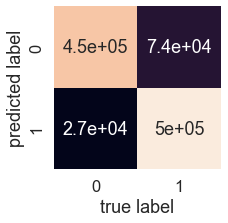

In [252]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, cat_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, cat_preds),
                     annot=True, 
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, cat_preds)
print(confusion_matrix(y_test, cat_preds))

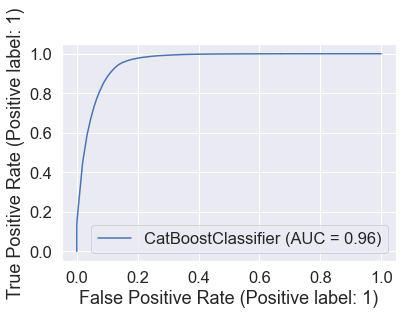

In [253]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(catboost, X_test, y_test);

### <a id='4.5'>4.5. XGBoost</a>

In [254]:
np.random.seed(42)

# Instantiate the model
xg = XGBClassifier()

# Fit the model to the training data
xg.fit(X_train, y_train)

# Score the model on the test data
xg.score(X_test, y_test)

[03:12:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9001017106047591

In [255]:
# Make predictions on the model
xg_pred = xg.predict(X_test)
xg_pred[:10]

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1])

In [256]:
y_test[:10]

3167564    1
2811121    1
3262545    1
1067698    0
2209519    1
2978733    1
1685663    0
2539059    1
55614      1
3123644    1
Name: CHURN, dtype: int32

In [257]:
print(classification_report(y_test, xg_pred))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90    525294
           1       0.87      0.94      0.90    524744

    accuracy                           0.90   1050038
   macro avg       0.90      0.90      0.90   1050038
weighted avg       0.90      0.90      0.90   1050038



In [258]:
print('Precision Score:', round(precision_score(y_test, xg_pred), 15))
print('Recall Score:', round(recall_score(y_test, xg_pred), 15))
print('F1 Score:', round(f1_score(y_test, xg_pred), 15))
print('Accuracy Score:', round(accuracy_score(y_test, xg_pred), 15))
print('ROC AUC: ', round(roc_auc_score(y_test, xg_pred), 15))

Precision Score: 0.867395424785127
Recall Score: 0.944489122314881
F1 Score: 0.904302147470138
Accuracy Score: 0.900101710604759
ROC AUC:  0.90012494814073


### <a id='4.5.1'>4.5.1 Confusion Matrix of XGBoostClassifier Model</a>

[[449526  75768]
 [ 29129 495615]]


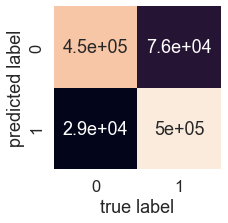

In [259]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, xg_pred):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, xg_pred),
                     annot=True, 
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, xg_pred)
print(confusion_matrix(y_test, xg_pred))

### <a id='4.5.2'>4.5.2 ROC Curve and AUC Scores for the XGBoost model</a>

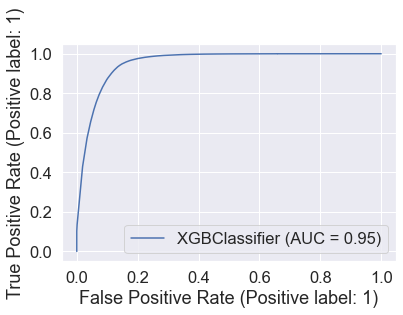

In [260]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(xg, X_test, y_test);

### Feature Importance

Learning rate set to 0.273045
0:	learn: 0.3855881	total: 732ms	remaining: 12m 11s
1:	learn: 0.3035241	total: 1.43s	remaining: 11m 52s
2:	learn: 0.2763696	total: 2.07s	remaining: 11m 26s
3:	learn: 0.2647228	total: 2.71s	remaining: 11m 13s
4:	learn: 0.2599677	total: 3.34s	remaining: 11m 5s
5:	learn: 0.2572126	total: 3.98s	remaining: 10m 58s
6:	learn: 0.2558917	total: 4.61s	remaining: 10m 53s
7:	learn: 0.2552570	total: 5.2s	remaining: 10m 44s
8:	learn: 0.2545831	total: 5.76s	remaining: 10m 34s
9:	learn: 0.2542213	total: 6.42s	remaining: 10m 35s
10:	learn: 0.2537809	total: 7.05s	remaining: 10m 34s
11:	learn: 0.2535305	total: 7.64s	remaining: 10m 29s
12:	learn: 0.2533986	total: 8.3s	remaining: 10m 30s
13:	learn: 0.2532487	total: 8.93s	remaining: 10m 28s
14:	learn: 0.2531009	total: 9.51s	remaining: 10m 24s
15:	learn: 0.2530379	total: 10.1s	remaining: 10m 22s
16:	learn: 0.2529611	total: 10.7s	remaining: 10m 19s
17:	learn: 0.2528449	total: 11.3s	remaining: 10m 19s
18:	learn: 0.2528218	total: 1

156:	learn: 0.2504271	total: 1m 30s	remaining: 8m 6s
157:	learn: 0.2504215	total: 1m 30s	remaining: 8m 4s
158:	learn: 0.2504072	total: 1m 31s	remaining: 8m 3s
159:	learn: 0.2504117	total: 1m 31s	remaining: 8m 2s
160:	learn: 0.2503918	total: 1m 32s	remaining: 8m 1s
161:	learn: 0.2503855	total: 1m 32s	remaining: 8m
162:	learn: 0.2503932	total: 1m 33s	remaining: 8m
163:	learn: 0.2503858	total: 1m 34s	remaining: 7m 59s
164:	learn: 0.2503235	total: 1m 34s	remaining: 7m 59s
165:	learn: 0.2503136	total: 1m 35s	remaining: 7m 59s
166:	learn: 0.2503103	total: 1m 35s	remaining: 7m 58s
167:	learn: 0.2503027	total: 1m 36s	remaining: 7m 58s
168:	learn: 0.2502881	total: 1m 37s	remaining: 7m 57s
169:	learn: 0.2502942	total: 1m 37s	remaining: 7m 57s
170:	learn: 0.2503029	total: 1m 38s	remaining: 7m 57s
171:	learn: 0.2502951	total: 1m 39s	remaining: 7m 56s
172:	learn: 0.2502908	total: 1m 39s	remaining: 7m 56s
173:	learn: 0.2502749	total: 1m 40s	remaining: 7m 56s
174:	learn: 0.2502590	total: 1m 41s	remai

309:	learn: 0.2493753	total: 2m 53s	remaining: 6m 25s
310:	learn: 0.2493565	total: 2m 53s	remaining: 6m 24s
311:	learn: 0.2493552	total: 2m 54s	remaining: 6m 24s
312:	learn: 0.2493453	total: 2m 54s	remaining: 6m 24s
313:	learn: 0.2493360	total: 2m 55s	remaining: 6m 23s
314:	learn: 0.2493307	total: 2m 56s	remaining: 6m 23s
315:	learn: 0.2493274	total: 2m 56s	remaining: 6m 22s
316:	learn: 0.2493231	total: 2m 57s	remaining: 6m 22s
317:	learn: 0.2493171	total: 2m 58s	remaining: 6m 22s
318:	learn: 0.2493167	total: 2m 58s	remaining: 6m 21s
319:	learn: 0.2493160	total: 2m 59s	remaining: 6m 21s
320:	learn: 0.2493199	total: 3m	remaining: 6m 20s
321:	learn: 0.2493066	total: 3m	remaining: 6m 20s
322:	learn: 0.2493076	total: 3m 1s	remaining: 6m 20s
323:	learn: 0.2492916	total: 3m 2s	remaining: 6m 19s
324:	learn: 0.2492843	total: 3m 2s	remaining: 6m 19s
325:	learn: 0.2492795	total: 3m 3s	remaining: 6m 18s
326:	learn: 0.2492707	total: 3m 3s	remaining: 6m 18s
327:	learn: 0.2492697	total: 3m 4s	remain

462:	learn: 0.2485582	total: 4m 28s	remaining: 5m 11s
463:	learn: 0.2485585	total: 4m 28s	remaining: 5m 10s
464:	learn: 0.2485568	total: 4m 29s	remaining: 5m 9s
465:	learn: 0.2485491	total: 4m 29s	remaining: 5m 9s
466:	learn: 0.2485511	total: 4m 30s	remaining: 5m 8s
467:	learn: 0.2484881	total: 4m 30s	remaining: 5m 8s
468:	learn: 0.2485370	total: 4m 31s	remaining: 5m 7s
469:	learn: 0.2485237	total: 4m 32s	remaining: 5m 6s
470:	learn: 0.2484784	total: 4m 32s	remaining: 5m 6s
471:	learn: 0.2484678	total: 4m 33s	remaining: 5m 5s
472:	learn: 0.2484637	total: 4m 33s	remaining: 5m 4s
473:	learn: 0.2484579	total: 4m 34s	remaining: 5m 4s
474:	learn: 0.2484500	total: 4m 34s	remaining: 5m 3s
475:	learn: 0.2484505	total: 4m 35s	remaining: 5m 3s
476:	learn: 0.2484937	total: 4m 35s	remaining: 5m 2s
477:	learn: 0.2484882	total: 4m 36s	remaining: 5m 2s
478:	learn: 0.2484814	total: 4m 37s	remaining: 5m 1s
479:	learn: 0.2484783	total: 4m 37s	remaining: 5m
480:	learn: 0.2484728	total: 4m 38s	remaining: 

615:	learn: 0.2478129	total: 5m 50s	remaining: 3m 38s
616:	learn: 0.2478073	total: 5m 50s	remaining: 3m 37s
617:	learn: 0.2478001	total: 5m 51s	remaining: 3m 37s
618:	learn: 0.2477919	total: 5m 52s	remaining: 3m 36s
619:	learn: 0.2477971	total: 5m 52s	remaining: 3m 36s
620:	learn: 0.2477902	total: 5m 53s	remaining: 3m 35s
621:	learn: 0.2477845	total: 5m 54s	remaining: 3m 35s
622:	learn: 0.2477807	total: 5m 54s	remaining: 3m 34s
623:	learn: 0.2477765	total: 5m 55s	remaining: 3m 34s
624:	learn: 0.2477711	total: 5m 55s	remaining: 3m 33s
625:	learn: 0.2477664	total: 5m 56s	remaining: 3m 33s
626:	learn: 0.2477619	total: 5m 57s	remaining: 3m 32s
627:	learn: 0.2477551	total: 5m 57s	remaining: 3m 31s
628:	learn: 0.2477515	total: 5m 58s	remaining: 3m 31s
629:	learn: 0.2477467	total: 5m 59s	remaining: 3m 30s
630:	learn: 0.2477415	total: 5m 59s	remaining: 3m 30s
631:	learn: 0.2477365	total: 6m	remaining: 3m 29s
632:	learn: 0.2477316	total: 6m 1s	remaining: 3m 29s
633:	learn: 0.2477295	total: 6m 1

768:	learn: 0.2471122	total: 7m 25s	remaining: 2m 13s
769:	learn: 0.2471138	total: 7m 25s	remaining: 2m 13s
770:	learn: 0.2471104	total: 7m 26s	remaining: 2m 12s
771:	learn: 0.2471069	total: 7m 26s	remaining: 2m 11s
772:	learn: 0.2471057	total: 7m 27s	remaining: 2m 11s
773:	learn: 0.2471059	total: 7m 27s	remaining: 2m 10s
774:	learn: 0.2471061	total: 7m 28s	remaining: 2m 10s
775:	learn: 0.2470984	total: 7m 28s	remaining: 2m 9s
776:	learn: 0.2470865	total: 7m 29s	remaining: 2m 8s
777:	learn: 0.2470868	total: 7m 29s	remaining: 2m 8s
778:	learn: 0.2471053	total: 7m 30s	remaining: 2m 7s
779:	learn: 0.2470784	total: 7m 30s	remaining: 2m 7s
780:	learn: 0.2470784	total: 7m 30s	remaining: 2m 6s
781:	learn: 0.2470731	total: 7m 31s	remaining: 2m 5s
782:	learn: 0.2470690	total: 7m 31s	remaining: 2m 5s
783:	learn: 0.2470583	total: 7m 32s	remaining: 2m 4s
784:	learn: 0.2470654	total: 7m 32s	remaining: 2m 4s
785:	learn: 0.2470705	total: 7m 33s	remaining: 2m 3s
786:	learn: 0.2470635	total: 7m 33s	rem

922:	learn: 0.2464672	total: 8m 46s	remaining: 43.9s
923:	learn: 0.2464631	total: 8m 47s	remaining: 43.4s
924:	learn: 0.2464575	total: 8m 47s	remaining: 42.8s
925:	learn: 0.2464519	total: 8m 48s	remaining: 42.2s
926:	learn: 0.2464442	total: 8m 49s	remaining: 41.7s
927:	learn: 0.2464373	total: 8m 49s	remaining: 41.1s
928:	learn: 0.2464346	total: 8m 50s	remaining: 40.5s
929:	learn: 0.2464295	total: 8m 50s	remaining: 40s
930:	learn: 0.2464276	total: 8m 51s	remaining: 39.4s
931:	learn: 0.2464273	total: 8m 52s	remaining: 38.8s
932:	learn: 0.2464211	total: 8m 52s	remaining: 38.3s
933:	learn: 0.2464149	total: 8m 53s	remaining: 37.7s
934:	learn: 0.2464121	total: 8m 53s	remaining: 37.1s
935:	learn: 0.2464087	total: 8m 54s	remaining: 36.6s
936:	learn: 0.2464033	total: 8m 55s	remaining: 36s
937:	learn: 0.2463998	total: 8m 55s	remaining: 35.4s
938:	learn: 0.2463963	total: 8m 56s	remaining: 34.8s
939:	learn: 0.2463915	total: 8m 56s	remaining: 34.3s
940:	learn: 0.2463859	total: 8m 57s	remaining: 33.

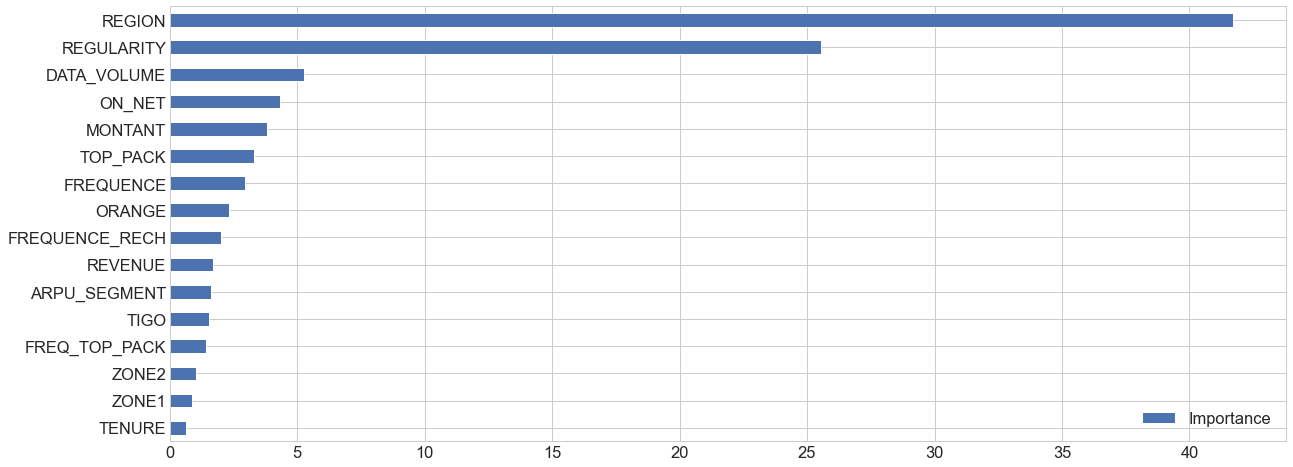

In [261]:
# Using CatBoost to gain an insight on the feature importance
clf = CatBoostClassifier()
clf.fit(train.drop('CHURN', axis=1), train['CHURN'])

plt.style.use('seaborn-whitegrid')
importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=train.drop('CHURN', axis=1).columns, columns=['Importance'])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20, len(importance)/2));

After performing feature mportance, the catboost classifier determined that REGION is the most important feature, followed by REGULARITY, DATA_VOLUME, ON_NET, MONTANT, FREQUENCE etc. It could be that the reason why REGION is the most important feature in predicting if a customer will churn from the expresso network is probably because of low service quality in their region and high cost of data. 


### Correlation between independent variables(Correlation Matrix)

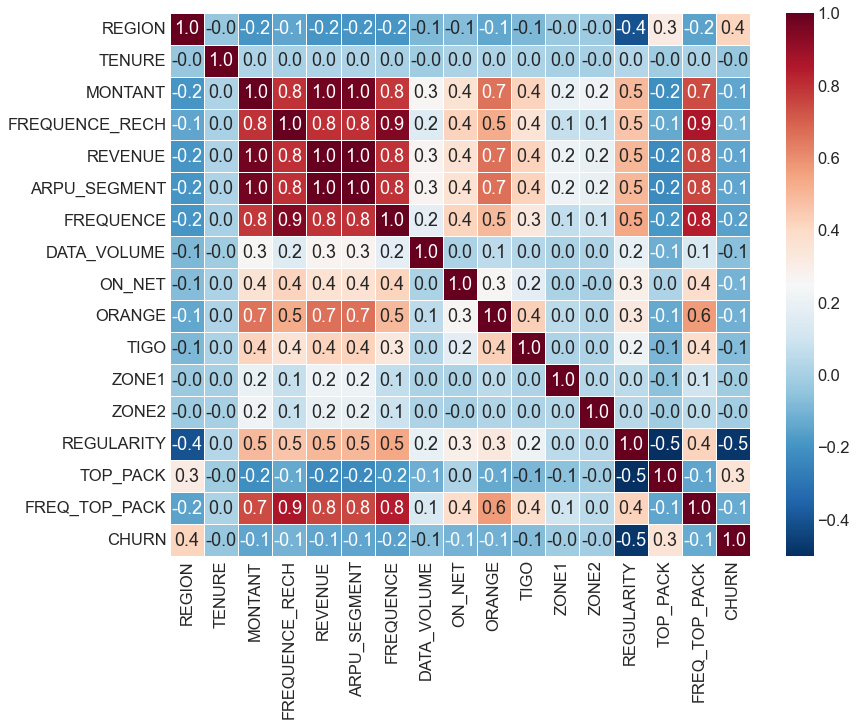

In [273]:
# Find the correlation between the independent variables
corr_matrix = train.corr()
plt.figure(figsize=(13, 10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt='.1f',
            cmap='RdBu_r');

### Make predictions on test data

Now we've got a trained model, it's time to make predictions on the test data.

So what we're doing is trying to use the patterns our model has learned in the training data to predict whether a customer will churn or not with characteristics it's never seen before but are assumed to be similar to that of those in the training data.

In [263]:
test.head()

user_id  REGION  TENURE  MONTANT  \
2154048  00001dbe00e56fc4b1c1b65dda63de2a5ece55f9      12       7   5000.0   
2154049  000055d41c8a62052dd426592e8a4a3342bf565d      14       5    300.0   
2154050  000081dd3245e6869a4a9c574c7050e7bb84c2c8       0       7   3300.0   
2154051  0000b76d2145d9445d9ff6b65c9ebc4196c89337      14       7   3000.0   
2154052  0000bae5480628cf8fe51ad84bcb39772fc79224      14       7   3000.0   

         FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  \
2154048             5.0   5000.0        1667.0        5.0        258.0   
2154049             2.0    326.0         109.0        3.0        397.0   
2154050            25.0   3400.0        1133.0       26.0       7150.0   
2154051             9.0   3000.0        1000.0        9.0        258.0   
2154052             9.0   3000.0        1000.0        9.0        258.0   

         ON_NET  ORANGE  TIGO  ZONE1  ZONE2  REGULARITY  TOP_PACK  \
2154048   378.0    11.0   5.0    1.0    2.0          42       110   
2154049    27.0     0.0   6.0    1.0    2.0          41        30   
2154050     0.0     2.0   5.0    1.0    2.0          57        30   
2154051    27.0    29.0   6.0    1.0    2.0           9       137   
2154052    27.0    29.0   6.0    1.0    2.0          10       137   

         FREQ_TOP_PACK  
2154048            5.0  
2154049            1.0  
2154050           22.0  
2154051            5.0  
2154052            5.0

In [264]:
test.columns

Index(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK'],
      dtype='object')

In [265]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380127 entries, 2154048 to 2534174
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         380127 non-null  object 
 1   REGION          380127 non-null  int32  
 2   TENURE          380127 non-null  int64  
 3   MONTANT         380127 non-null  float64
 4   FREQUENCE_RECH  380127 non-null  float64
 5   REVENUE         380127 non-null  float64
 6   ARPU_SEGMENT    380127 non-null  float64
 7   FREQUENCE       380127 non-null  float64
 8   DATA_VOLUME     380127 non-null  float64
 9   ON_NET          380127 non-null  float64
 10  ORANGE          380127 non-null  float64
 11  TIGO            380127 non-null  float64
 12  ZONE1           380127 non-null  float64
 13  ZONE2           380127 non-null  float64
 14  REGULARITY      380127 non-null  int64  
 15  TOP_PACK        380127 non-null  int32  
 16  FREQ_TOP_PACK   380127 non-null  float64
dtypes: 

In [266]:
test.isna().sum()

user_id           0
REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
dtype: int64

In [267]:
# Make predictions on the test dataset using the best model
test_preds = catboost.predict_proba(test[X.columns])[:, 1]
test_preds[:10]

array([6.37259336e-04, 2.26261572e-02, 5.55242779e-05, 7.40870341e-01,
       7.17479478e-01, 6.84880820e-01, 1.37263646e-04, 2.68410566e-02,
       3.59168209e-04, 1.65559994e-02])

In [268]:
submission.head()

user_id  CHURN
0  00001dbe00e56fc4b1c1b65dda63de2a5ece55f9      0
1  000055d41c8a62052dd426592e8a4a3342bf565d      0
2  000081dd3245e6869a4a9c574c7050e7bb84c2c8      0
3  0000b76d2145d9445d9ff6b65c9ebc4196c89337      0
4  0000bae5480628cf8fe51ad84bcb39772fc79224      0

In [269]:
sub_file = submission.copy()

In [270]:
sub_file.CHURN = test_preds

In [271]:
sub_file.head()

user_id     CHURN
0  00001dbe00e56fc4b1c1b65dda63de2a5ece55f9  0.000637
1  000055d41c8a62052dd426592e8a4a3342bf565d  0.022626
2  000081dd3245e6869a4a9c574c7050e7bb84c2c8  0.000056
3  0000b76d2145d9445d9ff6b65c9ebc4196c89337  0.740870
4  0000bae5480628cf8fe51ad84bcb39772fc79224  0.717479

In [272]:
# Create submission csv file
sub_file.to_csv('third_model_pred_model.csv', index=False)

##  **5. Conclusion**

<a id="conclusion"></a>

<p style="text-align:center;">Given its high scores across the board, Catboost classifier performed slightly better than all the other machine learning models. With a higher AUC score, The Catboost model should be quite reliable at predicting which customers will churn within 90 days.</p>

### Thanks for viewing this Notebook.